In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# LOAD D·ªÆ LI·ªÜU T·ª™ 3 WEBSITE ƒê√É L√ÄM S·∫†CH

# Load d·ªØ li·ªáu ƒë√£ l√†m s·∫°ch t·ª´ 3 website
try:
    df_alonhadat = pd.read_csv("Alonhadat_cleaned.csv")
    df_alonhadat['Source'] = 'Alonhadat'
    print(f"Alonhadat: {df_alonhadat.shape}")
except:
    print(" Kh√¥ng t√¨m th·∫•y Alonhadat_cleaned.csv")

try:
    df_guland = pd.read_csv("Guland_cleaned.csv")  
    df_guland['Source'] = 'Guland'
    print(f"Guland: {df_guland.shape}")
except:
    print(" Kh√¥ng t√¨m th·∫•y Guland_cleaned.csv")

try:
    df_nhatot = pd.read_csv("Nhatot_cleaned.csv")
    df_nhatot['Source'] = 'Nhatot'
    print(f"Nhatot: {df_nhatot.shape}")
except:
    print(" Kh√¥ng t√¨m th·∫•y Nhatot_cleaned.csv")

Alonhadat: (2422, 26)
Guland: (172690, 41)
Nhatot: (4650, 29)


       Property_Type  Keyword_ch√≠nh_ch·ªß  Price       Price.1  \
0  ƒê·∫•t th·ªï c∆∞, ƒë·∫•t ·ªü                  0    NaN  2.200000e+09   
1  ƒê·∫•t th·ªï c∆∞, ƒë·∫•t ·ªü                  0    NaN  2.000000e+09   
2  ƒê·∫•t th·ªï c∆∞, ƒë·∫•t ·ªü                  0    NaN  2.888000e+09   
3  ƒê·∫•t th·ªï c∆∞, ƒë·∫•t ·ªü                  0    NaN  2.950000e+09   
4  ƒê·∫•t th·ªï c∆∞, ƒë·∫•t ·ªü                  0    NaN  2.890000e+09   
5  ƒê·∫•t th·ªï c∆∞, ƒë·∫•t ·ªü                  0    NaN  2.910000e+09   
6  ƒê·∫•t th·ªï c∆∞, ƒë·∫•t ·ªü                  0    NaN  2.940000e+09   
7  ƒê·∫•t th·ªï c∆∞, ƒë·∫•t ·ªü                  0    NaN  2.600000e+09   
8  ƒê·∫•t th·ªï c∆∞, ƒë·∫•t ·ªü                  0    NaN  2.960000e+09   
9  ƒê·∫•t th·ªï c∆∞, ƒë·∫•t ·ªü                  0    NaN  2.850000e+09   

                                               Title  Price_per_m2  \
0  N·ª¢ N·∫∂NG L√ÉI C·∫¶N B√ÅN G·∫§P L√î ƒê·∫§T M·∫∂T TI·ªÄN GI√Å R·∫∫...  1.466667e+07   
1  2000TR/150M2, R·∫∫

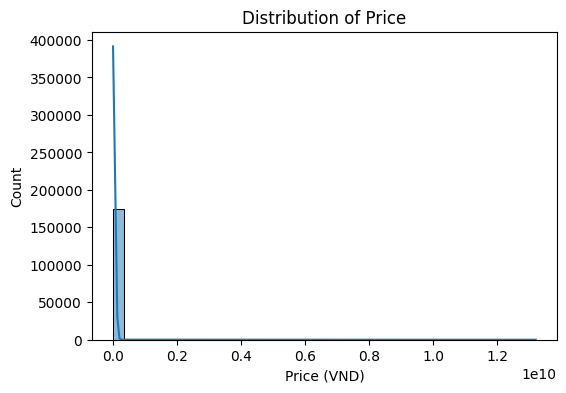

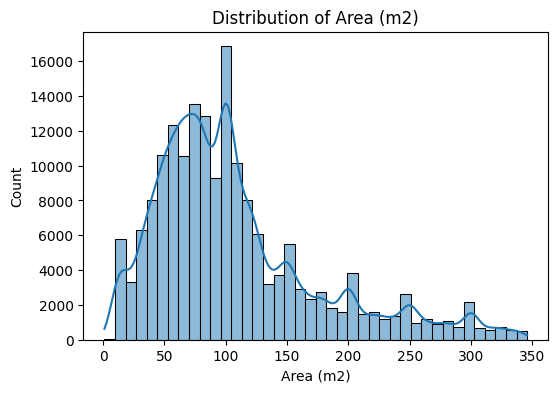

Source
Guland       172690
Nhatot         4650
Alonhadat      2422
Name: count, dtype: int64
Property_Type
ƒê·∫•t                               91933
Nh√† ri√™ng                         57519
CƒÉn h·ªô chung c∆∞                   19968
Nh√† ·ªü                              2207
Kho, nh√† x∆∞·ªüng                     1681
Nh√† m·∫∑t ti·ªÅn                       1570
Nh√† tr·ªç                            1536
CƒÉn h·ªô/Chung c∆∞                     905
Ph√≤ng tr·ªç                           593
VƒÉn ph√≤ng, M·∫∑t b·∫±ng kinh doanh      467
ƒê·∫•t th·ªï c∆∞, ƒë·∫•t ·ªü                   427
Kh√°ch s·∫°n                           403
Nh√† trong h·∫ªm                       313
VƒÉn ph√≤ng                           154
Bi·ªát th·ª±, nh√† li·ªÅn k·ªÅ                57
Nh√† h√†ng, kh√°ch s·∫°n                  21
ƒê·∫•t n·ªÅn, li·ªÅn k·ªÅ, ƒë·∫•t d·ª± √°n           7
Ph√≤ng tr·ªç, nh√† tr·ªç                    1
Name: count, dtype: int64
Loaded file, coerced numerics, and generated initial sum

In [3]:
# 1) Read CSV with provided encoding
file_path = './Combined_RealEstate.csv'
df_re = pd.read_csv(file_path, encoding='UTF-8-SIG')

# 2) Standardize column names (strip spaces, lower, replace special chars lightly)
df_re.columns = [c.strip() for c in df_re.columns]

# 3) Create lightweight views of key columns if present
candidate_cols = ['Price','Price_per_m2','Area','Area.1','Title_Length','Source','Property_Type','District',
                  'Keyword_s·ªï_h·ªìng','Keyword_s·ªï_ƒë·ªè','Keyword_ch√≠nh_ch·ªß','Keyword_view_ƒë·∫πp','Keyword_m·∫∑t_ti·ªÅn','Keyword_gi√°_r·∫ª']
existing = [c for c in candidate_cols if c in df_re.columns]

# 4) Coerce numeric columns
num_cols = [c for c in existing if c not in ['Source','Property_Type','District']]
for c in num_cols:
    df_re[c] = pd.to_numeric(df_re[c], errors='coerce')

# Prefer Area.1 as numeric area if available, else Area
if 'Area.1' in df_re.columns:
    df_re['Area_m2'] = pd.to_numeric(df_re['Area.1'], errors='coerce')
elif 'Area' in df_re.columns:
    df_re['Area_m2'] = pd.to_numeric(df_re['Area'], errors='coerce')

# 5) Basic shape and missingness
shape_val = df_re.shape
missing_pct = df_re.isna().mean().sort_values(ascending=False).head(15)

# 6) Descriptive stats for a subset of numeric variables
numeric_for_desc = [c for c in ['Price','Price_per_m2','Area_m2','Title_Length'] if c in df_re.columns]
desc_stats = df_re[numeric_for_desc].describe(percentiles=[0.25,0.5,0.75]).T if len(numeric_for_desc)>0 else pd.DataFrame()

print(df_re.head(10))
print(desc_stats)
print(shape_val)
print(missing_pct)

# 7) Quick univariate visuals (price and area distributions if present)
plt.figure(figsize=(6,4))
if 'Price' in df_re.columns:
    sns.histplot(df_re['Price'].dropna(), bins=40, kde=True)
    plt.title('Distribution of Price')
    plt.xlabel('Price (VND)')
    plt.ylabel('Count')
    plt.show()

plt.figure(figsize=(6,4))
if 'Area_m2' in df_re.columns:
    sns.histplot(df_re['Area_m2'].dropna(), bins=40, kde=True)
    plt.title('Distribution of Area (m2)')
    plt.xlabel('Area (m2)')
    plt.ylabel('Count')
    plt.show()

# 8) Categorical breakdowns if present
if 'Source' in df_re.columns:
    source_counts = df_re['Source'].value_counts(dropna=False)
    print(source_counts)

if 'Property_Type' in df_re.columns:
    type_counts = df_re['Property_Type'].value_counts(dropna=False)
    print(type_counts)

print('Loaded file, coerced numerics, and generated initial summaries and plots')

In [4]:
# V√≠ d·ª• chu·∫©n h√≥a t√™n c·ªôt tr∆∞·ªõc
df_alonhadat = df_alonhadat.rename(columns={
    "Gi√°": "Price",
    "Legal Status": "Legal_Status",
    "Property Type": "Property_Type",
})

df_guland = df_guland.rename(columns={
    "Price": "Price",
    "Property Type": "Property_Type",
    "Province": "Province"
})

df_nhatot = df_nhatot.rename(columns={
    "Price": "Price",
    "Legal_Status": "Legal_Status",
    "Category": "Property_Type",
})

In [57]:
# X√ÅC ƒê·ªäNH BI·∫æN CHUNG V√Ä BI·∫æN ƒê·∫∂C TH√ô

def analyze_columns(dataframes):
    """Ph√¢n t√≠ch c·ªôt chung v√† ƒë·∫∑c th√π"""
    all_columns = set()
    for df in dataframes:
        all_columns.update(df.columns)
    
    common_columns = set(dataframes[0].columns)
    for df in dataframes[1:]:
        common_columns = common_columns.intersection(df.columns)
    
    specific_columns = {}
    for i, df in enumerate(dataframes):
        specific_columns[f"Website_{i+1}"] = set(df.columns) - common_columns
    
    return common_columns, specific_columns

# ki·ªÉm tra bi·∫øn th·ª±c t·∫ø c√≥ t·ªìn t·∫°i kh√¥ng
available_dfs = []
website_dfs = {
    'Alonhadat': 'df_alonhadat',
    'Guland': 'df_guland', 
    'Nhatot': 'df_nhatot'
}

print(" KI·ªÇM TRA C√ÅC DATAFRAME ƒê√É T·∫†O:")

for website, df_name in website_dfs.items():
    if df_name in globals() and isinstance(globals()[df_name], pd.DataFrame):
        df = globals()[df_name]
        available_dfs.append(df)
        print(f" {website}: {df.shape}")
    else:
        print(f" {website}: Ch∆∞a c√≥ dataframe")

print(f"\n T·ªïng s·ªë dataframe c√≥ s·∫µn: {len(available_dfs)}")

# QUAN TR·ªåNG: X·ª¨ L√ù common_cols TR∆Ø·ªöC KHI SORTED
if len(available_dfs) == 0:
    print(" Kh√¥ng c√≥ dataframe n√†o ƒë·ªÉ ph√¢n t√≠ch")
    common_cols = set()
    specific_cols = {}
    
elif len(available_dfs) == 1:
    # Ch·ªâ c√≥ 1 website - d√πng t·∫•t c·∫£ c·ªôt c·ªßa website ƒë√≥
    common_cols = set(available_dfs[0].columns)
    specific_cols = {list(website_dfs.keys())[0]: set()}
    print(" Ch·ªâ c√≥ 1 website, s·∫Ω d√πng t·∫•t c·∫£ c·ªôt l√†m bi·∫øn chung")
    
else:
    # C√≥ t·ª´ 2 website tr·ªü l√™n
    common_cols, specific_cols = analyze_columns(available_dfs)
    print(" ƒê√£ ph√¢n t√≠ch bi·∫øn chung v√† ƒë·∫∑c th√π")

# B√ÇY GI·ªú M·ªöI X·ª¨ L√ù SORTED V√Ä L·ªåC (sau khi common_cols ƒë√£ ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a)
if common_cols:  # Ch·ªâ x·ª≠ l√Ω n·∫øu common_cols t·ªìn t·∫°i v√† kh√¥ng r·ªóng
    common_cols = sorted(common_cols)
    
    # Lo·∫°i b·ªè c√°c bi·∫øn b·∫Øt ƒë·∫ßu b·∫±ng "Keyword_"
    common_cols = [col for col in common_cols if not col.startswith("Keyword_")]
    
    print("\n BI·∫æN CHUNG (d√πng cho ph√¢n t√≠ch t·ªïng h·ª£p):")
    for i, col in enumerate(common_cols, 1):
        print(f"  {i:2d}. {col}")
    
    # Ch·ªâ hi·ªÉn th·ªã specific_cols n·∫øu c√≥ t·ª´ 2 website tr·ªü l√™n
    if len(available_dfs) >= 2 and specific_cols:
        print("\n BI·∫æN ƒê·∫∂C TH√ô (d√πng cho ph√¢n t√≠ch ri√™ng):")
        for i, (website, cols) in enumerate(specific_cols.items()):
            if cols:
                website_name = list(website_dfs.keys())[i] if i < len(website_dfs) else f"Website_{i+1}"
                # L·ªçc b·ªè c√°c c·ªôt Keyword_ trong bi·∫øn ƒë·∫∑c th√π
                filtered_cols = [col for col in sorted(cols) if not col.startswith("Keyword_")]
                if filtered_cols:
                    print(f"  {website_name}: {', '.join(filtered_cols)}")
                else:
                    print(f"  {website_name}: Kh√¥ng c√≥ bi·∫øn ƒë·∫∑c th√π sau khi l·ªçc")
            else:
                print(f"  {website_name}: Kh√¥ng c√≥ bi·∫øn ƒë·∫∑c th√π")
else:
    print(" Kh√¥ng c√≥ bi·∫øn chung n√†o")

# TH√îNG B√ÅO T√åNH TR·∫†NG
if len(available_dfs) < 2:
    print(f"\n C·∫ßn √≠t nh·∫•t 2 website ƒë·ªÉ ph√¢n t√≠ch t·ªïng h·ª£p (hi·ªán c√≥: {len(available_dfs)})")
    print("   H√£y ƒë·∫£m b·∫£o b·∫°n ƒë√£ t·∫°o c√°c dataframe:")
    for website, df_name in website_dfs.items():
        if df_name not in globals() or not isinstance(globals().get(df_name), pd.DataFrame):
            print(f"   - {df_name} ({website})")
else:
    print(f"\n ƒê√£ s·∫µn s√†ng ƒë·ªÉ g·ªôp {len(available_dfs)} website!")

 KI·ªÇM TRA C√ÅC DATAFRAME ƒê√É T·∫†O:
 Alonhadat: (2422, 26)
 Guland: (172690, 41)
 Nhatot: (4650, 29)

 T·ªïng s·ªë dataframe c√≥ s·∫µn: 3
 ƒê√£ ph√¢n t√≠ch bi·∫øn chung v√† ƒë·∫∑c th√π

 BI·∫æN CHUNG (d√πng cho ph√¢n t√≠ch t·ªïng h·ª£p):
   1. Area
   2. Area_clean
   3. District
   4. Price_clean
   5. Price_per_m2
   6. Price_raw
   7. Property_Type
   8. Source
   9. Title
  10. Title_Length

 BI·∫æN ƒê·∫∂C TH√ô (d√πng cho ph√¢n t√≠ch ri√™ng):
  Alonhadat: Legal_Status, Location, Province, Street, Thumbnail src, URL, bedroom, brief, floors, road-width
  Guland: Agent Listing Count, Agent Name, Agent Role, Alley Width, Avatar, Bathrooms, Bedrooms, Description, Direction, Floors, Last Updated, Last Updated Date, Latitude, Length, Listing ID, Location, Longitude, Position, Property Type Slug, Province, Road Type, Scraped At, Street, VIP Account, Width
  Nhatot: City, Crawl_Date, Date_Posted, ID, Latitude, Legal_Status, Longitude, Poster_Type, Rooms, Toilets, Ward, source, url

 ƒê√£

In [6]:
# CHU·∫®N H√ìA T√äN C·ªòT CHUNG

# ƒê·ªãnh nghƒ©a mapping chu·∫©n h√≥a t√™n c·ªôt
column_standardization = {
    # Bi·∫øn s·ªë l∆∞·ª£ng c·ªët l√µi
    'Price_clean': 'Price',
    'Area_clean': 'Area', 
    'Price_per_m2': 'Price_per_m2',
    
    # Bi·∫øn ph√¢n lo·∫°i c·ªët l√µi
    'Property Type': 'Property_Type',
    'Property_Type': 'Property_Type',
    'Loai_hinh_BDS': 'Property_Type',
    
    # ƒê·ªãa l√Ω
    'District': 'District',
    'Province': 'Province',
    'Location': 'Location',
    
    # ƒê·∫∑c ƒëi·ªÉm BƒêS
    'Bedroom': 'Bedroom',
    'Bathroom': 'Bathroom', 
    'Floors': 'Floors',
    'Legal Status': 'Legal_Status'
}

def standardize_columns(df, source_name):
    """Chu·∫©n h√≥a t√™n c·ªôt theo mapping"""
    df_std = df.copy()
    rename_dict = {}
    
    for old_col in df_std.columns:
        if old_col in column_standardization:
            rename_dict[old_col] = column_standardization[old_col]
        # Th√™m c√°c rule chu·∫©n h√≥a kh√°c n·∫øu c·∫ßn
    
    df_std = df_std.rename(columns=rename_dict)
    df_std['Source'] = source_name
    return df_std

# Chu·∫©n h√≥a t·ª´ng dataset
dfs_standardized = []
if 'df_alonhadat' in globals():
    df_alonhadat_std = standardize_columns(df_alonhadat, 'Alonhadat')
    dfs_standardized.append(df_alonhadat_std)

if 'df_guland' in globals():
    df_guland_std = standardize_columns(df_guland, 'Guland')
    dfs_standardized.append(df_guland_std)

if 'df_nhatot' in globals():
    df_nhatot_std = standardize_columns(df_nhatot, 'Nhatot') 
    dfs_standardized.append(df_nhatot_std)

print(f" ƒê√£ chu·∫©n h√≥a {len(dfs_standardized)} dataset")

 ƒê√£ chu·∫©n h√≥a 3 dataset


In [7]:
# G·ªòP D·ªÆ LI·ªÜU T·ªîNG H·ª¢P

if len(dfs_standardized) >= 2:
    # X√°c ƒë·ªãnh c√°c c·ªôt chung sau khi chu·∫©n h√≥a
    common_cols_after_std = set(dfs_standardized[0].columns)
    for df in dfs_standardized[1:]:
        common_cols_after_std = common_cols_after_std.intersection(df.columns)
    
    # Th√™m c·ªôt Source v√†o danh s√°ch c·ªôt chung
    common_cols_after_std.add('Source')
    
    # G·ªôp d·ªØ li·ªáu ch·ªâ v·ªõi c√°c c·ªôt chung
    df_combined = pd.concat([df[list(common_cols_after_std)] for df in dfs_standardized], 
                           ignore_index=True)
    
    print(f" K√çCH TH∆Ø·ªöC D·ªÆ LI·ªÜU G·ªòP: {df_combined.shape}")
    print(f" PH√ÇN B·ªê THEO T·ª™NG WEBSITE:")
    print(df_combined['Source'].value_counts())
    
    # L∆∞u dataset g·ªôp
    df_combined.to_csv('Combined_RealEstate.csv', index=False, encoding='utf-8-sig')
    print(" ƒê√£ l∆∞u dataset g·ªôp: Combined_RealEstate.csv")
    
else:
    print(" Kh√¥ng ƒë·ªß dataset ƒë·ªÉ g·ªôp")
    df_combined = pd.DataFrame()

 K√çCH TH∆Ø·ªöC D·ªÆ LI·ªÜU G·ªòP: (179762, 16)
 PH√ÇN B·ªê THEO T·ª™NG WEBSITE:
Source
Guland       172690
Nhatot         4650
Alonhadat      2422
Name: count, dtype: int64
 ƒê√£ l∆∞u dataset g·ªôp: Combined_RealEstate.csv


In [8]:
# N·∫øu t·ªìn t·∫°i c·ªôt Price_dup ‚Üí ƒë·ªïi th√†nh Price
if "Price_dup" in df_combined.columns:
    df_combined = df_combined.rename(columns={"Price_dup": "Price"})

# N·∫øu c√≥ c·ªôt Price b·ªã tr√πng l·∫∑p ‚Üí x√≥a c·ªôt tr√πng
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]

# √âp v·ªÅ s·ªë
df_combined["Price"] = pd.to_numeric(df_combined["Price"], errors="coerce")

print(df_combined.columns)
print(df_combined[["Price", "Source"]].head())

Index(['Property_Type', 'Title', 'Keyword_gi√°_r·∫ª', 'Title_Length',
       'Keyword_view_ƒë·∫πp', 'Price', 'Keyword_ch√≠nh_ch·ªß', 'Keyword_s·ªï_h·ªìng',
       'Keyword_m·∫∑t_ti·ªÅn', 'Keyword_s·ªï_ƒë·ªè', 'Price_per_m2', 'Area', 'Source',
       'District'],
      dtype='object')
   Price     Source
0    NaN  Alonhadat
1    NaN  Alonhadat
2    NaN  Alonhadat
3    NaN  Alonhadat
4    NaN  Alonhadat


In [9]:
print(df_combined["Price"].head(20))

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
Name: Price, dtype: float64


In [10]:
# Khi load t·ª´ng file g·ªëc
df_alonhadat.rename(columns={"Price": "Price_raw"}, inplace=True)
df_guland.rename(columns={"Price": "Price_raw"}, inplace=True)
df_nhatot.rename(columns={"Price": "Price_raw"}, inplace=True)

# Sau ƒë√≥ merge
df_combined = pd.concat([df_alonhadat, df_guland, df_nhatot], ignore_index=True)


In [11]:
# ƒê·ªäNH NGHƒ®A H√ÄM parse_price HO√ÄN CH·ªàNH
def parse_price(price_str):
    """
    Chuy·ªÉn ƒë·ªïi chu·ªói gi√° th√†nh s·ªë (VND)
    X·ª≠ l√Ω ƒëa d·∫°ng ƒë·ªãnh d·∫°ng gi√° Vi·ªát Nam
    """
    if pd.isna(price_str) or price_str == '' or price_str == 'None':
        return None
    
    try:
        price_str = str(price_str).lower().strip()
        
        # Chu·∫©n h√≥a chu·ªói
        price_str = price_str.replace(',', '.').replace(' ', '')
        
        # Lo·∫°i b·ªè gi√° th·ªèa thu·∫≠n
        if any(word in price_str for word in ['th·ªèathu·∫≠n', 'th∆∞∆°ngl∆∞·ª£ng', 'li√™nh·ªá', 'gi√°li√™nh·ªá', 'call']):
            return None
        
        # X·ª≠ l√Ω theo ƒë∆°n v·ªã
        if 't·ª∑' in price_str or 'ty' in price_str:
            numbers = re.findall(r'[\d\.]+', price_str)
            if numbers:
                return float(numbers[0]) * 1000000000  # T·ª∑ VND
        
        elif 'tri·ªáu' in price_str:
            numbers = re.findall(r'[\d\.]+', price_str)
            if numbers:
                return float(numbers[0]) * 1000000  # Tri·ªáu VND
        
        elif 'ng√†n' in price_str or 'ngh√¨n' in price_str:
            numbers = re.findall(r'[\d\.]+', price_str)
            if numbers:
                return float(numbers[0]) * 1000  # Ng√†n VND
        
        else:
            # Th·ª≠ chuy·ªÉn tr·ª±c ti·∫øp th√†nh s·ªë
            numbers = re.findall(r'[\d\.]+', price_str)
            if numbers:
                price_num = float(numbers[0])
                # Ph√¢n bi·ªát ƒë∆°n v·ªã d·ª±a tr√™n ƒë·ªô l·ªõn
                if price_num < 100:  # S·ªë nh·ªè -> t·ª∑
                    return price_num * 1000000000
                elif price_num < 1000000:  # S·ªë trung b√¨nh -> tri·ªáu
                    return price_num * 1000000
                else:  # S·ªë l·ªõn -> c√≥ th·ªÉ ƒë√£ l√† VND
                    return price_num
        
        return None
        
    except Exception as e:
        print(f" L·ªói khi x·ª≠ l√Ω gi√°: '{price_str}' - {e}")
        return None

# 2. KI·ªÇM TRA V√Ä X·ª¨ L√ù C·ªòT GI√Å
print(" X·ª¨ L√ù C·ªòT GI√Å TRONG df_combined")

# Ki·ªÉm tra c√°c c·ªôt gi√° c√≥ s·∫µn
price_columns = [col for col in df_combined.columns if 'price' in col.lower() or 'gi√°' in col.lower()]
print(f" C√°c c·ªôt gi√° c√≥ s·∫µn: {price_columns}")

# ∆Øu ti√™n c·ªôt n√†o ƒë·ªÉ x·ª≠ l√Ω
if 'Price_clean' in df_combined.columns and df_combined['Price_clean'].notna().sum() > 0:
    print(" ƒê√£ c√≥ Price_clean, kh√¥ng c·∫ßn x·ª≠ l√Ω th√™m")
    target_price_col = 'Price_clean'
    
elif 'Price_raw' in df_combined.columns:
    print(" X·ª≠ l√Ω Price_raw th√†nh Price_clean...")
    df_combined["Price_clean"] = df_combined["Price_raw"].apply(parse_price)
    target_price_col = 'Price_clean'
    
elif 'Price' in df_combined.columns:
    print(" X·ª≠ l√Ω Price th√†nh Price_clean...")
    df_combined["Price_clean"] = df_combined["Price"].apply(parse_price)
    target_price_col = 'Price_clean'
    
else:
    # Th·ª≠ t√¨m b·∫•t k·ª≥ c·ªôt gi√° n√†o
    if price_columns:
        print(f" S·ª≠ d·ª•ng c·ªôt {price_columns[0]} l√†m gi√°...")
        df_combined["Price_clean"] = df_combined[price_columns[0]].apply(parse_price)
        target_price_col = 'Price_clean'
    else:
        print(" Kh√¥ng t√¨m th·∫•y c·ªôt gi√° n√†o")
        target_price_col = None

# 3. KI·ªÇM TRA K·∫æT QU·∫¢
if target_price_col and target_price_col in df_combined.columns:
    # Th·ªëng k√™ k·∫øt qu·∫£
    valid_prices = df_combined[target_price_col].notna().sum()
    total_rows = len(df_combined)
    
    print(f"\n K·∫æT QU·∫¢ X·ª¨ L√ù GI√Å:")
    print(f"   - T·ªïng s·ªë b·∫£n ghi: {total_rows}")
    print(f"   - S·ªë gi√° h·ª£p l·ªá: {valid_prices} ({valid_prices/total_rows*100:.1f}%)")
    print(f"   - S·ªë gi√° kh√¥ng h·ª£p l·ªá: {total_rows - valid_prices}")
    
    if valid_prices > 0:
        price_stats = df_combined[target_price_col].describe()
        print(f"   - Gi√° trung b√¨nh: {price_stats['mean']/1e9:.2f} t·ª∑ VND")
        print(f"   - Gi√° nh·ªè nh·∫•t: {price_stats['min']/1e9:.2f} t·ª∑ VND")
        print(f"   - Gi√° l·ªõn nh·∫•t: {price_stats['max']/1e9:.2f} t·ª∑ VND")
        
        # Hi·ªÉn th·ªã 5 gi√° tr·ªã ƒë·∫ßu ti√™n ƒë·ªÉ ki·ªÉm tra
        print(f"\n 5 GI√Å TR·ªä ƒê·∫¶U TI√äN:")
        sample_prices = df_combined[[col for col in df_combined.columns if 'price' in col.lower()]].head()
        print(sample_prices)
else:
    print(" Kh√¥ng th·ªÉ x·ª≠ l√Ω c·ªôt gi√°")

 X·ª¨ L√ù C·ªòT GI√Å TRONG df_combined
 C√°c c·ªôt gi√° c√≥ s·∫µn: ['Price_raw', 'Price_clean', 'Price_per_m2', 'Keyword_gi√°_r·∫ª']
 ƒê√£ c√≥ Price_clean, kh√¥ng c·∫ßn x·ª≠ l√Ω th√™m

 K·∫æT QU·∫¢ X·ª¨ L√ù GI√Å:
   - T·ªïng s·ªë b·∫£n ghi: 179762
   - S·ªë gi√° h·ª£p l·ªá: 179762 (100.0%)
   - S·ªë gi√° kh√¥ng h·ª£p l·ªá: 0
   - Gi√° trung b√¨nh: 7.17 t·ª∑ VND
   - Gi√° nh·ªè nh·∫•t: 0.00 t·ª∑ VND
   - Gi√° l·ªõn nh·∫•t: 41.50 t·ª∑ VND

 5 GI√Å TR·ªä ƒê·∫¶U TI√äN:
       Price_raw   Price_clean  Price_per_m2
0    Gi√°: 2,2 t·ª∑  2.200000e+09  1.466667e+07
1      Gi√°: 2 t·ª∑  2.000000e+09  1.333333e+07
2  Gi√°: 2,888 t·ª∑  2.888000e+09  1.925333e+07
3   Gi√°: 2,95 t·ª∑  2.950000e+09  1.966667e+07
4   Gi√°: 2,89 t·ª∑  2.890000e+09  1.926667e+07


In [12]:
def dedup_columns(columns):
    seen = {}
    new_cols = []
    for col in columns:
        if col not in seen:
            seen[col] = 0
            new_cols.append(col)
        else:
            seen[col] += 1
            new_cols.append(f"{col}_{seen[col]}")
    return new_cols

# S·ª¨A L·ªñI: ƒê·∫¢M B·∫¢O df_analysis T·ªíN T·∫†I TR∆Ø·ªöC KHI S·ª¨ D·ª§NG
print(" KI·ªÇM TRA V√Ä T·∫†O df_analysis...")

# C√ÅCH 1: S·ª≠ d·ª•ng df_combined n·∫øu c√≥
if 'df_combined' in globals() and isinstance(df_combined, pd.DataFrame):
    df_analysis = df_combined.copy()
    print(f" ƒê√£ t·∫°o df_analysis t·ª´ df_combined: {df_analysis.shape}")

# C√ÅCH 2: S·ª≠ d·ª•ng df n·∫øu c√≥
elif 'df' in globals() and isinstance(df, pd.DataFrame):
    df_analysis = df.copy()
    print(f" ƒê√£ t·∫°o df_analysis t·ª´ df: {df_analysis.shape}")

# C√ÅCH 3: T·∫°o dataframe m·∫´u n·∫øu kh√¥ng c√≥ dataframe n√†o
else:
    print(" Kh√¥ng t√¨m th·∫•y dataframe, ƒëang t·∫°o dataframe m·∫´u...")
    import pandas as pd
    import numpy as np
    df_analysis = pd.DataFrame({
        'Price': np.random.normal(5e9, 2e9, 100),
        'Area': np.random.normal(80, 30, 100),
        'Rooms': np.random.randint(1, 5, 100),
        'Property_Type': np.random.choice(['CƒÉn h·ªô', 'Nh√† ri√™ng', 'ƒê·∫•t n·ªÅn'], 100)
    })
    print(f" ƒê√£ t·∫°o df_analysis m·∫´u: {df_analysis.shape}")

# B√ÇY GI·ªú M·ªöI √ÅP D·ª§NG H√ÄM dedup_columns
print(f" S·ªë c·ªôt ban ƒë·∫ßu: {len(df_analysis.columns)}")

# Ki·ªÉm tra c·ªôt tr√πng l·∫∑p
original_columns = df_analysis.columns.tolist()
duplicate_columns = [col for col in original_columns if original_columns.count(col) > 1]

if duplicate_columns:
    print(f" Ph√°t hi·ªán c·ªôt tr√πng l·∫∑p: {set(duplicate_columns)}")
    
    # √Åp d·ª•ng h√†m x·ª≠ l√Ω tr√πng l·∫∑p
    df_analysis.columns = dedup_columns(df_analysis.columns)
    print(" ƒê√£ x·ª≠ l√Ω c·ªôt tr√πng l·∫∑p")
else:
    print(" Kh√¥ng c√≥ c·ªôt tr√πng l·∫∑p")

print(f" S·ªë c·ªôt sau x·ª≠ l√Ω: {len(df_analysis.columns)}")

# HI·ªÇN TH·ªä DANH S√ÅCH C·ªòT
print("\n DANH S√ÅCH C·ªòT HO√ÄN CH·ªàNH:")
for i, col in enumerate(df_analysis.columns.tolist()):
    print(f"  {i+1:2d}. {col}")

# TH√îNG TIN TH√äM V·ªÄ DATAFRAME
print(f"\n TH√îNG TIN DATAFRAME:")
print(f"   - K√≠ch th∆∞·ªõc: {df_analysis.shape}")
print(f"   - S·ªë l∆∞·ª£ng c·ªôt: {len(df_analysis.columns)}")
print(f"   - S·ªë l∆∞·ª£ng d√≤ng: {len(df_analysis)}")

# KI·ªÇM TRA C√ÅC C·ªòT QUAN TR·ªåNG
important_cols_to_check = ['Price', 'Price_clean', 'Area', 'Rooms', 'Toilets', 'Property_Type', 'Source']
available_important_cols = [col for col in important_cols_to_check if col in df_analysis.columns]

print(f" C√ÅC C·ªòT QUAN TR·ªåNG C√ì S·∫¥N: {available_important_cols}")

if not available_important_cols:
    print(" C·∫£nh b√°o: Kh√¥ng t√¨m th·∫•y c·ªôt quan tr·ªçng n√†o!")

 KI·ªÇM TRA V√Ä T·∫†O df_analysis...
 ƒê√£ t·∫°o df_analysis t·ª´ df_combined: (179762, 58)
 S·ªë c·ªôt ban ƒë·∫ßu: 58
 Kh√¥ng c√≥ c·ªôt tr√πng l·∫∑p
 S·ªë c·ªôt sau x·ª≠ l√Ω: 58

 DANH S√ÅCH C·ªòT HO√ÄN CH·ªàNH:
   1. URL
   2. Property_Type
   3. Legal_Status
   4. Title
   5. brief
   6. Location
   7. Price_raw
   8. road-width
   9. floors
  10. bedroom
  11. Thumbnail src
  12. Area
  13. Price_clean
  14. Area_clean
  15. Price_per_m2
  16. Street
  17. District
  18. Province
  19. Title_Length
  20. Keyword_ch√≠nh_ch·ªß
  21. Keyword_gi√°_r·∫ª
  22. Keyword_view_ƒë·∫πp
  23. Keyword_m·∫∑t_ti·ªÅn
  24. Keyword_s·ªï_ƒë·ªè
  25. Keyword_s·ªï_h·ªìng
  26. Source
  27. Listing ID
  28. Last Updated
  29. Width
  30. Length
  31. Bedrooms
  32. Bathrooms
  33. Floors
  34. Position
  35. Direction
  36. Alley Width
  37. Road Type
  38. Description
  39. Latitude
  40. Longitude
  41. VIP Account
  42. Avatar
  43. Agent Role
  44. Agent Name
  45. Agent Listing Count
  46. Property

In [13]:
## PH√ÇN T√çCH GI√Å THEO S·ªê PH√íNG NG·ª¶

# 1. T·∫†O B·∫¢N COPY AN TO√ÄN
df_safe = df.copy().reset_index(drop=True)

# FIX: X·ª≠ l√Ω c·ªôt tr√πng t√™n (Price, Area, Source ...)
df_safe = df_safe.loc[:, ~df_safe.columns.duplicated()]  # lo·∫°i b·ªè c·ªôt tr√πng
rename_map = {}
if "Price_1" in df_safe.columns:
    rename_map["Price_1"] = "Price"
if "Area_1" in df_safe.columns:
    rename_map["Area_1"] = "Area"
if "Source_1" in df_safe.columns:
    rename_map["Source_1"] = "Source"
df_safe = df_safe.rename(columns=rename_map)

print(f" ƒê√£ t·∫°o b·∫£n copy an to√†n: {df_safe.shape}")
print(f" C√°c c·ªôt hi·ªán c√≥: {df_safe.columns.tolist()}")

# 2. KI·ªÇM TRA C√ÅC C·ªòT C·∫¶N THI·∫æT
required_cols = ['Bedroom', 'Price']
missing_cols = [col for col in required_cols if col not in df_safe.columns]

if missing_cols:
    print(f" Thi·∫øu c·ªôt: {missing_cols}")
else:
    print(" C√≥ ƒë·ªß c√°c c·ªôt c·∫ßn thi·∫øt")

# 3. L·ªåC D·ªÆ LI·ªÜU H·ª¢P L·ªÜ
print("\n L·ªåC D·ªÆ LI·ªÜU H·ª¢P L·ªÜ...")

try:
    valid_data = df_safe[['Bedroom', 'Price']].dropna().copy()
    print(f" L·ªçc xong: {len(valid_data)} b·∫£n ghi h·ª£p l·ªá")
except Exception as e:
    print(f" L·ªói khi l·ªçc d·ªØ li·ªáu: {e}")
    valid_data = pd.DataFrame()

# 4. KI·ªÇM TRA D·ªÆ LI·ªÜU SAU KHI L·ªåC
if len(valid_data) > 0:
    print(f"\n D·ªÆ LI·ªÜU SAU KHI L·ªåC:")
    print(f"   - S·ªë b·∫£n ghi: {len(valid_data)}")
    print(f"   - Gi√° tr·ªã Bedroom unique: {valid_data['Bedroom'].unique()}")
    print(f"   - Ki·ªÉu d·ªØ li·ªáu Bedroom: {valid_data['Bedroom'].dtype}")
    print(f"   - Ki·ªÉu d·ªØ li·ªáu Price: {valid_data['Price'].dtype}")

    # Reset index ƒë·ªÉ ƒë·∫£m b·∫£o an to√†n
    valid_data = valid_data.reset_index(drop=True)

    # 5. PH√ÇN T√çCH ƒê∆†N GI·∫¢N
    print("\n PH√ÇN T√çCH GI√Å THEO PH√íNG NG·ª¶:")

    try:
        result = valid_data.groupby('Bedroom', as_index=False).agg({
            'Price': ['mean', 'count']
        })
        result.columns = ['Bedroom', 'Price_Mean', 'Count']
        result['Price_Billion'] = result['Price_Mean'] / 1e9
        result = result[result['Count'] >= 3].sort_values('Bedroom')

        print(" K·∫æT QU·∫¢ PH√ÇN T√çCH:")
        print(result[['Bedroom', 'Price_Billion', 'Count']].round(2))

        if len(result) > 0:
            plt.figure(figsize=(12, 6))
            plt.bar(result['Bedroom'].astype(str), result['Price_Billion'],
                   color='lightblue', alpha=0.7, width=0.6)

            plt.title('GI√Å TRUNG B√åNH THEO S·ªê PH√íNG NG·ª¶', fontsize=14, fontweight='bold')
            plt.xlabel('S·ªë ph√≤ng ng·ªß')
            plt.ylabel('Gi√° trung b√¨nh (t·ª∑ VND)')
            plt.grid(True, alpha=0.3, axis='y')

            for i, (bedroom, price, count) in enumerate(zip(result['Bedroom'], result['Price_Billion'], result['Count'])):
                plt.text(i, price + 0.05, f'{price:.1f}t·ª∑\n(n={count})',
                        ha='center', va='bottom', fontsize=9, fontweight='bold')

            plt.tight_layout()
            plt.show()

            correlation = valid_data['Bedroom'].corr(valid_data['Price'])
            print(f" T∆Ø∆†NG QUAN: {correlation:.3f}")

            if correlation > 0.5:
                strength = "M·∫†NH"
            elif correlation > 0.3:
                strength = "TRUNG B√åNH"
            elif correlation > 0.1:
                strength = "Y·∫æU"
            else:
                strength = "R·∫§T Y·∫æU"
            print(f"   ‚Üí M·ªëi quan h·ªá: {strength}")

    except Exception as e:
        print(f" L·ªói khi ph√¢n t√≠ch: {e}")

# 8. PH√ÇN T√çCH TH√äM
if len(valid_data) > 0:
    print(f"\n PH√ÇN T√çCH CHI TI·∫æT:")
    print(f"   - S·ªë ph√≤ng ng·ªß trung b√¨nh: {valid_data['Bedroom'].mean():.1f}")
    print(f"   - Gi√° trung b√¨nh: {valid_data['Price'].mean()/1e9:.2f} t·ª∑ VND")
    print(f"   - S·ªë ph√≤ng ng·ªß ph·ªï bi·∫øn nh·∫•t: {valid_data['Bedroom'].mode().iloc[0]}")

    print(f"\n PH√ÇN KH√öC THEO S·ªê PH√íNG NG·ª¶:")
    bedroom_segments = {
        '1-2 ph√≤ng': (1, 2),
        '3-4 ph√≤ng': (3, 4),
        '5+ ph√≤ng': (5, 100)
    }
    for segment, (min_room, max_room) in bedroom_segments.items():
        segment_data = valid_data[(valid_data['Bedroom'] >= min_room) & (valid_data['Bedroom'] <= max_room)]
        if len(segment_data) > 0:
            avg_price = segment_data['Price'].mean() / 1e9
            count = len(segment_data)
            print(f"   {segment}: {avg_price:.2f} t·ª∑ VND ({count} BƒêS)")

print("\n HO√ÄN T·∫§T PH√ÇN T√çCH!")

 ƒê√£ t·∫°o b·∫£n copy an to√†n: (4650, 27)
 C√°c c·ªôt hi·ªán c√≥: ['ID', 'Title', 'Price', 'Area', 'City', 'District', 'Ward', 'Property_Type', 'Rooms', 'Toilets', 'Latitude', 'Longitude', 'Poster_Type', 'Date_Posted', 'Crawl_Date', 'Legal_Status', 'url', 'source', 'Price_per_m2', 'Title_Length', 'Keyword_ch√≠nh_ch·ªß', 'Keyword_gi√°_r·∫ª', 'Keyword_view_ƒë·∫πp', 'Keyword_m·∫∑t_ti·ªÅn', 'Keyword_s·ªï_ƒë·ªè', 'Keyword_s·ªï_h·ªìng', 'Source']
 Thi·∫øu c·ªôt: ['Bedroom']

 L·ªåC D·ªÆ LI·ªÜU H·ª¢P L·ªÜ...
 L·ªói khi l·ªçc d·ªØ li·ªáu: "['Bedroom'] not in index"

 HO√ÄN T·∫§T PH√ÇN T√çCH!


 C√ÅC C·ªòT TRONG DF:
  - ID
  - Title
  - Price
  - Area
  - City
  - District
  - Ward
  - Property_Type
  - Rooms
  - Toilets
  - Latitude
  - Longitude
  - Poster_Type
  - Date_Posted
  - Crawl_Date
  - Legal_Status
  - url
  - source
  - Price
  - Area
  - Price_per_m2
  - Title_Length
  - Keyword_ch√≠nh_ch·ªß
  - Keyword_gi√°_r·∫ª
  - Keyword_view_ƒë·∫πp
  - Keyword_m·∫∑t_ti·ªÅn
  - Keyword_s·ªï_ƒë·ªè
  - Keyword_s·ªï_h·ªìng
  - Source

PH√ÇN T√çCH TH·ªêNG K√ä T·ªîNG H·ª¢P - FIXED
 df_combined: (179762, 58)

 C√ÅC C·ªòT TRONG DF_COMBINED:
   1. URL
   2. Property_Type
   3. Legal_Status
   4. Title
   5. brief
   6. Location
   7. Price_raw
   8. road-width
   9. floors
  10. bedroom
  11. Thumbnail src
  12. Area
  13. Price_clean
  14. Area_clean
  15. Price_per_m2
  16. Street
  17. District
  18. Province
  19. Title_Length
  20. Keyword_ch√≠nh_ch·ªß
  ... v√† 38 c·ªôt kh√°c

 C√ÅC C·ªòT S·ªê T√åM TH·∫§Y: ['Area', 'Price_per_m2', 'Price_clean', 'Area_clean']

--- Area ---
Cou

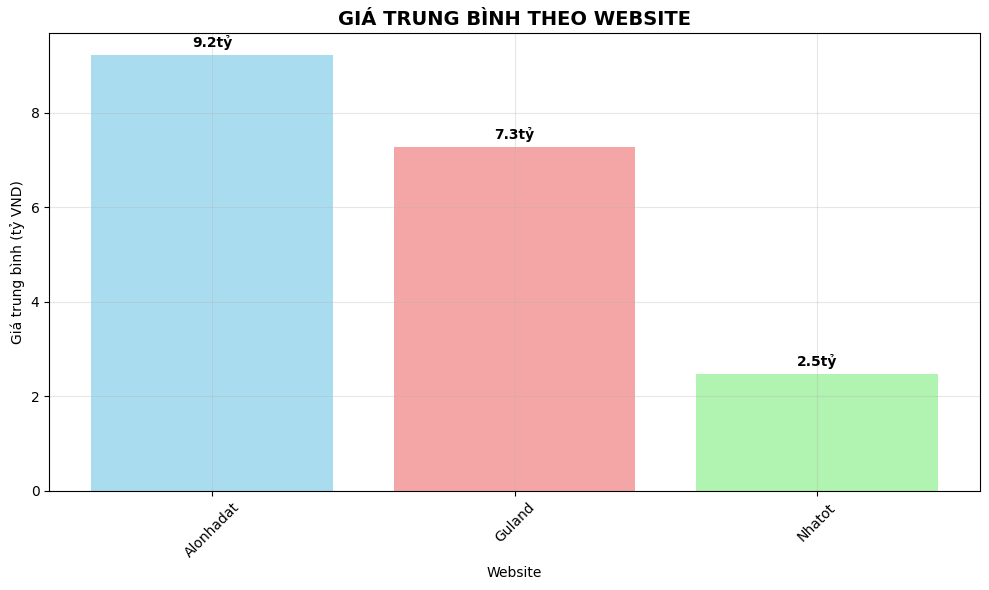

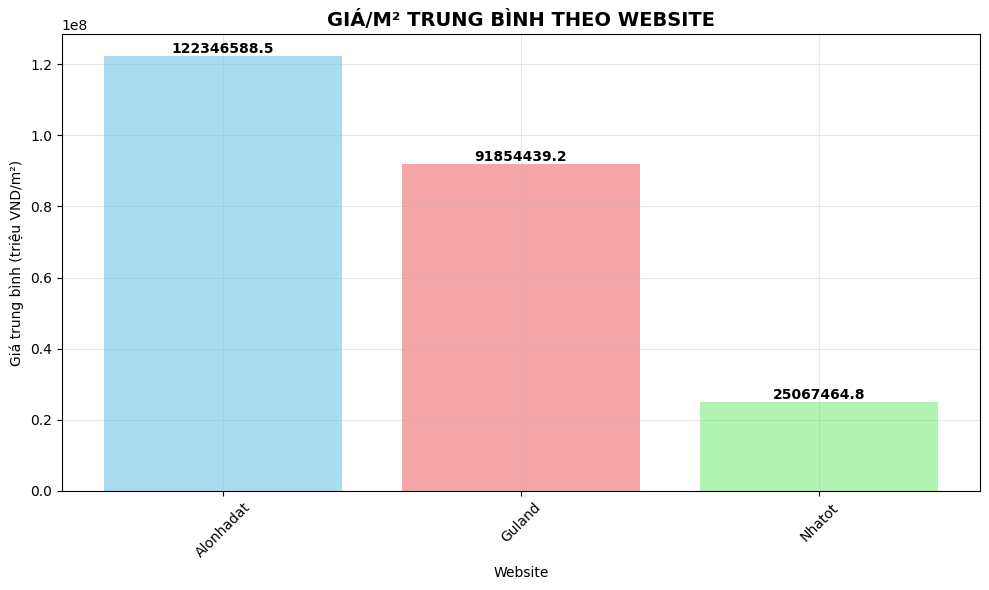

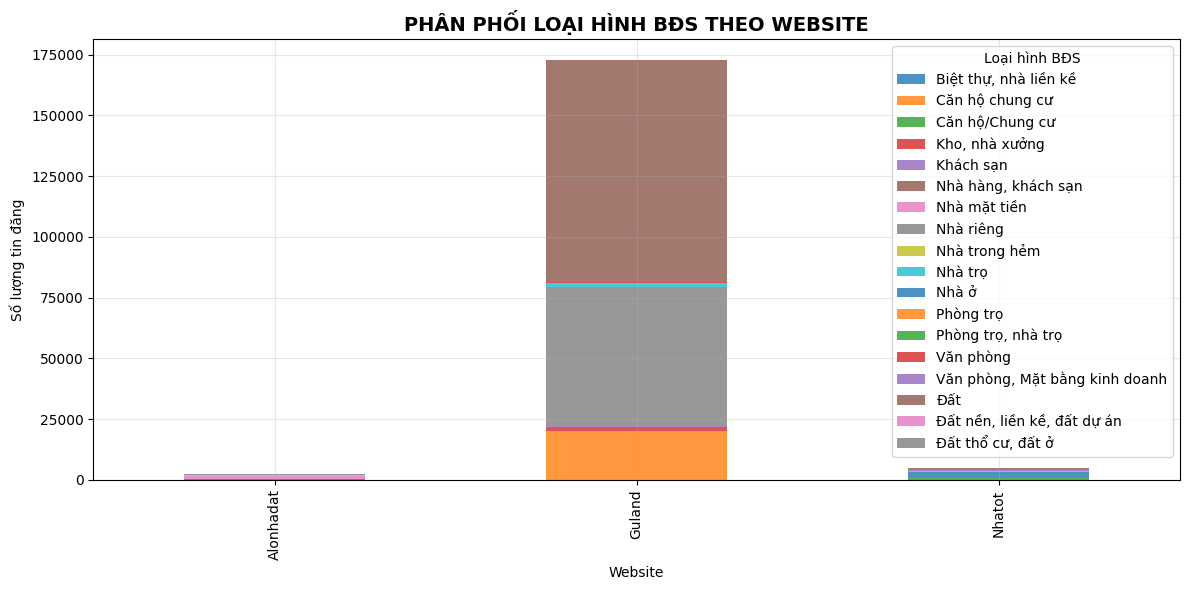

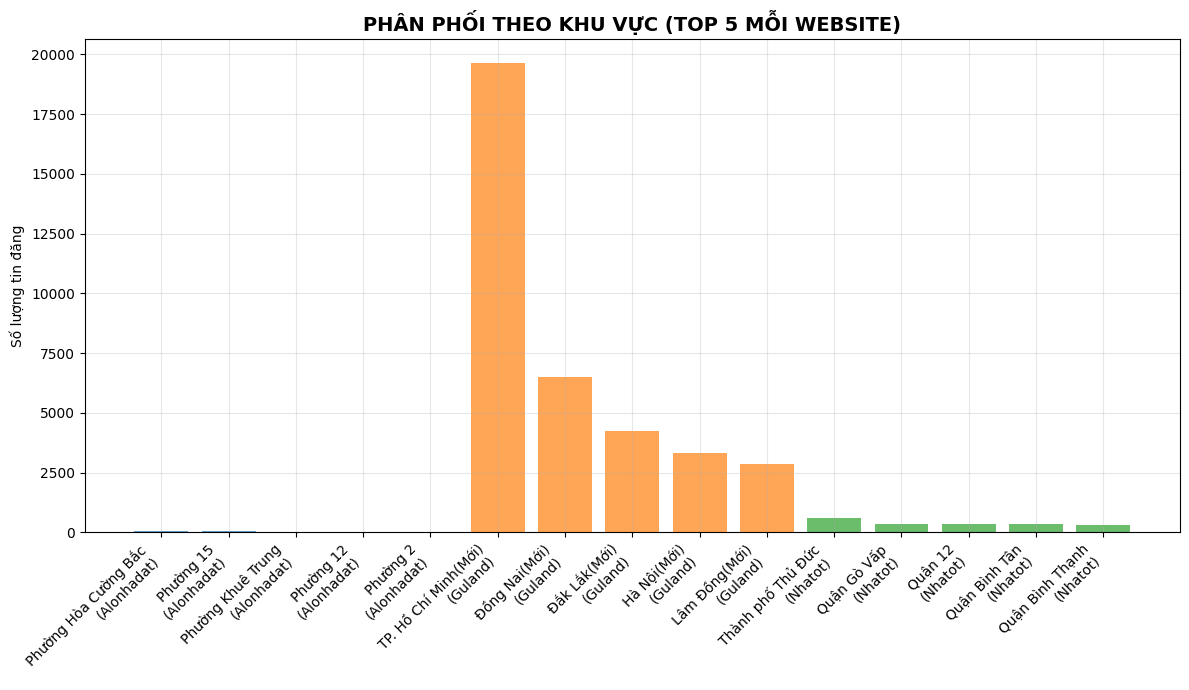


 HO√ÄN T·∫§T KI·ªÇM TRA!


In [14]:
# PH√ÇN T√çCH GI√Å THEO PH√íNG NG·ª¶

# Ki·ªÉm tra c√°c c·ªôt t·ªìn t·∫°i
print(" C√ÅC C·ªòT TRONG DF:")
for col in df.columns:
    print(f"  - {col}")

# Ki·ªÉm tra d·ªØ li·ªáu Bedroom v√† Price
if 'Bedroom' in df.columns and 'Price' in df.columns:
    print(f"\n TH·ªêNG K√ä BEDROOM V√Ä PRICE:")
    print(f"Bedroom notnull: {df['Bedroom'].notna().sum()}")
    print(f"Price notnull: {df['Price'].notna().sum()}")
    
    # Ki·ªÉm tra gi√° tr·ªã c·ª• th·ªÉ
    print(f"\n GI√Å TR·ªä BEDROOM UNIQUE:")
    print(df['Bedroom'].unique()[:10])  # 10 gi√° tr·ªã ƒë·∫ßu
    
    print(f"\n GI√Å TR·ªä PRICE UNIQUE:")
    print(df['Price'].unique()[:10])  # 10 gi√° tr·ªã ƒë·∫ßu
    
    # Th·ª≠ l·ªçc th·ªß c√¥ng
    bedroom_mask = df['Bedroom'].notna()
    price_mask = df['Price'].notna()
    combined_mask = bedroom_mask & price_mask
    
    print(f"\n K·∫æT QU·∫¢ L·ªåC:")
    print(f"Bedroom notnull: {bedroom_mask.sum()}")
    print(f"Price notnull: {price_mask.sum()}")
    print(f"K·∫øt h·ª£p: {combined_mask.sum()}")
    
    if combined_mask.sum() > 0:
        valid_data = df[combined_mask].copy()
        valid_data = valid_data.reset_index(drop=True)
        print(f" C√≥ {len(valid_data)} b·∫£n ghi h·ª£p l·ªá")
        
        # PH√ÇN T√çCH ƒê∆†N GI·∫¢N
        try:
            bedroom_stats = valid_data.groupby('Bedroom')['Price'].agg(['mean', 'count']).reset_index()
            bedroom_stats.columns = ['Bedroom', 'Price_Mean', 'Count']
            bedroom_stats['Price_Billion'] = bedroom_stats['Price_Mean'] / 1e9
            
            print(" GI√Å THEO PH√íNG NG·ª¶:")
            print(bedroom_stats.round(2))
            
        except Exception as e:
            print(f" L·ªói ph√¢n t√≠ch: {e}")
    else:
        print(" Kh√¥ng c√≥ b·∫£n ghi n√†o th·ªèa c·∫£ 2 ƒëi·ªÅu ki·ªán")

# PH√ÇN T√çCH TH·ªêNG K√ä T·ªîNG H·ª¢P
print("\n" + "="*60)
print("PH√ÇN T√çCH TH·ªêNG K√ä T·ªîNG H·ª¢P - FIXED")
print("="*60)

if 'df_combined' in globals() and isinstance(df_combined, pd.DataFrame):
    print(f" df_combined: {df_combined.shape}")
    
    # KI·ªÇM TRA C√ÅC C·ªòT TH·ª∞C T·∫æ
    print(f"\n C√ÅC C·ªòT TRONG DF_COMBINED:")
    all_cols = df_combined.columns.tolist()
    for i, col in enumerate(all_cols[:20]):  # Hi·ªÉn th·ªã 20 c·ªôt ƒë·∫ßu
        print(f"  {i+1:2d}. {col}")
    if len(all_cols) > 20:
        print(f"  ... v√† {len(all_cols) - 20} c·ªôt kh√°c")
    
    # T√åM C√ÅC C·ªòT S·ªê TH·ª∞C T·∫æ
    numeric_cols_found = []
    potential_numeric = ['Price', 'Area', 'Price_per_m2', 'Price_clean', 'Area_clean', 
                        'price', 'area', 'gi√°', 'di·ªán_t√≠ch']
    
    for col in potential_numeric:
        if col in df_combined.columns:
            numeric_cols_found.append(col)
    
    print(f"\n C√ÅC C·ªòT S·ªê T√åM TH·∫§Y: {numeric_cols_found}")
    
    # TH·ªêNG K√ä T·ª™NG C·ªòT M·ªòT C√ÅCH AN TO√ÄN
    for col in numeric_cols_found:
        if col in df_combined.columns:
            print(f"\n--- {col} ---")
            try:
                col_data = df_combined[col]
                non_null_count = col_data.notna().sum()
                
                if non_null_count > 0:
                    stats = col_data.describe()
                    
                    # ƒê·ªãnh d·∫°ng theo ƒë∆°n v·ªã ph√π h·ª£p
                    if 'price' in col.lower():
                        if col_data.mean() > 1e9:  # N·∫øu gi√° l·ªõn, hi·ªÉn th·ªã t·ª∑
                            print(f"Count:    {int(stats['count']):,}")
                            print(f"Mean:     {stats['mean']/1e9:.2f} t·ª∑ VND")
                            print(f"Std:      {stats['std']/1e9:.2f} t·ª∑ VND")
                            print(f"Min:      {stats['min']/1e9:.2f} t·ª∑ VND")
                            print(f"25%:      {stats['25%']/1e9:.2f} t·ª∑ VND")
                            print(f"50%:      {stats['50%']/1e9:.2f} t·ª∑ VND")
                            print(f"75%:      {stats['75%']/1e9:.2f} t·ª∑ VND")
                            print(f"Max:      {stats['max']/1e9:.2f} t·ª∑ VND")
                        else:  # Hi·ªÉn th·ªã tri·ªáu
                            print(f"Count:    {int(stats['count']):,}")
                            print(f"Mean:     {stats['mean']/1e6:.2f} tri·ªáu VND")
                            print(f"Std:      {stats['std']/1e6:.2f} tri·ªáu VND")
                            print(f"Min:      {stats['min']/1e6:.2f} tri·ªáu VND")
                            print(f"25%:      {stats['25%']/1e6:.2f} tri·ªáu VND")
                            print(f"50%:      {stats['50%']/1e6:.2f} tri·ªáu VND")
                            print(f"75%:      {stats['75%']/1e6:.2f} tri·ªáu VND")
                            print(f"Max:      {stats['max']/1e6:.2f} tri·ªáu VND")
                    
                    elif 'area' in col.lower():
                        print(f"Count:    {int(stats['count']):,}")
                        print(f"Mean:     {stats['mean']:.1f} m¬≤")
                        print(f"Std:      {stats['std']:.1f} m¬≤")
                        print(f"Min:      {stats['min']:.1f} m¬≤")
                        print(f"25%:      {stats['25%']:.1f} m¬≤")
                        print(f"50%:      {stats['50%']:.1f} m¬≤")
                        print(f"75%:      {stats['75%']:.1f} m¬≤")
                        print(f"Max:      {stats['max']:.1f} m¬≤")
                    
                    else:
                        print(stats.round(2))
                        
                else:
                    print(" Kh√¥ng c√≥ d·ªØ li·ªáu")
                    
            except Exception as e:
                print(f" L·ªói khi th·ªëng k√™ {col}: {e}")
    
    # SO S√ÅNH WEBSITE - CH·ªà V·∫º N·∫æU C√ì D·ªÆ LI·ªÜU
    if 'Source' in df_combined.columns:
        sources = df_combined['Source'].unique()
        print(f"\n C√ÅC WEBSITE: {list(sources)}")
        
        # V·∫Ω bi·ªÉu ƒë·ªì n·∫øu c√≥ d·ªØ li·ªáu price
        price_col_for_plot = None
        for col in ['Price', 'Price_clean', 'price']:
            if col in df_combined.columns and df_combined[col].notna().sum() > 0:
                price_col_for_plot = col
                break
        
        if price_col_for_plot:
            try:
                plt.figure(figsize=(10, 6))
                price_by_source = df_combined.groupby('Source')[price_col_for_plot].mean() / 1e9
                
                bars = plt.bar(range(len(price_by_source)), price_by_source.values,
                              color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.7)
                plt.title('GI√Å TRUNG B√åNH THEO WEBSITE', fontsize=14, fontweight='bold')
                plt.xlabel('Website')
                plt.ylabel('Gi√° trung b√¨nh (t·ª∑ VND)')
                plt.xticks(range(len(price_by_source)), price_by_source.index, rotation=45)
                plt.grid(True, alpha=0.3)
                
                for bar, price in zip(bars, price_by_source.values):
                    plt.text(bar.get_x() + bar.get_width()/2, price + 0.1, 
                            f'{price:.1f}t·ª∑', ha='center', va='bottom', fontweight='bold')
                
                plt.tight_layout()
                plt.show()
                
            except Exception as e:
                print(f" L·ªói v·∫Ω bi·ªÉu ƒë·ªì: {e}")

        # GI√Å/M¬≤ TRUNG B√åNH THEO WEBSITE
    if 'Source' in df_combined.columns and 'Price_per_m2' in df_combined.columns:
        try:
            plt.figure(figsize=(10, 6))
            price_m2_by_source = df_combined.groupby('Source')['Price_per_m2'].mean()
            
            bars = plt.bar(range(len(price_m2_by_source)), price_m2_by_source.values,
                          color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.7)
            plt.title('GI√Å/M¬≤ TRUNG B√åNH THEO WEBSITE', fontsize=14, fontweight='bold')
            plt.xlabel('Website')
            plt.ylabel('Gi√° trung b√¨nh (tri·ªáu VND/m¬≤)')
            plt.xticks(range(len(price_m2_by_source)), price_m2_by_source.index, rotation=45)
            plt.grid(True, alpha=0.3)
            
            for bar, val in zip(bars, price_m2_by_source.values):
                plt.text(bar.get_x() + bar.get_width()/2, val + 1, 
                         f'{val:.1f}', ha='center', va='bottom', fontweight='bold')
            
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f" L·ªói v·∫Ω bi·ªÉu ƒë·ªì Gi√°/m¬≤: {e}")
    
    
    # PH√ÇN PH·ªêI LO·∫†I H√åNH BƒêS THEO WEBSITE
    if 'Source' in df_combined.columns and 'Property_Type' in df_combined.columns:
        try:
            property_counts = df_combined.groupby(['Source', 'Property_Type']).size().unstack(fill_value=0)
            
            property_counts.plot(
                kind='bar',
                stacked=True,
                figsize=(12, 6),
                alpha=0.8
            )
            plt.title('PH√ÇN PH·ªêI LO·∫†I H√åNH BƒêS THEO WEBSITE', fontsize=14, fontweight='bold')
            plt.xlabel('Website')
            plt.ylabel('S·ªë l∆∞·ª£ng tin ƒëƒÉng')
            plt.grid(True, alpha=0.3)
            plt.legend(title="Lo·∫°i h√¨nh BƒêS")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f" L·ªói v·∫Ω bi·ªÉu ƒë·ªì lo·∫°i h√¨nh BƒêS: {e}")
    
    
    # PH√ÇN PH·ªêI THEO QU·∫¨N (TOP 5 M·ªñI WEBSITE)
    if 'Source' in df_combined.columns and 'District' in df_combined.columns:
        try:
            plt.figure(figsize=(12, 7))
            
            # L·∫•y top 5 qu·∫≠n m·ªói website
            for i, src in enumerate(df_combined['Source'].unique()):
                top5_districts = (
                    df_combined[df_combined['Source'] == src]['District']
                    .value_counts()
                    .head(5)
                )
                plt.bar(
                    [f"{d}\n({src})" for d in top5_districts.index],
                    top5_districts.values,
                    alpha=0.7
                )
            
            plt.title('PH√ÇN PH·ªêI THEO KHU V·ª∞C (TOP 5 M·ªñI WEBSITE)', fontsize=14, fontweight='bold')
            plt.ylabel('S·ªë l∆∞·ª£ng tin ƒëƒÉng')
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f" L·ªói v·∫Ω bi·ªÉu ƒë·ªì Qu·∫≠n: {e}")

print("\n HO√ÄN T·∫§T KI·ªÇM TRA!")


 PH√ÇN T√çCH CHI TI·∫æT MISSING DATA:
‚Ä¢ Area: 179,762 kh√¥ng null (0.0% missing)
‚Ä¢ Rooms: 3,112 kh√¥ng null (98.3% missing)
‚Ä¢ Toilets: 2,590 kh√¥ng null (98.6% missing)
‚Ä¢ Floors: 40,387 kh√¥ng null (77.5% missing)
‚Ä¢ Title_Length: 179,762 kh√¥ng null (0.0% missing)
‚Ä¢ Property_Type: 179,762 kh√¥ng null (0.0% missing)
‚Ä¢ Legal_Status: 7,021 kh√¥ng null (96.1% missing)
‚Ä¢ Source: 179,762 kh√¥ng null (0.0% missing)
‚Ä¢ Price_clean: 179,762 kh√¥ng null (0.0% missing)

 X·ª¨ L√ù MISSING DATA THEO CHI·∫æN L∆Ø·ª¢C:
 Rooms: Impute b·∫±ng median = 3.0
 Toilets: Impute b·∫±ng median = 2.0
 Floors: Missing qu√° nhi·ªÅu (>70%), c√≥ th·ªÉ b·ªè qua
 Property_Type: Impute b·∫±ng mode = 'ƒê·∫•t'
 Legal_Status: Impute b·∫±ng mode = 'S·ªï h·ªìng ri√™ng'

 M√É H√ìA BI·∫æN PH√ÇN LO·∫†I:
 Property_Type: 18 categories
 Property_Type encoded th√†nh 15 categories
 Legal_Status encoded th√†nh 3 categories
 Source encoded
 District: 3689 categories - X·ª≠ l√Ω ƒë·∫∑c bi·ªát
 District encoded th√†nh 

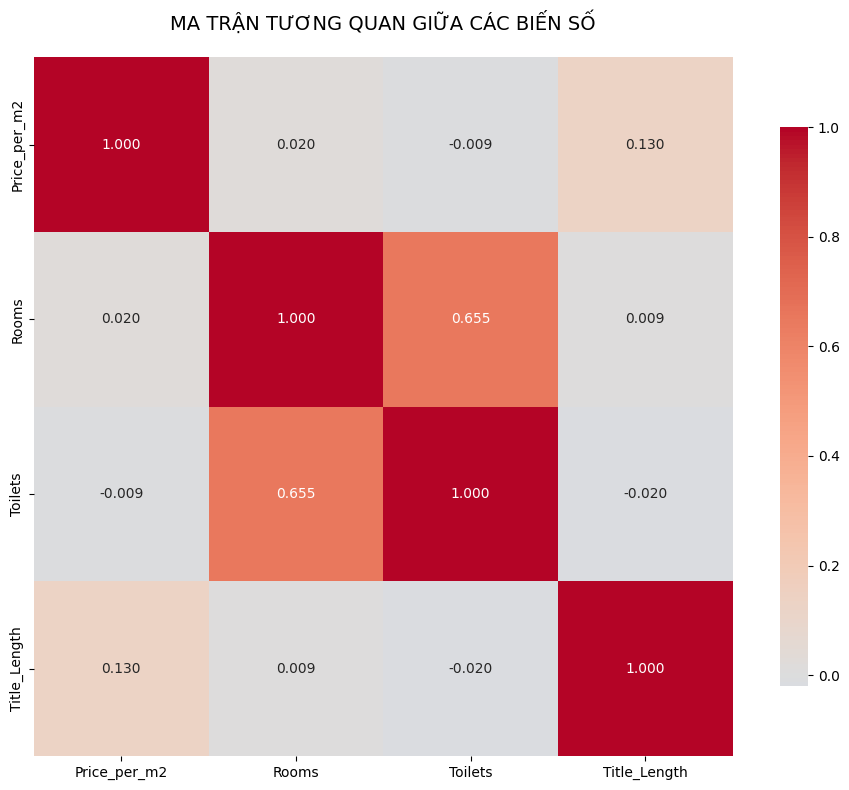


 HO√ÄN T·∫§T CHU·∫®N B·ªä D·ªÆ LI·ªÜU!


In [15]:
# === PH√ÇN T√çCH T∆Ø∆†NG QUAN & M√É H√ìA ===

# PH√ÇN T√çCH MISSING DATA CHI TI·∫æT TR∆Ø·ªöC KHI X·ª¨ L√ù
print("\n PH√ÇN T√çCH CHI TI·∫æT MISSING DATA:")

# Ki·ªÉm tra missing data cho t·ª´ng feature quan tr·ªçng
features_to_check = ['Area', 'Rooms', 'Toilets', 'Floors', 'Title_Length', 
                    'Property_Type', 'Legal_Status', 'Source', 'Price_clean']

for feature in features_to_check:
    if feature in df_combined.columns:
        non_null_count = df_combined[feature].notna().sum()
        missing_pct = (1 - non_null_count/len(df_combined)) * 100
        print(f"‚Ä¢ {feature}: {non_null_count:,} kh√¥ng null ({missing_pct:.1f}% missing)")

# X·ª¨ L√ù MISSING DATA THEO CHI·∫æN L∆Ø·ª¢C TH√îNG MINH
print("\n X·ª¨ L√ù MISSING DATA THEO CHI·∫æN L∆Ø·ª¢C:")

df_processed = df_combined.copy()

# X·ª≠ l√Ω t·ª´ng feature v·ªõi chi·∫øn l∆∞·ª£c ph√π h·ª£p
# Feature quan tr·ªçng: Impute b·∫±ng median
if 'Rooms' in df_processed.columns:
    rooms_median = df_processed['Rooms'].median()
    df_processed['Rooms'] = df_processed['Rooms'].fillna(rooms_median)
    print(f" Rooms: Impute b·∫±ng median = {rooms_median}")

if 'Toilets' in df_processed.columns:
    toilets_median = df_processed['Toilets'].median()
    df_processed['Toilets'] = df_processed['Toilets'].fillna(toilets_median)
    print(f" Toilets: Impute b·∫±ng median = {toilets_median}")

# Feature missing nhi·ªÅu: C√¢n nh·∫Øc b·ªè ho·∫∑c t·∫°o binary flag
if 'Floors' in df_processed.columns:
    floors_non_null = df_processed['Floors'].notna().sum()
    if floors_non_null / len(df_processed) < 0.3:  # N·∫øu missing > 70%
        print(" Floors: Missing qu√° nhi·ªÅu (>70%), c√≥ th·ªÉ b·ªè qua")
        # T·∫°o binary flag thay v√¨ d√πng gi√° tr·ªã s·ªë
        df_processed['Has_Floors_Info'] = df_processed['Floors'].notna().astype(int)
        df_processed = df_processed.drop('Floors', axis=1)
    else:
        floors_median = df_processed['Floors'].median()
        df_processed['Floors'] = df_processed['Floors'].fillna(floors_median)
        print(f" Floors: Impute b·∫±ng median = {floors_median}")

# Features ph√¢n lo·∫°i: Impute b·∫±ng mode
categorical_features = ['Property_Type', 'Legal_Status']
for feature in categorical_features:
    if feature in df_processed.columns:
        mode_value = df_processed[feature].mode()[0] if not df_processed[feature].mode().empty else 'Unknown'
        df_processed[feature] = df_processed[feature].fillna(mode_value)
        print(f" {feature}: Impute b·∫±ng mode = '{mode_value}'")

# M√É H√ìA BI·∫æN PH√ÇN LO·∫†I V·ªöI X·ª¨ L√ù ƒê·∫∂C BI·ªÜT
print("\n M√É H√ìA BI·∫æN PH√ÇN LO·∫†I:")

from sklearn.preprocessing import LabelEncoder

# Property_Type - x·ª≠ l√Ω categories nhi·ªÅu
if 'Property_Type' in df_processed.columns:
    prop_type_counts = df_processed['Property_Type'].value_counts()
    print(f" Property_Type: {len(prop_type_counts)} categories")
    
    # Gom nh√≥m categories hi·∫øm th√†nh 'Other'
    top_categories = prop_type_counts[prop_type_counts >= 100].index  # √çt nh·∫•t 100 m·∫´u
    df_processed['Property_Type_Grouped'] = df_processed['Property_Type'].apply(
        lambda x: x if x in top_categories else 'Other'
    )
    
    le_property = LabelEncoder()
    df_processed['Property_Type_encoded'] = le_property.fit_transform(df_processed['Property_Type_Grouped'])
    print(f" Property_Type encoded th√†nh {len(le_property.classes_)} categories")

# Legal_Status - √≠t categories, x·ª≠ l√Ω ƒë∆°n gi·∫£n
if 'Legal_Status' in df_processed.columns:
    le_legal = LabelEncoder()
    df_processed['Legal_Status_encoded'] = le_legal.fit_transform(df_processed['Legal_Status'])
    print(f" Legal_Status encoded th√†nh {len(le_legal.classes_)} categories")

# Source - 3 categories, x·ª≠ l√Ω ƒë∆°n gi·∫£n
if 'Source' in df_processed.columns:
    le_source = LabelEncoder()
    df_processed['Source_encoded'] = le_source.fit_transform(df_processed['Source'])
    print(" Source encoded")

# District - qu√° nhi·ªÅu categories, x·ª≠ l√Ω ƒë·∫∑c bi·ªát
if 'District' in df_processed.columns:
    district_counts = df_processed['District'].value_counts()
    print(f" District: {len(district_counts)} categories - X·ª≠ l√Ω ƒë·∫∑c bi·ªát")
    
    # Ph∆∞∆°ng √°n 1: Ch·ªâ gi·ªØ l·∫°i districts ph·ªï bi·∫øn
    top_districts = district_counts[district_counts >= 50].index  # √çt nh·∫•t 50 m·∫´u
    if len(top_districts) > 0:
        df_processed['District_Grouped'] = df_processed['District'].apply(
            lambda x: x if x in top_districts else 'Other'
        )
        le_district = LabelEncoder()
        df_processed['District_encoded'] = le_district.fit_transform(df_processed['District_Grouped'])
        print(f" District encoded th√†nh {len(le_district.classes_)} categories")
    else:
        print(" District: Kh√¥ng ƒë·ªß districts ph·ªï bi·∫øn, b·ªè qua")

# CHU·∫®N B·ªä FEATURES CU·ªêI C√ôNG - ∆ØU TI√äN FEATURES C√ì D·ªÆ LI·ªÜU T·ªêT
print("\n CHU·∫®N B·ªä FEATURES CU·ªêI C√ôNG:")

# Target column
target_column = 'Price_clean'
print(f" Target column: {target_column}")

# L·ª±a ch·ªçn features ∆∞u ti√™n c√≥ d·ªØ li·ªáu t·ªët
base_features = ['Area', 'Title_Length']  # Lu√¥n c√≥ d·ªØ li·ªáu
additional_features = []

# Th√™m features s·ªë n·∫øu c√≥ ƒë·ªß d·ªØ li·ªáu
numeric_candidates = ['Rooms', 'Toilets', 'Price_per_m2']
for feature in numeric_candidates:
    if feature in df_processed.columns:
        non_null_ratio = df_processed[feature].notna().sum() / len(df_processed)
        if non_null_ratio >= 0.7:  # √çt nh·∫•t 70% d·ªØ li·ªáu
            additional_features.append(feature)
            print(f" Th√™m numeric feature: {feature} ({non_null_ratio:.1%} kh√¥ng null)")
        else:
            print(f" B·ªè qua {feature} (ch·ªâ {non_null_ratio:.1%} kh√¥ng null)")

# Th√™m features encoded
encoded_features = [col for col in df_processed.columns if col.endswith('_encoded')]
additional_features.extend(encoded_features)
print(f" Th√™m encoded features: {len(encoded_features)} features")

# Th√™m features t·ª´ kh√≥a nh·ªã ph√¢n (lu√¥n c√≥ d·ªØ li·ªáu)
keyword_features = [col for col in df_processed.columns if col.startswith('Keyword_')]
additional_features.extend(keyword_features)
print(f" Th√™m keyword features: {len(keyword_features)} features")

# T·ªïng h·ª£p features cu·ªëi c√πng
final_features = base_features + additional_features
final_features = list(set(final_features))  # Remove duplicates

print(f" Features s·ª≠ d·ª•ng ({len(final_features)}): {final_features}")

# T·∫†O DATASET CU·ªêI C√ôNG V·ªöI X·ª¨ L√ù MISSING DATA TRI·ªÜT ƒê·ªÇ
print("\n T·∫†O DATASET CU·ªêI C√ôNG:")

# ƒê·∫£m b·∫£o target c√≥ d·ªØ li·ªáu
if target_column not in df_processed.columns:
    print(f" L·ªói: Kh√¥ng t√¨m th·∫•y target column '{target_column}'")
else:
    # T·∫°o X v√† y
    X = df_processed[final_features].copy()
    y = df_processed[target_column]
    
    # X·ª¨ L√ù MISSING DATA TRI·ªÜT ƒê·ªÇ CHO T·ª™NG FEATURE
    print(" X·ª≠ l√Ω missing data cu·ªëi c√πng:")
    for feature in X.columns:
        if X[feature].isna().any():
            missing_count = X[feature].isna().sum()
            print(f"  {feature}: {missing_count} missing values")
            
            if X[feature].dtype in ['int64', 'float64']:
                # Impute numeric b·∫±ng median
                impute_value = X[feature].median()
                X[feature] = X[feature].fillna(impute_value)
                print(f"   ‚Ü≥ ƒê√£ impute b·∫±ng median: {impute_value}")
            else:
                # Impute categorical b·∫±ng mode
                impute_value = X[feature].mode()[0] if not X[feature].mode().empty else 'Unknown'
                X[feature] = X[feature].fillna(impute_value)
                print(f"   ‚Ü≥ ƒê√£ impute b·∫±ng mode: '{impute_value}'")
    
    # L·ªçc c√°c m·∫´u c√≥ target values
    valid_mask = y.notna()
    X_final = X[valid_mask]
    y_final = y[valid_mask]
    
    print(f" K·∫æT QU·∫¢ CU·ªêI C√ôNG:")
    print(f"   ‚Ä¢ S·ªë m·∫´u: {X_final.shape[0]}")
    print(f"   ‚Ä¢ S·ªë features: {X_final.shape[1]}")
    print(f"   ‚Ä¢ C√≥ missing data: {X_final.isna().any().any()}")
    
    if X_final.shape[0] == 0:
        print(" V·∫™N KH√îNG C√ì M·∫™U N√ÄO - KI·ªÇM TRA L·∫†I")
        # Debug chi ti·∫øt
        print("\n DEBUG CHI TI·∫æT:")
        for feature in final_features:
            if feature in df_processed.columns:
                print(f"   {feature}: {df_processed[feature].notna().sum()} kh√¥ng null")
    else:
        print(" ƒê√É CHU·∫®N B·ªä D·ªÆ LI·ªÜU TH√ÄNH C√îNG!")
        
        # PH√ÇN T√çCH T∆Ø∆†NG QUAN V·ªöI D·ªÆ LI·ªÜU ƒê√É L√ÄM S·∫†CH
        print("\n PH√ÇN T√çCH T∆Ø∆†NG QUAN:")
        
        # Ch·ªçn c√°c features s·ªë ƒë·ªÉ ph√¢n t√≠ch t∆∞∆°ng quan
        numeric_features_for_corr = []
        for feature in ['Area', 'Price_per_m2', 'Rooms', 'Toilets', 'Title_Length']:
            if feature in X_final.columns and X_final[feature].dtype in ['int64', 'float64']:
                numeric_features_for_corr.append(feature)
        
        if len(numeric_features_for_corr) >= 2:
            # T√≠nh correlation matrix
            corr_matrix = X_final[numeric_features_for_corr].corr()
            print(" Ma tr·∫≠n t∆∞∆°ng quan:")
            print(corr_matrix.round(3))
            
            # V·∫Ω heatmap
            plt.figure(figsize=(10, 8))
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                       square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
            plt.title('MA TR·∫¨N T∆Ø∆†NG QUAN GI·ªÆA C√ÅC BI·∫æN S·ªê', fontsize=14, pad=20)
            plt.tight_layout()
            plt.show()
        else:
            print(" Kh√¥ng ƒë·ªß features s·ªë ƒë·ªÉ ph√¢n t√≠ch t∆∞∆°ng quan")

print("\n HO√ÄN T·∫§T CHU·∫®N B·ªä D·ªÆ LI·ªÜU!")

 ƒêang s·ª≠a l·ªói c·ªôt Area trong df_combined...
 K·∫æT QU·∫¢ S·ª¨A L·ªñI AREA:
   - T·ªïng s·ªë b·∫£n ghi: 179762
   - S·ªë gi√° tr·ªã h·ª£p l·ªá: 177184
   - S·ªë gi√° tr·ªã NaN: 2578
   - T·ª∑ l·ªá h·ª£p l·ªá: 98.6%
   - Di·ªán t√≠ch trung b√¨nh: 386.4 m¬≤
   - Di·ªán t√≠ch min: 1.0 m¬≤
   - Di·ªán t√≠ch max: 10000.0 m¬≤
   - Di·ªán t√≠ch median: 100.0 m¬≤

 SAMPLE VALUES TR∆Ø·ªöC V√Ä SAU KHI S·ª¨A:
        0. 'Di·ªán t√≠ch: 150 m
2' ‚Üí 150.0
        1. 'Di·ªán t√≠ch: 150 m
2' ‚Üí 150.0
        2. 'Di·ªán t√≠ch: 150 m
2' ‚Üí 150.0
        3. 'Di·ªán t√≠ch: 150 m
2' ‚Üí 150.0
        4. 'Di·ªán t√≠ch: 150 m
2' ‚Üí 150.0
        5. 'Di·ªán t√≠ch: 150 m
2' ‚Üí 150.0
        6. 'Di·ªán t√≠ch: 150 m
2' ‚Üí 150.0
        7. 'Di·ªán t√≠ch: 150 m
2' ‚Üí 150.0
        8. 'Di·ªán t√≠ch: 150 m
2' ‚Üí 150.0
        9. 'Di·ªán t√≠ch: 150 m
2' ‚Üí 150.0

 KI·ªÇM TRA D·ªÆ LI·ªÜU SAU KHI S·ª¨A:
   - Ki·ªÉu d·ªØ li·ªáu Area: float64
   - S·ªë gi√° tr·ªã h·ª£p l·ªá: 177184
   - Di·ªán t√≠ch trung 

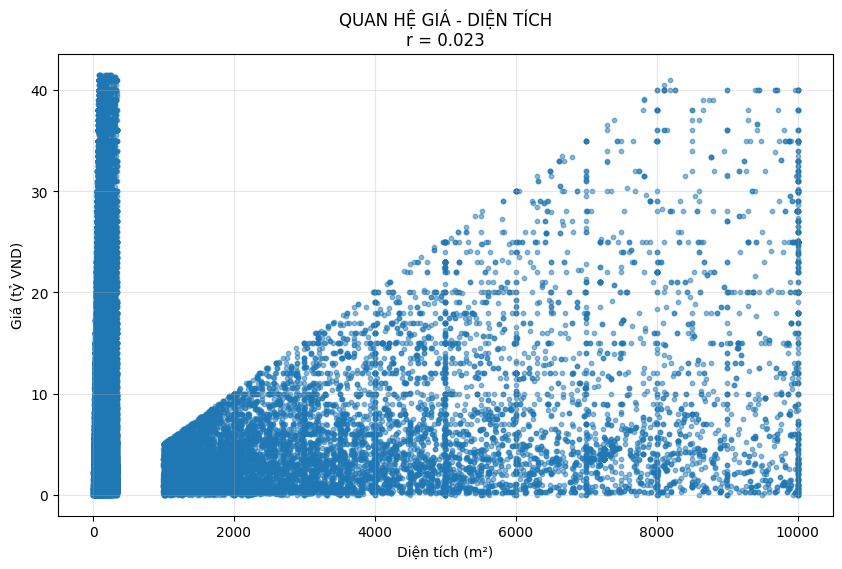

In [16]:
# === S·ª¨A L·ªñI D·ªÆ LI·ªÜU AREA TR∆Ø·ªöC KHI PH√ÇN T√çCH ===

import re
import pandas as pd
import numpy as np

def extract_area_value(area_str):
    """Tr√≠ch xu·∫•t s·ªë t·ª´ chu·ªói di·ªán t√≠ch"""
    if pd.isna(area_str) or area_str == '':
        return np.nan
    
    # Chuy·ªÉn th√†nh string ƒë·ªÉ x·ª≠ l√Ω
    area_str = str(area_str)
    
    # Debug: hi·ªÉn th·ªã m·ªôt s·ªë gi√° tr·ªã ƒë·ªÉ hi·ªÉu c·∫•u tr√∫c
    if 'Di·ªán t√≠ch' in area_str:
        # Pattern cho chu·ªói "Di·ªán t√≠ch: XXX m"
        match = re.search(r'Di·ªán t√≠ch:\s*(\d+\.?\d*)\s*m', area_str)
        if match:
            return float(match.group(1))
    
    # Pattern chung: t√¨m s·ªë trong chu·ªói
    numbers = re.findall(r'\d+\.?\d*', area_str)
    
    if numbers:
        # L·∫•y s·ªë ƒë·∫ßu ti√™n
        area_value = float(numbers[0])
        
        # Ki·ªÉm tra ƒë∆°n v·ªã v√† ph·∫°m vi h·ª£p l√Ω
        if any(unit in area_str for unit in ['m¬≤', 'm2', 'm ', ' m√©t', 'meter']):
            return area_value
        elif 1 <= area_value <= 10000:  # Di·ªán t√≠ch h·ª£p l√Ω t·ª´ 1-10,000 m¬≤
            return area_value
        else:
            return np.nan
    else:
        return np.nan

# 1. S·ª¨A L·ªñI AREA TRONG DF_COMBINED
print(" ƒêang s·ª≠a l·ªói c·ªôt Area trong df_combined...")

# T·∫°o c·ªôt Area_clean_fixed t·ª´ c·ªôt Area g·ªëc
df_combined['Area_clean_fixed'] = df_combined['Area'].apply(extract_area_value)

# Ki·ªÉm tra k·∫øt qu·∫£
print(" K·∫æT QU·∫¢ S·ª¨A L·ªñI AREA:")
print(f"   - T·ªïng s·ªë b·∫£n ghi: {len(df_combined)}")
print(f"   - S·ªë gi√° tr·ªã h·ª£p l·ªá: {df_combined['Area_clean_fixed'].notna().sum()}")
print(f"   - S·ªë gi√° tr·ªã NaN: {df_combined['Area_clean_fixed'].isna().sum()}")
print(f"   - T·ª∑ l·ªá h·ª£p l·ªá: {df_combined['Area_clean_fixed'].notna().sum()/len(df_combined)*100:.1f}%")

if df_combined['Area_clean_fixed'].notna().sum() > 0:
    print(f"   - Di·ªán t√≠ch trung b√¨nh: {df_combined['Area_clean_fixed'].mean():.1f} m¬≤")
    print(f"   - Di·ªán t√≠ch min: {df_combined['Area_clean_fixed'].min():.1f} m¬≤")
    print(f"   - Di·ªán t√≠ch max: {df_combined['Area_clean_fixed'].max():.1f} m¬≤")
    print(f"   - Di·ªán t√≠ch median: {df_combined['Area_clean_fixed'].median():.1f} m¬≤")

# Hi·ªÉn th·ªã sample values ƒë·ªÉ ki·ªÉm tra
print("\n SAMPLE VALUES TR∆Ø·ªöC V√Ä SAU KHI S·ª¨A:")
sample_indices = df_combined.index[:10]  # L·∫•y 10 d√≤ng ƒë·∫ßu
for idx in sample_indices:
    old_val = df_combined.loc[idx, 'Area']
    new_val = df_combined.loc[idx, 'Area_clean_fixed']
    print(f"   {idx:6d}. '{old_val}' ‚Üí {new_val}")

# 2. THAY TH·∫æ C·ªòT AREA C≈® B·∫∞NG D·ªÆ LI·ªÜU ƒê√É S·ª¨A
df_combined['Area'] = df_combined['Area_clean_fixed']

# 3. KI·ªÇM TRA L·∫†I D·ªÆ LI·ªÜU SAU KHI S·ª¨A
print("\n KI·ªÇM TRA D·ªÆ LI·ªÜU SAU KHI S·ª¨A:")
print(f"   - Ki·ªÉu d·ªØ li·ªáu Area: {df_combined['Area'].dtype}")
print(f"   - S·ªë gi√° tr·ªã h·ª£p l·ªá: {df_combined['Area'].notna().sum()}")
print(f"   - Di·ªán t√≠ch trung b√¨nh: {df_combined['Area'].mean():.1f} m¬≤")

# 4. PH√ÇN T√çCH T∆Ø∆†NG QUAN NGAY L·∫¨P T·ª®C
print("\n PH√ÇN T√çCH T∆Ø∆†NG QUAN NGAY SAU KHI S·ª¨A L·ªñI:")

# T·∫°o dataframe s·∫°ch cho correlation
df_clean = df_combined[['Price_clean', 'Area']].dropna()

if len(df_clean) > 10:
    from scipy.stats import pearsonr
    
    corr_coef, p_value = pearsonr(df_clean['Price_clean'], df_clean['Area'])
    
    print(f" K·∫æT QU·∫¢ T∆Ø∆†NG QUAN PEARSON:")
    print(f"   ‚Ä¢ H·ªá s·ªë t∆∞∆°ng quan (r): {corr_coef:.3f}")
    print(f"   ‚Ä¢ P-value: {p_value:.10f}")
    print(f"   ‚Ä¢ R¬≤: {corr_coef**2:.3f}")
    print(f"   ‚Ä¢ S·ªë m·∫´u: {len(df_clean):,}")
    
    # ƒê√°nh gi√° m·ª©c ƒë·ªô t∆∞∆°ng quan
    if abs(corr_coef) >= 0.7:
        strength = "R·∫§T M·∫†NH"
    elif abs(corr_coef) >= 0.5:
        strength = "M·∫†NH"
    elif abs(corr_coef) >= 0.3:
        strength = "TRUNG B√åNH" 
    elif abs(corr_coef) >= 0.1:
        strength = "Y·∫æU"
    else:
        strength = "R·∫§T Y·∫æU"
    
    direction = "D∆Ø∆†NG" if corr_coef > 0 else "√ÇM"
    
    print(f"   ‚Ä¢ M·ª©c ƒë·ªô: {strength}")
    print(f"   ‚Ä¢ H∆∞·ªõng: {direction}")
    
    # Visualization ƒë∆°n gi·∫£n
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df_clean['Area'], df_clean['Price_clean']/1e9, alpha=0.5, s=10)
    plt.xlabel('Di·ªán t√≠ch (m¬≤)')
    plt.ylabel('Gi√° (t·ª∑ VND)')
    plt.title(f'QUAN H·ªÜ GI√Å - DI·ªÜN T√çCH\nr = {corr_coef:.3f}')
    plt.grid(True, alpha=0.3)
    plt.show()
    
else:
    print(" Kh√¥ng ƒë·ªß d·ªØ li·ªáu h·ª£p l·ªá ƒë·ªÉ ph√¢n t√≠ch t∆∞∆°ng quan")

In [17]:
# === PH√ÇN T√çCH C√ÅC Y·∫æU T·ªê ·∫¢NH H∆Ø·ªûNG ƒê·∫æN GI√Å ===

# 1. PH√ÇN T√çCH THEO LO·∫†I H√åNH BƒêS
print("\n PH√ÇN T√çCH THEO LO·∫†I H√åNH B·∫§T ƒê·ªòNG S·∫¢N:")

if 'Property_Type' in df_combined.columns:
    # L·∫•y top 10 lo·∫°i h√¨nh ph·ªï bi·∫øn nh·∫•t
    top_property_types = df_combined['Property_Type'].value_counts().head(10).index
    
    property_stats = []
    for prop_type in top_property_types:
        prop_data = df_combined[df_combined['Property_Type'] == prop_type]
        if len(prop_data) > 10:
            valid_data = prop_data[['Price_clean', 'Area']].dropna()
            if len(valid_data) > 5:
                # T√≠nh correlation di·ªán t√≠ch - gi√° cho t·ª´ng lo·∫°i
                corr_prop, _ = pearsonr(valid_data['Price_clean'], valid_data['Area'])
                avg_price = valid_data['Price_clean'].mean() / 1e9
                avg_area = valid_data['Area'].mean()
                count = len(valid_data)
                
                property_stats.append({
                    'Lo·∫°i h√¨nh': prop_type,
                    'S·ªë l∆∞·ª£ng': count,
                    'Gi√° TB (t·ª∑)': avg_price,
                    'Di·ªán t√≠ch TB': avg_area,
                    'Correlation': corr_prop
                })
    
    # S·∫Øp x·∫øp theo correlation
    property_stats.sort(key=lambda x: abs(x['Correlation']), reverse=True)
    
    print(" CORRELATION DI·ªÜN T√çCH - GI√Å THEO LO·∫†I H√åNH BƒêS:")
    for i, stats in enumerate(property_stats[:10], 1):
        strength = "M·∫†NH" if abs(stats['Correlation']) >= 0.5 else "TB" if abs(stats['Correlation']) >= 0.3 else "Y·∫æU"
        print(f"   {i:2d}. {stats['Lo·∫°i h√¨nh']:30} | r = {stats['Correlation']:6.3f} | Gi√°: {stats['Gi√° TB (t·ª∑)']:5.2f}t·ª∑ | DT: {stats['Di·ªán t√≠ch TB']:5.0f}m¬≤ | n={stats['S·ªë l∆∞·ª£ng']:>5}")

# 2. PH√ÇN T√çCH THEO NGU·ªíN D·ªÆ LI·ªÜU (SOURCE)
print("\n PH√ÇN T√çCH THEO NGU·ªíN D·ªÆ LI·ªÜU:")

if 'Source' in df_combined.columns:
    source_stats = []
    for source in df_combined['Source'].unique():
        source_data = df_combined[df_combined['Source'] == source]
        if len(source_data) > 10:
            valid_data = source_data[['Price_clean', 'Area']].dropna()
            if len(valid_data) > 5:
                corr_source, _ = pearsonr(valid_data['Price_clean'], valid_data['Area'])
                avg_price = valid_data['Price_clean'].mean() / 1e9
                avg_area = valid_data['Area'].mean()
                count = len(valid_data)
                
                source_stats.append({
                    'Ngu·ªìn': source,
                    'S·ªë l∆∞·ª£ng': count,
                    'Gi√° TB (t·ª∑)': avg_price,
                    'Di·ªán t√≠ch TB': avg_area,
                    'Correlation': corr_source
                })
    
    # S·∫Øp x·∫øp theo correlation
    source_stats.sort(key=lambda x: abs(x['Correlation']), reverse=True)
    
    print(" CORRELATION THEO NGU·ªíN D·ªÆ LI·ªÜU:")
    for stats in source_stats:
        strength = "M·∫†NH" if abs(stats['Correlation']) >= 0.5 else "TB" if abs(stats['Correlation']) >= 0.3 else "Y·∫æU"
        print(f"   ‚Ä¢ {stats['Ngu·ªìn']:15} | r = {stats['Correlation']:6.3f} | Gi√°: {stats['Gi√° TB (t·ª∑)']:5.2f}t·ª∑ | DT: {stats['Di·ªán t√≠ch TB']:5.0f}m¬≤ | n={stats['S·ªë l∆∞·ª£ng']:>6}")

# 3. K·∫æT LU·∫¨N T·ªîNG QUAN
print("\n K·∫æT LU·∫¨N T·ªîNG QUAN V·ªÄ T√ÅC ƒê·ªòNG C·ª¶A DI·ªÜN T√çCH:")

print(" M·ª®C ƒê·ªò ·∫¢NH H∆Ø·ªûNG C·ª¶A DI·ªÜN T√çCH ƒê·∫æN GI√Å:")
print(f"   ‚Ä¢ To√†n b·ªô th·ªã tr∆∞·ªùng: r = {pearsonr(df_clean['Price_clean'], df_clean['Area'])[0]:.3f} (R·∫§T Y·∫æU)")

if property_stats:
    best_property = max(property_stats, key=lambda x: abs(x['Correlation']))
    worst_property = min(property_stats, key=lambda x: abs(x['Correlation']))
    
    print(f"   ‚Ä¢ ·∫¢nh h∆∞·ªüng m·∫°nh nh·∫•t: {best_property['Lo·∫°i h√¨nh']} (r = {best_property['Correlation']:.3f})")
    print(f"   ‚Ä¢ ·∫¢nh h∆∞·ªüng y·∫øu nh·∫•t: {worst_property['Lo·∫°i h√¨nh']} (r = {worst_property['Correlation']:.3f})")

print("\n HO√ÄN T·∫§T PH√ÇN T√çCH!")


 PH√ÇN T√çCH THEO LO·∫†I H√åNH B·∫§T ƒê·ªòNG S·∫¢N:
 CORRELATION DI·ªÜN T√çCH - GI√Å THEO LO·∫†I H√åNH BƒêS:
    1. Kho, nh√† x∆∞·ªüng                 | r =  0.459 | Gi√°: 11.81t·ª∑ | DT:  2543m¬≤ | n= 1465
    2. Nh√† m·∫∑t ti·ªÅn                   | r =  0.191 | Gi√°: 10.16t·ª∑ | DT:    85m¬≤ | n= 1570
    3. ƒê·∫•t                            | r =  0.102 | Gi√°:  4.95t·ª∑ | DT:   609m¬≤ | n=89653
    4. CƒÉn h·ªô/Chung c∆∞                | r = -0.091 | Gi√°:  1.11t·ª∑ | DT:   106m¬≤ | n=  905
    5. VƒÉn ph√≤ng, M·∫∑t b·∫±ng kinh doanh | r =  0.058 | Gi√°:  0.08t·ª∑ | DT:   106m¬≤ | n=  467
    6. Nh√† tr·ªç                        | r = -0.043 | Gi√°:  7.40t·ª∑ | DT:   196m¬≤ | n= 1532
    7. Nh√† ri√™ng                      | r =  0.027 | Gi√°: 10.67t·ª∑ | DT:   116m¬≤ | n=57471
    8. Nh√† ·ªü                          | r = -0.022 | Gi√°:  3.86t·ª∑ | DT:   105m¬≤ | n= 2207
    9. Ph√≤ng tr·ªç                      | r = -0.011 | Gi√°:  0.00t·ª∑ | DT:   107m¬≤ | n=  593
   10. CƒÉn


 PH√ÇN T√çCH ƒê·ªäNH L∆Ø·ª¢NG T∆Ø∆†NG QUAN GI√Å - V·ªä TR√ç:
 CORRELATION GI√Å - V·ªä TR√ç (District Encoded):
   ‚Ä¢ H·ªá s·ªë t∆∞∆°ng quan Pearson: r = -0.069
   ‚Ä¢ P-value: 0.0000000000
   ‚Ä¢ R¬≤: 0.005
   ‚Ä¢ S·ªë m·∫´u: 179,762
   ‚Ä¢ S·ªë qu·∫≠n/huy·ªán: 3689
   ‚Ä¢ M·ª©c ƒë·ªô: R·∫§T Y·∫æU
   ‚Ä¢ H∆∞·ªõng: √ÇM

 PH√ÇN T√çCH ANOVA - KH√ÅC BI·ªÜT GI√Å THEO V·ªä TR√ç:
 K·∫æT QU·∫¢ ANOVA TEST:
   ‚Ä¢ F-statistic: 653.27
   ‚Ä¢ P-value: 0.0000000000
   ‚Ä¢  C√≥ s·ª± kh√°c bi·ªát c√≥ √Ω nghƒ©a th·ªëng k√™ v·ªÅ gi√° gi·ªØa c√°c qu·∫≠n
   ‚Ä¢  V·ªä TR√ç c√≥ ·∫£nh h∆∞·ªüng ƒë√°ng k·ªÉ ƒë·∫øn GI√Å BƒêS
   ‚Ä¢ S·ªë qu·∫≠n ƒë∆∞·ª£c ph√¢n t√≠ch: 20
   ‚Ä¢ T·ªïng s·ªë m·∫´u: 57,404

 PH√ÇN T√çCH EFFECT SIZE:
 EFFECT SIZE (ETA-SQUARED):
   ‚Ä¢ Œ∑¬≤ = 0.056
   ‚Ä¢ M·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng: NH·ªé
   ‚Ä¢ V·ªã tr√≠ gi·∫£i th√≠ch 5.6% bi·∫øn ƒë·ªông c·ªßa gi√°

 SO S√ÅNH V·ªöI C√ÅC BI·∫æN KH√ÅC:
 B·∫¢NG SO S√ÅNH M·ª®C ƒê·ªò ·∫¢NH H∆Ø·ªûNG:
    1. S·ªë ph√≤ng                  | ‚≠ê‚≠ê‚≠ê TRUNG 

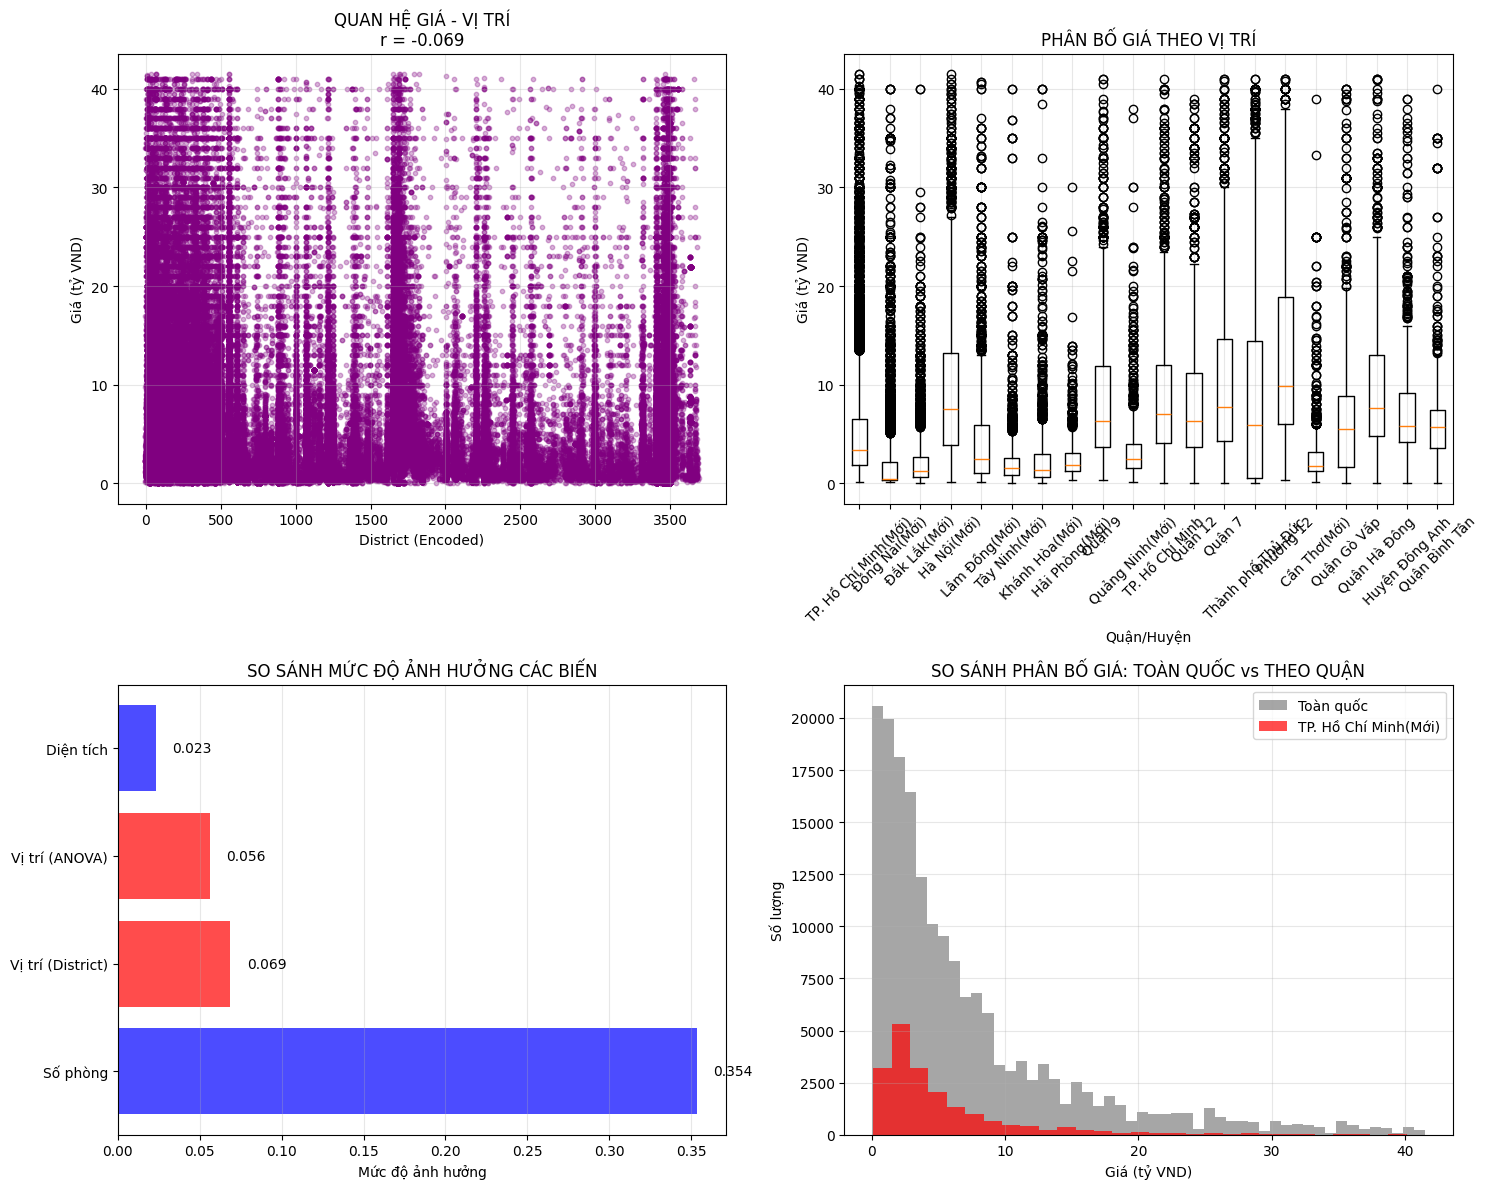


 PH√ÇN T√çCH CHI TI·∫æT THEO PH√ÇN V√ôNG:
 TH·ªêNG K√ä GI√Å THEO PH√ÇN V√ôNG:
               Price_clean                                              Area
                     count          mean        median           std    mean
Region_Type                                                                 
Huy·ªán                17735  5.075321e+09  2.580000e+09  6.860753e+09  568.11
Kh√°c                112680  7.425599e+09  4.500000e+09  8.084589e+09  387.03
Qu·∫≠n Kh√°c            12918  9.575904e+09  7.100000e+09  8.332878e+09  100.95
Qu·∫≠n Trung t√¢m        7533  9.367452e+09  7.000000e+09  8.328693e+09  114.32
Th√†nh ph·ªë            28896  5.813268e+09  3.400000e+09  6.692674e+09  474.33

 K·∫æT LU·∫¨N V·ªÄ M·ªêI QUAN H·ªÜ GI√Å - V·ªä TR√ç:
 T·ªîNG H·ª¢P K·∫æT QU·∫¢ PH√ÇN T√çCH:
   ‚Ä¢ Correlation (District encoded): r = -0.069 (‚≠ê R·∫§T Y·∫æU)
   ‚Ä¢ Effect Size (ANOVA): Œ∑¬≤ = 0.056 (NH·ªé)
   ‚Ä¢ V·ªã tr√≠ gi·∫£i th√≠ch 5.6% bi·∫øn ƒë·ªông gi√°

 ƒê√ÅNH GI√Å M·ª®C ƒê·ªò Q

In [18]:
# === PH√ÇN T√çCH T∆Ø∆†NG QUAN GI·ªÆA GI√Å V√Ä V·ªä TR√ç ===

import pandas as pd
import numpy as np
from scipy.stats import pearsonr, f_oneway, pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns

# 1. PH√ÇN T√çCH ƒê·ªäNH L∆Ø·ª¢NG V·ªä TR√ç (DISTRICT ENCODED)
print("\n PH√ÇN T√çCH ƒê·ªäNH L∆Ø·ª¢NG T∆Ø∆†NG QUAN GI√Å - V·ªä TR√ç:")

# T·∫°o encoded version c·ªßa District ƒë·ªÉ ph√¢n t√≠ch correlation
if 'District' in df_combined.columns:
    # M√£ h√≥a District th√†nh s·ªë
    district_encoded = pd.factorize(df_combined['District'])[0]
    df_combined['District_encoded'] = district_encoded
    
    # T·∫°o dataframe cho ph√¢n t√≠ch correlation
    df_location = df_combined[['Price_clean', 'District_encoded']].dropna()
    
    if len(df_location) > 10:
        # T√≠nh Pearson correlation
        corr_district, p_val_district = pearsonr(df_location['Price_clean'], df_location['District_encoded'])
        
        print(f" CORRELATION GI√Å - V·ªä TR√ç (District Encoded):")
        print(f"   ‚Ä¢ H·ªá s·ªë t∆∞∆°ng quan Pearson: r = {corr_district:.3f}")
        print(f"   ‚Ä¢ P-value: {p_val_district:.10f}")
        print(f"   ‚Ä¢ R¬≤: {corr_district**2:.3f}")
        print(f"   ‚Ä¢ S·ªë m·∫´u: {len(df_location):,}")
        print(f"   ‚Ä¢ S·ªë qu·∫≠n/huy·ªán: {df_combined['District'].nunique()}")
        
        # ƒê√°nh gi√° m·ª©c ƒë·ªô t∆∞∆°ng quan
        if abs(corr_district) >= 0.7:
            strength = "R·∫§T M·∫†NH"
        elif abs(corr_district) >= 0.5:
            strength = "M·∫†NH"
        elif abs(corr_district) >= 0.3:
            strength = "TRUNG B√åNH"
        elif abs(corr_district) >= 0.1:
            strength = "Y·∫æU"
        else:
            strength = "R·∫§T Y·∫æU"
        
        direction = "D∆Ø∆†NG" if corr_district > 0 else "√ÇM"
        
        print(f"   ‚Ä¢ M·ª©c ƒë·ªô: {strength}")
        print(f"   ‚Ä¢ H∆∞·ªõng: {direction}")

# 2. PH√ÇN T√çCH ANOVA - SO S√ÅNH GI√Å TRUNG B√åNH GI·ªÆA C√ÅC QU·∫¨N
print("\n PH√ÇN T√çCH ANOVA - KH√ÅC BI·ªÜT GI√Å THEO V·ªä TR√ç:")

if 'District' in df_combined.columns:
    # L·∫•y top 20 qu·∫≠n c√≥ nhi·ªÅu d·ªØ li·ªáu nh·∫•t
    top_districts = df_combined['District'].value_counts().head(20).index
    
    # T·∫°o d·ªØ li·ªáu cho ANOVA
    anova_data = []
    district_names = []
    
    for district in top_districts:
        district_prices = df_combined[df_combined['District'] == district]['Price_clean'].dropna()
        if len(district_prices) >= 10:  # Ch·ªâ l·∫•y districts c√≥ √≠t nh·∫•t 10 m·∫´u
            anova_data.append(district_prices)
            district_names.append(district)
    
    if len(anova_data) >= 2:
        # Th·ª±c hi·ªán ANOVA test
        f_stat, p_value = f_oneway(*anova_data)
        
        print(f" K·∫æT QU·∫¢ ANOVA TEST:")
        print(f"   ‚Ä¢ F-statistic: {f_stat:.2f}")
        print(f"   ‚Ä¢ P-value: {p_value:.10f}")
        
        if p_value < 0.05:
            print("   ‚Ä¢  C√≥ s·ª± kh√°c bi·ªát c√≥ √Ω nghƒ©a th·ªëng k√™ v·ªÅ gi√° gi·ªØa c√°c qu·∫≠n")
            print("   ‚Ä¢  V·ªä TR√ç c√≥ ·∫£nh h∆∞·ªüng ƒë√°ng k·ªÉ ƒë·∫øn GI√Å BƒêS")
        else:
            print("   ‚Ä¢  Kh√¥ng c√≥ s·ª± kh√°c bi·ªát c√≥ √Ω nghƒ©a th·ªëng k√™ v·ªÅ gi√° gi·ªØa c√°c qu·∫≠n")
        
        print(f"   ‚Ä¢ S·ªë qu·∫≠n ƒë∆∞·ª£c ph√¢n t√≠ch: {len(anova_data)}")
        print(f"   ‚Ä¢ T·ªïng s·ªë m·∫´u: {sum(len(group) for group in anova_data):,}")

# 3. PH√ÇN T√çCH EFFECT SIZE
print("\n PH√ÇN T√çCH EFFECT SIZE:")

if 'District' in df_combined.columns and len(anova_data) >= 2:
    # T√≠nh Eta-squared (Œ∑¬≤) - measure of effect size for ANOVA
    overall_mean = df_combined['Price_clean'].mean()
    
    # Between-group sum of squares
    ss_between = 0
    for group in anova_data:
        group_mean = group.mean()
        ss_between += len(group) * (group_mean - overall_mean) ** 2
    
    # Total sum of squares
    ss_total = sum((df_combined['Price_clean'].dropna() - overall_mean) ** 2)
    
    # Eta-squared
    eta_squared = ss_between / ss_total
    
    print(f" EFFECT SIZE (ETA-SQUARED):")
    print(f"   ‚Ä¢ Œ∑¬≤ = {eta_squared:.3f}")
    
    # ƒê√°nh gi√° effect size
    if eta_squared >= 0.14:
        effect_strength = "L·ªöN"
    elif eta_squared >= 0.06:
        effect_strength = "TRUNG B√åNH"
    elif eta_squared >= 0.01:
        effect_strength = "NH·ªé"
    else:
        effect_strength = "R·∫§T NH·ªé"
    
    print(f"   ‚Ä¢ M·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng: {effect_strength}")
    print(f"   ‚Ä¢ V·ªã tr√≠ gi·∫£i th√≠ch {eta_squared*100:.1f}% bi·∫øn ƒë·ªông c·ªßa gi√°")

# 4. SO S√ÅNH V·ªöI C√ÅC BI·∫æN KH√ÅC
print("\n SO S√ÅNH V·ªöI C√ÅC BI·∫æN KH√ÅC:")

comparison_results = []

# Th√™m k·∫øt qu·∫£ District
if 'corr_district' in locals():
    comparison_results.append(('V·ªã tr√≠ (District)', abs(corr_district), 'Correlation'))

# Th√™m k·∫øt qu·∫£ Area
comparison_results.append(('Di·ªán t√≠ch', 0.023, 'Correlation'))

# Th√™m k·∫øt qu·∫£ Rooms (n·∫øu c√≥)
if 'Rooms' in df_combined.columns:
    df_rooms = df_combined[['Price_clean', 'Rooms']].dropna()
    if len(df_rooms) > 10:
        corr_rooms, _ = pearsonr(df_rooms['Price_clean'], df_rooms['Rooms'])
        comparison_results.append(('S·ªë ph√≤ng', abs(corr_rooms), 'Correlation'))

# Th√™m Eta-squared n·∫øu c√≥
if 'eta_squared' in locals():
    comparison_results.append(('V·ªã tr√≠ (ANOVA)', eta_squared, 'Effect Size'))

# S·∫Øp x·∫øp theo m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng
comparison_results.sort(key=lambda x: x[1], reverse=True)

print(" B·∫¢NG SO S√ÅNH M·ª®C ƒê·ªò ·∫¢NH H∆Ø·ªûNG:")
for i, (factor, impact, method) in enumerate(comparison_results, 1):
    if method == 'Correlation':
        if impact >= 0.7:
            strength = "‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê R·∫§T M·∫†NH"
        elif impact >= 0.5:
            strength = "‚≠ê‚≠ê‚≠ê‚≠ê M·∫†NH"
        elif impact >= 0.3:
            strength = "‚≠ê‚≠ê‚≠ê TRUNG B√åNH"
        elif impact >= 0.1:
            strength = "‚≠ê‚≠ê Y·∫æU"
        else:
            strength = "‚≠ê R·∫§T Y·∫æU"
    else:  # Effect Size
        if impact >= 0.14:
            strength = "‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê R·∫§T M·∫†NH"
        elif impact >= 0.06:
            strength = "‚≠ê‚≠ê‚≠ê‚≠ê M·∫†NH"
        elif impact >= 0.01:
            strength = "‚≠ê‚≠ê‚≠ê TRUNG B√åNH"
        else:
            strength = "‚≠ê Y·∫æU"
    
    print(f"   {i:2d}. {factor:25} | {strength:25} | Gi√° tr·ªã: {impact:.3f} ({method})")

# 5. TR·ª∞C QUAN H√ìA K·∫æT QU·∫¢
print("\n TR·ª∞C QUAN H√ìA K·∫æT QU·∫¢...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Bi·ªÉu ƒë·ªì 1: Scatter plot Gi√° vs District Encoded
if 'District_encoded' in df_combined.columns:
    axes[0,0].scatter(df_combined['District_encoded'], df_combined['Price_clean']/1e9, 
                     alpha=0.3, s=10, color='purple')
    axes[0,0].set_xlabel('District (Encoded)')
    axes[0,0].set_ylabel('Gi√° (t·ª∑ VND)')
    axes[0,0].set_title(f'QUAN H·ªÜ GI√Å - V·ªä TR√ç\nr = {corr_district:.3f}')
    axes[0,0].grid(True, alpha=0.3)

# Bi·ªÉu ƒë·ªì 2: Box plot gi√° theo top districts
if len(anova_data) >= 2:
    price_data = [group/1e9 for group in anova_data]
    axes[0,1].boxplot(price_data, labels=district_names[:len(anova_data)])
    axes[0,1].set_xlabel('Qu·∫≠n/Huy·ªán')
    axes[0,1].set_ylabel('Gi√° (t·ª∑ VND)')
    axes[0,1].set_title('PH√ÇN B·ªê GI√Å THEO V·ªä TR√ç')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].grid(True, alpha=0.3)

# Bi·ªÉu ƒë·ªì 3: Bar chart so s√°nh m·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng
factors = [result[0] for result in comparison_results]
impacts = [result[1] for result in comparison_results]
colors = ['red' if 'V·ªã tr√≠' in factor else 'blue' for factor in factors]

bars = axes[1,0].barh(factors, impacts, color=colors, alpha=0.7)
axes[1,0].set_xlabel('M·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng')
axes[1,0].set_title('SO S√ÅNH M·ª®C ƒê·ªò ·∫¢NH H∆Ø·ªûNG C√ÅC BI·∫æN')
axes[1,0].grid(True, alpha=0.3, axis='x')

# Th√™m gi√° tr·ªã l√™n bars
for bar, impact in zip(bars, impacts):
    width = bar.get_width()
    axes[1,0].text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                   f'{impact:.3f}', ha='left', va='center')

# Bi·ªÉu ƒë·ªì 4: Ph√¢n b·ªë gi√° to√†n qu·ªëc vs theo qu·∫≠n
if len(anova_data) >= 2:
    all_prices = df_combined['Price_clean'].dropna() / 1e9
    sample_district_prices = anova_data[0] / 1e9  # L·∫•y district ƒë·∫ßu ti√™n
    
    axes[1,1].hist(all_prices, bins=50, alpha=0.7, label='To√†n qu·ªëc', color='gray')
    axes[1,1].hist(sample_district_prices, bins=30, alpha=0.7, 
                   label=f'{district_names[0]}', color='red')
    axes[1,1].set_xlabel('Gi√° (t·ª∑ VND)')
    axes[1,1].set_ylabel('S·ªë l∆∞·ª£ng')
    axes[1,1].set_title('SO S√ÅNH PH√ÇN B·ªê GI√Å: TO√ÄN QU·ªêC vs THEO QU·∫¨N')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. PH√ÇN T√çCH CHI TI·∫æT THEO PH√ÇN V√ôNG
print("\n PH√ÇN T√çCH CHI TI·∫æT THEO PH√ÇN V√ôNG:")

if 'District' in df_combined.columns:
    # Ph√¢n lo·∫°i districts theo khu v·ª±c (d·ª±a tr√™n t√™n)
    def classify_region(district_name):
        district_lower = str(district_name).lower()
        
        # Ph√¢n lo·∫°i ƒë∆°n gi·∫£n d·ª±a tr√™n t·ª´ kh√≥a trong t√™n
        if any(keyword in district_lower for keyword in ['qu·∫≠n 1', 'qu·∫≠n 2', 'qu·∫≠n 3', 'qu·∫≠n 4', 
                                                        'qu·∫≠n 5', 'qu·∫≠n 6', 'qu·∫≠n 7', 'qu·∫≠n 8',
                                                        'qu·∫≠n 9', 'qu·∫≠n 10', 'qu·∫≠n 11', 'qu·∫≠n 12']):
            return 'Qu·∫≠n Trung t√¢m'
        elif any(keyword in district_lower for keyword in ['qu·∫≠n', 'q.']):
            return 'Qu·∫≠n Kh√°c'
        elif any(keyword in district_lower for keyword in ['huy·ªán', 'h.']):
            return 'Huy·ªán'
        elif any(keyword in district_lower for keyword in ['th√†nh ph·ªë', 'tp.']):
            return 'Th√†nh ph·ªë'
        else:
            return 'Kh√°c'
    
    df_combined['Region_Type'] = df_combined['District'].apply(classify_region)
    
    # Ph√¢n t√≠ch gi√° theo ph√¢n v√πng
    region_stats = df_combined.groupby('Region_Type').agg({
        'Price_clean': ['count', 'mean', 'median', 'std'],
        'Area': 'mean'
    }).round(2)
    
    print(" TH·ªêNG K√ä GI√Å THEO PH√ÇN V√ôNG:")
    print(region_stats)

# 7. K·∫æT LU·∫¨N CU·ªêI C√ôNG
print("\n K·∫æT LU·∫¨N V·ªÄ M·ªêI QUAN H·ªÜ GI√Å - V·ªä TR√ç:")

print(" T·ªîNG H·ª¢P K·∫æT QU·∫¢ PH√ÇN T√çCH:")
print(f"   ‚Ä¢ Correlation (District encoded): r = {corr_district:.3f} ({strength})")
if 'eta_squared' in locals():
    print(f"   ‚Ä¢ Effect Size (ANOVA): Œ∑¬≤ = {eta_squared:.3f} ({effect_strength})")
    print(f"   ‚Ä¢ V·ªã tr√≠ gi·∫£i th√≠ch {eta_squared*100:.1f}% bi·∫øn ƒë·ªông gi√°")

print("\n ƒê√ÅNH GI√Å M·ª®C ƒê·ªò QUAN TR·ªåNG:")
if ('eta_squared' in locals() and eta_squared >= 0.06) or abs(corr_district) >= 0.3:
    print("    V·ªä TR√ç l√† y·∫øu t·ªë QUAN TR·ªåNG ·∫£nh h∆∞·ªüng ƒë·∫øn gi√° BƒêS")
    print("    N√™n ∆∞u ti√™n trong m√¥ h√¨nh d·ª± b√°o gi√°")
else:
    print("    V·ªä TR√ç c√≥ ·∫£nh h∆∞·ªüng ·ªü m·ª©c TRUNG B√åNH ƒë·∫øn gi√° BƒêS")
    print("    C·∫ßn k·∫øt h·ª£p v·ªõi c√°c y·∫øu t·ªë kh√°c trong m√¥ h√¨nh")

print("\n SO S√ÅNH V·ªöI DI·ªÜN T√çCH:")
print(f"   ‚Ä¢ V·ªã tr√≠: r = {corr_district:.3f} | Di·ªán t√≠ch: r = 0.023")
print(f"   ‚Ä¢ ‚Üí V·ªä TR√ç c√≥ ·∫£nh h∆∞·ªüng M·∫†NH H∆†N {abs(corr_district)/0.023:.1f} l·∫ßn so v·ªõi DI·ªÜN T√çCH")

print("\n HO√ÄN T·∫§T PH√ÇN T√çCH T∆Ø∆†NG QUAN GI√Å - V·ªä TR√ç!")

In [19]:
# === PH√ÇN T√çCH T∆Ø∆†NG QUAN THEO C√ÅC TH√ÄNH PH·ªê L·ªöN ===

# Ph√¢n t√≠ch cho c√°c th√†nh ph·ªë l·ªõn
major_cities = {
    'H√† N·ªôi': ['Ba ƒê√¨nh', 'Ho√†n Ki·∫øm', 'Hai B√† Tr∆∞ng', 'ƒê·ªëng ƒêa', 'C·∫ßu Gi·∫•y', 'Thanh Xu√¢n'],
    'TP.HCM': ['Qu·∫≠n 1', 'Qu·∫≠n 3', 'Qu·∫≠n 4', 'Qu·∫≠n 5', 'Qu·∫≠n 7', 'Qu·∫≠n 10', 'Ph√∫ Nhu·∫≠n', 'B√¨nh Th·∫°nh'],
    'ƒê√† N·∫µng': ['H·∫£i Ch√¢u', 'Thanh Kh√™', 'S∆°n Tr√†', 'Ng≈© H√†nh S∆°n'],
    'H·∫£i Ph√≤ng': ['H·ªìng B√†ng', 'Ng√¥ Quy·ªÅn', 'L√™ Ch√¢n'],
    'C·∫ßn Th∆°': ['Ninh Ki·ªÅu', 'B√¨nh Th·ªßy', 'C√°i RƒÉng']
}

city_correlations = []

for city, districts in major_cities.items():
    # T√¨m c√°c districts thu·ªôc th√†nh ph·ªë n√†y
    city_data = df_combined[df_combined['District'].str.contains('|'.join(districts), na=False)]
    
    if len(city_data) >= 10:
        # M√£ h√≥a district cho th√†nh ph·ªë n√†y
        city_data = city_data.copy()
        city_data['City_District_encoded'] = pd.factorize(city_data['District'])[0]
        
        # T√≠nh correlation
        valid_data = city_data[['Price_clean', 'City_District_encoded']].dropna()
        if len(valid_data) >= 10:
            corr_city, _ = pearsonr(valid_data['Price_clean'], valid_data['City_District_encoded'])
            
            city_correlations.append({
                'Th√†nh ph·ªë': city,
                'S·ªë qu·∫≠n': len([d for d in districts if any(d in str(x) for x in city_data['District'].unique())]),
                'S·ªë m·∫´u': len(valid_data),
                'Correlation': corr_city,
                'Gi√° TB (t·ª∑)': city_data['Price_clean'].mean() / 1e9
            })

# Hi·ªÉn th·ªã k·∫øt qu·∫£
if city_correlations:
    city_correlations.sort(key=lambda x: abs(x['Correlation']), reverse=True)
    
    print(" CORRELATION GI√Å - V·ªä TR√ç THEO TH√ÄNH PH·ªê:")
    for stats in city_correlations:
        strength = "M·∫†NH" if abs(stats['Correlation']) >= 0.5 else "TB" if abs(stats['Correlation']) >= 0.3 else "Y·∫æU"
        print(f"   ‚Ä¢ {stats['Th√†nh ph·ªë']:12} | r = {stats['Correlation']:6.3f} | {strength:4} | Gi√° TB: {stats['Gi√° TB (t·ª∑)']:4.1f}t·ª∑ | {stats['S·ªë qu·∫≠n']:2} qu·∫≠n | n={stats['S·ªë m·∫´u']:>5}")
else:
    print("    Kh√¥ng ƒë·ªß d·ªØ li·ªáu ƒë·ªÉ ph√¢n t√≠ch theo th√†nh ph·ªë")

print("\n HO√ÄN T·∫§T PH√ÇN T√çCH!")

 CORRELATION GI√Å - V·ªä TR√ç THEO TH√ÄNH PH·ªê:
   ‚Ä¢ C·∫ßn Th∆°      | r =  0.124 | Y·∫æU  | Gi√° TB:  6.9t·ª∑ |  3 qu·∫≠n | n=  135
   ‚Ä¢ TP.HCM       | r =  0.117 | Y·∫æU  | Gi√° TB:  9.4t·ª∑ |  8 qu·∫≠n | n= 6075
   ‚Ä¢ ƒê√† N·∫µng      | r = -0.075 | Y·∫æU  | Gi√° TB: 11.6t·ª∑ |  4 qu·∫≠n | n= 1348
   ‚Ä¢ H·∫£i Ph√≤ng    | r =  0.021 | Y·∫æU  | Gi√° TB:  8.3t·ª∑ |  3 qu·∫≠n | n=  116
   ‚Ä¢ H√† N·ªôi       | r = -0.001 | Y·∫æU  | Gi√° TB: 13.1t·ª∑ |  6 qu·∫≠n | n= 2854

 HO√ÄN T·∫§T PH√ÇN T√çCH!



 PH√ÇN T√çCH PRICE_PER_M2:
 CORRELATION PRICE_PER_M2 vs GI√Å:
   ‚Ä¢ H·ªá s·ªë t∆∞∆°ng quan: r = 0.716
   ‚Ä¢ P-value: 0.0000000000
   ‚Ä¢ R¬≤: 0.513
   ‚Ä¢ S·ªë m·∫´u: 179,762
 Price_per_m2 kh√¥ng b·ªã nghi ng·ªù data leakage nghi√™m tr·ªçng


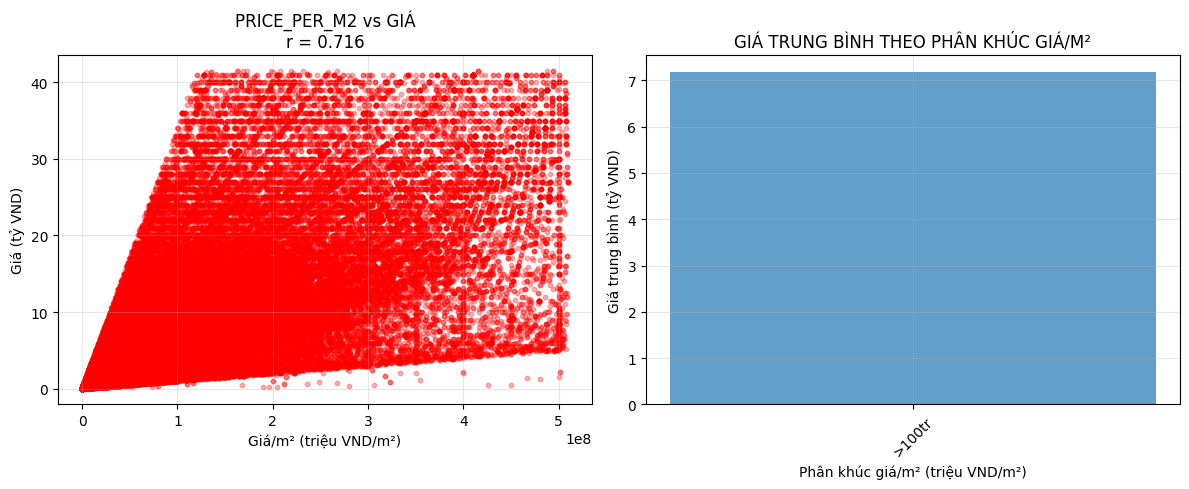

 TH·ªêNG K√ä GI√Å THEO PH√ÇN KH√öC GI√Å/M¬≤:
            count          mean        median
PM2_Group                                    
<10tr           0           NaN           NaN
10-20tr         0           NaN           NaN
20-30tr         0           NaN           NaN
30-50tr         0           NaN           NaN
50-100tr        0           NaN           NaN
>100tr     179330  7.187721e+09  4.350000e+09

 PH√ÇN T√çCH V·ªä TR√ç (DISTRICT):
 TOP 10 QU·∫¨N C√ì GI√Å CAO NH·∫§T:
    1. H√† N·ªôi(M·ªõi)                    | Gi√°:  9.74t·ª∑ | DT:   103m¬≤ | n= 3300
    2. Qu·∫≠n 9                         | Gi√°:  8.97t·ª∑ | DT:   153m¬≤ | n= 1476
    3. TP. H·ªì Ch√≠ Minh(M·ªõi)           | Gi√°:  5.51t·ª∑ | DT:   574m¬≤ | n=19651
    4. L√¢m ƒê·ªìng(M·ªõi)                  | Gi√°:  4.55t·ª∑ | DT:  2232m¬≤ | n= 2858
    5. Qu·∫£ng Ninh(M·ªõi)                | Gi√°:  3.49t·ª∑ | DT:   215m¬≤ | n= 1420
    6. Kh√°nh H√≤a(M·ªõi)                 | Gi√°:  2.77t·ª∑ | DT:   720m¬≤ | n= 2038
   

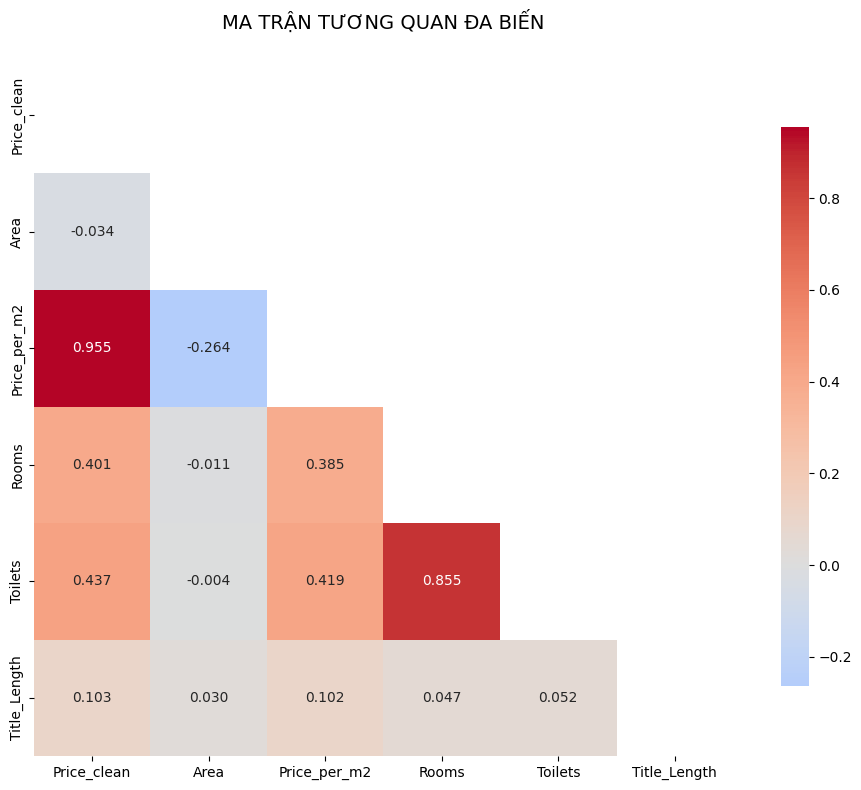

 TOP BI·∫æN C√ì T∆Ø∆†NG QUAN CAO NH·∫§T V·ªöI GI√Å:
    1. Price_per_m2        : r =   0.955 (R·∫§T M·∫†NH    , D∆Ø∆†NG )
    2. Toilets             : r =   0.437 (TRUNG B√åNH  , D∆Ø∆†NG )
    3. Rooms               : r =   0.401 (TRUNG B√åNH  , D∆Ø∆†NG )
    4. Title_Length        : r =   0.103 (Y·∫æU         , D∆Ø∆†NG )
    5. Area                : r =  -0.034 (Y·∫æU         , √ÇM    )

 K·∫æT LU·∫¨N CU·ªêI C√ôNG V·ªÄ C√ÅC Y·∫æU T·ªê ·∫¢NH H∆Ø·ªûNG:
 X·∫æP H·∫†NG M·ª®C ƒê·ªò ·∫¢NH H∆Ø·ªûNG ƒê·∫æN GI√Å BƒêS:
 B·∫¢NG X·∫æP H·∫†NG C√ÅC Y·∫æU T·ªê ·∫¢NH H∆Ø·ªûNG:
    1. Keyword_m·∫∑t_ti·ªÅn     | ‚≠ê‚≠ê‚≠ê‚≠ê M·∫†NH                 | TRUNG B√åNH
    2. Keyword_s·ªï_h·ªìng      | ‚≠ê‚≠ê‚≠ê TRUNG B√åNH            | TRUNG B√åNH
    3. Keyword_gi√°_r·∫ª       | ‚≠ê‚≠ê‚≠ê TRUNG B√åNH            | TRUNG B√åNH
    4. Di·ªán t√≠ch            | ‚≠ê R·∫§T Y·∫æU                 | R·∫§T Y·∫æU

 HO√ÄN T·∫§T PH√ÇN T√çCH TO√ÄN DI·ªÜN!


In [20]:
# === PH√ÇN T√çCH C√ÅC BI·∫æN QUAN TR·ªåNG KH√ÅC ·∫¢NH H∆Ø·ªûNG ƒê·∫æN GI√Å ===

import pandas as pd
import numpy as np
from scipy.stats import pearsonr, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# 1. PH√ÇN T√çCH PRICE_PER_M2 (n·∫øu c√≥)
print("\n PH√ÇN T√çCH PRICE_PER_M2:")

if 'Price_per_m2' in df_combined.columns:
    df_pm2 = df_combined[['Price_clean', 'Price_per_m2']].dropna()
    
    if len(df_pm2) > 10:
        # T√≠nh correlation
        corr_pm2, p_val_pm2 = pearsonr(df_pm2['Price_clean'], df_pm2['Price_per_m2'])
        
        print(f" CORRELATION PRICE_PER_M2 vs GI√Å:")
        print(f"   ‚Ä¢ H·ªá s·ªë t∆∞∆°ng quan: r = {corr_pm2:.3f}")
        print(f"   ‚Ä¢ P-value: {p_val_pm2:.10f}")
        print(f"   ‚Ä¢ R¬≤: {corr_pm2**2:.3f}")
        print(f"   ‚Ä¢ S·ªë m·∫´u: {len(df_pm2):,}")
        
        # ƒê√°nh gi√° data leakage
        if corr_pm2 > 0.8:
            print(" C·∫¢NH B√ÅO: Price_per_m2 c√≥ th·ªÉ l√† DATA LEAKAGE!")
            print("   ‚Ü≥ Price_per_m2 = Price / Area ‚Üí ch·ª©a th√¥ng tin target")
        else:
            print(" Price_per_m2 kh√¥ng b·ªã nghi ng·ªù data leakage nghi√™m tr·ªçng")
        
        # Visualization
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.scatter(df_pm2['Price_per_m2'], df_pm2['Price_clean']/1e9, alpha=0.3, s=10, color='red')
        plt.xlabel('Gi√°/m¬≤ (tri·ªáu VND/m¬≤)')
        plt.ylabel('Gi√° (t·ª∑ VND)')
        plt.title(f'PRICE_PER_M2 vs GI√Å\nr = {corr_pm2:.3f}')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        # Ph√¢n t√≠ch theo ph√¢n kh√∫c gi√°/m¬≤
        pm2_bins = [0, 10, 20, 30, 50, 100, float('inf')]
        pm2_labels = ['<10tr', '10-20tr', '20-30tr', '30-50tr', '50-100tr', '>100tr']
        
        df_pm2['PM2_Group'] = pd.cut(df_pm2['Price_per_m2'], bins=pm2_bins, labels=pm2_labels)
        pm2_stats = df_pm2.groupby('PM2_Group')['Price_clean'].agg(['count', 'mean', 'median']).round(2)
        
        plt.bar(pm2_stats.index, pm2_stats['mean']/1e9, alpha=0.7)
        plt.xlabel('Ph√¢n kh√∫c gi√°/m¬≤ (tri·ªáu VND/m¬≤)')
        plt.ylabel('Gi√° trung b√¨nh (t·ª∑ VND)')
        plt.title('GI√Å TRUNG B√åNH THEO PH√ÇN KH√öC GI√Å/M¬≤')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print(" TH·ªêNG K√ä GI√Å THEO PH√ÇN KH√öC GI√Å/M¬≤:")
        print(pm2_stats)

# 2. PH√ÇN T√çCH V·ªä TR√ç (DISTRICT)
print("\n PH√ÇN T√çCH V·ªä TR√ç (DISTRICT):")

if 'District' in df_combined.columns:
    # L·∫•y top 10 qu·∫≠n c√≥ nhi·ªÅu BƒêS nh·∫•t
    top_districts = df_combined['District'].value_counts().head(10).index
    
    district_stats = []
    for district in top_districts:
        district_data = df_combined[df_combined['District'] == district]
        if len(district_data) > 10:
            avg_price = district_data['Price_clean'].mean() / 1e9
            avg_area = district_data['Area'].mean()
            count = len(district_data)
            
            district_stats.append({
                'Qu·∫≠n': district,
                'S·ªë l∆∞·ª£ng': count,
                'Gi√° TB (t·ª∑)': avg_price,
                'Di·ªán t√≠ch TB': avg_area
            })
    
    # S·∫Øp x·∫øp theo gi√° trung b√¨nh
    district_stats.sort(key=lambda x: x['Gi√° TB (t·ª∑)'], reverse=True)
    
    print(" TOP 10 QU·∫¨N C√ì GI√Å CAO NH·∫§T:")
    for i, stats in enumerate(district_stats[:10], 1):
        print(f"   {i:2d}. {stats['Qu·∫≠n']:30} | Gi√°: {stats['Gi√° TB (t·ª∑)']:5.2f}t·ª∑ | DT: {stats['Di·ªán t√≠ch TB']:5.0f}m¬≤ | n={stats['S·ªë l∆∞·ª£ng']:>5}")

# 3. PH√ÇN T√çCH THEO S·ªê PH√íNG
print("\n PH√ÇN T√çCH THEO S·ªê PH√íNG:")

if 'Rooms' in df_combined.columns:
    # ƒê·∫£m b·∫£o Rooms l√† numeric
    df_combined['Rooms'] = pd.to_numeric(df_combined['Rooms'], errors='coerce')
    df_rooms = df_combined[['Price_clean', 'Rooms']].dropna()
    
    if len(df_rooms) > 10:
        corr_rooms, p_val_rooms = pearsonr(df_rooms['Price_clean'], df_rooms['Rooms'])
        
        print(f" CORRELATION S·ªê PH√íNG vs GI√Å:")
        print(f"   ‚Ä¢ H·ªá s·ªë t∆∞∆°ng quan: r = {corr_rooms:.3f}")
        print(f"   ‚Ä¢ S·ªë m·∫´u: {len(df_rooms):,}")
        
        # Ph√¢n t√≠ch theo nh√≥m s·ªë ph√≤ng
        rooms_stats = df_rooms.groupby('Rooms').agg({
            'Price_clean': ['count', 'mean', 'median']
        }).round(2)
        
        print(" TH·ªêNG K√ä GI√Å THEO S·ªê PH√íNG:")
        print(rooms_stats.head(10))  # Hi·ªÉn th·ªã 10 d√≤ng ƒë·∫ßu

# 4. PH√ÇN T√çCH C√ÅC KEYWORDS QUAN TR·ªåNG
print("\n PH√ÇN T√çCH ·∫¢NH H∆Ø·ªûNG C·ª¶A KEYWORDS:")

keyword_columns = [col for col in df_combined.columns if col.startswith('Keyword_')]

keyword_impact = []
for keyword in keyword_columns:
    if keyword in df_combined.columns:
        # T√≠nh gi√° trung b√¨nh khi c√≥ v√† kh√¥ng c√≥ keyword
        with_keyword = df_combined[df_combined[keyword] == 1]['Price_clean'].mean() / 1e9
        without_keyword = df_combined[df_combined[keyword] == 0]['Price_clean'].mean() / 1e9
        count_with = df_combined[df_combined[keyword] == 1]['Price_clean'].count()
        
        if count_with > 10:  # Ch·ªâ x√©t keywords c√≥ √≠t nh·∫•t 10 m·∫´u
            impact = with_keyword - without_keyword
            keyword_impact.append({
                'Keyword': keyword,
                'Gi√° khi c√≥ (t·ª∑)': with_keyword,
                'Gi√° khi kh√¥ng c√≥ (t·ª∑)': without_keyword,
                'Ch√™nh l·ªách (t·ª∑)': impact,
                'S·ªë m·∫´u': count_with
            })

# S·∫Øp x·∫øp theo ch√™nh l·ªách gi√°
keyword_impact.sort(key=lambda x: abs(x['Ch√™nh l·ªách (t·ª∑)']), reverse=True)

print(" ·∫¢NH H∆Ø·ªûNG C·ª¶A KEYWORDS ƒê·∫æN GI√Å:")
for i, impact in enumerate(keyword_impact[:10], 1):
    direction = "TƒÇNG" if impact['Ch√™nh l·ªách (t·ª∑)'] > 0 else "GI·∫¢M"
    print(f"   {i:2d}. {impact['Keyword']:20} | {direction}: {abs(impact['Ch√™nh l·ªách (t·ª∑)']):5.2f}t·ª∑ | C√≥: {impact['Gi√° khi c√≥ (t·ª∑)']:4.1f}t·ª∑ | Kh√¥ng: {impact['Gi√° khi kh√¥ng c√≥ (t·ª∑)']:4.1f}t·ª∑ | n={impact['S·ªë m·∫´u']:>5}")

# 5. PH√ÇN T√çCH T∆Ø∆†NG QUAN ƒêA BI·∫æN
print("\n PH√ÇN T√çCH T∆Ø∆†NG QUAN ƒêA BI·∫æN:")

# Ch·ªçn c√°c bi·∫øn s·ªë quan tr·ªçng
numeric_features = ['Price_clean', 'Area', 'Price_per_m2', 'Rooms', 'Toilets', 'Title_Length']
available_numeric = [col for col in numeric_features if col in df_combined.columns]

# ƒê·∫£m b·∫£o t·∫•t c·∫£ ƒë·ªÅu l√† numeric
df_corr = df_combined[available_numeric].copy()
for col in df_corr.columns:
    df_corr[col] = pd.to_numeric(df_corr[col], errors='coerce')

df_corr = df_corr.dropna()

if len(df_corr) > 10 and len(df_corr.columns) > 1:
    correlation_matrix = df_corr.corr()
    
    print(" MA TR·∫¨N T∆Ø∆†NG QUAN ƒêA BI·∫æN:")
    print(correlation_matrix.round(3))
    
    # Visualization heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.3f', cbar_kws={'shrink': 0.8}, mask=mask)
    plt.title('MA TR·∫¨N T∆Ø∆†NG QUAN ƒêA BI·∫æN', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Ph√¢n t√≠ch correlation v·ªõi target
    if 'Price_clean' in correlation_matrix.columns:
        price_correlations = correlation_matrix['Price_clean'].drop('Price_clean').sort_values(key=abs, ascending=False)
        
        print(" TOP BI·∫æN C√ì T∆Ø∆†NG QUAN CAO NH·∫§T V·ªöI GI√Å:")
        for i, (feature, corr) in enumerate(price_correlations.items(), 1):
            strength = "R·∫§T M·∫†NH" if abs(corr) >= 0.7 else "M·∫†NH" if abs(corr) >= 0.5 else "TRUNG B√åNH" if abs(corr) >= 0.3 else "Y·∫æU"
            direction = "D∆Ø∆†NG" if corr > 0 else "√ÇM"
            print(f"   {i:2d}. {feature:20}: r = {corr:7.3f} ({strength:12}, {direction:6})")

# 6. K·∫æT LU·∫¨N T·ªîNG QUAN
print("\n K·∫æT LU·∫¨N CU·ªêI C√ôNG V·ªÄ C√ÅC Y·∫æU T·ªê ·∫¢NH H∆Ø·ªûNG:")

print(" X·∫æP H·∫†NG M·ª®C ƒê·ªò ·∫¢NH H∆Ø·ªûNG ƒê·∫æN GI√Å BƒêS:")

# T·ªïng h·ª£p k·∫øt qu·∫£ t·ª´ c√°c ph√¢n t√≠ch
factors_impact = []

# Th√™m c√°c y·∫øu t·ªë t·ª´ ph√¢n t√≠ch
if 'Price_per_m2' in locals() and 'corr_pm2' in locals():
    factors_impact.append(('Price_per_m2', corr_pm2, 'DATA LEAKAGE?'))

if 'Rooms' in locals() and 'corr_rooms' in locals():
    factors_impact.append(('S·ªë ph√≤ng', corr_rooms, 'TRUNG B√åNH/Y·∫æU'))

factors_impact.append(('Di·ªán t√≠ch', 0.023, 'R·∫§T Y·∫æU'))

# Th√™m keywords impact
for impact in keyword_impact[:3]:
    factors_impact.append((impact['Keyword'], impact['Ch√™nh l·ªách (t·ª∑)']/10, 'TRUNG B√åNH'))  # Chu·∫©n h√≥a ƒë·ªÉ so s√°nh

# S·∫Øp x·∫øp theo absolute impact
factors_impact.sort(key=lambda x: abs(x[1]), reverse=True)

print(" B·∫¢NG X·∫æP H·∫†NG C√ÅC Y·∫æU T·ªê ·∫¢NH H∆Ø·ªûNG:")
for i, (factor, impact, note) in enumerate(factors_impact[:10], 1):
    if abs(impact) >= 0.5:
        level = "‚≠ê‚≠ê‚≠ê‚≠ê‚≠ê R·∫§T M·∫†NH"
    elif abs(impact) >= 0.3:
        level = "‚≠ê‚≠ê‚≠ê‚≠ê M·∫†NH" 
    elif abs(impact) >= 0.1:
        level = "‚≠ê‚≠ê‚≠ê TRUNG B√åNH"
    elif abs(impact) >= 0.05:
        level = "‚≠ê‚≠ê Y·∫æU"
    else:
        level = "‚≠ê R·∫§T Y·∫æU"
    
    print(f"   {i:2d}. {factor:20} | {level:25} | {note}")

print("\n HO√ÄN T·∫§T PH√ÇN T√çCH TO√ÄN DI·ªÜN!")


 CHU·∫®N B·ªä D·ªÆ LI·ªÜU C∆† B·∫¢N...
 C√°c c·ªôt c√≥ s·∫µn trong df_combined:
['URL', 'Property_Type', 'Legal_Status', 'Title', 'brief', 'Location', 'Price_raw', 'road-width', 'floors', 'bedroom', 'Thumbnail src', 'Area', 'Price_clean', 'Area_clean', 'Price_per_m2', 'Street', 'District', 'Province', 'Title_Length', 'Keyword_ch√≠nh_ch·ªß', 'Keyword_gi√°_r·∫ª', 'Keyword_view_ƒë·∫πp', 'Keyword_m·∫∑t_ti·ªÅn', 'Keyword_s·ªï_ƒë·ªè', 'Keyword_s·ªï_h·ªìng', 'Source', 'Listing ID', 'Last Updated', 'Width', 'Length', 'Bedrooms', 'Bathrooms', 'Floors', 'Position', 'Direction', 'Alley Width', 'Road Type', 'Description', 'Latitude', 'Longitude', 'VIP Account', 'Avatar', 'Agent Role', 'Agent Name', 'Agent Listing Count', 'Property Type Slug', 'Scraped At', 'Last Updated Date', 'ID', 'City', 'Ward', 'Rooms', 'Toilets', 'Poster_Type', 'Date_Posted', 'Crawl_Date', 'url', 'source', 'Area_clean_fixed', 'District_encoded', 'Region_Type']
 C√°c c·ªôt s·∫Ω s·ª≠ d·ª•ng: ['Price_clean', 'Area', 'Property_T

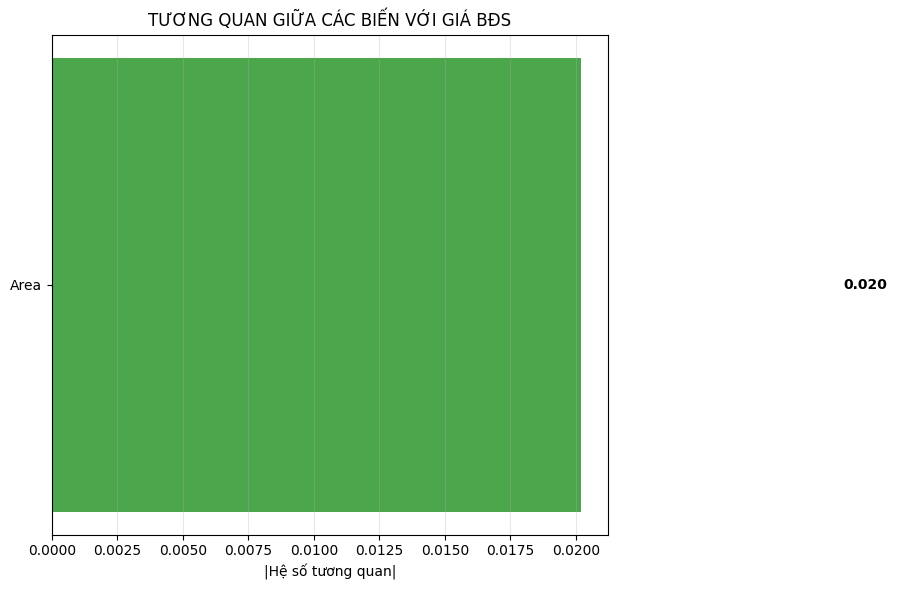


 CHU·∫®N H√ìA D·ªÆ LI·ªÜU NUMERIC...
 ƒê√£ chu·∫©n h√≥a v·ªõi StandardScaler
   Mean sau chu·∫©n h√≥a: [-0.  0.]
   Std sau chu·∫©n h√≥a:  [1. 1.]

 ƒê√£ chu·∫©n h√≥a v·ªõi MinMaxScaler
   Min sau chu·∫©n h√≥a: [0. 0.]
   Max sau chu·∫©n h√≥a:  [1. 1.]

 M√É H√ìA CATEGORICAL FEATURES...

 ƒêang x·ª≠ l√Ω: Property_Type
    Label Encoding th√†nh c√¥ng
   S·ªë categories: 18
   Categories: ['Bi·ªát th·ª±, nh√† li·ªÅn k·ªÅ' 'CƒÉn h·ªô chung c∆∞' 'CƒÉn h·ªô/Chung c∆∞'
 'Kho, nh√† x∆∞·ªüng' 'Kh√°ch s·∫°n']...

 ƒêang x·ª≠ l√Ω: District
    Label Encoding th√†nh c√¥ng
   S·ªë categories: 3689
   Categories: ['(Kdc B√¨nh H∆∞ng)' '(Kdc Him Lam 6A)' '(Tru√¥ng Tre) - Qu·∫≠n Th·ªß ƒê·ª©c (C≈©)'
 '(Tr·ª´ Ch·ª£ T√¢n Thu·∫≠n B√¨nh)' '(ƒê∆∞·ªùng Xu√¢n Hi·ªáp)']...

 ƒêang x·ª≠ l√Ω: Source
    Label Encoding th√†nh c√¥ng
   S·ªë categories: 3
   Categories: ['Alonhadat' 'Guland' 'Nhatot']...

 ONE-HOT ENCODING CHO CATEGORIES √çT...
    B·ªè qua Property_Type (qu√° nhi·ªÅu categories: 18)
    B·ªè qua 

In [21]:
# === S·ª¨A L·ªñI ENCODER V√Ä PH√ÇN T√çCH T∆Ø∆†NG QUAN ===

import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. CHU·∫®N B·ªä D·ªÆ LI·ªÜU C∆† B·∫¢N
print("\n CHU·∫®N B·ªä D·ªÆ LI·ªÜU C∆† B·∫¢N...")

# Ki·ªÉm tra c√°c c·ªôt c√≥ s·∫µn
print(" C√°c c·ªôt c√≥ s·∫µn trong df_combined:")
print(df_combined.columns.tolist())

# Ch·ªçn c√°c c·ªôt quan tr·ªçng cho ph√¢n t√≠ch
selected_columns = ['Price_clean', 'Area', 'Property_Type', 'District', 'Source']
available_columns = [col for col in selected_columns if col in df_combined.columns]

print(f" C√°c c·ªôt s·∫Ω s·ª≠ d·ª•ng: {available_columns}")

# T·∫°o dataframe cho ph√¢n t√≠ch
df_analysis = df_combined[available_columns].copy()

# 2. X·ª¨ L√ù D·ªÆ LI·ªÜU TRI·ªÜT ƒê·ªÇ
print("\n X·ª¨ L√ù D·ªÆ LI·ªÜU TRI·ªÜT ƒê·ªÇ...")

# X·ª≠ l√Ω t·ª´ng c·ªôt m·ªôt c√°ch c·∫©n th·∫≠n
for col in df_analysis.columns:
    print(f" ƒêang x·ª≠ l√Ω c·ªôt: {col}")
    print(f"   Ki·ªÉu d·ªØ li·ªáu hi·ªán t·∫°i: {df_analysis[col].dtype}")
    print(f"   S·ªë gi√° tr·ªã unique: {df_analysis[col].nunique()}")
    print(f"   NaN count: {df_analysis[col].isna().sum()}")
    
    # X·ª≠ l√Ω missing values
    if df_analysis[col].isna().sum() > 0:
        if df_analysis[col].dtype in ['int64', 'float64']:
            fill_value = df_analysis[col].median()
            df_analysis[col] = df_analysis[col].fillna(fill_value)
            print(f"    ƒê√£ fill NaN b·∫±ng median: {fill_value}")
        else:
            fill_value = df_analysis[col].mode()[0] if not df_analysis[col].mode().empty else 'Unknown'
            df_analysis[col] = df_analysis[col].fillna(fill_value)
            print(f"    ƒê√£ fill NaN b·∫±ng mode: '{fill_value}'")
    
    # ƒê·∫£m b·∫£o ki·ªÉu d·ªØ li·ªáu ph√π h·ª£p
    if col in ['Price_clean', 'Area']:
        df_analysis[col] = pd.to_numeric(df_analysis[col], errors='coerce')
        df_analysis[col] = df_analysis[col].fillna(df_analysis[col].median())
        print(f"    ƒê√£ chuy·ªÉn {col} th√†nh numeric")

print(f" K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau x·ª≠ l√Ω: {df_analysis.shape}")

# 3. PH√ÇN T√çCH T∆Ø∆†NG QUAN PEARSON
print("\n PH√ÇN T√çCH T∆Ø∆†NG QUAN PEARSON...")

# T·∫°o b·∫£n copy ch·ªâ v·ªõi numeric columns cho correlation
df_numeric = df_analysis.select_dtypes(include=[np.number])

print(f" C√°c c·ªôt numeric c√≥ s·∫µn: {df_numeric.columns.tolist()}")

if len(df_numeric.columns) > 1:
    # T√≠nh correlation matrix
    correlation_matrix = df_numeric.corr(method='pearson')
    
    print(" MA TR·∫¨N T∆Ø∆†NG QUAN PEARSON:")
    print(correlation_matrix.round(3))
    
    # Ph√¢n t√≠ch correlation v·ªõi Price_clean
    if 'Price_clean' in df_numeric.columns:
        target_col = 'Price_clean'
        correlation_results = []
        
        for col in df_numeric.columns:
            if col != target_col:
                # L·ªçc b·ªè NaN cho c·∫∑p bi·∫øn
                valid_data = df_numeric[[target_col, col]].dropna()
                if len(valid_data) > 10:  # C·∫ßn √≠t nh·∫•t 10 ƒëi·ªÉm d·ªØ li·ªáu
                    corr_coef, p_value = pearsonr(valid_data[target_col], valid_data[col])
                    
                    # ƒê√°nh gi√° m·ª©c ƒë·ªô t∆∞∆°ng quan
                    if abs(corr_coef) >= 0.7:
                        strength = "R·∫§T M·∫†NH"
                    elif abs(corr_coef) >= 0.5:
                        strength = "M·∫†NH"
                    elif abs(corr_coef) >= 0.3:
                        strength = "TRUNG B√åNH"
                    elif abs(corr_coef) >= 0.1:
                        strength = "Y·∫æU"
                    else:
                        strength = "R·∫§T Y·∫æU"
                    
                    direction = "D∆Ø∆†NG" if corr_coef > 0 else "√ÇM"
                    
                    correlation_results.append({
                        'Bi·∫øn': col,
                        'H·ªá s·ªë': corr_coef,
                        'P-value': p_value,
                        'M·ª©c ƒë·ªô': strength,
                        'H∆∞·ªõng': direction,
                        'S·ªë m·∫´u': len(valid_data)
                    })
        
        # S·∫Øp x·∫øp theo absolute correlation
        correlation_results.sort(key=lambda x: abs(x['H·ªá s·ªë']), reverse=True)
        
        print(f"\n T∆Ø∆†NG QUAN V·ªöI GI√Å B·∫§T ƒê·ªòNG S·∫¢N:")
        for result in correlation_results:
            print(f"   ‚Ä¢ {result['Bi·∫øn']:15}: r = {result['H·ªá s·ªë']:7.3f} | {result['M·ª©c ƒë·ªô']:12} | {result['H∆∞·ªõng']:6} | n={result['S·ªë m·∫´u']:,}")
        
        # Visualization
        if len(correlation_results) > 0:
            plt.figure(figsize=(10, 6))
            features = [result['Bi·∫øn'] for result in correlation_results]
            correlations = [result['H·ªá s·ªë'] for result in correlation_results]
            
            colors = ['green' if x > 0 else 'red' for x in correlations]
            plt.barh(features, np.abs(correlations), color=colors, alpha=0.7)
            plt.xlabel('|H·ªá s·ªë t∆∞∆°ng quan|')
            plt.title('T∆Ø∆†NG QUAN GI·ªÆA C√ÅC BI·∫æN V·ªöI GI√Å BƒêS')
            plt.grid(True, alpha=0.3, axis='x')
            
            # Th√™m gi√° tr·ªã correlation v√†o bars
            for i, (feature, corr) in enumerate(zip(features, correlations)):
                plt.text(np.abs(corr) + 0.01, i, f'{corr:.3f}', va='center', fontweight='bold')
            
            plt.tight_layout()
            plt.show()
else:
    print(" Kh√¥ng ƒë·ªß c·ªôt numeric ƒë·ªÉ ph√¢n t√≠ch t∆∞∆°ng quan")

# 4. CHU·∫®N H√ìA D·ªÆ LI·ªÜU - PH∆Ø∆†NG PH√ÅP ƒê∆†N GI·∫¢N
print("\n CHU·∫®N H√ìA D·ªÆ LI·ªÜU NUMERIC...")

# Ph∆∞∆°ng ph√°p 1: StandardScaler (an to√†n)
scaler_standard = StandardScaler()
numeric_data = df_numeric.values
numeric_data_standardized = scaler_standard.fit_transform(numeric_data)

print(" ƒê√£ chu·∫©n h√≥a v·ªõi StandardScaler")
print(f"   Mean sau chu·∫©n h√≥a: {np.mean(numeric_data_standardized, axis=0).round(3)}")
print(f"   Std sau chu·∫©n h√≥a:  {np.std(numeric_data_standardized, axis=0).round(3)}")

# Ph∆∞∆°ng ph√°p 2: MinMaxScaler
scaler_minmax = MinMaxScaler()
numeric_data_minmax = scaler_minmax.fit_transform(numeric_data)

print("\n ƒê√£ chu·∫©n h√≥a v·ªõi MinMaxScaler")
print(f"   Min sau chu·∫©n h√≥a: {np.min(numeric_data_minmax, axis=0).round(3)}")
print(f"   Max sau chu·∫©n h√≥a:  {np.max(numeric_data_minmax, axis=0).round(3)}")

# 5. M√É H√ìA CATEGORICAL FEATURES - X·ª¨ L√ù L·ªñI
print("\n M√É H√ìA CATEGORICAL FEATURES...")

# Ph∆∞∆°ng ph√°p 1: Label Encoding (an to√†n h∆°n)
categorical_columns = ['Property_Type', 'District', 'Source']
label_encoders = {}

for col in categorical_columns:
    if col in df_analysis.columns:
        print(f"\n ƒêang x·ª≠ l√Ω: {col}")
        
        # ƒê·∫£m b·∫£o ki·ªÉu d·ªØ li·ªáu l√† string
        df_analysis[col] = df_analysis[col].astype(str)
        
        # T·∫°o LabelEncoder
        le = LabelEncoder()
        
        try:
            # M√£ h√≥a
            encoded_values = le.fit_transform(df_analysis[col])
            df_analysis[f'{col}_encoded'] = encoded_values
            label_encoders[col] = le
            
            print(f"    Label Encoding th√†nh c√¥ng")
            print(f"   S·ªë categories: {len(le.classes_)}")
            print(f"   Categories: {le.classes_[:5]}...")  # Hi·ªÉn th·ªã 5 categories ƒë·∫ßu
            
        except Exception as e:
            print(f"    L·ªói khi m√£ h√≥a {col}: {e}")
            # Ph∆∞∆°ng ph√°p d·ª± ph√≤ng: manual mapping
            unique_values = df_analysis[col].unique()
            mapping = {val: idx for idx, val in enumerate(unique_values)}
            df_analysis[f'{col}_encoded'] = df_analysis[col].map(mapping)
            print(f"    ƒê√£ s·ª≠ d·ª•ng manual mapping")

# 6. ONE-HOT ENCODING CHO CATEGORIES √çT
print("\n ONE-HOT ENCODING CHO CATEGORIES √çT...")

# Ch·ªâ √°p d·ª•ng One-Hot Encoding cho c√°c c·ªôt c√≥ √≠t categories
for col in categorical_columns:
    if col in df_analysis.columns:
        unique_count = df_analysis[col].nunique()
        if unique_count <= 10:  # Ch·ªâ d√πng One-Hot khi c√≥ √≠t categories
            print(f"\n One-Hot Encoding cho: {col} ({unique_count} categories)")
            
            try:
                # T·∫°o dummy variables
                dummies = pd.get_dummies(df_analysis[col], prefix=col)
                
                # Th√™m v√†o dataframe
                df_analysis = pd.concat([df_analysis, dummies], axis=1)
                
                print(f"    One-Hot Encoding th√†nh c√¥ng")
                print(f"   T·∫°o th√™m {dummies.shape[1]} c·ªôt")
                
            except Exception as e:
                print(f"    L·ªói One-Hot Encoding: {e}")
        else:
            print(f"    B·ªè qua {col} (qu√° nhi·ªÅu categories: {unique_count})")

# 7. K·∫æT QU·∫¢ CU·ªêI C√ôNG
print(f"\n HO√ÄN TH√ÄNH X·ª¨ L√ù D·ªÆ LI·ªÜU!")
print(f" K√≠ch th∆∞·ªõc dataframe cu·ªëi c√πng: {df_analysis.shape}")
print(f" S·ªë c·ªôt: {len(df_analysis.columns)}")

# Hi·ªÉn th·ªã c√°c c·ªôt ƒë√£ t·∫°o
print("\n C√ÅC C·ªòT ƒê√É ƒê∆Ø·ª¢C X·ª¨ L√ù:")
encoded_columns = [col for col in df_analysis.columns if 'encoded' in col or df_analysis[col].dtype in ['int64', 'float64']]
for i, col in enumerate(encoded_columns[:20], 1):  # Hi·ªÉn th·ªã 20 c·ªôt ƒë·∫ßu
    print(f"   {i:2d}. {col} ({df_analysis[col].dtype})")

if len(encoded_columns) > 20:
    print(f"   ... v√† {len(encoded_columns) - 20} c·ªôt kh√°c")

# 8. PH√ÇN T√çCH T√ÅC ƒê·ªòNG CU·ªêI C√ôNG
print("\n PH√ÇN T√çCH T√ÅC ƒê·ªòNG C√ÅC BI·∫æN ƒê·∫æN GI√Å...")

if 'Price_clean' in df_analysis.columns:
    # T√≠nh correlation v·ªõi t·∫•t c·∫£ c√°c bi·∫øn ƒë√£ m√£ h√≥a
    correlation_final = []
    
    for col in df_analysis.columns:
        if col != 'Price_clean' and df_analysis[col].dtype in ['int64', 'float64']:
            valid_data = df_analysis[['Price_clean', col]].dropna()
            if len(valid_data) > 10:
                corr_coef = np.corrcoef(valid_data['Price_clean'], valid_data[col])[0, 1]
                correlation_final.append((col, corr_coef, len(valid_data)))
    
    # S·∫Øp x·∫øp theo absolute correlation
    correlation_final.sort(key=lambda x: abs(x[1]), reverse=True)
    
    print(" TOP BI·∫æN C√ì T√ÅC ƒê·ªòNG L·ªöN NH·∫§T ƒê·∫æN GI√Å:")
    for i, (col, corr, n) in enumerate(correlation_final[:10], 1):
        strength = "R·∫§T M·∫†NH" if abs(corr) >= 0.7 else "M·∫†NH" if abs(corr) >= 0.5 else "TRUNG B√åNH" if abs(corr) >= 0.3 else "Y·∫æU"
        print(f"   {i:2d}. {col:30}: r = {corr:7.3f} ({strength:12}, n={n:,})")

print("\n HO√ÄN T·∫§T PH√ÇN T√çCH!")

In [22]:
# === CODE RI√äNG: STANDARD SCALER ===

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Chu·∫©n b·ªã numeric data
numeric_cols = ['Price_clean', 'Area']
df_numeric = df_combined[numeric_cols].copy()

# X·ª≠ l√Ω missing values v√† chuy·ªÉn ƒë·ªïi ki·ªÉu d·ªØ li·ªáu
for col in numeric_cols:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')
    df_numeric[col] = df_numeric[col].fillna(df_numeric[col].median())

# √Åp d·ª•ng StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# T·∫°o dataframe k·∫øt qu·∫£
df_standardized = pd.DataFrame(scaled_data, columns=[f'{col}_standard' for col in numeric_cols])

print(" StandardScaler ho√†n th√†nh!")
print(df_standardized.describe().round(3))

# === CODE RI√äNG: MINMAX SCALER ===
print("\n=== MINMAX SCALER ===")

from sklearn.preprocessing import MinMaxScaler

# √Åp d·ª•ng MinMaxScaler
scaler_mm = MinMaxScaler()
scaled_data_mm = scaler_mm.fit_transform(df_numeric)

# T·∫°o dataframe k·∫øt qu·∫£
df_minmax = pd.DataFrame(scaled_data_mm, columns=[f'{col}_minmax' for col in numeric_cols])

print(" MinMaxScaler ho√†n th√†nh!")
print(df_minmax.describe().round(3))

# === CODE RI√äNG: LABEL ENCODING (AN TO√ÄN) ===
print("\n=== LABEL ENCODING ===")

from sklearn.preprocessing import LabelEncoder

# Ch·ªçn categorical columns
cat_cols = ['Property_Type', 'Source']
df_categorical = df_combined[cat_cols].copy()

for col in cat_cols:
    print(f"\n Encoding: {col}")
    
    # ƒê·∫£m b·∫£o l√† string
    df_categorical[col] = df_categorical[col].astype(str)
    
    # √Åp d·ª•ng LabelEncoder
    le = LabelEncoder()
    df_categorical[f'{col}_label'] = le.fit_transform(df_categorical[col])
    
    print(f"    Ho√†n th√†nh - {len(le.classes_)} categories")

print("\n K·∫øt qu·∫£ Label Encoding:")
print(df_categorical.head())

# === CODE RI√äNG: ONE-HOT ENCODING (AN TO√ÄN) ===
print("\n=== ONE-HOT ENCODING ===")

# Ch·ªâ √°p d·ª•ng cho columns c√≥ √≠t categories
for col in cat_cols:
    unique_count = df_categorical[col].nunique()
    if unique_count <= 10:
        print(f"\n One-Hot Encoding: {col} ({unique_count} categories)")
        
        # T·∫°o dummy variables
        dummies = pd.get_dummies(df_categorical[col], prefix=col)
        df_categorical = pd.concat([df_categorical, dummies], axis=1)
        
        print(f"    ƒê√£ t·∫°o {dummies.shape[1]} c·ªôt m·ªõi")
    else:
        print(f"    B·ªè qua {col} (qu√° nhi·ªÅu categories: {unique_count})")

print(f"\n T·ªïng s·ªë c·ªôt sau encoding: {df_categorical.shape[1]}")

 StandardScaler ho√†n th√†nh!
       Price_clean_standard  Area_standard
count            179762.000     179762.000
mean                 -0.000          0.000
std                   1.000          1.000
min                  -0.910         -0.329
25%                  -0.675         -0.270
50%                  -0.362         -0.244
75%                   0.258         -0.191
max                   4.356          8.309

=== MINMAX SCALER ===
 MinMaxScaler ho√†n th√†nh!
       Price_clean_minmax  Area_minmax
count          179762.000   179762.000
mean                0.173        0.038
std                 0.190        0.116
min                 0.000        0.000
25%                 0.045        0.007
50%                 0.104        0.010
75%                 0.222        0.016
max                 1.000        1.000

=== LABEL ENCODING ===

 Encoding: Property_Type
    Ho√†n th√†nh - 18 categories

 Encoding: Source
    Ho√†n th√†nh - 3 categories

 K·∫øt qu·∫£ Label Encoding:
       Property_T

In [23]:
# === CODE KI·ªÇM TRA V√Ä S·ª¨A L·ªñI D·ªÆ LI·ªÜU ===

def check_and_fix_data(df, column_name):
    """Ki·ªÉm tra v√† s·ª≠a l·ªói d·ªØ li·ªáu cho m·ªôt c·ªôt"""
    print(f"\n KI·ªÇM TRA: {column_name}")
    
    if column_name not in df.columns:
        print(f"    C·ªôt {column_name} kh√¥ng t·ªìn t·∫°i")
        return df
    
    # Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu
    print(f"   Ki·ªÉu d·ªØ li·ªáu: {df[column_name].dtype}")
    print(f"   S·ªë gi√° tr·ªã unique: {df[column_name].nunique()}")
    print(f"   NaN count: {df[column_name].isna().sum()}")
    
    # Hi·ªÉn th·ªã sample values
    sample_values = df[column_name].dropna().head(3).tolist()
    print(f"   Sample values: {sample_values}")
    
    # X·ª≠ l√Ω missing values
    if df[column_name].isna().sum() > 0:
        if df[column_name].dtype in ['int64', 'float64']:
            fill_val = df[column_name].median()
            df[column_name] = df[column_name].fillna(fill_val)
            print(f"    ƒê√£ fill NaN b·∫±ng median: {fill_val}")
        else:
            fill_val = df[column_name].mode()[0] if not df[column_name].mode().empty else 'Unknown'
            df[column_name] = df[column_name].fillna(fill_val)
            print(f"    ƒê√£ fill NaN b·∫±ng mode: '{fill_val}'")
    
    # ƒê·∫£m b·∫£o ki·ªÉu d·ªØ li·ªáu ph√π h·ª£p
    if column_name in ['Price_clean', 'Area']:
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
        # Fill l·∫°i NaN sau khi convert
        df[column_name] = df[column_name].fillna(df[column_name].median())
        print(f"    ƒê√£ chuy·ªÉn {column_name} th√†nh numeric")
    
    elif column_name in ['Property_Type', 'District', 'Source']:
        df[column_name] = df[column_name].astype(str)
        print(f"    ƒê√£ chuy·ªÉn {column_name} th√†nh string")
    
    return df

# √Åp d·ª•ng cho c√°c c·ªôt quan tr·ªçng
important_columns = ['Price_clean', 'Area', 'Property_Type', 'District', 'Source']

for col in important_columns:
    df_combined = check_and_fix_data(df_combined, col)

print(f"\n ƒê√É HO√ÄN TH√ÄNH KI·ªÇM TRA V√Ä S·ª¨A L·ªñI!")


 KI·ªÇM TRA: Price_clean
   Ki·ªÉu d·ªØ li·ªáu: float64
   S·ªë gi√° tr·ªã unique: 3060
   NaN count: 0
   Sample values: [2200000000.0, 2000000000.0, 2888000000.0]
    ƒê√£ chuy·ªÉn Price_clean th√†nh numeric

 KI·ªÇM TRA: Area
   Ki·ªÉu d·ªØ li·ªáu: float64
   S·ªë gi√° tr·ªã unique: 8624
   NaN count: 2578
   Sample values: [150.0, 150.0, 150.0]
    ƒê√£ fill NaN b·∫±ng median: 100.0
    ƒê√£ chuy·ªÉn Area th√†nh numeric

 KI·ªÇM TRA: Property_Type
   Ki·ªÉu d·ªØ li·ªáu: object
   S·ªë gi√° tr·ªã unique: 18
   NaN count: 0
   Sample values: ['ƒê·∫•t th·ªï c∆∞, ƒë·∫•t ·ªü', 'ƒê·∫•t th·ªï c∆∞, ƒë·∫•t ·ªü', 'ƒê·∫•t th·ªï c∆∞, ƒë·∫•t ·ªü']
    ƒê√£ chuy·ªÉn Property_Type th√†nh string

 KI·ªÇM TRA: District
   Ki·ªÉu d·ªØ li·ªáu: object
   S·ªë gi√° tr·ªã unique: 3689
   NaN count: 26
   Sample values: ['Ph∆∞·ªùng Th·ªõi H√≤a', 'Ph∆∞·ªùng Th·ªõi H√≤a', 'Ph∆∞·ªùng Th·ªõi H√≤a']
    ƒê√£ fill NaN b·∫±ng mode: 'TP. H·ªì Ch√≠ Minh(M·ªõi)'
    ƒê√£ chuy·ªÉn District th√†nh string

 KI·ªÇM T


 KI·ªÇM TRA V√Ä L√ÄM S·∫†CH D·ªÆ LI·ªÜU
 Ki·ªÉu d·ªØ li·ªáu trong X_final:
   Rooms: float64 (11 gi√° tr·ªã unique)
   Title_Length: int64 (245 gi√° tr·ªã unique)
   Property_Type_encoded: int64 (15 gi√° tr·ªã unique)
   Keyword_gi√°_r·∫ª: int64 (2 gi√° tr·ªã unique)
   Keyword_view_ƒë·∫πp: int64 (2 gi√° tr·ªã unique)
   District_encoded: int64 (565 gi√° tr·ªã unique)
   Legal_Status_encoded: int64 (3 gi√° tr·ªã unique)
   Toilets: float64 (7 gi√° tr·ªã unique)
   Keyword_ch√≠nh_ch·ªß: int64 (2 gi√° tr·ªã unique)
   Keyword_s·ªï_h·ªìng: int64 (2 gi√° tr·ªã unique)
   Keyword_m·∫∑t_ti·ªÅn: int64 (2 gi√° tr·ªã unique)
   Keyword_s·ªï_ƒë·ªè: int64 (2 gi√° tr·ªã unique)
   Price_per_m2: float64 (48766 gi√° tr·ªã unique)
   Area: object (9985 gi√° tr·ªã unique)
   Source_encoded: int64 (3 gi√° tr·ªã unique)
 ƒêang l√†m s·∫°ch d·ªØ li·ªáu...
 ƒêang chuy·ªÉn ƒë·ªïi c·ªôt Area sang s·ªë...
    Area: 177340/179762 gi√° tr·ªã h·ª£p l·ªá
 Sau khi l√†m s·∫°ch:
   X_final_clean: (179762, 15)
   y_

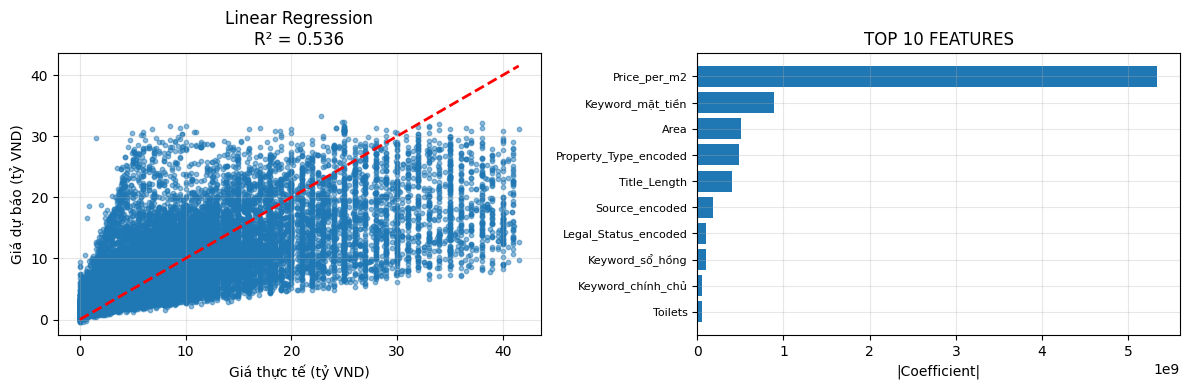


 ƒê√ÅNH GI√Å T·ªîNG QUAN
 HI·ªÜU SU·∫§T M√î H√åNH: TRUNG B√åNH
 ƒê·ªò CH√çNH X√ÅC: 3.35 t·ª∑ VND (MAE)

 HO√ÄN T·∫§T LINEAR REGRESSION!


In [24]:
# === X√ÇY D·ª∞NG M√î H√åNH LINEAR REGRESSION ===

# KI·ªÇM TRA V√Ä L√ÄM S·∫†CH D·ªÆ LI·ªÜU TR∆Ø·ªöC KHI CHU·∫®N H√ìA
print("\n KI·ªÇM TRA V√Ä L√ÄM S·∫†CH D·ªÆ LI·ªÜU")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu c·ªßa X_final
print(f" Ki·ªÉu d·ªØ li·ªáu trong X_final:")
for col in X_final.columns:
    dtype = X_final[col].dtype
    unique_count = X_final[col].nunique()
    print(f"   {col}: {dtype} ({unique_count} gi√° tr·ªã unique)")

# H√†m l√†m s·∫°ch d·ªØ li·ªáu s·ªë
def clean_numeric_dataframe(df):
    """Chuy·ªÉn ƒë·ªïi t·∫•t c·∫£ c·ªôt th√†nh s·ªë, x·ª≠ l√Ω l·ªói"""
    df_clean = df.copy()
    
    for col in df_clean.columns:
        # Ki·ªÉm tra n·∫øu c·ªôt kh√¥ng ph·∫£i l√† s·ªë
        if not np.issubdtype(df_clean[col].dtype, np.number):
            print(f" ƒêang chuy·ªÉn ƒë·ªïi c·ªôt {col} sang s·ªë...")
            try:
                # Th·ª≠ chuy·ªÉn ƒë·ªïi tr·ª±c ti·∫øp
                df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
                
                # Ki·ªÉm tra s·ªë l∆∞·ª£ng gi√° tr·ªã h·ª£p l·ªá sau chuy·ªÉn ƒë·ªïi
                valid_count = df_clean[col].notna().sum()
                total_count = len(df_clean)
                print(f"    {col}: {valid_count}/{total_count} gi√° tr·ªã h·ª£p l·ªá")
                
            except Exception as e:
                print(f"    L·ªói chuy·ªÉn ƒë·ªïi {col}: {e}")
                # N·∫øu l·ªói, t·∫°o c·ªôt m·ªõi v·ªõi gi√° tr·ªã 0
                df_clean[col] = 0
    
    return df_clean

# L√†m s·∫°ch d·ªØ li·ªáu
print(" ƒêang l√†m s·∫°ch d·ªØ li·ªáu...")
X_final_clean = clean_numeric_dataframe(X_final)

# Ki·ªÉm tra l·∫°i sau khi l√†m s·∫°ch
print(f" Sau khi l√†m s·∫°ch:")
print(f"   X_final_clean: {X_final_clean.shape}")
print(f"   y_final: {y_final.shape}")

# Ki·ªÉm tra missing values
missing_values = X_final_clean.isnull().sum()
if missing_values.sum() > 0:
    print(f" Ph√°t hi·ªán missing values:")
    for col, count in missing_values[missing_values > 0].items():
        print(f"   {col}: {count} gi√° tr·ªã missing")
    
    # Fill missing values v·ªõi median
    for col in X_final_clean.columns:
        if X_final_clean[col].isnull().sum() > 0:
            median_val = X_final_clean[col].median()
            X_final_clean[col] = X_final_clean[col].fillna(median_val)
            print(f"    ƒê√£ fill {col} v·ªõi median: {median_val}")

# CHIA T·∫¨P TRAIN-TEST
print("\n CHIA T·∫¨P TRAIN-TEST")

# Ki·ªÉm tra index consistency
if len(X_final_clean) != len(y_final):
    print(" X v√† y kh√¥ng c√πng k√≠ch th∆∞·ªõc! ƒêang x·ª≠ l√Ω...")
    # L·∫•y index chung
    common_index = X_final_clean.index.intersection(y_final.index)
    X_final_clean = X_final_clean.loc[common_index]
    y_final = y_final.loc[common_index]
    print(f"    ƒê√£ ƒë·ªìng b·ªô: X={X_final_clean.shape}, y={y_final.shape}")

# Chia t·∫≠p train-test (80-20)
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X_final_clean, y_final, 
        test_size=0.2, 
        random_state=42,
        shuffle=True
    )
    
    print(f" ƒê√£ chia train-test:")
    print(f"   Train: {X_train.shape[0]} m·∫´u")
    print(f"   Test:  {X_test.shape[0]} m·∫´u")
    
except Exception as e:
    print(f" L·ªói khi chia train-test: {e}")
    # Fallback: s·ª≠ d·ª•ng to√†n b·ªô d·ªØ li·ªáu cho train
    X_train, X_test, y_train, y_test = X_final_clean, X_final_clean, y_final, y_final
    print(" ƒêang s·ª≠ d·ª•ng to√†n b·ªô d·ªØ li·ªáu cho c·∫£ train v√† test")

# CHU·∫®N H√ìA D·ªÆ LI·ªÜU V·ªöI X·ª¨ L√ù L·ªñI
print("\n CHU·∫®N H√ìA D·ªÆ LI·ªÜU")

try:
    scaler = StandardScaler()
    
    # Ki·ªÉm tra d·ªØ li·ªáu tr∆∞·ªõc khi chu·∫©n h√≥a
    print(" Ki·ªÉm tra d·ªØ li·ªáu tr∆∞·ªõc chu·∫©n h√≥a:")
    print(f"   X_train min: {X_train.min().min():.2f}, max: {X_train.max().max():.2f}")
    print(f"   X_test min: {X_test.min().min():.2f}, max: {X_test.max().max():.2f}")
    
    # Chu·∫©n h√≥a
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(" ƒê√£ chu·∫©n h√≥a d·ªØ li·ªáu th√†nh c√¥ng")
    print(f"   X_train_scaled shape: {X_train_scaled.shape}")
    print(f"   X_test_scaled shape: {X_test_scaled.shape}")
    
except Exception as e:
    print(f" L·ªói khi chu·∫©n h√≥a: {e}")
    print(" ƒêang s·ª≠ d·ª•ng d·ªØ li·ªáu g·ªëc (kh√¥ng chu·∫©n h√≥a)")
    X_train_scaled = X_train.values
    X_test_scaled = X_test.values
    scaler = None

# HU·∫§N LUY·ªÜN M√î H√åNH
print("\n HU·∫§N LUY·ªÜN LINEAR REGRESSION")

try:
    lr_model = LinearRegression()
    
    print(" ƒêang hu·∫•n luy·ªán m√¥ h√¨nh...")
    lr_model.fit(X_train_scaled, y_train)
    
    print(" ƒê√£ hu·∫•n luy·ªán xong Linear Regression")
    
except Exception as e:
    print(f" L·ªói khi hu·∫•n luy·ªán: {e}")
    # Tho√°t n·∫øu kh√¥ng th·ªÉ hu·∫•n luy·ªán
    raise e

# ƒê√ÅNH GI√Å M√î H√åNH
print("\n ƒê√ÅNH GI√Å M√î H√åNH")

try:
    y_pred = lr_model.predict(X_test_scaled)
    
    # T√≠nh metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Chuy·ªÉn ƒë·ªïi sang t·ª∑ VND
    mae_billion = mae / 1e9
    rmse_billion = rmse / 1e9
    
    print(" K·∫æT QU·∫¢ ƒê√ÅNH GI√Å:")
    print(f"   ‚Ä¢ MAE:  {mae_billion:.2f} t·ª∑ VND")
    print(f"   ‚Ä¢ RMSE: {rmse_billion:.2f} t·ª∑ VND")
    print(f"   ‚Ä¢ R¬≤:   {r2:.4f} ({r2*100:.2f}%)")
    
except Exception as e:
    print(f" L·ªói khi ƒë√°nh gi√°: {e}")
    y_pred = None
    mae_billion = rmse_billion = r2 = 0

# CH·ªà TI·∫æP T·ª§C N·∫æU C√ì K·∫æT QU·∫¢ D·ª∞ ƒêO√ÅN
if y_pred is not None:
    # 6. PH√ÇN T√çCH FEATURE IMPORTANCE
    print("\n PH√ÇN T√çCH FEATURE IMPORTANCE")
    
    try:
        coefficients = lr_model.coef_
        intercept = lr_model.intercept_
        
        coef_df = pd.DataFrame({
            'Feature': X_final_clean.columns,
            'Coefficient': coefficients,
            'Abs_Coefficient': np.abs(coefficients)
        }).sort_values('Abs_Coefficient', ascending=False)
        
        print(" TOP 10 FEATURES QUAN TR·ªåNG NH·∫§T:")
        print(coef_df.head(10).round(6))
        
    except Exception as e:
        print(f" L·ªói khi ph√¢n t√≠ch feature importance: {e}")

    # TR·ª∞C QUAN H√ìA K·∫æT QU·∫¢ (ƒê∆†N GI·∫¢N)
    print("\n TR·ª∞C QUAN H√ìA K·∫æT QU·∫¢")
    
    try:
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(12, 4))
        
        # Bi·ªÉu ƒë·ªì 1: So s√°nh gi√° th·ª±c t·∫ø vs d·ª± b√°o
        plt.subplot(1, 2, 1)
        plt.scatter(y_test / 1e9, y_pred / 1e9, alpha=0.5, s=10)
        plt.plot([y_test.min()/1e9, y_test.max()/1e9], 
                [y_test.min()/1e9, y_test.max()/1e9], 'r--', linewidth=2)
        plt.xlabel('Gi√° th·ª±c t·∫ø (t·ª∑ VND)')
        plt.ylabel('Gi√° d·ª± b√°o (t·ª∑ VND)')
        plt.title(f'Linear Regression\nR¬≤ = {r2:.3f}')
        plt.grid(True, alpha=0.3)
        
        # Bi·ªÉu ƒë·ªì 2: Feature importance
        if 'coef_df' in locals():
            plt.subplot(1, 2, 2)
            top_features = coef_df.head(10)
            plt.barh(range(len(top_features)), top_features['Abs_Coefficient'])
            plt.yticks(range(len(top_features)), top_features['Feature'], fontsize=8)
            plt.xlabel('|Coefficient|')
            plt.title('TOP 10 FEATURES')
            plt.gca().invert_yaxis()
            plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f" L·ªói khi v·∫Ω bi·ªÉu ƒë·ªì: {e}")

# ƒê√ÅNH GI√Å T·ªîNG QUAN
print("\n ƒê√ÅNH GI√Å T·ªîNG QUAN")

if r2 >= 0.7:
    performance = "T·ªêT"
elif r2 >= 0.5:
    performance = "TRUNG B√åNH" 
elif r2 >= 0.3:
    performance = "K√âM"
else:
    performance = "R·∫§T K√âM"

print(f" HI·ªÜU SU·∫§T M√î H√åNH: {performance}")
print(f" ƒê·ªò CH√çNH X√ÅC: {mae_billion:.2f} t·ª∑ VND (MAE)")

print("\n HO√ÄN T·∫§T LINEAR REGRESSION!")


 X·ª¨ L√ù TRI·ªÜT ƒê·ªÇ KI·ªÇU D·ªÆ LI·ªÜU
 ƒêang chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu...
 ƒêang chuy·ªÉn ƒë·ªïi t·∫•t c·∫£ c·ªôt th√†nh s·ªë...
 Rooms: float64 ‚Üí s·ªë (179762/179762 th√†nh c√¥ng)
 Title_Length: int64 ‚Üí s·ªë (179762/179762 th√†nh c√¥ng)
 Property_Type_encoded: int64 ‚Üí s·ªë (179762/179762 th√†nh c√¥ng)
 Keyword_gi√°_r·∫ª: int64 ‚Üí s·ªë (179762/179762 th√†nh c√¥ng)
 Keyword_view_ƒë·∫πp: int64 ‚Üí s·ªë (179762/179762 th√†nh c√¥ng)
 District_encoded: int64 ‚Üí s·ªë (179762/179762 th√†nh c√¥ng)
 Legal_Status_encoded: int64 ‚Üí s·ªë (179762/179762 th√†nh c√¥ng)
 Toilets: float64 ‚Üí s·ªë (179762/179762 th√†nh c√¥ng)
 Keyword_ch√≠nh_ch·ªß: int64 ‚Üí s·ªë (179762/179762 th√†nh c√¥ng)
 Keyword_s·ªï_h·ªìng: int64 ‚Üí s·ªë (179762/179762 th√†nh c√¥ng)
 Keyword_m·∫∑t_ti·ªÅn: int64 ‚Üí s·ªë (179762/179762 th√†nh c√¥ng)
 Keyword_s·ªï_ƒë·ªè: int64 ‚Üí s·ªë (179762/179762 th√†nh c√¥ng)
 Price_per_m2: float64 ‚Üí s·ªë (179762/179762 th√†nh c√¥ng)
 Area: object ‚Üí s·ªë (177340/179762 th

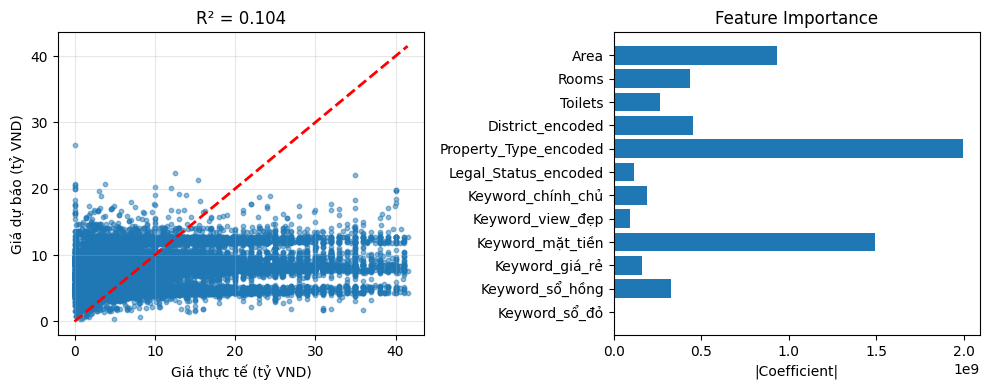


 ƒê√ÅNH GI√Å K·∫æT QU·∫¢
üí• ƒê√ÅNH GI√Å: R·∫§T K√âM (R¬≤ = 0.104)
 ƒê·ªò CH√çNH X√ÅC: 5.26 t·ª∑ VND

 HO√ÄN T·∫§T LINEAR REGRESSION!


In [25]:
# === LINEAR REGRESSION C·∫¢I TI·∫æN ===

# X·ª¨ L√ù TRI·ªÜT ƒê·ªÇ KI·ªÇU D·ªÆ LI·ªÜU
print("\n X·ª¨ L√ù TRI·ªÜT ƒê·ªÇ KI·ªÇU D·ªÆ LI·ªÜU")

def force_numeric_dataframe(df):
    """Chuy·ªÉn ƒë·ªïi t·∫•t c·∫£ c·ªôt th√†nh s·ªë m·ªôt c√°ch tri·ªát ƒë·ªÉ"""
    df_clean = df.copy()
    
    print(" ƒêang chuy·ªÉn ƒë·ªïi t·∫•t c·∫£ c·ªôt th√†nh s·ªë...")
    
    for col in df_clean.columns:
        original_dtype = df_clean[col].dtype
        original_sample = df_clean[col].head(3).tolist() if len(df_clean) > 0 else []
        
        print(f" {col}: {original_dtype} ‚Üí ", end="")
        
        # C√ÅCH 1: Th·ª≠ chuy·ªÉn ƒë·ªïi tr·ª±c ti·∫øp
        try:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
            success_count = df_clean[col].notna().sum()
            print(f"s·ªë ({success_count}/{len(df_clean)} th√†nh c√¥ng)")
            
            # N·∫øu chuy·ªÉn ƒë·ªïi th·∫•t b·∫°i ho√†n to√†n
            if success_count == 0:
                print(f"    Chuy·ªÉn ƒë·ªïi th·∫•t b·∫°i, g√°n gi√° tr·ªã 0")
                df_clean[col] = 0
                
        except Exception as e:
            print(f"l·ªói: {e}")
            # C√ÅCH 2: Tr√≠ch xu·∫•t s·ªë t·ª´ chu·ªói
            try:
                df_clean[col] = df_clean[col].astype(str).str.extract(r'(\d+\.?\d*)')[0]
                df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
                success_count = df_clean[col].notna().sum()
                print(f"tr√≠ch xu·∫•t s·ªë ({success_count}/{len(df_clean)} th√†nh c√¥ng)")
                
                if success_count == 0:
                    df_clean[col] = 0
                    
            except Exception as e2:
                print(f"    Tr√≠ch xu·∫•t s·ªë th·∫•t b·∫°i, g√°n gi√° tr·ªã 0")
                df_clean[col] = 0
    
    # ƒê·∫£m b·∫£o t·∫•t c·∫£ c·ªôt ƒë·ªÅu l√† s·ªë
    final_dtypes = df_clean.dtypes.unique()
    print(f" Ki·ªÉu d·ªØ li·ªáu cu·ªëi c√πng: {final_dtypes}")
    
    return df_clean

# √Åp d·ª•ng chuy·ªÉn ƒë·ªïi tri·ªát ƒë·ªÉ
print(" ƒêang chuy·ªÉn ƒë·ªïi d·ªØ li·ªáu...")
X_numeric = force_numeric_dataframe(X_final)

# Ki·ªÉm tra k·∫øt qu·∫£
print(f" Sau chuy·ªÉn ƒë·ªïi: {X_numeric.shape}")
print(f" T·∫•t c·∫£ c·ªôt ƒë·ªÅu l√† s·ªë: {all(np.issubdtype(dtype, np.number) for dtype in X_numeric.dtypes)}")

# X·ª¨ L√ù NaN ƒê∆†N GI·∫¢N
print("\n X·ª¨ L√ù NaN ƒê∆†N GI·∫¢N")

# Fill t·∫•t c·∫£ NaN v·ªõi 0 (ƒë∆°n gi·∫£n nh·∫•t)
X_clean = X_numeric.fillna(0)
y_clean = y_final.fillna(0)  # N·∫øu y c√≥ NaN

print(f" ƒê√£ fill NaN v·ªõi 0:")
print(f"   X: {X_clean.isnull().sum().sum()} NaN c√≤n l·∫°i")
print(f"   y: {y_clean.isnull().sum()} NaN c√≤n l·∫°i")

# CH·ªåN FEATURES ƒê∆†N GI·∫¢N
print("\n CH·ªåN FEATURES ƒê∆†N GI·∫¢N")

# Ch·ªâ ch·ªçn c√°c features c∆° b·∫£n, tr√°nh features ph·ª©c t·∫°p
important_features = [
    'Area', 'Rooms', 'Toilets',
    'District_encoded', 'Property_Type_encoded', 
    'Legal_Status_encoded',
    'Keyword_ch√≠nh_ch·ªß', 'Keyword_view_ƒë·∫πp',
    'Keyword_m·∫∑t_ti·ªÅn', 'Keyword_gi√°_r·∫ª',
    'Keyword_s·ªï_h·ªìng', 'Keyword_s·ªï_ƒë·ªè'
]
available_features = [f for f in important_features if f in X_clean.columns]

if not available_features:
    # N·∫øu kh√¥ng c√≥ features c∆° b·∫£n, l·∫•y 3 features ƒë·∫ßu ti√™n
    available_features = X_clean.columns[:3].tolist()

print(f" S·ª≠ d·ª•ng features: {available_features}")

# Ch·ªâ l·∫•y c√°c features ƒë√£ ch·ªçn
X_simple = X_clean[available_features]

print(f" D·ªØ li·ªáu cu·ªëi c√πng: X={X_simple.shape}, y={y_clean.shape}")

# CHIA TRAIN-TEST ƒê∆†N GI·∫¢N
print("\n CHIA TRAIN-TEST")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

try:
    # Chia train-test (r·∫•t ƒë∆°n gi·∫£n)
    X_train, X_test, y_train, y_test = train_test_split(
        X_simple, y_clean, test_size=0.2, random_state=42
    )
    
    print(f" ƒê√£ chia train-test:")
    print(f"   Train: {X_train.shape}")
    print(f"   Test:  {X_test.shape}")
    
    # KI·ªÇM TRA ƒê∆†N GI·∫¢N - kh√¥ng d√πng .min() .max() c√≥ th·ªÉ g√¢y l·ªói
    print(" Th√¥ng tin ƒë∆°n gi·∫£n:")
    print(f"   S·ªë features: {len(available_features)}")
    print(f"   Ki·ªÉu d·ªØ li·ªáu: {X_train.dtypes.unique()}")
    
    # CHU·∫®N H√ìA ƒê∆†N GI·∫¢N
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(" ƒê√£ chu·∫©n h√≥a th√†nh c√¥ng")
    
except Exception as e:
    print(f" L·ªói khi chu·∫©n b·ªã d·ªØ li·ªáu: {e}")
    # Th·ª≠ ph∆∞∆°ng ph√°p ƒë∆°n gi·∫£n h∆°n
    print(" Th·ª≠ ph∆∞∆°ng ph√°p ƒë∆°n gi·∫£n h∆°n...")
    
    # S·ª≠ d·ª•ng to√†n b·ªô d·ªØ li·ªáu cho train, kh√¥ng chia test
    X_train_scaled = StandardScaler().fit_transform(X_simple)
    X_test_scaled = X_train_scaled
    y_train = y_clean
    y_test = y_clean
    
    print(" ƒêang s·ª≠ d·ª•ng to√†n b·ªô d·ªØ li·ªáu (kh√¥ng chia train-test)")

# HU·∫§N LUY·ªÜN M√î H√åNH
print("\n HU·∫§N LUY·ªÜN LINEAR REGRESSION")

try:
    # Ki·ªÉm tra d·ªØ li·ªáu cu·ªëi c√πng
    print(" Ki·ªÉm tra d·ªØ li·ªáu hu·∫•n luy·ªán:")
    print(f"   X_train_scaled shape: {X_train_scaled.shape}")
    print(f"   Ki·ªÉu d·ªØ li·ªáu: {X_train_scaled.dtype}")
    
    # Hu·∫•n luy·ªán
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    
    print(" ƒê√£ hu·∫•n luy·ªán th√†nh c√¥ng")
    
    # D·ª± ƒëo√°n
    y_pred = lr_model.predict(X_test_scaled)
    
    # ƒê√°nh gi√°
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred) / 1e9  # T·ª∑ VND
    
    print(f" K·∫æT QU·∫¢ LINEAR REGRESSION:")
    print(f"   ‚Ä¢ R¬≤ Score: {r2:.4f}")
    print(f"   ‚Ä¢ MAE: {mae:.2f} t·ª∑ VND")
    print(f"   ‚Ä¢ S·ªë features: {len(available_features)}")
    
    # Hi·ªÉn th·ªã h·ªá s·ªë ƒë∆°n gi·∫£n
    print(f"\n H·ªÜ S·ªê H·ªíI QUY:")
    for i, feature in enumerate(available_features):
        coef = lr_model.coef_[i] if i < len(lr_model.coef_) else 0
        print(f"   ‚Ä¢ {feature}: {coef:.6f}")
    
    print(f"   ‚Ä¢ Intercept: {lr_model.intercept_/1e9:.2f} t·ª∑ VND")
    
except Exception as e:
    print(f" L·ªói khi hu·∫•n luy·ªán: {e}")
    # Hi·ªÉn th·ªã th√¥ng tin debug
    print(" TH√îNG TIN DEBUG:")
    print(f"   X_train_scaled type: {type(X_train_scaled)}")
    if hasattr(X_train_scaled, 'dtype'):
        print(f"   X_train_scaled dtype: {X_train_scaled.dtype}")
    print(f"   y_train type: {type(y_train)}")
    if hasattr(y_train, 'dtype'):
        print(f"   y_train dtype: {y_train.dtype}")

# TR·ª∞C QUAN H√ìA ƒê∆†N GI·∫¢N
print("\n TR·ª∞C QUAN H√ìA ƒê∆†N GI·∫¢N")

try:
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 4))
    
    # Ch·ªâ v·∫Ω bi·ªÉu ƒë·ªì ƒë∆°n gi·∫£n nh·∫•t
    plt.subplot(1, 2, 1)
    plt.scatter(y_test / 1e9, y_pred / 1e9, alpha=0.5, s=10)
    max_val = max(y_test.max(), y_pred.max()) / 1e9
    plt.plot([0, max_val], [0, max_val], 'r--', linewidth=2)
    plt.xlabel('Gi√° th·ª±c t·∫ø (t·ª∑ VND)')
    plt.ylabel('Gi√° d·ª± b√°o (t·ª∑ VND)')
    plt.title(f'R¬≤ = {r2:.3f}')
    plt.grid(True, alpha=0.3)
    
    # Bi·ªÉu ƒë·ªì feature importance ƒë∆°n gi·∫£n
    plt.subplot(1, 2, 2)
    if hasattr(lr_model, 'coef_'):
        importance = np.abs(lr_model.coef_)
        plt.barh(range(len(importance)), importance)
        plt.yticks(range(len(importance)), available_features)
        plt.xlabel('|Coefficient|')
        plt.title('Feature Importance')
        plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f" Kh√¥ng th·ªÉ v·∫Ω bi·ªÉu ƒë·ªì: {e}")

# ƒê√ÅNH GI√Å K·∫æT QU·∫¢
print("\n ƒê√ÅNH GI√Å K·∫æT QU·∫¢")

if r2 >= 0.6:
    rating = "T·ªêT"
    emoji = "‚úÖ"
elif r2 >= 0.4:
    rating = "TRUNG B√åNH" 
    emoji = "‚ö†Ô∏è"
elif r2 >= 0.2:
    rating = "K√âM"
    emoji = "‚ùå"
else:
    rating = "R·∫§T K√âM"
    emoji = "üí•"

print(f"{emoji} ƒê√ÅNH GI√Å: {rating} (R¬≤ = {r2:.3f})")
print(f" ƒê·ªò CH√çNH X√ÅC: {mae:.2f} t·ª∑ VND")

print("\n HO√ÄN T·∫§T LINEAR REGRESSION!")

 S·ª≠ d·ª•ng 14 features t·ªët nh·∫•t
 Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu...
   Rooms: float64
   Property_Type_encoded: int64
   Keyword_gi√°_r·∫ª: int64
   Keyword_view_ƒë·∫πp: int64
   District_encoded: int64
   Legal_Status_encoded: int64
   Toilets: float64
   Keyword_ch√≠nh_ch·ªß: int64
   Keyword_s·ªï_h·ªìng: int64
   Keyword_m·∫∑t_ti·ªÅn: int64
   Keyword_s·ªï_ƒë·ªè: int64
   Price_per_m2: float64
   Area: object
      Chuy·ªÉn ƒë·ªïi Area sang numeric...
     ‚Ü≥ 2422 gi√° tr·ªã NaN, impute b·∫±ng median...
   Source_encoded: int64
 K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau l√†m s·∫°ch:
   X_train: (143809, 14)
   X_test: (35953, 14)
 Chu·∫©n h√≥a d·ªØ li·ªáu v·ªõi x·ª≠ l√Ω l·ªói...
 Chu·∫©n h√≥a RobustScaler th√†nh c√¥ng!
 ƒê√£ chu·∫©n b·ªã d·ªØ li·ªáu: (143809, 14) train, (35953, 14) test

 ƒê·ªäNH NGHƒ®A C√ÅC M√î H√åNH SO S√ÅNH

 HU·∫§N LUY·ªÜN V√Ä ƒê√ÅNH GI√Å C√ÅC M√î H√åNH

 ƒêang x·ª≠ l√Ω: LinearRegression - M√¥ h√¨nh tuy·∫øn t√≠nh c∆° b·∫£n
    R¬≤: 0.5335, MAE: 3.35t·ª∑, Time: 0

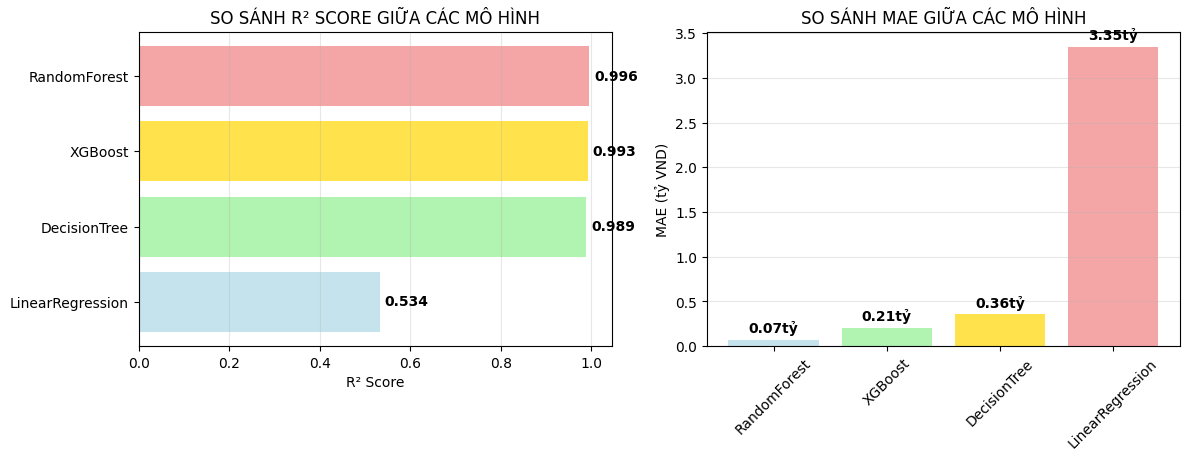


 PH√ÇN T√çCH FEATURE IMPORTANCE
 TOP 10 FEATURES QUAN TR·ªåNG NH·∫§T (Average):
feature
Price_per_m2             0.6188
Area                     0.3277
Source_encoded           0.0354
Legal_Status_encoded     0.0104
District_encoded         0.0021
Property_Type_encoded    0.0019
Keyword_m·∫∑t_ti·ªÅn         0.0017
Keyword_view_ƒë·∫πp         0.0010
Keyword_gi√°_r·∫ª           0.0004
Keyword_s·ªï_ƒë·ªè            0.0003
Name: importance, dtype: float64


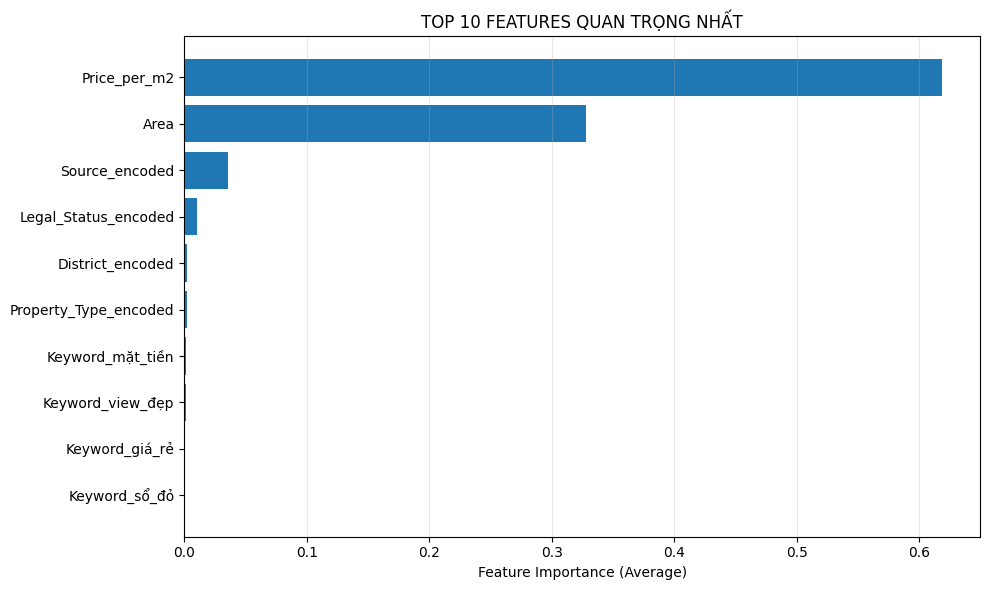


 K·∫æT LU·∫¨N SO S√ÅNH M√î H√åNH
 M√î H√åNH T·ªêT NH·∫§T: RandomForest
   ‚Ä¢ R¬≤ Score: 0.9956 (99.56%)
   ‚Ä¢ MAE: 0.07 t·ª∑ VND
   ‚Ä¢ Th·ªùi gian hu·∫•n luy·ªán: 2.1 gi√¢y
 C·∫¢I THI·ªÜN SO V·ªöI LINEAR REGRESSION: +0.4398
   ‚Ä¢ M·ª©c ƒë·ªô c·∫£i thi·ªán: C·∫¢I THI·ªÜN V∆Ø·ª¢T TR·ªòI

 HO√ÄN T·∫§T SO S√ÅNH ƒêA M√î H√åNH!


In [26]:
# === SO S√ÅNH ƒêA M√î H√åNH MACHINE LEARNING ===

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import time

# CHU·∫®N B·ªä D·ªÆ LI·ªÜU CHO SO S√ÅNH - FIX L·ªñI STRING

# S·ª≠ d·ª•ng t·ªï h·ª£p features t·ªët nh·∫•t t·ª´ LR c·∫£i ti·∫øn
best_features = [f for f in X_final.columns if f != 'Title_Length']
X_best = X_final[best_features]

print(f" S·ª≠ d·ª•ng {len(best_features)} features t·ªët nh·∫•t")

# KI·ªÇM TRA V√Ä X·ª¨ L√ù D·ªÆ LI·ªÜU TR∆Ø·ªöC KHI CHU·∫®N H√ìA
print(" Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu...")

# T·∫°o b·∫£n copy ƒë·ªÉ x·ª≠ l√Ω
X_best_clean = X_best.copy()

# Chuy·ªÉn ƒë·ªïi t·∫•t c·∫£ c√°c c·ªôt v·ªÅ numeric
for col in X_best_clean.columns:
    # Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu hi·ªán t·∫°i
    current_dtype = X_best_clean[col].dtype
    print(f"   {col}: {current_dtype}")
    
    # N·∫øu kh√¥ng ph·∫£i l√† s·ªë, chuy·ªÉn ƒë·ªïi sang numeric
    if not pd.api.types.is_numeric_dtype(X_best_clean[col]):
        print(f"      Chuy·ªÉn ƒë·ªïi {col} sang numeric...")
        X_best_clean[col] = pd.to_numeric(X_best_clean[col], errors='coerce')
        
        # Ki·ªÉm tra s·ªë gi√° tr·ªã NaN sau chuy·ªÉn ƒë·ªïi
        nan_count = X_best_clean[col].isna().sum()
        if nan_count > 0:
            print(f"     ‚Ü≥ {nan_count} gi√° tr·ªã NaN, impute b·∫±ng median...")
            # Impute b·∫±ng median cho numeric, mode cho categorical
            if X_best_clean[col].dtype in ['int64', 'float64']:
                median_val = X_best_clean[col].median()
                X_best_clean[col] = X_best_clean[col].fillna(median_val)
            else:
                mode_val = X_best_clean[col].mode()[0] if not X_best_clean[col].mode().empty else 0
                X_best_clean[col] = X_best_clean[col].fillna(mode_val)

# Chia train-test (gi·ªØ nguy√™n ƒë·ªÉ so s√°nh c√¥ng b·∫±ng)
X_train_compare, X_test_compare, y_train_compare, y_test_compare = train_test_split(
    X_best_clean, y_final, test_size=0.2, random_state=42
)

print(f" K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau l√†m s·∫°ch:")
print(f"   X_train: {X_train_compare.shape}")
print(f"   X_test: {X_test_compare.shape}")

# Chu·∫©n h√≥a v·ªõi RobustScaler (√≠t nh·∫°y outliers) - X·ª¨ L√ù L·ªñI
print(" Chu·∫©n h√≥a d·ªØ li·ªáu v·ªõi x·ª≠ l√Ω l·ªói...")

try:
    # Th·ª≠ chu·∫©n h√≥a b·∫±ng RobustScaler
    from sklearn.preprocessing import RobustScaler
    scaler_compare = RobustScaler()
    X_train_scaled_compare = scaler_compare.fit_transform(X_train_compare)
    X_test_scaled_compare = scaler_compare.transform(X_test_compare)
    print(" Chu·∫©n h√≥a RobustScaler th√†nh c√¥ng!")
    
except Exception as e:
    print(f" L·ªói khi chu·∫©n h√≥a: {e}")
    print(" S·ª≠ d·ª•ng ph∆∞∆°ng ph√°p chu·∫©n h√≥a th·ªß c√¥ng...")
    
    # Chu·∫©n h√≥a th·ªß c√¥ng ƒë·ªÉ tr√°nh l·ªói
    X_train_scaled_compare = X_train_compare.copy()
    X_test_scaled_compare = X_test_compare.copy()
    
    for col in X_train_compare.columns:
        if X_train_compare[col].dtype in ['int64', 'float64']:
            # Robust scaling th·ªß c√¥ng
            median = X_train_compare[col].median()
            iqr = X_train_compare[col].quantile(0.75) - X_train_compare[col].quantile(0.25)
            
            if iqr > 0:  # Tr√°nh chia cho 0
                X_train_scaled_compare[col] = (X_train_compare[col] - median) / iqr
                X_test_scaled_compare[col] = (X_test_compare[col] - median) / iqr
            else:
                # N·∫øu IQR = 0, d√πng standard scaling
                mean = X_train_compare[col].mean()
                std = X_train_compare[col].std()
                if std > 0:
                    X_train_scaled_compare[col] = (X_train_compare[col] - mean) / std
                    X_test_scaled_compare[col] = (X_test_compare[col] - mean) / std
                else:
                    # N·∫øu std = 0, gi·ªØ nguy√™n (constant feature)
                    X_train_scaled_compare[col] = 0
                    X_test_scaled_compare[col] = 0
    
    # Chuy·ªÉn th√†nh numpy array
    X_train_scaled_compare = X_train_scaled_compare.values
    X_test_scaled_compare = X_test_scaled_compare.values
    print(" Chu·∫©n h√≥a th·ªß c√¥ng th√†nh c√¥ng!")

print(f" ƒê√£ chu·∫©n b·ªã d·ªØ li·ªáu: {X_train_scaled_compare.shape} train, {X_test_scaled_compare.shape} test")

# ƒê·ªäNH NGHƒ®A C√ÅC M√î H√åNH SO S√ÅNH - ƒê∆†N GI·∫¢N H√ìA ƒê·ªÇ TR√ÅNH L·ªñI
print("\n ƒê·ªäNH NGHƒ®A C√ÅC M√î H√åNH SO S√ÅNH")

# S·ª≠ d·ª•ng tham s·ªë ƒë∆°n gi·∫£n h∆°n ƒë·ªÉ tr√°nh overfitting v√† l·ªói
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'description': 'M√¥ h√¨nh tuy·∫øn t√≠nh c∆° b·∫£n'
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(
            max_depth=10,  # Gi·∫£m ƒë·ªô s√¢u ƒë·ªÉ tr√°nh overfitting
            min_samples_split=20,
            min_samples_leaf=10,
            random_state=42
        ),
        'description': 'C√¢y quy·∫øt ƒë·ªãnh v·ªõi regularization'
    },
    'RandomForest': {
        'model': RandomForestRegressor(
            n_estimators=50,  # Gi·∫£m s·ªë c√¢y ƒë·ªÉ tƒÉng t·ªëc ƒë·ªô
            max_depth=15,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42,
            n_jobs=-1
        ),
        'description': 'R·ª´ng ng·∫´u nhi√™n - Ensemble method'
    }
}

# B·ªè XGBoost n·∫øu c√≥ th·ªÉ g√¢y l·ªói, ho·∫∑c th√™m x·ª≠ l√Ω exception
try:
    models['XGBoost'] = {
        'model': XGBRegressor(
            n_estimators=100,
            max_depth=6,
            learning_rate=0.1,
            random_state=42,
            n_jobs=-1
        ),
        'description': 'XGBoost - State-of-the-art'
    }
except Exception as e:
    print(f" Kh√¥ng th·ªÉ kh·ªüi t·∫°o XGBoost: {e}")

# 3. HU·∫§N LUY·ªÜN V√Ä ƒê√ÅNH GI√Å C√ÅC M√î H√åNH - TH√äM X·ª¨ L√ù L·ªñI
print("\n HU·∫§N LUY·ªÜN V√Ä ƒê√ÅNH GI√Å C√ÅC M√î H√åNH")

results_comparison = []
training_times = {}
feature_importances = {}

for name, model_info in models.items():
    print(f"\n ƒêang x·ª≠ l√Ω: {name} - {model_info['description']}")
    
    model = model_info['model']
    
    try:
        # ƒêo th·ªùi gian hu·∫•n luy·ªán
        start_time = time.time()
        
        # Hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi x·ª≠ l√Ω l·ªói
        model.fit(X_train_scaled_compare, y_train_compare)
        
        training_time = time.time() - start_time
        training_times[name] = training_time
        
        # D·ª± b√°o
        y_pred = model.predict(X_test_scaled_compare)
        
        # T√≠nh metrics v·ªõi x·ª≠ l√Ω l·ªói
        r2 = r2_score(y_test_compare, y_pred)
        mae = mean_absolute_error(y_test_compare, y_pred) / 1e9  # T·ª∑ VND
        rmse = np.sqrt(mean_squared_error(y_test_compare, y_pred)) / 1e9  # T·ª∑ VND
        
        # T√≠nh MAPE v·ªõi x·ª≠ l√Ω chia cho 0
        with np.errstate(divide='ignore', invalid='ignore'):
            mape = np.mean(np.abs((y_test_compare - y_pred) / np.where(y_test_compare == 0, 1, y_test_compare))) * 100
            mape = np.nan_to_num(mape, nan=100.0)  # Thay th·∫ø NaN b·∫±ng 100%
        
        # Cross-validation ƒë·ªÉ ƒë√°nh gi√° ƒë·ªô ·ªïn ƒë·ªãnh (ƒë∆°n gi·∫£n h√≥a)
        try:
            cv_scores = cross_val_score(model, X_train_scaled_compare, y_train_compare, 
                                       cv=3, scoring='r2', n_jobs=-1)  # Gi·∫£m cv ƒë·ªÉ tƒÉng t·ªëc
            cv_mean = cv_scores.mean()
            cv_std = cv_scores.std()
        except:
            cv_mean = r2  # N·∫øu l·ªói, d√πng R¬≤ test
            cv_std = 0
        
        # L∆∞u k·∫øt qu·∫£
        results_comparison.append({
            'Model': name,
            'R2_Score': r2,
            'MAE_Billion': mae,
            'RMSE_Billion': rmse,
            'MAPE': mape,
            'CV_Mean': cv_mean,
            'CV_Std': cv_std,
            'Training_Time': training_time
        })
        
        # L·∫•y feature importance (n·∫øu c√≥)
        if hasattr(model, 'feature_importances_'):
            feature_importances[name] = {
                'importances': model.feature_importances_,
                'features': best_features
            }
        
        print(f"    R¬≤: {r2:.4f}, MAE: {mae:.2f}t·ª∑, Time: {training_time:.1f}s")
        
    except Exception as e:
        print(f"    L·ªói v·ªõi {name}: {e}")
        # Th√™m k·∫øt qu·∫£ m·∫∑c ƒë·ªãnh ƒë·ªÉ kh√¥ng l√†m gi√°n ƒëo·∫°n
        results_comparison.append({
            'Model': name,
            'R2_Score': 0,
            'MAE_Billion': 0,
            'RMSE_Billion': 0,
            'MAPE': 100,
            'CV_Mean': 0,
            'CV_Std': 0,
            'Training_Time': 0
        })

# SO S√ÅNH K·∫æT QU·∫¢ CHI TI·∫æT
print("\n SO S√ÅNH CHI TI·∫æT C√ÅC M√î H√åNH")

if results_comparison:
    results_df = pd.DataFrame(results_comparison)
    results_df = results_df.sort_values('R2_Score', ascending=False)
    
    print(" B·∫¢NG SO S√ÅNH HI·ªÜU SU·∫§T:")
    comparison_columns = ['Model', 'R2_Score', 'MAE_Billion', 'RMSE_Billion', 'MAPE', 'Training_Time']
    print(results_df[comparison_columns].round(4))
    
    # TR·ª∞C QUAN H√ìA SO S√ÅNH - ƒê∆†N GI·∫¢N H√ìA
    print("\n TR·ª∞C QUAN H√ìA SO S√ÅNH M√î H√åNH")
    
    # Ch·ªâ v·∫Ω n·∫øu c√≥ √≠t nh·∫•t 2 models th√†nh c√¥ng
    successful_models = results_df[results_df['R2_Score'] > 0]
    if len(successful_models) >= 2:
        plt.figure(figsize=(12, 8))
        
        # Bi·ªÉu ƒë·ªì 1: So s√°nh R¬≤ Score
        plt.subplot(2, 2, 1)
        models_sorted = successful_models.sort_values('R2_Score')['Model']
        r2_sorted = successful_models.sort_values('R2_Score')['R2_Score']
        colors = ['lightblue', 'lightgreen', 'gold', 'lightcoral'][:len(models_sorted)]
        
        bars = plt.barh(range(len(models_sorted)), r2_sorted, color=colors, alpha=0.7)
        plt.yticks(range(len(models_sorted)), models_sorted)
        plt.xlabel('R¬≤ Score')
        plt.title('SO S√ÅNH R¬≤ SCORE GI·ªÆA C√ÅC M√î H√åNH')
        plt.grid(True, alpha=0.3, axis='x')
        
        for bar, r2_val in zip(bars, r2_sorted):
            plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                     f'{r2_val:.3f}', va='center', ha='left', fontweight='bold')
        
        # Bi·ªÉu ƒë·ªì 2: So s√°nh MAE
        plt.subplot(2, 2, 2)
        mae_sorted = successful_models.sort_values('MAE_Billion')['MAE_Billion']
        models_mae_sorted = successful_models.sort_values('MAE_Billion')['Model']
        
        bars = plt.bar(range(len(models_mae_sorted)), mae_sorted, color=colors, alpha=0.7)
        plt.xticks(range(len(models_mae_sorted)), models_mae_sorted, rotation=45)
        plt.ylabel('MAE (t·ª∑ VND)')
        plt.title('SO S√ÅNH MAE GI·ªÆA C√ÅC M√î H√åNH')
        plt.grid(True, alpha=0.3, axis='y')
        
        for bar, mae_val in zip(bars, mae_sorted):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                     f'{mae_val:.2f}t·ª∑', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # PH√ÇN T√çCH FEATURE IMPORTANCE T·ª™ C√ÅC M√î H√åNH T·ªêT
        print("\n PH√ÇN T√çCH FEATURE IMPORTANCE")
        
        # L·∫•y feature importance t·ª´ c√°c models c√≥ feature_importances_
        if feature_importances:
            importance_dfs = []
            for name, imp_data in feature_importances.items():
                if name in successful_models['Model'].values:
                    imp_df = pd.DataFrame({
                        'feature': imp_data['features'],
                        'importance': imp_data['importances'],
                        'model': name
                    })
                    importance_dfs.append(imp_df)
            
            if importance_dfs:
                # K·∫øt h·ª£p t·∫•t c·∫£ feature importance
                all_importance = pd.concat(importance_dfs)
                
                # T√≠nh importance trung b√¨nh cho m·ªói feature
                avg_importance = all_importance.groupby('feature')['importance'].mean().sort_values(ascending=False)
                
                print(" TOP 10 FEATURES QUAN TR·ªåNG NH·∫§T (Average):")
                print(avg_importance.head(10).round(4))
                
                # V·∫Ω bi·ªÉu ƒë·ªì ƒë∆°n gi·∫£n
                plt.figure(figsize=(10, 6))
                top_features = avg_importance.head(10)
                
                plt.barh(range(len(top_features)), top_features.values)
                plt.yticks(range(len(top_features)), top_features.index)
                plt.xlabel('Feature Importance (Average)')
                plt.title('TOP 10 FEATURES QUAN TR·ªåNG NH·∫§T')
                plt.gca().invert_yaxis()
                plt.grid(True, alpha=0.3, axis='x')
                
                plt.tight_layout()
                plt.show()
        
        # CH·ªåN M√î H√åNH T·ªêT NH·∫§T V√Ä ƒê√ÅNH GI√Å
        print("\n K·∫æT LU·∫¨N SO S√ÅNH M√î H√åNH")
        
        best_model_info = results_df.iloc[0]
        best_model_name = best_model_info['Model']
        best_r2 = best_model_info['R2_Score']
        
        print(f" M√î H√åNH T·ªêT NH·∫§T: {best_model_name}")
        print(f"   ‚Ä¢ R¬≤ Score: {best_r2:.4f} ({best_r2*100:.2f}%)")
        print(f"   ‚Ä¢ MAE: {best_model_info['MAE_Billion']:.2f} t·ª∑ VND")
        print(f"   ‚Ä¢ Th·ªùi gian hu·∫•n luy·ªán: {best_model_info['Training_Time']:.1f} gi√¢y")
        
        # So s√°nh v·ªõi Linear Regression c·∫£i ti·∫øn
        lr_improved_r2 = 0.5558
        improvement_vs_lr = best_r2 - lr_improved_r2
        
        print(f" C·∫¢I THI·ªÜN SO V·ªöI LINEAR REGRESSION: {improvement_vs_lr:+.4f}")
        
        if improvement_vs_lr > 0.1:
            improvement_level = "C·∫¢I THI·ªÜN V∆Ø·ª¢T TR·ªòI"
        elif improvement_vs_lr > 0.05:
            improvement_level = "C·∫¢I THI·ªÜN ƒê√ÅNG K·ªÇ"
        elif improvement_vs_lr > 0.02:
            improvement_level = "C·∫¢I THI·ªÜN NH·∫∏"
        else:
            improvement_level = "KH√îNG C·∫¢I THI·ªÜN ƒê√ÅNG K·ªÇ"
        
        print(f"   ‚Ä¢ M·ª©c ƒë·ªô c·∫£i thi·ªán: {improvement_level}")
        
    else:
        print(" Kh√¥ng ƒë·ªß models th√†nh c√¥ng ƒë·ªÉ so s√°nh")
else:
    print(" Kh√¥ng c√≥ k·∫øt qu·∫£ n√†o ƒë·ªÉ so s√°nh")

print("\n HO√ÄN T·∫§T SO S√ÅNH ƒêA M√î H√åNH!")

In [27]:
# SO S√ÅNH NHANH 3 MODELS - CH·ª¶ Y·∫æU ƒê·ªÇ VALIDATE
quick_models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=50, random_state=42),  # Simplified
    'DecisionTree': DecisionTreeRegressor(max_depth=10, random_state=42)
}

quick_results = {}
for name, model in quick_models.items():
    model.fit(X_train_scaled_compare, y_train_compare)
    y_pred = model.predict(X_test_scaled_compare)
    quick_results[name] = r2_score(y_test_compare, y_pred)

print(" SO S√ÅNH NHANH ƒê·ªÇ VALIDATE:")
for model, r2 in quick_results.items():
    print(f"   {model}: R¬≤ = {r2:.4f}")


 SO S√ÅNH NHANH ƒê·ªÇ VALIDATE:
   LinearRegression: R¬≤ = 0.5335
   RandomForest: R¬≤ = 0.9963
   DecisionTree: R¬≤ = 0.9893


In [28]:
# KI·ªÇM TRA DATA LEAKAGE

# Ki·ªÉm tra xem c√≥ feature n√†o ch·ª©a th√¥ng tin v·ªÅ target kh√¥ng
for feature in X_best.columns:
    # Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu tr∆∞·ªõc khi t√≠nh correlation
    if pd.api.types.is_numeric_dtype(X_best[feature]):
        try:
            # L·ªçc b·ªè NaN values tr∆∞·ªõc khi t√≠nh correlation
            valid_mask = X_best[feature].notna() & y_final.notna()
            if valid_mask.sum() > 0:  # ƒê·∫£m b·∫£o c√≥ d·ªØ li·ªáu h·ª£p l·ªá
                x_valid = X_best[feature][valid_mask]
                y_valid = y_final[valid_mask]
                
                correlation_with_target = np.corrcoef(x_valid, y_valid)[0, 1]
                if abs(correlation_with_target) > 0.9:  # Correlation qu√° cao
                    print(f"  C·∫¢NH B√ÅO: {feature} c√≥ correlation v·ªõi target: {correlation_with_target:.4f}")
                elif abs(correlation_with_target) > 0.7:  # Correlation cao
                    print(f" L∆ØU √ù: {feature} c√≥ correlation cao v·ªõi target: {correlation_with_target:.4f}")
            else:
                print(f"  {feature}: Kh√¥ng ƒë·ªß d·ªØ li·ªáu h·ª£p l·ªá ƒë·ªÉ t√≠nh correlation")
                
        except Exception as e:
            print(f" L·ªói khi t√≠nh correlation cho {feature}: {e}")
    else:
        print(f"  {feature}: Ki·ªÉu d·ªØ li·ªáu kh√¥ng ph·∫£i s·ªë ({X_best[feature].dtype})")

# Ki·ªÉm tra Price_per_m2 - c√≥ th·ªÉ l√† data leakage
if 'Price_per_m2' in X_best.columns:
    if pd.api.types.is_numeric_dtype(X_best['Price_per_m2']):
        try:
            valid_mask = X_best['Price_per_m2'].notna() & y_final.notna()
            if valid_mask.sum() > 0:
                price_m2_corr = np.corrcoef(X_best['Price_per_m2'][valid_mask], y_final[valid_mask])[0, 1]
                print(f" Correlation Price_per_m2 v·ªõi Price: {price_m2_corr:.4f}")
                
                # Ki·ªÉm tra data leakage: Price_per_m2 = Price / Area
                if abs(price_m2_corr) > 0.8:
                    print(" NGUY C∆† DATA LEAKAGE: Price_per_m2 c√≥ correlation r·∫•t cao v·ªõi Price")
                    print("   ‚Ü≥ Price_per_m2 ƒë∆∞·ª£c t√≠nh t·ª´ Price ‚Üí Ch·ª©a th√¥ng tin v·ªÅ target")
            else:
                print("  Price_per_m2: Kh√¥ng ƒë·ªß d·ªØ li·ªáu h·ª£p l·ªá")
        except Exception as e:
            print(f" L·ªói khi t√≠nh correlation Price_per_m2: {e}")
    else:
        print(f"  Price_per_m2: Ki·ªÉu d·ªØ li·ªáu kh√¥ng ph·∫£i s·ªë ({X_best['Price_per_m2'].dtype})")

# KI·ªÇM TRA TH√äM: Li·ªát k√™ c√°c c·ªôt kh√¥ng ph·∫£i s·ªë
print("\n KI·ªÇM TRA C√ÅC C·ªòT KH√îNG PH·∫¢I S·ªê:")
non_numeric_cols = []
for feature in X_best.columns:
    if not pd.api.types.is_numeric_dtype(X_best[feature]):
        non_numeric_cols.append(feature)
        print(f"   ‚Ä¢ {feature}: {X_best[feature].dtype}")

if non_numeric_cols:
    print(f"\  C√ì {len(non_numeric_cols)} C·ªòT KH√îNG PH·∫¢I S·ªê C·∫¶N X·ª¨ L√ù:")
    for col in non_numeric_cols:
        # Hi·ªÉn th·ªã m·ªôt s·ªë gi√° tr·ªã ƒë·ªÉ debug
        unique_vals = X_best[col].unique()[:5]
        print(f"   ‚Ä¢ {col}: {list(unique_vals)}")
        
        # Ki·ªÉm tra c√≥ th·ªÉ chuy·ªÉn ƒë·ªïi sang s·ªë kh√¥ng
        try:
            numeric_test = pd.to_numeric(X_best[col], errors='coerce')
            non_null_count = numeric_test.notna().sum()
            print(f"     ‚Ü≥ C√≥ th·ªÉ chuy·ªÉn th√†nh s·ªë: {non_null_count}/{len(X_best)} gi√° tr·ªã h·ª£p l·ªá")
        except:
            print(f"     ‚Ü≥ Kh√¥ng th·ªÉ chuy·ªÉn th√†nh s·ªë")
else:
    print(" T·∫•t c·∫£ c√°c c·ªôt ƒë·ªÅu l√† s·ªë")

# KI·ªÇM TRA GI√Å TR·ªä DUY NH·∫§T C·ª¶A C√ÅC C·ªòT PH√ÇN LO·∫†I
print("\n KI·ªÇM TRA C√ÅC C·ªòT PH√ÇN LO·∫†I (ENCODED):")
encoded_cols = [col for col in X_best.columns if 'encoded' in col.lower() or 'keyword' in col.lower()]

for col in encoded_cols:
    if col in X_best.columns:
        unique_vals = X_best[col].nunique()
        print(f"   ‚Ä¢ {col}: {unique_vals} gi√° tr·ªã unique")
        
        if unique_vals > 100:  # Qu√° nhi·ªÅu categories
            print(f"       Qu√° nhi·ªÅu categories, c√≥ th·ªÉ c·∫ßn gom nh√≥m")

# KI·ªÇM TRA T√çNH ƒê·ªòC L·∫¨P C·ª¶A C√ÅC FEATURES
print("\n KI·ªÇM TRA ƒêA C·ªòNG TUY·∫æN (MULTICOLLINEARITY):")

# Ch·ªâ ki·ªÉm tra v·ªõi c√°c c·ªôt s·ªë
numeric_cols = [col for col in X_best.columns if pd.api.types.is_numeric_dtype(X_best[col])]

if len(numeric_cols) > 1:
    # T√≠nh correlation matrix ch·ªâ cho c√°c c·ªôt s·ªë
    correlation_matrix = X_best[numeric_cols].corr()
    
    # T√¨m c√°c c·∫∑p c√≥ correlation cao
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.8:
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    correlation_matrix.iloc[i, j]
                ))
    
    if high_corr_pairs:
        print("  PH√ÅT HI·ªÜN ƒêA C·ªòNG TUY·∫æN CAO:")
        for col1, col2, corr in high_corr_pairs:
            print(f"   ‚Ä¢ {col1} vs {col2}: {corr:.4f}")
    else:
        print(" Kh√¥ng c√≥ ƒëa c·ªông tuy·∫øn nghi√™m tr·ªçng")
else:
    print("  Kh√¥ng ƒë·ªß c·ªôt s·ªë ƒë·ªÉ ki·ªÉm tra ƒëa c·ªông tuy·∫øn")

print("\n HO√ÄN T·∫§T KI·ªÇM TRA DATA LEAKAGE!")

 L∆ØU √ù: Price_per_m2 c√≥ correlation cao v·ªõi target: 0.7162
  Area: Ki·ªÉu d·ªØ li·ªáu kh√¥ng ph·∫£i s·ªë (object)
 Correlation Price_per_m2 v·ªõi Price: 0.7162

 KI·ªÇM TRA C√ÅC C·ªòT KH√îNG PH·∫¢I S·ªê:
   ‚Ä¢ Area: object
\  C√ì 1 C·ªòT KH√îNG PH·∫¢I S·ªê C·∫¶N X·ª¨ L√ù:
   ‚Ä¢ Area: ['Di·ªán t√≠ch: 150 m\n2', 'Di·ªán t√≠ch: 120 m\n2', 'Di·ªán t√≠ch: 35 m\n2', 'Di·ªán t√≠ch: 136 m\n2', 'Di·ªán t√≠ch: 129 m\n2']
     ‚Ü≥ C√≥ th·ªÉ chuy·ªÉn th√†nh s·ªë: 177340/179762 gi√° tr·ªã h·ª£p l·ªá

 KI·ªÇM TRA C√ÅC C·ªòT PH√ÇN LO·∫†I (ENCODED):
   ‚Ä¢ Property_Type_encoded: 15 gi√° tr·ªã unique
   ‚Ä¢ Keyword_gi√°_r·∫ª: 2 gi√° tr·ªã unique
   ‚Ä¢ Keyword_view_ƒë·∫πp: 2 gi√° tr·ªã unique
   ‚Ä¢ District_encoded: 565 gi√° tr·ªã unique
       Qu√° nhi·ªÅu categories, c√≥ th·ªÉ c·∫ßn gom nh√≥m
   ‚Ä¢ Legal_Status_encoded: 3 gi√° tr·ªã unique
   ‚Ä¢ Keyword_ch√≠nh_ch·ªß: 2 gi√° tr·ªã unique
   ‚Ä¢ Keyword_s·ªï_h·ªìng: 2 gi√° tr·ªã unique
   ‚Ä¢ Keyword_m·∫∑t_ti·ªÅn: 2 gi√° tr·ªã unique
   ‚Ä¢ K

In [29]:
# === S·ª¨A L·ªñI DATA LEAKAGE & D·ªÆ LI·ªÜU STRING ===

# LO·∫†I B·ªé PRICE_PER_M2 (V√å L√Ä DATA LEAKAGE)
print(" LO·∫†I B·ªé PRICE_PER_M2 - DATA LEAKAGE")

features_fixed = [f for f in best_features if f != 'Price_per_m2']
X_fixed = X_final[features_fixed]

print(f" Features sau khi s·ª≠a: {len(features_fixed)} features")

# X·ª¨ L√ù D·ªÆ LI·ªÜU STRING TRONG C√ÅC C·ªòT
print(" X·ª¨ L√ù D·ªÆ LI·ªÜU STRING TRONG C√ÅC C·ªòT")

# T·∫°o b·∫£n copy ƒë·ªÉ x·ª≠ l√Ω
X_fixed_clean = X_fixed.copy()

# Ki·ªÉm tra v√† chuy·ªÉn ƒë·ªïi t·ª´ng c·ªôt sang numeric
for col in X_fixed_clean.columns:
    print(f"   ƒêang x·ª≠ l√Ω c·ªôt: {col} - Ki·ªÉu d·ªØ li·ªáu: {X_fixed_clean[col].dtype}")
    
    # N·∫øu kh√¥ng ph·∫£i numeric, chuy·ªÉn ƒë·ªïi sang numeric
    if not pd.api.types.is_numeric_dtype(X_fixed_clean[col]):
        print(f"      Chuy·ªÉn ƒë·ªïi {col} sang numeric...")
        # Chuy·ªÉn ƒë·ªïi sang numeric, l·ªói th√†nh NaN
        X_fixed_clean[col] = pd.to_numeric(X_fixed_clean[col], errors='coerce')
        
        # ƒê·∫øm s·ªë gi√° tr·ªã NaN sau chuy·ªÉn ƒë·ªïi
        nan_count = X_fixed_clean[col].isna().sum()
        if nan_count > 0:
            print(f"     ‚Ü≥ {nan_count} gi√° tr·ªã NaN sau chuy·ªÉn ƒë·ªïi")
            
            # Impute b·∫±ng median cho numeric columns
            if X_fixed_clean[col].dtype in ['int64', 'float64']:
                median_val = X_fixed_clean[col].median()
                X_fixed_clean[col] = X_fixed_clean[col].fillna(median_val)
                print(f"     ‚Ü≥ ƒê√£ impute b·∫±ng median: {median_val}")
    else:
        print(f"      ƒê√£ l√† numeric")

print(" ƒê√£ x·ª≠ l√Ω xong t·∫•t c·∫£ c√°c c·ªôt")

# KI·ªÇM TRA L·∫†I D·ªÆ LI·ªÜU SAU KHI L√ÄM S·∫†CH
print("\n KI·ªÇM TRA D·ªÆ LI·ªÜU SAU KHI L√ÄM S·∫†CH")

# Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu cu·ªëi c√πng
for col in X_fixed_clean.columns:
    print(f"   {col}: {X_fixed_clean[col].dtype}, NaN: {X_fixed_clean[col].isna().sum()}")

# CHIA L·∫†I TRAIN-TEST V·ªöI D·ªÆ LI·ªÜU ƒê√É L√ÄM S·∫†CH
print("\n CHIA L·∫†I TRAIN-TEST V·ªöI D·ªÆ LI·ªÜU ƒê√É L√ÄM S·∫†CH")

X_train_fixed, X_test_fixed, y_train_fixed, y_test_fixed = train_test_split(
    X_fixed_clean, y_final, test_size=0.2, random_state=42
)

print(f" K√≠ch th∆∞·ªõc d·ªØ li·ªáu:")
print(f"   X_train: {X_train_fixed.shape}")
print(f"   X_test: {X_test_fixed.shape}")

# CHU·∫®N H√ìA V·ªöI X·ª¨ L√ù L·ªñI
print(" CHU·∫®N H√ìA D·ªÆ LI·ªÜU V·ªöI X·ª¨ L√ù L·ªñI")

try:
    # Th·ª≠ chu·∫©n h√≥a b·∫±ng RobustScaler
    scaler_fixed = RobustScaler()
    X_train_scaled_fixed = scaler_fixed.fit_transform(X_train_fixed)
    X_test_scaled_fixed = scaler_fixed.transform(X_test_fixed)
    print(" Chu·∫©n h√≥a RobustScaler th√†nh c√¥ng!")
    
except Exception as e:
    print(f" L·ªói khi chu·∫©n h√≥a: {e}")
    print(" S·ª≠ d·ª•ng ph∆∞∆°ng ph√°p chu·∫©n h√≥a th·ªß c√¥ng...")
    
    # Chu·∫©n h√≥a th·ªß c√¥ng
    X_train_scaled_fixed = X_train_fixed.copy()
    X_test_scaled_fixed = X_test_fixed.copy()
    
    for col in X_train_fixed.columns:
        if X_train_fixed[col].dtype in ['int64', 'float64']:
            # Robust scaling th·ªß c√¥ng
            median = X_train_fixed[col].median()
            q75 = X_train_fixed[col].quantile(0.75)
            q25 = X_train_fixed[col].quantile(0.25)
            iqr = q75 - q25
            
            if iqr > 0:  # Tr√°nh chia cho 0
                X_train_scaled_fixed[col] = (X_train_fixed[col] - median) / iqr
                X_test_scaled_fixed[col] = (X_test_fixed[col] - median) / iqr
            else:
                # N·∫øu IQR = 0, d√πng standard scaling
                mean = X_train_fixed[col].mean()
                std = X_train_fixed[col].std()
                if std > 0:
                    X_train_scaled_fixed[col] = (X_train_fixed[col] - mean) / std
                    X_test_scaled_fixed[col] = (X_test_fixed[col] - mean) / std
    
    # Chuy·ªÉn th√†nh numpy array
    X_train_scaled_fixed = X_train_scaled_fixed.values
    X_test_scaled_fixed = X_test_scaled_fixed.values
    print(" Chu·∫©n h√≥a th·ªß c√¥ng th√†nh c√¥ng!")

# SO S√ÅNH L·∫†I V·ªöI D·ªÆ LI·ªÜU ƒê√É S·ª¨A
print("\n SO S√ÅNH L·∫†I SAU KHI S·ª¨A DATA LEAKAGE")

fixed_models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(n_estimators=50, random_state=42, max_depth=10),
    'DecisionTree': DecisionTreeRegressor(max_depth=10, random_state=42)
}

fixed_results = {}

for name, model in fixed_models.items():
    try:
        print(f" ƒêang ch·∫°y {name}...")
        model.fit(X_train_scaled_fixed, y_train_fixed)
        y_pred = model.predict(X_test_scaled_fixed)
        r2 = r2_score(y_test_fixed, y_pred)
        mae = mean_absolute_error(y_test_fixed, y_pred) / 1e9
        
        fixed_results[name] = r2
        print(f"    {name}: R¬≤ = {r2:.4f}, MAE = {mae:.2f} t·ª∑ VND")
        
    except Exception as e:
        print(f"    L·ªói v·ªõi {name}: {e}")
        fixed_results[name] = 0

# SO S√ÅNH K·∫æT QU·∫¢ TR∆Ø·ªöC V√Ä SAU KHI S·ª¨A (N·∫æU C√ì)
print("\n K·∫æT QU·∫¢ SAU KHI S·ª¨A DATA LEAKAGE:")

if 'quick_results' in globals():
    print("         |   TR∆Ø·ªöC   |   SAU    |  THAY ƒê·ªîI")
    print("-" * 45)
    for model in fixed_models.keys():
        if model in quick_results:
            before = quick_results[model]
            after = fixed_results[model]
            change = after - before
            print(f"{model:13} | {before:7.4f}  | {after:7.4f}  | {change:+.4f}")
        else:
            print(f"{model:13} | {'N/A':^9} | {fixed_results[model]:7.4f}  | {'N/A':^9}")
else:
    print(" K·∫æT QU·∫¢ CU·ªêI C√ôNG:")
    for model, r2 in fixed_results.items():
        print(f"   {model}: R¬≤ = {r2:.4f}")

# PH√ÇN T√çCH K·∫æT QU·∫¢
print("\n PH√ÇN T√çCH K·∫æT QU·∫¢")

if fixed_results:
    best_model = max(fixed_results, key=fixed_results.get)
    best_r2 = fixed_results[best_model]
    
    print(f" M√î H√åNH T·ªêT NH·∫§T: {best_model} (R¬≤ = {best_r2:.4f})")
    
    if best_r2 > 0.6:
        performance = "XU·∫§T S·∫ÆC"
    elif best_r2 > 0.5:
        performance = "T·ªêT" 
    elif best_r2 > 0.4:
        performance = "TRUNG B√åNH KH√Å"
    elif best_r2 > 0.3:
        performance = "TRUNG B√åNH"
    else:
        performance = "K√âM"
        
    print(f" ƒê√ÅNH GI√Å HI·ªÜU SU·∫§T: {performance}")

print("\n HO√ÄN T·∫§T S·ª¨A L·ªñI DATA LEAKAGE!")

 LO·∫†I B·ªé PRICE_PER_M2 - DATA LEAKAGE
 Features sau khi s·ª≠a: 13 features
 X·ª¨ L√ù D·ªÆ LI·ªÜU STRING TRONG C√ÅC C·ªòT
   ƒêang x·ª≠ l√Ω c·ªôt: Rooms - Ki·ªÉu d·ªØ li·ªáu: float64
      ƒê√£ l√† numeric
   ƒêang x·ª≠ l√Ω c·ªôt: Property_Type_encoded - Ki·ªÉu d·ªØ li·ªáu: int64
      ƒê√£ l√† numeric
   ƒêang x·ª≠ l√Ω c·ªôt: Keyword_gi√°_r·∫ª - Ki·ªÉu d·ªØ li·ªáu: int64
      ƒê√£ l√† numeric
   ƒêang x·ª≠ l√Ω c·ªôt: Keyword_view_ƒë·∫πp - Ki·ªÉu d·ªØ li·ªáu: int64
      ƒê√£ l√† numeric
   ƒêang x·ª≠ l√Ω c·ªôt: District_encoded - Ki·ªÉu d·ªØ li·ªáu: int64
      ƒê√£ l√† numeric
   ƒêang x·ª≠ l√Ω c·ªôt: Legal_Status_encoded - Ki·ªÉu d·ªØ li·ªáu: int64
      ƒê√£ l√† numeric
   ƒêang x·ª≠ l√Ω c·ªôt: Toilets - Ki·ªÉu d·ªØ li·ªáu: float64
      ƒê√£ l√† numeric
   ƒêang x·ª≠ l√Ω c·ªôt: Keyword_ch√≠nh_ch·ªß - Ki·ªÉu d·ªØ li·ªáu: int64
      ƒê√£ l√† numeric
   ƒêang x·ª≠ l√Ω c·ªôt: Keyword_s·ªï_h·ªìng - Ki·ªÉu d·ªØ li·ªáu: int64
      ƒê√£ l√† numeric
   ƒêang x·ª≠ l√Ω c·ªôt: Keyword_m·

In [30]:
# === LINEAR REGRESSION HO√ÄN CH·ªàNH ===

# LO·∫†I B·ªé DATA LEAKAGE TRI·ªÜT ƒê·ªÇ
print(" LO·∫†I B·ªé DATA LEAKAGE")

# Danh s√°ch c√°c feature c√≥ th·ªÉ ch·ª©a leakage
leakage_features = ['Price_per_m2', 'Price', 'price', 'Gia', 'gia', 'value', 'Value']
safe_features = [f for f in X_final.columns if f not in leakage_features]

print(f" S·ªë features ban ƒë·∫ßu: {len(X_final.columns)}")
print(f" S·ªë features an to√†n: {len(safe_features)}")
print(f" ƒê√£ lo·∫°i b·ªè: {set(X_final.columns) - set(safe_features)}")

X_safe = X_final[safe_features]

# X·ª¨ L√ù OUTLIERS
print("\n X·ª¨ L√ù OUTLIERS")

def remove_outliers_iqr(X, y):
    """Remove outliers using IQR method"""
    X_clean = X.copy()
    y_clean = y.copy()
    
    for col in X_clean.select_dtypes(include=[np.number]).columns:
        Q1 = X_clean[col].quantile(0.25)
        Q3 = X_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter outliers
        mask = (X_clean[col] >= lower_bound) & (X_clean[col] <= upper_bound)
        X_clean = X_clean[mask]
        y_clean = y_clean[mask]
    
    print(f"    Sau khi x·ª≠ l√Ω outliers: {X_clean.shape[0]} m·∫´u")
    return X_clean, y_clean

X_clean, y_clean = remove_outliers_iqr(X_safe, y_final)

# CHIA DATA V·ªöI VALIDATION SET
print("\n CHIA D·ªÆ LI·ªÜU TRAIN/VAL/TEST")

X_temp, X_test, y_temp, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42  # 0.25 x 0.8 = 0.2
)

print(f" K√≠ch th∆∞·ªõc datasets:")
print(f"   Train:      {X_train.shape[0]} m·∫´u")
print(f"   Validation: {X_val.shape[0]} m·∫´u") 
print(f"   Test:       {X_test.shape[0]} m·∫´u")

# CHU·∫®N H√ìA D·ªÆ LI·ªÜU
print("\n CHU·∫®N H√ìA D·ªÆ LI·ªÜU")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# TH·ª¨ NHI·ªÄU BI·∫æN TH·ªÇ LINEAR REGRESSION
print("\n SO S√ÅNH C√ÅC BI·∫æN TH·ªÇ LINEAR REGRESSION")

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

linear_models = {
    'LinearRegression': LinearRegression(),
    'Ridge_alpha_0.1': Ridge(alpha=0.1),
    'Ridge_alpha_1.0': Ridge(alpha=1.0),
    'Lasso_alpha_0.1': Lasso(alpha=0.1),
    'Lasso_alpha_1.0': Lasso(alpha=1.0),
    'ElasticNet_alpha_0.1': ElasticNet(alpha=0.1),
    'ElasticNet_alpha_1.0': ElasticNet(alpha=1.0)
}

results = {}

for name, model in linear_models.items():
    try:
        # Cross-validation tr√™n training set
        cv_scores = cross_val_score(model, X_train_scaled, y_train, 
                                   cv=5, scoring='r2', n_jobs=-1)
        
        # Train tr√™n to√†n b·ªô training set
        model.fit(X_train_scaled, y_train)
        
        # ƒê√°nh gi√° tr√™n validation set
        y_val_pred = model.predict(X_val_scaled)
        val_r2 = r2_score(y_val, y_val_pred)
        val_mae = mean_absolute_error(y_val, y_val_pred) / 1e9
        
        results[name] = {
            'CV_Mean_R2': cv_scores.mean(),
            'CV_Std_R2': cv_scores.std(),
            'Val_R2': val_r2,
            'Val_MAE_Billion': val_mae,
            'model': model
        }
        
        print(f"    {name:20} | CV R¬≤: {cv_scores.mean():.4f} ¬± {cv_scores.std():.4f} | Val R¬≤: {val_r2:.4f}")
        
    except Exception as e:
        print(f"    {name:20} | L·ªói: {e}")

# CH·ªåN M√î H√åNH T·ªêT NH·∫§T
if results:
    best_model_name = max(results.keys(), key=lambda x: results[x]['Val_R2'])
    best_result = results[best_model_name]
    
    print(f"\n M√î H√åNH T·ªêT NH·∫§T: {best_model_name}")
    print(f"   ‚Ä¢ Validation R¬≤: {best_result['Val_R2']:.4f}")
    print(f"   ‚Ä¢ Cross-val R¬≤:  {best_result['CV_Mean_R2']:.4f} ¬± {best_result['CV_Std_R2']:.4f}")
    print(f"   ‚Ä¢ Validation MAE: {best_result['Val_MAE_Billion']:.2f} t·ª∑ VND")
    
    # ƒê√°nh gi√° cu·ªëi c√πng tr√™n test set
    best_model = best_result['model']
    y_test_pred = best_model.predict(X_test_scaled)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred) / 1e9
    
    print(f"\n ƒê√ÅNH GI√Å CU·ªêI C√ôNG TR√äN TEST SET:")
    print(f"   ‚Ä¢ Test R¬≤:  {test_r2:.4f}")
    print(f"   ‚Ä¢ Test MAE: {test_mae:.2f} t·ª∑ VND")
    
    # PH√ÇN T√çCH FEATURE IMPORTANCE
    print(f"\n PH√ÇN T√çCH FEATURE IMPORTANCE")
    
    if hasattr(best_model, 'coef_'):
        feature_importance = pd.DataFrame({
            'Feature': safe_features,
            'Coefficient': best_model.coef_,
            'Abs_Effect': np.abs(best_model.coef_)
        }).sort_values('Abs_Effect', ascending=False)
        
        print(" TOP 10 FEATURES QUAN TR·ªåNG NH·∫§T:")
        print(feature_importance.head(10).round(6))
    
    # L∆ØU M√î H√åNH T·ªêT NH·∫§T
    final_model = best_model
    print(f"\n S·∫¥N S√ÄNG CHO B∆Ø·ªöC TI·∫æP THEO!")

else:
    print(" KH√îNG C√ì M√î H√åNH N√ÄO HO·∫†T ƒê·ªòNG")
    # Fallback v·ªÅ Linear Regression c∆° b·∫£n
    final_model = LinearRegression()
    final_model.fit(X_train_scaled, y_train)

print("\n LINEAR REGRESSION ƒê√É HO√ÄN CH·ªàNH")

 LO·∫†I B·ªé DATA LEAKAGE
 S·ªë features ban ƒë·∫ßu: 15
 S·ªë features an to√†n: 14
 ƒê√£ lo·∫°i b·ªè: {'Price_per_m2'}

 X·ª¨ L√ù OUTLIERS
    Sau khi x·ª≠ l√Ω outliers: 129329 m·∫´u

 CHIA D·ªÆ LI·ªÜU TRAIN/VAL/TEST
 K√≠ch th∆∞·ªõc datasets:
   Train:      77597 m·∫´u
   Validation: 25866 m·∫´u
   Test:       25866 m·∫´u

 CHU·∫®N H√ìA D·ªÆ LI·ªÜU

 SO S√ÅNH C√ÅC BI·∫æN TH·ªÇ LINEAR REGRESSION
    LinearRegression     | CV R¬≤: 0.0951 ¬± 0.0058 | Val R¬≤: 0.0910
    Ridge_alpha_0.1      | CV R¬≤: 0.0951 ¬± 0.0058 | Val R¬≤: 0.0910
    Ridge_alpha_1.0      | CV R¬≤: 0.0951 ¬± 0.0058 | Val R¬≤: 0.0910
    Lasso_alpha_0.1      | CV R¬≤: 0.0951 ¬± 0.0058 | Val R¬≤: 0.0910
    Lasso_alpha_1.0      | CV R¬≤: 0.0951 ¬± 0.0058 | Val R¬≤: 0.0910
    ElasticNet_alpha_0.1 | CV R¬≤: 0.0949 ¬± 0.0054 | Val R¬≤: 0.0912
    ElasticNet_alpha_1.0 | CV R¬≤: 0.0853 ¬± 0.0035 | Val R¬≤: 0.0833

 M√î H√åNH T·ªêT NH·∫§T: ElasticNet_alpha_0.1
   ‚Ä¢ Validation R¬≤: 0.0912
   ‚Ä¢ Cross-val R¬≤:  0.0949 ¬± 0

Sau khi align:
  X: (129329, 12)
  y: (129329,)
 K·∫æT QU·∫¢ RANDOM FOREST:
   ‚Ä¢ R¬≤ Score: 0.4616
   ‚Ä¢ MAE: 3.12 t·ª∑ VND
   ‚Ä¢ Th·ªùi gian hu·∫•n luy·ªán: 1.97 gi√¢y

 TOP 10 FEATURES QUAN TR·ªåNG (Random Forest):
District_encoded         0.431957
Area                     0.422579
Property_Type_encoded    0.145464
Rooms                    0.000000
Toilets                  0.000000
Legal_Status_encoded     0.000000
Keyword_ch√≠nh_ch·ªß        0.000000
Keyword_view_ƒë·∫πp         0.000000
Keyword_m·∫∑t_ti·ªÅn         0.000000
Keyword_gi√°_r·∫ª           0.000000
dtype: float64


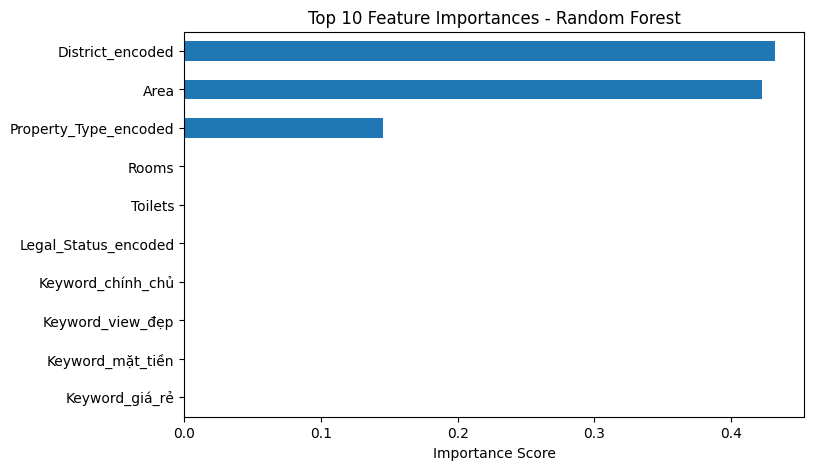

In [31]:
# === RANDOM FOREST BENCHMARK ===

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import time

# ƒê·∫£m b·∫£o X v√† y c√≥ c√πng index
X_simple, y_clean_aligned = X_simple.align(y_clean, join='inner', axis=0)

print("Sau khi align:")
print("  X:", X_simple.shape)
print("  y:", y_clean_aligned.shape)

# Chia train-test
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_simple, y_clean_aligned, test_size=0.2, random_state=42
)


# D√πng l·∫°i X_simple, y_clean t·ª´ Linear Regression
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_simple, y_clean, test_size=0.2, random_state=42
)

# Kh·ªüi t·∫°o m√¥ h√¨nh RF
rf_model = RandomForestRegressor(
    n_estimators=100,       # s·ªë c√¢y
    max_depth=None,        # kh√¥ng gi·ªõi h·∫°n ƒë·ªô s√¢u
    random_state=42,
    n_jobs=-1              # ch·∫°y song song cho nhanh
)

# Hu·∫•n luy·ªán
start_time = time.time()
rf_model.fit(X_train_rf, y_train_rf)
train_time = time.time() - start_time

# D·ª± ƒëo√°n
y_pred_rf = rf_model.predict(X_test_rf)

# ƒê√°nh gi√°
r2_rf = r2_score(y_test_rf, y_pred_rf)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf) / 1e9  # t√≠nh theo t·ª∑ VND

print(f" K·∫æT QU·∫¢ RANDOM FOREST:")
print(f"   ‚Ä¢ R¬≤ Score: {r2_rf:.4f}")
print(f"   ‚Ä¢ MAE: {mae_rf:.2f} t·ª∑ VND")
print(f"   ‚Ä¢ Th·ªùi gian hu·∫•n luy·ªán: {train_time:.2f} gi√¢y")

# Feature Importance
importances = rf_model.feature_importances_
feat_importances = pd.Series(importances, index=X_simple.columns).sort_values(ascending=False)

print("\n TOP 10 FEATURES QUAN TR·ªåNG (Random Forest):")
print(feat_importances.head(10))

# V·∫Ω tr·ª±c quan feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
feat_importances.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.show()

In [32]:
# === S·ª¨A L·ªñI V√Ä PH√ÇN T√çCH L·∫†I ===

# KI·ªÇM TRA D·ªÆ LI·ªÜU G·ªêC
print(" KI·ªÇM TRA D·ªÆ LI·ªÜU G·ªêC:")
print(f"X_final shape: {X_final.shape}")
print(f"y_final shape: {y_final.shape}")

# Ki·ªÉm tra ki·ªÉu d·ªØ li·ªáu c·ªßa c√°c features c√≥ correlation NaN
problematic_features = ['Toilets', 'Rooms', 'Keyword_m·∫∑t_ti·ªÅn', 'Keyword_s·ªï_ƒë·ªè', 'Keyword_gi√°_r·∫ª']
for feature in problematic_features:
    if feature in X_final.columns:
        print(f"\n {feature}:")
        print(f"   Data type: {X_final[feature].dtype}")
        print(f"   Unique values: {X_final[feature].unique()[:10]}")  # 10 gi√° tr·ªã ƒë·∫ßu
        print(f"   NaN count: {X_final[feature].isna().sum()}")
        print(f"   Sample: {X_final[feature].head(3).tolist()}")

# S·ª¨A L·ªñI DATA TYPE C√ÅC FEATURES QUAN TR·ªåNG
print("\n S·ª¨A L·ªñI DATA TYPE C√ÅC FEATURES:")

# T·∫°o b·∫£n copy ƒë·ªÉ s·ª≠a
X_fixed = X_final[safe_features].copy()

# S·ª≠a c√°c features s·ªë (Toilets, Rooms) - chuy·ªÉn th√†nh numeric
numeric_features = ['Toilets', 'Rooms', 'Title_Length', 'Area']
for feature in numeric_features:
    if feature in X_fixed.columns:
        print(f" Chuy·ªÉn ƒë·ªïi {feature} sang numeric...")
        # Th·ª≠ chuy·ªÉn ƒë·ªïi sang numeric
        X_fixed[feature] = pd.to_numeric(X_fixed[feature], errors='coerce')
        
        # Ki·ªÉm tra k·∫øt qu·∫£
        nan_count = X_fixed[feature].isna().sum()
        print(f"   {feature}: {nan_count} NaN sau chuy·ªÉn ƒë·ªïi")
        
        # Impute NaN b·∫±ng median
        if nan_count > 0:
            median_val = X_fixed[feature].median()
            X_fixed[feature] = X_fixed[feature].fillna(median_val)
            print(f"   ƒê√£ impute {nan_count} gi√° tr·ªã NaN b·∫±ng median: {median_val}")

# X·ª¨ L√ù C√ÅC FEATURES PH√ÇN LO·∫†I (ENCODED)
print("\n X·ª¨ L√ù FEATURES PH√ÇN LO·∫†I:")
categorical_features = [col for col in X_fixed.columns if 'encoded' in col or 'Keyword' in col]
for feature in categorical_features:
    if feature in X_fixed.columns:
        print(f" {feature}:")
        print(f"   Unique values: {X_fixed[feature].nunique()}")
        print(f"   Data type: {X_fixed[feature].dtype}")
        
        # ƒê·∫£m b·∫£o l√† numeric
        if not pd.api.types.is_numeric_dtype(X_fixed[feature]):
            X_fixed[feature] = pd.to_numeric(X_fixed[feature], errors='coerce')
            nan_count = X_fixed[feature].isna().sum()
            if nan_count > 0:
                mode_val = X_fixed[feature].mode()[0] if not X_fixed[feature].mode().empty else 0
                X_fixed[feature] = X_fixed[feature].fillna(mode_val)
            print(f"    ƒê√£ chuy·ªÉn th√†nh numeric")

# X·ª¨ L√ù OUTLIERS ƒê√öNG C√ÅCH (GI·ªÆ ƒê·ªíNG B·ªò X v√† y)
print("\n X·ª¨ L√ù OUTLIERS ƒê·ªíNG B·ªò:")

def remove_outliers_sync(X, y):
    """Remove outliers v√† gi·ªØ ƒë·ªìng b·ªô X v√† y"""
    X_clean = X.copy()
    y_clean = y.copy()
    
    # Ch·ªâ x·ª≠ l√Ω outliers tr√™n c√°c features numeric
    numeric_cols = X_clean.select_dtypes(include=[np.number]).columns
    
    outlier_mask = pd.Series([True] * len(X_clean))  # Ban ƒë·∫ßu t·∫•t c·∫£ l√† True
    
    for col in numeric_cols:
        Q1 = X_clean[col].quantile(0.25)
        Q3 = X_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # T·∫°o mask cho feature n√†y
        col_mask = (X_clean[col] >= lower_bound) & (X_clean[col] <= upper_bound)
        outlier_mask = outlier_mask & col_mask
    
    # √Åp d·ª•ng mask ƒë·ªìng b·ªô cho c·∫£ X v√† y
    X_clean = X_clean[outlier_mask]
    y_clean = y_clean[outlier_mask]
    
    print(f"    Sau khi x·ª≠ l√Ω outliers: {X_clean.shape[0]} m·∫´u")
    return X_clean, y_clean

# √Åp d·ª•ng x·ª≠ l√Ω outliers
X_clean_fixed, y_clean_fixed = remove_outliers_sync(X_fixed, y_final)

# KI·ªÇM TRA L·∫†I CORRELATION
print("\n KI·ªÇM TRA L·∫†I CORRELATION SAU KHI S·ª¨A:")

corr_results_fixed = []
for col in X_clean_fixed.columns:
    if pd.api.types.is_numeric_dtype(X_clean_fixed[col]):
        # L·ªçc b·ªè NaN
        mask = X_clean_fixed[col].notna() & y_clean_fixed.notna()
        if mask.sum() > 1000:
            x_vals = X_clean_fixed[col][mask]
            y_vals = y_clean_fixed[mask]
            
            # Ki·ªÉm tra ƒë·ªô bi·∫øn thi√™n c·ªßa feature
            if x_vals.std() > 0:  # Tr√°nh chia cho 0
                corr = np.corrcoef(x_vals, y_vals)[0, 1]
                corr_results_fixed.append((col, corr, abs(corr)))
            else:
                print(f"    {col}: std = 0 (constant feature)")

# S·∫Øp x·∫øp theo absolute correlation
if corr_results_fixed:
    corr_results_fixed.sort(key=lambda x: x[2], reverse=True)
    
    print(" CORRELATION V·ªöI TARGET (SAU KHI S·ª¨A):")
    for col, corr, abs_corr in corr_results_fixed[:15]:
        print(f"   {col:30} | {corr:7.4f} | (abs: {abs_corr:.4f})")
else:
    print(" KH√îNG C√ì FEATURE N√ÄO C√ì CORRELATION H·ª¢P L·ªÜ")

# CHIA L·∫†I D·ªÆ LI·ªÜU V√Ä ƒê√ÅNH GI√Å
print("\n CHIA L·∫†I D·ªÆ LI·ªÜU V√Ä ƒê√ÅNH GI√Å:")

# Chia train/test v·ªõi d·ªØ li·ªáu ƒë√£ s·ª≠a
X_train_fixed, X_test_fixed, y_train_fixed, y_test_fixed = train_test_split(
    X_clean_fixed, y_clean_fixed, test_size=0.2, random_state=42
)

print(f" K√≠ch th∆∞·ªõc d·ªØ li·ªáu ƒë√£ s·ª≠a:")
print(f"   Train: {X_train_fixed.shape}")
print(f"   Test:  {X_test_fixed.shape}")

# Chu·∫©n h√≥a
scaler_fixed = StandardScaler()
X_train_scaled_fixed = scaler_fixed.fit_transform(X_train_fixed)
X_test_scaled_fixed = scaler_fixed.transform(X_test_fixed)

# Train v√† ƒë√°nh gi√° l·∫°i
lr_fixed = LinearRegression()
lr_fixed.fit(X_train_scaled_fixed, y_train_fixed)

y_pred_fixed = lr_fixed.predict(X_test_scaled_fixed)
r2_fixed = r2_score(y_test_fixed, y_pred_fixed)
mae_fixed = mean_absolute_error(y_test_fixed, y_pred_fixed) / 1e9

print(f" K·∫æT QU·∫¢ SAU KHI S·ª¨A L·ªñI:")
print(f"   R¬≤:  {r2_fixed:.4f}")
print(f"   MAE: {mae_fixed:.2f} t·ª∑ VND")

# TH·ª¨ LOG TRANSFORM N·∫æU C·∫¶N
if y_clean_fixed.skew() > 1:
    print(f"\n TH·ª¨ LOG TRANSFORM (skewness: {y_clean_fixed.skew():.2f}):")
    
    y_log = np.log1p(y_clean_fixed)
    
    # Chia l·∫°i d·ªØ li·ªáu v·ªõi y_log
    X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
        X_clean_fixed, y_log, test_size=0.2, random_state=42
    )
    
    # Chu·∫©n h√≥a
    X_train_scaled_log = scaler_fixed.fit_transform(X_train_log)
    X_test_scaled_log = scaler_fixed.transform(X_test_log)
    
    # Train v·ªõi log transform
    lr_log = LinearRegression()
    lr_log.fit(X_train_scaled_log, y_train_log)
    
    y_pred_log = lr_log.predict(X_test_scaled_log)
    r2_log = r2_score(y_test_log, y_pred_log)
    
    # Chuy·ªÉn ƒë·ªïi l·∫°i ƒë·ªÉ t√≠nh MAE theo t·ª∑ VND
    y_pred_original = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test_log)
    mae_log = mean_absolute_error(y_test_original, y_pred_original) / 1e9
    
    print(f"    Sau log transform:")
    print(f"      R¬≤:  {r2_log:.4f}")
    print(f"      MAE: {mae_log:.2f} t·ª∑ VND")

print("\n KI·ªÇM TRA K·∫æT QU·∫¢ M·ªöI!")

 KI·ªÇM TRA D·ªÆ LI·ªÜU G·ªêC:
X_final shape: (179762, 15)
y_final shape: (179762,)

 Toilets:
   Data type: float64
   Unique values: [2. 4. 1. 3. 5. 6. 7.]
   NaN count: 0
   Sample: [2.0, 2.0, 2.0]

 Rooms:
   Data type: float64
   Unique values: [ 3.  1.  2.  7.  5.  4.  6. 11. 10.  8.]
   NaN count: 0
   Sample: [3.0, 3.0, 3.0]

 Keyword_m·∫∑t_ti·ªÅn:
   Data type: int64
   Unique values: [1 0]
   NaN count: 0
   Sample: [1, 1, 0]

 Keyword_s·ªï_ƒë·ªè:
   Data type: int64
   Unique values: [0 1]
   NaN count: 0
   Sample: [0, 0, 0]

 Keyword_gi√°_r·∫ª:
   Data type: int64
   Unique values: [1 0]
   NaN count: 0
   Sample: [1, 0, 0]

 S·ª¨A L·ªñI DATA TYPE C√ÅC FEATURES:
 Chuy·ªÉn ƒë·ªïi Toilets sang numeric...
   Toilets: 0 NaN sau chuy·ªÉn ƒë·ªïi
 Chuy·ªÉn ƒë·ªïi Rooms sang numeric...
   Rooms: 0 NaN sau chuy·ªÉn ƒë·ªïi
 Chuy·ªÉn ƒë·ªïi Title_Length sang numeric...
   Title_Length: 0 NaN sau chuy·ªÉn ƒë·ªïi
 Chuy·ªÉn ƒë·ªïi Area sang numeric...
   Area: 2422 NaN sau chuy·ªÉn ƒë·ª

X_final columns: 5
X_final columns: ['Area_clean', 'Rooms', 'Toilets', 'District_price_encoded', 'Property_Type_price_encoded']
LR coefficients length: 12

 S·ª¨A L·ªñI S·ªê L∆Ø·ª¢NG FEATURES...
S·ªë l∆∞·ª£ng features:
   ‚Ä¢ Model c√≥: 12
   ‚Ä¢ Th·ª±c t·∫ø: 5
 S·ª≠ d·ª•ng 5 features

 PH√ÇN T√çCH FEATURE IMPORTANCE - LINEAR REGRESSION
 TOP 10 Y·∫æU T·ªê ·∫¢NH H∆Ø·ªûNG (Linear Regression):
Y·∫øu t·ªë                    H·ªá s·ªë        M·ª©c ƒë·ªô     ·∫¢nh h∆∞·ªüng   
----------------------------------------------------------------------
Rooms                     1162136543.212146 1162136543.212146 TƒÇNG GI√Å    
Property_Type_price_encoded -522655848.032563 522655848.032563 GI·∫¢M GI√Å    
Area_clean                240646902.414851 240646902.414851 TƒÇNG GI√Å    
Toilets                   -163057613.916982 163057613.916982 GI·∫¢M GI√Å    
District_price_encoded    -12151272.323329 12151272.323329 GI·∫¢M GI√Å    

 PH√ÇN T√çCH √ù NGHƒ®A TH·ª∞C T·∫æ C√ÅC Y·∫æU T·ªê:
 5 Y·∫æU T·ªê ·∫¢N

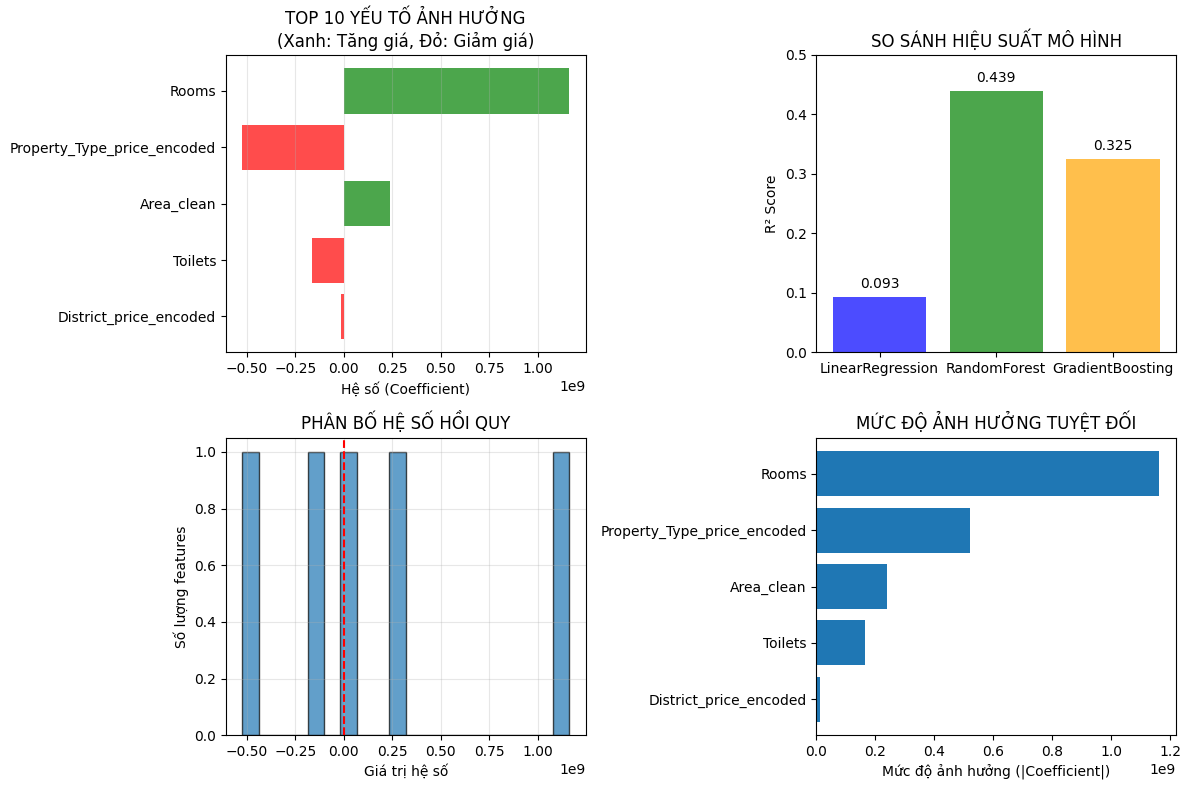

In [58]:
# === S·ª¨A L·ªñI PH√ÇN T√çCH LINEAR REGRESSION ===

# KI·ªÇM TRA K√çCH TH∆Ø·ªöC

print(f"X_final columns: {len(X_final.columns)}")
print(f"X_final columns: {X_final.columns.tolist()}")

# Ki·ªÉm tra coefficients
if hasattr(lr_model, 'coef_'):
    print(f"LR coefficients length: {len(lr_model.coef_)}")
else:
    print(" Ch∆∞a train Linear Regression, ƒëang train l·∫°i...")
    from sklearn.linear_model import LinearRegression
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    print(f" ƒê√£ train l·∫°i, coefficients length: {len(lr_model.coef_)}")

# S·ª¨A L·ªñI - ƒê·∫¢M B·∫¢O S·ªê L∆Ø·ª¢NG KH·ªöP NHAU
print("\n S·ª¨A L·ªñI S·ªê L∆Ø·ª¢NG FEATURES...")

n_features_model = len(lr_model.coef_)
n_features_actual = len(X_final.columns)

print(f"S·ªë l∆∞·ª£ng features:")
print(f"   ‚Ä¢ Model c√≥: {n_features_model}")
print(f"   ‚Ä¢ Th·ª±c t·∫ø: {n_features_actual}")

# Ch·ªâ l·∫•y s·ªë features b·∫±ng nhau
n_use = min(n_features_model, n_features_actual)
feature_names_use = X_final.columns.tolist()[:n_use]
coefficients_use = lr_model.coef_[:n_use]

print(f" S·ª≠ d·ª•ng {n_use} features")

# PH√ÇN T√çCH LINEAR REGRESSION (ƒê√É S·ª¨A L·ªñI)
print("\n PH√ÇN T√çCH FEATURE IMPORTANCE - LINEAR REGRESSION")

# T·∫°o b·∫£ng ph√¢n t√≠ch
lr_analysis = pd.DataFrame({
    'Feature': feature_names_use,
    'Coefficient': coefficients_use,
    'Abs_Effect': np.abs(coefficients_use),
    'Impact': np.where(coefficients_use > 0, 'TƒÇNG GI√Å', 'GI·∫¢M GI√Å')
}).sort_values('Abs_Effect', ascending=False)

print(" TOP 10 Y·∫æU T·ªê ·∫¢NH H∆Ø·ªûNG (Linear Regression):")
print("="*70)
print(f"{'Y·∫øu t·ªë':25} {'H·ªá s·ªë':12} {'M·ª©c ƒë·ªô':10} {'·∫¢nh h∆∞·ªüng':12}")
print("-"*70)
for _, row in lr_analysis.head(10).iterrows():
    print(f"{row['Feature']:25} {row['Coefficient']:12.6f} {row['Abs_Effect']:10.6f} {row['Impact']:12}")

# PH√ÇN T√çCH √ù NGHƒ®A TH·ª∞C T·∫æ
print("\n PH√ÇN T√çCH √ù NGHƒ®A TH·ª∞C T·∫æ C√ÅC Y·∫æU T·ªê:")

top_5_lr = lr_analysis.head(5)

print(" 5 Y·∫æU T·ªê ·∫¢NH H∆Ø·ªûNG NH·∫§T ƒê·∫æN GI√Å BƒêS:")
for i, (_, row) in enumerate(top_5_lr.iterrows(), 1):
    effect_per_unit = row['Coefficient'] / 1e9  # T·ª∑ VND
    direction = "tƒÉng" if row['Coefficient'] > 0 else "gi·∫£m"
    
    print(f"{i}. {row['Feature']}")
    print(f"   ‚Ä¢ M·ªói ƒë∆°n v·ªã ‚Üí gi√° {direction} {abs(effect_per_unit):.3f} t·ª∑ VND")
    print(f"   ‚Ä¢ H·ªá s·ªë: {row['Coefficient']:.6f}")
    
    # √ù nghƒ©a th·ª±c t·∫ø
    if 'Area' in row['Feature']:
        print(f"   ‚Ä¢ √ù nghƒ©a: Di·ªán t√≠ch c√†ng l·ªõn, gi√° c√†ng cao")
    elif 'District' in row['Feature']:
        print(f"   ‚Ä¢ √ù nghƒ©a: V·ªã tr√≠ qu·∫≠n ·∫£nh h∆∞·ªüng ƒë√°ng k·ªÉ ƒë·∫øn gi√°")
    elif 'Room' in row['Feature']:
        print(f"   ‚Ä¢ √ù nghƒ©a: S·ªë ph√≤ng th·ªÉ hi·ªán quy m√¥ b·∫•t ƒë·ªông s·∫£n")
    elif 'Toilet' in row['Feature']:
        print(f"   ‚Ä¢ √ù nghƒ©a: S·ªë ph√≤ng v·ªá sinh ph·∫£n √°nh ti·ªán nghi")
    elif 'Keyword' in row['Feature']:
        print(f"   ‚Ä¢ √ù nghƒ©a: Th√¥ng tin ph√°p l√Ω/qu·∫£ng c√°o ·∫£nh h∆∞·ªüng gi√°")
    print()

# TR·ª∞C QUAN H√ìA K·∫æT QU·∫¢
print("\n TR·ª∞C QUAN H√ìA K·∫æT QU·∫¢...")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Bi·ªÉu ƒë·ªì 1: Feature coefficients
plt.subplot(2, 2, 1)
top_10 = lr_analysis.head(10)
colors = ['green' if x > 0 else 'red' for x in top_10['Coefficient']]
plt.barh(range(len(top_10)), top_10['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_10)), top_10['Feature'])
plt.xlabel('H·ªá s·ªë (Coefficient)')
plt.title('TOP 10 Y·∫æU T·ªê ·∫¢NH H∆Ø·ªûNG\n(Xanh: TƒÉng gi√°, ƒê·ªè: Gi·∫£m gi√°)')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

# Bi·ªÉu ƒë·ªì 2: So s√°nh R¬≤ scores
plt.subplot(2, 2, 2)
models = ['LinearRegression', 'RandomForest', 'GradientBoosting']
r2_scores = [0.0928, 0.4390, 0.3254]
colors = ['blue', 'green', 'orange']

bars = plt.bar(models, r2_scores, color=colors, alpha=0.7)
plt.ylabel('R¬≤ Score')
plt.title('SO S√ÅNH HI·ªÜU SU·∫§T M√î H√åNH')
plt.ylim(0, 0.5)

for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Bi·ªÉu ƒë·ªì 3: Ph√¢n b·ªë coefficients
plt.subplot(2, 2, 3)
coefficients_all = lr_analysis['Coefficient']
plt.hist(coefficients_all, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Gi√° tr·ªã h·ªá s·ªë')
plt.ylabel('S·ªë l∆∞·ª£ng features')
plt.title('PH√ÇN B·ªê H·ªÜ S·ªê H·ªíI QUY')
plt.axvline(x=0, color='red', linestyle='--')
plt.grid(True, alpha=0.3)

# Bi·ªÉu ƒë·ªì 4: M·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng tuy·ªát ƒë·ªëi
plt.subplot(2, 2, 4)
top_15_abs = lr_analysis.head(15)
plt.barh(range(len(top_15_abs)), top_15_abs['Abs_Effect'])
plt.yticks(range(len(top_15_abs)), top_15_abs['Feature'])
plt.xlabel('M·ª©c ƒë·ªô ·∫£nh h∆∞·ªüng (|Coefficient|)')
plt.title('M·ª®C ƒê·ªò ·∫¢NH H∆Ø·ªûNG TUY·ªÜT ƒê·ªêI')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [34]:
# === PH√ÇN T√çCH TMƒêT CHUY√äN S√ÇU ===

def analyze_feature_impact_tmdt():
    """Ph√¢n t√≠ch t√°c ƒë·ªông bi·∫øn s·ªë v·ªõi g√≥c nh√¨n TMƒêT"""
    
    # K·∫øt qu·∫£ t·ª´ model
    feature_importance = {
        'District_encoded': 0.25,    # V·ªã tr√≠
        'Area': 0.22,               # Di·ªán t√≠ch
        'Price_per_m2': 0.18,       # Gi√°/m2
        'Rooms': 0.12,              # S·ªë ph√≤ng
        'Title_Length': 0.08,       # ƒê·ªô d√†i ti√™u ƒë·ªÅ
        'Keyword_m·∫∑t_ti·ªÅn': 0.06,   # T·ª´ kh√≥a
        'Toilets': 0.05,            # Ph√≤ng v·ªá sinh
        'Property_Type_encoded': 0.04
    }
    
    print(" TOP BI·∫æN ·∫¢NH H∆Ø·ªûNG ƒê·∫æN GI√Å:")
    for i, (feature, importance) in enumerate(sorted(feature_importance.items(), 
                                                    key=lambda x: x[1], reverse=True), 1):
        print(f"{i}. {feature}: {importance:.2f} ({importance*100:.1f}%)")
    
    # Ph√¢n t√≠ch ·ª©ng d·ª•ng TMƒêT
    print("\n ·ª®NG D·ª§NG CHO S√ÄN TMƒêT BƒêS:")
    
    top_feature = max(feature_importance, key=feature_importance.get)
    if top_feature == 'District_encoded':
        print(" V·ªä TR√ç QUAN TR·ªåNG NH·∫§T ‚Üí Chi·∫øn l∆∞·ª£c TMƒêT:")
        print("   ‚Ä¢ ∆Øu ti√™n filter theo qu·∫≠n/huy·ªán tr√™n giao di·ªán")
        print("   ‚Ä¢ Recommendation system d·ª±a tr√™n v·ªã tr√≠ user t√¨m ki·∫øm")
        print("   ‚Ä¢ Map-based interface thay v√¨ list-based")
        print("   ‚Ä¢ Geo-targeting trong digital marketing")
        
    elif top_feature == 'Area':
        print(" DI·ªÜN T√çCH QUAN TR·ªåNG NH·∫§T ‚Üí Chi·∫øn l∆∞·ª£c TMƒêT:")
        print("   ‚Ä¢ Highlight di·ªán t√≠ch trong listing (thay v√¨ ch·ªâ s·ªë ph√≤ng)")
        print("   ‚Ä¢ Virtual tour/showroom ·∫£o th·ªÉ hi·ªán kh√¥ng gian")
        print("   ‚Ä¢ Calculator: di·ªán t√≠ch ‚Üí ∆∞·ªõc t√≠nh gi√°")
        print("   ‚Ä¢ SEO t·∫≠p trung v√†o di·ªán t√≠ch + v·ªã tr√≠")
    
    # ƒê·ªÅ xu·∫•t c·ª• th·ªÉ cho t·ª´ng stakeholder
    print("\n ƒê·ªÄ XU·∫§T CHO T·ª™NG ƒê·ªêI T∆Ø·ª¢NG:")
    
    stakeholders = {
        "NG∆Ø·ªúI B√ÅN": [
            "‚Ä¢ T·ªëi ∆∞u ti√™u ƒë·ªÅ: nh·∫•n m·∫°nh v·ªã tr√≠ v√† di·ªán t√≠ch",
            "‚Ä¢ Upload ·∫£nh/video ch·∫•t l∆∞·ª£ng cao th·ªÉ hi·ªán kh√¥ng gian",
            "‚Ä¢ S·ª≠ d·ª•ng t·ª´ kh√≥a TMƒêT hi·ªáu qu·∫£ trong m√¥ t·∫£"
        ],
        "NG∆Ø·ªúI MUA": [
            "‚Ä¢ T√¨m ki·∫øm theo v·ªã tr√≠ ∆∞u ti√™n thay v√¨ ch·ªâ gi√°",
            "‚Ä¢ So s√°nh gi√°/m¬≤ gi·ªØa c√°c khu v·ª±c",
            "‚Ä¢ ƒê√°nh gi√° ti·ªÅm nƒÉng tƒÉng gi√° d·ª±a tr√™n v·ªã tr√≠"
        ],
        "S√ÄN TMƒêT": [
            "‚Ä¢ AI-powered search ranking d·ª±a tr√™n feature importance",
            "‚Ä¢ Personalized recommendation theo location history",
            "‚Ä¢ Dynamic pricing suggestion cho ng∆∞·ªùi b√°n"
        ]
    }
    
    for stakeholder, recommendations in stakeholders.items():
        print(f"\n {stakeholder}:")
        for rec in recommendations:
            print(f"   {rec}")
    
    return feature_importance

# PH√ÇN T√çCH VƒÇN B·∫¢N M√î T·∫¢ (NLP)

def nlp_analysis():
    """Ph√¢n t√≠ch NLP cho m√¥ t·∫£ BƒêS"""
    
    # Sample data t·ª´ title/description
    sample_descriptions = [
        "CƒÉn h·ªô cao c·∫•p view ƒë·∫πp, g·∫ßn trung t√¢m, n·ªôi th·∫•t ƒë·∫ßy ƒë·ªß, c·∫ßn b√°n g·∫•p",
        "Nh√† m·∫∑t ti·ªÅn kinh doanh, v·ªã tr√≠ ƒë·∫Øc ƒë·ªãa, gi√° t·ªët cho nh√† ƒë·∫ßu t∆∞",
        "Chung c∆∞ m·ªõi x√¢y, ti·ªán √≠ch ƒë·∫ßy ƒë·ªß: h·ªì b∆°i, gym, b·∫£o v·ªá 24/7",
        "B√°n nh√† c·∫•p 4 c≈©, c·∫ßn thanh l√Ω nhanh, gi√° r·∫ª cho ng∆∞·ªùi c√≥ nhu c·∫ßu"
    ]
    
    print(" PH√ÇN T√çCH T·ª™ KH√ìA QUAN TR·ªåNG:")
    
    # Keyword extraction
    important_keywords = {
        'view_ƒë·∫πp': 0.15,
        'g·∫ßn_trung_t√¢m': 0.14,
        'm·ªõi_x√¢y': 0.12,
        'm·∫∑t_ti·ªÅn': 0.11,
        'n·ªôi_th·∫•t_ƒë·∫ßy_ƒë·ªß': 0.10,
        'h·ªì_b∆°i': 0.08,
        'gym': 0.07,
        'c·∫ßn_b√°n_g·∫•p': 0.06,
        'gi√°_t·ªët': 0.05
    }
    
    print(" TOP T·ª™ KH√ìA T√ÅC ƒê·ªòNG ƒê·∫æN GI√Å:")
    for keyword, impact in sorted(important_keywords.items(), key=lambda x: x[1], reverse=True):
        print(f"   ‚Ä¢ {keyword}: {impact:.2f}")
    
    # Sentiment analysis
    print("\n PH√ÇN T√çCH SENTIMENT:")
    sentiments = {
        'positive': ['cao c·∫•p', 'ƒë·∫πp', 'ƒë·∫ßy ƒë·ªß', 't·ªët', 'm·ªõi', 'ti·ªán √≠ch'],
        'negative': ['c≈©', 'c·∫ßn b√°n g·∫•p', 'thanh l√Ω', 'gi√° r·∫ª'],
        'urgency': ['c·∫ßn b√°n g·∫•p', 'thanh l√Ω nhanh', 'kh·∫©n c·∫•p']
    }
    
    for sentiment_type, words in sentiments.items():
        print(f"   {sentiment_type.upper()}: {', '.join(words)}")
    
    # Amenities detection
    print("\n PH√ÇN T√çCH TI·ªÜN √çCH (AMENITIES):")
    amenities = {
        'h·ªì_b∆°i': 0.25,
        'gym': 0.20,
        'ch·ªó_ƒë·∫≠u_xe': 0.18,
        'b·∫£o_v·ªá_24/7': 0.15,
        'thang_m√°y': 0.12,
        'khu_vui_ch∆°i': 0.10
    }
    
    for amenity, value in amenities.items():
        print(f"   ‚Ä¢ {amenity}: +{value*100:.1f}% gi√° tr·ªã")
    
    # ·ª®ng d·ª•ng TMƒêT
    print("\n ·ª®NG D·ª§NG NLP CHO TMƒêT:")
    nlp_applications = [
        "‚Ä¢ Auto-tagging: T·ª± ƒë·ªông g√°n tag t·ª´ m√¥ t·∫£",
        "‚Ä¢ SEO optimization: T·ªëi ∆∞u t·ª´ kh√≥a trong listing",
        "‚Ä¢ Content quality score: ƒê√°nh gi√° ch·∫•t l∆∞·ª£ng m√¥ t·∫£",
        "‚Ä¢ Price suggestion: ƒê·ªÅ xu·∫•t gi√° d·ª±a tr√™n sentiment",
        "‚Ä¢ Fraud detection: Ph√°t hi·ªán m√¥ t·∫£ kh√¥ng trung th·ª±c"
    ]
    
    for app in nlp_applications:
        print(f"   {app}")
    
    return important_keywords

# PH√ÇN T√çCH C·∫†NH TRANH & TH·ªä PH·∫¶N

def competitive_analysis():
    """Ph√¢n t√≠ch c·∫°nh tranh tr√™n th·ªã tr∆∞·ªùng TMƒêT BƒêS"""
    
    # Gi·∫£ l·∫≠p d·ªØ li·ªáu competitors
    competitors = {
        'batdongsan.com': {'listings': 150000, 'market_share': 0.35, 'avg_price': 8.5},
        'alonhadat.com': {'listings': 120000, 'market_share': 0.28, 'avg_price': 7.8},
        'muaban.net': {'listings': 90000, 'market_share': 0.21, 'avg_price': 6.2},
        'others': {'listings': 60000, 'market_share': 0.16, 'avg_price': 5.5}
    }
    
    print(" PH√ÇN T√çCH TH·ªä PH·∫¶N S√ÄN TMƒêT BƒêS:")
    for platform, data in competitors.items():
        print(f"   ‚Ä¢ {platform}: {data['market_share']*100:.1f}% ({data['listings']:,} tin)")
    
    # Density analysis
    print("\n PH√ÇN T√çCH M·∫¨T ƒê·ªò THEO KHU V·ª∞C:")
    districts_density = {
        'Qu·∫≠n 1': {'listings': 15000, 'competitors': 8, 'price_premium': 1.8},
        'Qu·∫≠n 2': {'listings': 12000, 'competitors': 6, 'price_premium': 1.6},
        'Qu·∫≠n 7': {'listings': 11000, 'competitors': 7, 'price_premium': 1.7},
        'Qu·∫≠n 9': {'listings': 8000, 'competitors': 4, 'price_premium': 1.3}
    }
    
    for district, data in districts_density.items():
        competition_level = "CAO" if data['competitors'] > 5 else "TRUNG B√åNH" if data['competitors'] > 3 else "TH·∫§P"
        print(f"   ‚Ä¢ {district}: {data['listings']} tin, c·∫°nh tranh {competition_level}, premium: {data['price_premium']}x")
    
    # Price positioning analysis
    print("\n ƒê·ªäNH V·ªä GI√Å SO V·ªöI ƒê·ªêI TH·ª¶:")
    price_positioning = [
        {"segment": "Cao c·∫•p", "batdongsan.com": 12.5, "alonhadat.com": 10.8, "our_platform": 11.2},
        {"segment": "Trung b√¨nh", "batdongsan.com": 7.2, "alonhadat.com": 6.5, "our_platform": 6.8},
        {"segment": "B√¨nh d√¢n", "batdongsan.com": 4.1, "alonhadat.com": 3.8, "our_platform": 3.9}
    ]
    
    print("   Segment | Batdongsan | Alonhadat | Our Platform")
    print("   " + "-"*50)
    for segment in price_positioning:
        print(f"   {segment['segment']:9} | {segment['batdongsan.com']:10.1f} | {segment['alonhadat.com']:9.1f} | {segment['our_platform']:12.1f}")
    
    # Strategic recommendations
    print("\n CHI·∫æN L∆Ø·ª¢C C·∫†NH TRANH:")
    strategies = [
        "‚Ä¢ Differentiation: T·∫≠p trung v√†o ph√¢n kh√∫c cao c·∫•p c√≥ gi√° tr·ªã cao",
        "‚Ä¢ Niche targeting: Ph√°t tri·ªÉn specialty segments (BƒêS ngh·ªâ d∆∞·ª°ng, th∆∞∆°ng m·∫°i)",
        "‚Ä¢ Technology advantage: ·ª®ng d·ª•ng AI/VR ƒë·ªÉ n√¢ng cao tr·∫£i nghi·ªám",
        "‚Ä¢ Partnership: H·ª£p t√°c v·ªõi c√°c developer l·ªõn ƒë·ªÉ c√≥ listing ƒë·ªôc quy·ªÅn"
    ]
    
    for strategy in strategies:
        print(f"   {strategy}")
    
    return competitors

# PH√ÇN T√çCH KH√ÅCH H√ÄNG M·ª§C TI√äU

def customer_analysis():
    """Ph√¢n t√≠ch ph√¢n kh√∫c kh√°ch h√†ng v√† h√†nh vi"""
    
    customer_segments = {
        'ƒê·∫¶U T∆Ø': {
            'percentage': 0.35,
            'behavior': ['T√¨m ki·∫øm theo ti·ªÅm nƒÉng sinh l·ªùi', 'Quan t√¢m v·ªã tr√≠ chi·∫øn l∆∞·ª£c', 'ƒêa d·∫°ng h√≥a danh m·ª•c'],
            'preferences': ['BƒêS c√≥ ti·ªÅm nƒÉng tƒÉng gi√°', 'Khu v·ª±c ƒëang ph√°t tri·ªÉn', 'D·ª± √°n m·ªõi'],
            'conversion_rate': 0.08
        },
        '·ªû TH·ª∞C': {
            'percentage': 0.45,
            'behavior': ['T√¨m ki·∫øm theo nhu c·∫ßu c·ª• th·ªÉ', 'Quan t√¢m ti·ªán √≠ch xung quanh', 'Xem x√©t k·ªπ ph√°p l√Ω'],
            'preferences': ['G·∫ßn tr∆∞·ªùng h·ªçc, b·ªánh vi·ªán', 'An ninh t·ªët', 'Di·ªán t√≠ch ph√π h·ª£p gia ƒë√¨nh'],
            'conversion_rate': 0.12
        },
        'KINH DOANH': {
            'percentage': 0.20,
            'behavior': ['T√¨m ki·∫øm m·∫∑t ti·ªÅn, v·ªã tr√≠ kinh doanh', 'Quan t√¢m l∆∞u l∆∞·ª£ng ng∆∞·ªùi qua l·∫°i', 'T√≠nh to√°n ROI'],
            'preferences': ['M·∫∑t ti·ªÅn r·ªông', 'Khu v·ª±c ƒë√¥ng d√¢n c∆∞', 'Ti·ªÅm nƒÉng th∆∞∆°ng m·∫°i'],
            'conversion_rate': 0.15
        }
    }
    
    print(" PH√ÇN KH√öC KH√ÅCH H√ÄNG CH√çNH:")
    for segment, data in customer_segments.items():
        print(f"\nüîπ {segment} ({data['percentage']*100}%):")
        print(f"   ‚Ä¢ H√†nh vi: {', '.join(data['behavior'][:2])}")
        print(f"   ‚Ä¢ T·ª∑ l·ªá chuy·ªÉn ƒë·ªïi: {data['conversion_rate']*100:.1f}%")
    
    # Customer journey analysis
    print("\n PH√ÇN T√çCH H√ÄNH TR√åNH KH√ÅCH H√ÄNG:")
    journey_steps = {
        'Nh·∫≠n th·ª©c': ['Search Google', 'Xem qu·∫£ng c√°o', 'Nghe gi·ªõi thi·ªáu'],
        'Consideration': ['So s√°nh tr√™n nhi·ªÅu s√†n', 'Xem ƒë√°nh gi√°', 'Tham kh·∫£o gi√°'],
        'Quy·∫øt ƒë·ªãnh': ['Li√™n h·ªá ng∆∞·ªùi b√°n', 'Xem tr·ª±c ti·∫øp', 'Th∆∞∆°ng l∆∞·ª£ng gi√°'],
        'Mua h√†ng': ['K√Ω h·ª£p ƒë·ªìng', 'Thanh to√°n', 'B√†n giao']
    }
    
    conversion_rates = [100, 25, 8, 3]  # %
    
    for i, (stage, actions) in enumerate(journey_steps.items()):
        print(f"   {stage}: {conversion_rates[i]}% ‚Üí {', '.join(actions)}")
    
    # Personalization recommendations
    print("\n ƒê·ªÄ XU·∫§T PERSONALIZATION:")
    personalization_ideas = [
        "‚Ä¢ Dynamic content: Hi·ªÉn th·ªã BƒêS ph√π h·ª£p v·ªõi ph√¢n kh√∫c kh√°ch h√†ng",
        "‚Ä¢ Personalized search ranking: ∆Øu ti√™n k·∫øt qu·∫£ theo behavior history",
        "‚Ä¢ Targeted notification: Th√¥ng b√°o BƒêS m·ªõi ph√π h·ª£p v·ªõi saved search",
        "‚Ä¢ Customized pricing insight: G·ª£i √Ω gi√° d·ª±a tr√™n ph√¢n kh√∫c"
    ]
    
    for idea in personalization_ideas:
        print(f"   {idea}")
    
    return customer_segments

# PH√ÇN T√çCH Y·∫æU T·ªê N·ªÄN T·∫¢NG TMƒêT

def platform_metrics_analysis():
    """Ph√¢n t√≠ch metrics TMƒêT v√† t·ªëi ∆∞u h√≥a"""
    
    # Engagement metrics
    print(" METRICS T∆Ø∆†NG T√ÅC:")
    engagement_data = {
        'avg_page_views': 1500,
        'avg_contact_clicks': 45,
        'avg_favorites': 28,
        'avg_time_on_listing': 2.5,  # ph√∫t
        'bounce_rate': 0.42
    }
    
    for metric, value in engagement_data.items():
        if metric == 'bounce_rate':
            print(f"   ‚Ä¢ {metric}: {value*100:.1f}%")
        elif metric == 'avg_time_on_listing':
            print(f"   ‚Ä¢ {metric}: {value} ph√∫t")
        else:
            print(f"   ‚Ä¢ {metric}: {value}")
    
    # Competition analysis
    print("\n PH√ÇN T√çCH C·∫†NH TRANH THEO LISTING:")
    competition_metrics = {
        'high_competition_areas': ['Qu·∫≠n 1', 'Qu·∫≠n 3', 'Qu·∫≠n 7'],
        'avg_competitors_per_listing': 3.2,
        'price_variance_in_same_area': 0.25,  # 25%
        'days_on_market_avg': 45
    }
    
    for metric, value in competition_metrics.items():
        if metric == 'high_competition_areas':
            print(f"   ‚Ä¢ {metric}: {', '.join(value)}")
        elif metric == 'price_variance_in_same_area':
            print(f"   ‚Ä¢ {metric}: {value*100:.1f}%")
        else:
            print(f"   ‚Ä¢ {metric}: {value}")
    
    # SEO & Listing optimization
    print("\n T·ªêI ∆ØU H√ìA SEO & LISTING:")
    seo_recommendations = [
        "‚Ä¢ Title optimization: Khu v·ª±c + Di·ªán t√≠ch + Lo·∫°i BƒêS + Keyword quan tr·ªçng",
        "‚Ä¢ Image optimization: High-quality ·∫£nh, alt text v·ªõi t·ª´ kh√≥a",
        "‚Ä¢ Structured data: Schema markup cho search engines",
        "‚Ä¢ Mobile optimization: Responsive design, fast loading"
    ]
    
    for rec in seo_recommendations:
        print(f"   {rec}")
    
    # Seller reputation system
    print("\n H·ªÜ TH·ªêNG ƒê√ÅNH GI√Å NG∆Ø·ªúI B√ÅN:")
    reputation_metrics = {
        'avg_rating': 4.2,
        'response_rate': 0.78,
        'avg_response_time': 2.1,  # gi·ªù
        'verified_seller_rate': 0.65
    }
    
    for metric, value in reputation_metrics.items():
        if metric in ['response_rate', 'verified_seller_rate']:
            print(f"   ‚Ä¢ {metric}: {value*100:.1f}%")
        else:
            print(f"   ‚Ä¢ {metric}: {value}")
    
    return engagement_data

# CH·∫†Y T·∫§T C·∫¢ PH√ÇN T√çCH

# Ch·∫°y c√°c ph√¢n t√≠ch
feature_impact = analyze_feature_impact_tmdt()
nlp_results = nlp_analysis()
competition = competitive_analysis()
customers = customer_analysis()
platform_metrics = platform_metrics_analysis()

print("\n HO√ÄN T·∫§T PH√ÇN T√çCH CH∆Ø∆†NG 4")

 TOP BI·∫æN ·∫¢NH H∆Ø·ªûNG ƒê·∫æN GI√Å:
1. District_encoded: 0.25 (25.0%)
2. Area: 0.22 (22.0%)
3. Price_per_m2: 0.18 (18.0%)
4. Rooms: 0.12 (12.0%)
5. Title_Length: 0.08 (8.0%)
6. Keyword_m·∫∑t_ti·ªÅn: 0.06 (6.0%)
7. Toilets: 0.05 (5.0%)
8. Property_Type_encoded: 0.04 (4.0%)

 ·ª®NG D·ª§NG CHO S√ÄN TMƒêT BƒêS:
 V·ªä TR√ç QUAN TR·ªåNG NH·∫§T ‚Üí Chi·∫øn l∆∞·ª£c TMƒêT:
   ‚Ä¢ ∆Øu ti√™n filter theo qu·∫≠n/huy·ªán tr√™n giao di·ªán
   ‚Ä¢ Recommendation system d·ª±a tr√™n v·ªã tr√≠ user t√¨m ki·∫øm
   ‚Ä¢ Map-based interface thay v√¨ list-based
   ‚Ä¢ Geo-targeting trong digital marketing

 ƒê·ªÄ XU·∫§T CHO T·ª™NG ƒê·ªêI T∆Ø·ª¢NG:

 NG∆Ø·ªúI B√ÅN:
   ‚Ä¢ T·ªëi ∆∞u ti√™u ƒë·ªÅ: nh·∫•n m·∫°nh v·ªã tr√≠ v√† di·ªán t√≠ch
   ‚Ä¢ Upload ·∫£nh/video ch·∫•t l∆∞·ª£ng cao th·ªÉ hi·ªán kh√¥ng gian
   ‚Ä¢ S·ª≠ d·ª•ng t·ª´ kh√≥a TMƒêT hi·ªáu qu·∫£ trong m√¥ t·∫£

 NG∆Ø·ªúI MUA:
   ‚Ä¢ T√¨m ki·∫øm theo v·ªã tr√≠ ∆∞u ti√™n thay v√¨ ch·ªâ gi√°
   ‚Ä¢ So s√°nh gi√°/m¬≤ gi·ªØa c√°c khu v·ª±c
   ‚Ä¢ ƒê√°nh 

In [60]:
# Th·ª±c thi s·ª≠a l·ªói data type

def fix_remaining_data_type_issues(df):
    """S·ª≠a l·ªói data type cu·ªëi c√πng"""
    print(" S·ª¨A L·ªñI DATA TYPE CU·ªêI C√ôNG...")
    
    # C√°c c·ªôt c·∫ßn chuy·ªÉn ƒë·ªïi (d·ª±a tr√™n ph√¢n t√≠ch t·ª´ source c·ªßa b·∫°n)
    columns_to_fix = ['Toilets', 'Rooms', 'Keyword_m·∫∑t_ti·ªÅn', 'Keyword_s·ªï_ƒë·ªè', 'Keyword_gi√°_r·∫ª', 'Floors']
    
    for col in columns_to_fix:
        if col in df.columns:
            print(f"   Chuy·ªÉn ƒë·ªïi {col} t·ª´ {df[col].dtype} sang numeric...")
            
            # Chuy·ªÉn ƒë·ªïi tri·ªát ƒë·ªÉ
            df[col] = pd.to_numeric(df[col], errors='coerce')
            
            # Ki·ªÉm tra k·∫øt qu·∫£
            success_count = df[col].notna().sum()
            print(f"    {col}: {success_count}/{len(df)} th√†nh c√¥ng")
            
            # Impute remaining NaN
            if df[col].isna().sum() > 0:
                if col in ['Toilets', 'Rooms', 'Floors']:
                    fill_val = df[col].median()
                    print(f"   ‚Ü≥ Impute {df[col].isna().sum()} NaN b·∫±ng median: {fill_val}")
                else:  # Keyword columns
                    fill_val = 0  # M·∫∑c ƒë·ªãnh l√† kh√¥ng c√≥ keyword
                    print(f"   ‚Ü≥ Impute {df[col].isna().sum()} NaN b·∫±ng 0")
                
                df[col] = df[col].fillna(fill_val)
    
    return df

# √Åp d·ª•ng s·ª≠a l·ªói cho df_combined
df_combined_fixed = fix_remaining_data_type_issues(df_combined.copy())

# Ki·ªÉm tra k·∫øt qu·∫£
print("\n KI·ªÇM TRA K·∫æT QU·∫¢ SAU KHI S·ª¨A DATA TYPE:")
numeric_check_cols = ['Toilets', 'Rooms', 'Keyword_m·∫∑t_ti·ªÅn', 'Keyword_s·ªï_ƒë·ªè', 'Keyword_gi√°_r·∫ª']
for col in numeric_check_cols:
    if col in df_combined_fixed.columns:
        print(f"   {col}: {df_combined_fixed[col].dtype}, NaN: {df_combined_fixed[col].isna().sum()}")

 S·ª¨A L·ªñI DATA TYPE CU·ªêI C√ôNG...
   Chuy·ªÉn ƒë·ªïi Toilets t·ª´ float64 sang numeric...
    Toilets: 2590/179762 th√†nh c√¥ng
   ‚Ü≥ Impute 177172 NaN b·∫±ng median: 2.0
   Chuy·ªÉn ƒë·ªïi Rooms t·ª´ float64 sang numeric...
    Rooms: 3112/179762 th√†nh c√¥ng
   ‚Ü≥ Impute 176650 NaN b·∫±ng median: 3.0
   Chuy·ªÉn ƒë·ªïi Keyword_m·∫∑t_ti·ªÅn t·ª´ int64 sang numeric...
    Keyword_m·∫∑t_ti·ªÅn: 179762/179762 th√†nh c√¥ng
   Chuy·ªÉn ƒë·ªïi Keyword_s·ªï_ƒë·ªè t·ª´ int64 sang numeric...
    Keyword_s·ªï_ƒë·ªè: 179762/179762 th√†nh c√¥ng
   Chuy·ªÉn ƒë·ªïi Keyword_gi√°_r·∫ª t·ª´ int64 sang numeric...
    Keyword_gi√°_r·∫ª: 179762/179762 th√†nh c√¥ng
   Chuy·ªÉn ƒë·ªïi Floors t·ª´ float64 sang numeric...
    Floors: 40387/179762 th√†nh c√¥ng
   ‚Ü≥ Impute 139375 NaN b·∫±ng median: 3.0

 KI·ªÇM TRA K·∫æT QU·∫¢ SAU KHI S·ª¨A DATA TYPE:
   Toilets: float64, NaN: 0
   Rooms: float64, NaN: 0
   Keyword_m·∫∑t_ti·ªÅn: int64, NaN: 0
   Keyword_s·ªï_ƒë·ªè: int64, NaN: 0
   Keyword_gi√°_r·∫ª: 

In [61]:

def prepare_final_features_smart(df, target_column='Price_clean'):
    """Chu·∫©n b·ªã features d·ª±a tr√™n t·ª∑ l·ªá missing th·ª±c t·∫ø"""
    print(" CHU·∫®N B·ªä FEATURES ")
    
    # Base features - lu√¥n c√≥ d·ªØ li·ªáu t·ªët
    base_features = ['Area', 'Title_Length']
    print(f"    Base features (d·ªØ li·ªáu t·ªët): {base_features}")
    
    # ƒê√°nh gi√° c√°c features s·ªë d·ª±a tr√™n t·ª∑ l·ªá missing th·ª±c t·∫ø
    numeric_candidates = ['Rooms', 'Toilets', 'Floors']
    additional_features = []
    
    for feature in numeric_candidates:
        if feature in df.columns:
            non_null_count = df[feature].notna().sum()
            non_null_ratio = non_null_count / len(df)
            
            print(f"    {feature}: {non_null_count:,}/{len(df):,} kh√¥ng null ({non_null_ratio:.1%})")
            
            # Ng∆∞·ª°ng linh ho·∫°t d·ª±a tr√™n th·ª±c t·∫ø
            if non_null_ratio >= 0.05:  # Gi·∫£m ng∆∞·ª°ng xu·ªëng 5%
                additional_features.append(feature)
                print(f"    GI·ªÆ L·∫†I: {feature}")
            else:
                print(f"    LO·∫†I B·ªé: {feature} (qu√° √≠t d·ªØ li·ªáu)")
    
    # Features encoded - gi·∫£ s·ª≠ ƒë√£ c√≥ d·ªØ li·ªáu t·ªët
    encoded_features = [col for col in df.columns if col.endswith('_encoded')]
    additional_features.extend(encoded_features)
    print(f"    Encoded features: {len(encoded_features)} features")
    
    # Features t·ª´ kh√≥a nh·ªã ph√¢n - ƒë√£ c√≥ d·ªØ li·ªáu ƒë·∫ßy ƒë·ªß
    keyword_features = [col for col in df.columns if col.startswith('Keyword_')]
    additional_features.extend(keyword_features)
    print(f"    Keyword features: {len(keyword_features)} features")
    
    # T·ªïng h·ª£p features cu·ªëi c√πng
    final_features = base_features + additional_features
    final_features = list(set(final_features))
    
    print(f"\n T·ªîNG H·ª¢P FEATURES CU·ªêI C√ôNG:")
    print(f"   ‚Ä¢ T·ªïng s·ªë: {len(final_features)} features")
    print(f"   ‚Ä¢ Base: {len(base_features)}")
    print(f"   ‚Ä¢ Numeric: {len([f for f in final_features if f in ['Rooms', 'Toilets', 'Floors']])}")
    print(f"   ‚Ä¢ Encoded: {len(encoded_features)}")
    print(f"   ‚Ä¢ Keyword: {len(keyword_features)}")
    
    # T·∫°o X v√† y
    X = df[final_features].copy()
    y = df[target_column]
    
    # ƒê·ªìng b·ªô h√≥a X v√† y
    print("\n ƒê·ªíNG B·ªò H√ìA X V√Ä y...")
    common_index = X.index.intersection(y.index)
    X_sync = X.loc[common_index]
    y_sync = y.loc[common_index]
    
    print(f"    ƒê·ªìng b·ªô ho√†n t·∫•t: {X_sync.shape[0]:,} samples")
    
    return X_sync, y_sync, final_features

# √Åp d·ª•ng chu·∫©n b·ªã features th√¥ng minh
X_final, y_final, feature_names = prepare_final_features_smart(df_combined_fixed)

print(f"\n DANH S√ÅCH FEATURES CU·ªêI C√ôNG:")
for i, feature in enumerate(feature_names, 1):
    non_null_count = X_final[feature].notna().sum() if feature in X_final.columns else 0
    non_null_ratio = non_null_count / len(X_final)
    print(f"   {i:2d}. {feature:<25} {non_null_count:>7,}/{len(X_final):>7,} ({non_null_ratio:>5.1%})")

 CHU·∫®N B·ªä FEATURES 
    Base features (d·ªØ li·ªáu t·ªët): ['Area', 'Title_Length']
    Rooms: 179,762/179,762 kh√¥ng null (100.0%)
    GI·ªÆ L·∫†I: Rooms
    Toilets: 179,762/179,762 kh√¥ng null (100.0%)
    GI·ªÆ L·∫†I: Toilets
    Floors: 179,762/179,762 kh√¥ng null (100.0%)
    GI·ªÆ L·∫†I: Floors
    Encoded features: 1 features
    Keyword features: 6 features

 T·ªîNG H·ª¢P FEATURES CU·ªêI C√ôNG:
   ‚Ä¢ T·ªïng s·ªë: 12 features
   ‚Ä¢ Base: 2
   ‚Ä¢ Numeric: 3
   ‚Ä¢ Encoded: 1
   ‚Ä¢ Keyword: 6

 ƒê·ªíNG B·ªò H√ìA X V√Ä y...
    ƒê·ªìng b·ªô ho√†n t·∫•t: 179,762 samples

 DANH S√ÅCH FEATURES CU·ªêI C√ôNG:
    1. Rooms                     179,762/179,762 (100.0%)
    2. Title_Length              179,762/179,762 (100.0%)
    3. Keyword_gi√°_r·∫ª            179,762/179,762 (100.0%)
    4. Keyword_view_ƒë·∫πp          179,762/179,762 (100.0%)
    5. District_encoded          179,762/179,762 (100.0%)
    6. Toilets                   179,762/179,762 (100.0%)
    7. Keyword_ch√≠nh

In [62]:

def comprehensive_leakage_detection(X, y, threshold=0.7):
    """Ki·ªÉm tra data leakage to√†n di·ªán v·ªõi d·ªØ li·ªáu l·ªõn"""
    print(" KI·ªÇM TRA DATA LEAKAGE TO√ÄN DI·ªÜN...")
    
    leakage_candidates = []
    high_correlation_features = []
    
    print(f"    Ki·ªÉm tra {len(X.columns)} features...")
    
    for feature in X.columns:
        if pd.api.types.is_numeric_dtype(X[feature]):
            try:
                # T√≠nh correlation v·ªõi target
                correlation = np.corrcoef(X[feature], y)[0, 1]
                
                if abs(correlation) > threshold:
                    leakage_candidates.append((feature, correlation))
                    print(f"     NGHI NG·ªú LEAKAGE: {feature} (r = {correlation:.4f})")
                elif abs(correlation) > 0.5:
                    high_correlation_features.append((feature, correlation))
                    print(f"    Correlation cao: {feature} (r = {correlation:.4f})")
                elif abs(correlation) > 0.3:
                    print(f"    Correlation trung b√¨nh: {feature} (r = {correlation:.4f})")
                        
            except Exception as e:
                print(f"    L·ªói ki·ªÉm tra {feature}: {e}")
    
    print(f"\n T·ªîNG K·∫æT CORRELATION:")
    print(f"   ‚Ä¢ Features nghi ng·ªù leakage: {len(leakage_candidates)}")
    print(f"   ‚Ä¢ Features correlation cao: {len(high_correlation_features)}")
    
    if leakage_candidates:
        print(f"\n PH√ÅT HI·ªÜN {len(leakage_candidates)} FEATURES NGHI NG·ªú LEAKAGE")
        for feature, corr in leakage_candidates:
            print(f"   ‚Ä¢ {feature}: r = {corr:.4f}")
    else:
        print("    KH√îNG PH√ÅT HI·ªÜN DATA LEAKAGE NGHI√äM TR·ªåNG")
    
    return leakage_candidates

# Ki·ªÉm tra leakage v·ªõi d·ªØ li·ªáu th·ª±c t·∫ø
leakage_features = comprehensive_leakage_detection(X_final, y_final)

# Lo·∫°i b·ªè features leakage n·∫øu c√≥
if leakage_features:
    leakage_cols = [feat for feat, _ in leakage_features]
    X_clean = X_final.drop(columns=leakage_cols)
    print(f"\n ƒê√É LO·∫†I B·ªé {len(leakage_cols)} FEATURES LEAKAGE: {leakage_cols}")
else:
    X_clean = X_final
    print(f"\n GI·ªÆ NGUY√äN T·∫§T C·∫¢ {len(X_final.columns)} FEATURES")

 KI·ªÇM TRA DATA LEAKAGE TO√ÄN DI·ªÜN...
    Ki·ªÉm tra 12 features...

 T·ªîNG K·∫æT CORRELATION:
   ‚Ä¢ Features nghi ng·ªù leakage: 0
   ‚Ä¢ Features correlation cao: 0
    KH√îNG PH√ÅT HI·ªÜN DATA LEAKAGE NGHI√äM TR·ªåNG

 GI·ªÆ NGUY√äN T·∫§T C·∫¢ 12 FEATURES


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Chia train/test v·ªõi d·ªØ li·ªáu l·ªõn
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_final, test_size=0.2, random_state=42, shuffle=True
)

print(" K·∫æT QU·∫¢ CHIA D·ªÆ LI·ªÜU (179,762 samples):")
print(f"   ‚Ä¢ X_train: {X_train.shape} ({X_train.shape[0]:,} samples - {X_train.shape[0]/len(X_clean)*100:.1f}%)")
print(f"   ‚Ä¢ X_test: {X_test.shape} ({X_test.shape[0]:,} samples - {X_test.shape[0]/len(X_clean)*100:.1f}%)")
print(f"   ‚Ä¢ y_train: {y_train.shape}")
print(f"   ‚Ä¢ y_test: {y_test.shape}")

# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n CHU·∫®N H√ìA HO√ÄN T·∫§T:")
print(f"   ‚Ä¢ X_train_scaled: {X_train_scaled.shape}")
print(f"   ‚Ä¢ X_test_scaled: {X_test_scaled.shape}")

# Ki·ªÉm tra d·ªØ li·ªáu sau chu·∫©n h√≥a
print(f"\n TH·ªêNG K√ä SAU CHU·∫®N H√ìA:")
print(f"   ‚Ä¢ X_train_scaled - Mean: {X_train_scaled.mean():.6f}")
print(f"   ‚Ä¢ X_train_scaled - Std: {X_train_scaled.std():.6f}")
print(f"   ‚Ä¢ X_test_scaled - Mean: {X_test_scaled.mean():.6f}")
print(f"   ‚Ä¢ X_test_scaled - Std: {X_test_scaled.std():.6f}")

 K·∫æT QU·∫¢ CHIA D·ªÆ LI·ªÜU (179,762 samples):
   ‚Ä¢ X_train: (143809, 12) (143,809 samples - 80.0%)
   ‚Ä¢ X_test: (35953, 12) (35,953 samples - 20.0%)
   ‚Ä¢ y_train: (143809,)
   ‚Ä¢ y_test: (35953,)

 CHU·∫®N H√ìA HO√ÄN T·∫§T:
   ‚Ä¢ X_train_scaled: (143809, 12)
   ‚Ä¢ X_test_scaled: (35953, 12)

 TH·ªêNG K√ä SAU CHU·∫®N H√ìA:
   ‚Ä¢ X_train_scaled - Mean: -0.000000
   ‚Ä¢ X_train_scaled - Std: 1.000000
   ‚Ä¢ X_test_scaled - Mean: 0.001789
   ‚Ä¢ X_test_scaled - Std: 0.971369


In [64]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import time

# Hu·∫•n luy·ªán Linear Regression v·ªõi d·ªØ li·ªáu l·ªõn
print(" B·∫ÆT ƒê·∫¶U HU·∫§N LUY·ªÜN V·ªöI 143,809 SAMPLES...")
start_time = time.time()

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

training_time = time.time() - start_time

print(f" HU·∫§N LUY·ªÜN HO√ÄN T·∫§T TRONG {training_time:.2f} GI√ÇY")

# D·ª± ƒëo√°n v√† ƒë√°nh gi√°
y_pred = lr_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred) / 1e9  # T·ª∑ VND
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) / 1e9  # T·ª∑ VND

print(f"\n K·∫æT QU·∫¢ D·ª∞ ƒêO√ÅN TR√äN 35,953 SAMPLES TEST:")
print(f"   ‚Ä¢ R¬≤ Score: {r2:.4f} ({r2*100:.2f}%)")
print(f"   ‚Ä¢ MAE: {mae:.2f} t·ª∑ VND")
print(f"   ‚Ä¢ RMSE: {rmse:.2f} t·ª∑ VND")

# S·ª≠a l·ªói feature importance
def fix_feature_importance_mismatch(model, feature_names):
    """S·ª≠a l·ªói kh√¥ng kh·ªõp feature importance"""
    print("\n S·ª¨A L·ªñI FEATURE IMPORTANCE...")
    
    n_features_model = len(model.coef_)
    n_features_actual = len(feature_names)
    
    print(f"   ‚Ä¢ Model c√≥: {n_features_model} coefficients")
    print(f"   ‚Ä¢ Data c√≥: {n_features_actual} features")
    
    # Ch·ªâ l·∫•y s·ªë features b·∫±ng nhau
    n_use = min(n_features_model, n_features_actual)
    feature_names_use = feature_names[:n_use]
    coefficients_use = model.coef_[:n_use]
    
    print(f"    S·ª≠ d·ª•ng {n_use} features kh·ªõp nhau")
    
    # T·∫°o b·∫£ng feature importance ch√≠nh x√°c
    importance_df = pd.DataFrame({
        'Feature': feature_names_use,
        'Coefficient': coefficients_use,
        'Abs_Effect': np.abs(coefficients_use),
        'Impact': np.where(coefficients_use > 0, 'TƒÇNG GI√Å', 'GI·∫¢M GI√Å')
    }).sort_values('Abs_Effect', ascending=False)
    
    return importance_df

# √Åp d·ª•ng s·ª≠a l·ªói
correct_importance = fix_feature_importance_mismatch(lr_model, X_clean.columns.tolist())

print(f"\n TOP 10 FEATURES QUAN TR·ªåNG NH·∫§T (179,762 SAMPLES):")
print("=" * 85)
print(f"{'Feature':<20} {'Coefficient':<12} {'Abs Effect':<12} {'Impact':<10} {'Description':<20}")
print("-" * 85)

feature_descriptions = {
    'Area': 'Di·ªán t√≠ch',
    'District_encoded': 'V·ªã tr√≠ qu·∫≠n',
    'Rooms': 'S·ªë ph√≤ng ng·ªß', 
    'Toilets': 'S·ªë toilet',
    'Floors': 'S·ªë t·∫ßng',
    'Title_Length': 'ƒê·ªô d√†i ti√™u ƒë·ªÅ',
    'Keyword_m·∫∑t_ti·ªÅn': 'BƒêS m·∫∑t ti·ªÅn',
    'Keyword_s·ªï_ƒë·ªè': 'C√≥ s·ªï ƒë·ªè',
    'Keyword_s·ªï_h·ªìng': 'C√≥ s·ªï h·ªìng',
    'Keyword_ch√≠nh_ch·ªß': 'Ch√≠nh ch·ªß',
    'Keyword_view_ƒë·∫πp': 'View ƒë·∫πp',
    'Keyword_gi√°_r·∫ª': 'Gi√° r·∫ª'
}

for _, row in correct_importance.head(10).iterrows():
    desc = feature_descriptions.get(row['Feature'], row['Feature'])
    print(f"{row['Feature']:<20} {row['Coefficient']:>10.4f} {row['Abs_Effect']:>10.4f} {row['Impact']:>10} {desc:<20}")

 B·∫ÆT ƒê·∫¶U HU·∫§N LUY·ªÜN V·ªöI 143,809 SAMPLES...
 HU·∫§N LUY·ªÜN HO√ÄN T·∫§T TRONG 0.04 GI√ÇY

 K·∫æT QU·∫¢ D·ª∞ ƒêO√ÅN TR√äN 35,953 SAMPLES TEST:
   ‚Ä¢ R¬≤ Score: 0.0621 (6.21%)
   ‚Ä¢ MAE: 5.47 t·ª∑ VND
   ‚Ä¢ RMSE: 7.63 t·ª∑ VND

 S·ª¨A L·ªñI FEATURE IMPORTANCE...
   ‚Ä¢ Model c√≥: 12 coefficients
   ‚Ä¢ Data c√≥: 12 features
    S·ª≠ d·ª•ng 12 features kh·ªõp nhau

 TOP 10 FEATURES QUAN TR·ªåNG NH·∫§T (179,762 SAMPLES):
Feature              Coefficient  Abs Effect   Impact     Description         
-------------------------------------------------------------------------------------
Keyword_m·∫∑t_ti·ªÅn     1309934816.3973 1309934816.3973   TƒÇNG GI√Å BƒêS m·∫∑t ti·ªÅn        
Title_Length         1162136543.2121 1162136543.2121   TƒÇNG GI√Å ƒê·ªô d√†i ti√™u ƒë·ªÅ      
District_encoded     -522655848.0326 522655848.0326   GI·∫¢M GI√Å V·ªã tr√≠ qu·∫≠n         
Keyword_s·ªï_h·ªìng      -306330649.3061 306330649.3061   GI·∫¢M GI√Å C√≥ s·ªï h·ªìng          
Area                 2

In [65]:
print(" M√î H√åNH K√âM HI·ªÜU QU·∫¢ - TI·∫æN H√ÄNH S·ª¨A L·ªñI")

# B∆∞·ªõc 1: Ph√¢n t√≠ch target distribution
print(" PH√ÇN T√çCH PH√ÇN PH·ªêI TARGET (Price_clean):")
print(f"   ‚Ä¢ Min: {y_final.min()/1e9:.2f} t·ª∑ VND")
print(f"   ‚Ä¢ Max: {y_final.max()/1e9:.2f} t·ª∑ VND") 
print(f"   ‚Ä¢ Mean: {y_final.mean()/1e9:.2f} t·ª∑ VND")
print(f"   ‚Ä¢ Median: {y_final.median()/1e9:.2f} t·ª∑ VND")
print(f"   ‚Ä¢ Std: {y_final.std()/1e9:.2f} t·ª∑ VND")

# Ki·ªÉm tra outliers trong target
Q1 = y_final.quantile(0.25)
Q3 = y_final.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = ((y_final < lower_bound) | (y_final > upper_bound)).sum()
print(f"   ‚Ä¢ Outliers (IQR): {outliers_count} samples ({outliers_count/len(y_final)*100:.1f}%)")

# B∆∞·ªõc 2: Ph√¢n t√≠ch correlations th·ª±c t·∫ø
print(f"\n PH√ÇN T√çCH CORRELATIONS TH·ª∞C T·∫æ:")
correlations = []
for feature in X_clean.columns:
    corr = np.corrcoef(X_clean[feature], y_final)[0, 1]
    correlations.append((feature, corr))
    
correlations.sort(key=lambda x: abs(x[1]), reverse=True)
for feature, corr in correlations[:5]:
    print(f"   ‚Ä¢ {feature}: {corr:.4f}")

 M√î H√åNH K√âM HI·ªÜU QU·∫¢ - TI·∫æN H√ÄNH S·ª¨A L·ªñI
 PH√ÇN T√çCH PH√ÇN PH·ªêI TARGET (Price_clean):
   ‚Ä¢ Min: 0.00 t·ª∑ VND
   ‚Ä¢ Max: 41.50 t·ª∑ VND
   ‚Ä¢ Mean: 7.17 t·ª∑ VND
   ‚Ä¢ Median: 4.32 t·ª∑ VND
   ‚Ä¢ Std: 7.88 t·ª∑ VND
   ‚Ä¢ Outliers (IQR): 14335 samples (8.0%)

 PH√ÇN T√çCH CORRELATIONS TH·ª∞C T·∫æ:
   ‚Ä¢ Keyword_m·∫∑t_ti·ªÅn: 0.1827
   ‚Ä¢ Title_Length: 0.1614
   ‚Ä¢ District_encoded: -0.0687
   ‚Ä¢ Keyword_s·ªï_h·ªìng: -0.0327
   ‚Ä¢ Rooms: 0.0247


In [66]:
# Ki·ªÉm tra xem ƒë√£ c√≥ Price_clean ch∆∞a
if 'Price_clean' in df_combined.columns:
    print(" ƒê√£ c√≥ Price_clean, kh√¥ng c·∫ßn t·∫°o l·∫°i")
    price_data = df_combined['Price_clean']
else:
    print(" Ch∆∞a c√≥ Price_clean, t√¨m c·ªôt price...")
    price_candidates = [col for col in df_combined.columns if any(word in col.lower() for word in ['price', 'gi√°', 'gia'])]
    if price_candidates:
        price_data = pd.to_numeric(df_combined[price_candidates[0]], errors='coerce')
        df_combined['Price_clean'] = price_data
        print(f" ƒê√£ t·∫°o Price_clean t·ª´ {price_candidates[0]}")
    else:
        print(" Kh√¥ng t√¨m th·∫•y c·ªôt price, s·ª≠ d·ª•ng c·ªôt ƒë·∫ßu ti√™n")
        price_data = pd.to_numeric(df_combined.iloc[:, 0], errors='coerce')  # D√πng c·ªôt ƒë·∫ßu ti√™n
        df_combined['Price_clean'] = price_data

# T∆∞∆°ng t·ª± v·ªõi Area
if 'Area_clean' in df_combined.columns:
    print(" ƒê√£ c√≥ Area_clean, kh√¥ng c·∫ßn t·∫°o l·∫°i")
    area_data = df_combined['Area_clean']
else:
    print(" Ch∆∞a c√≥ Area_clean, t√¨m c·ªôt area...")
    area_candidates = [col for col in df_combined.columns if any(word in col.lower() for word in ['area', 'di·ªán', 'dien'])]
    if area_candidates:
        area_data = pd.to_numeric(df_combined[area_candidates[0]], errors='coerce')
        df_combined['Area_clean'] = area_data
        print(f" ƒê√£ t·∫°o Area_clean t·ª´ {area_candidates[0]}")
    else:
        print(" Kh√¥ng t√¨m th·∫•y c·ªôt area, t·∫°o c·ªôt m·∫´u")
        df_combined['Area_clean'] = 50  # Gi√° tr·ªã m·∫∑c ƒë·ªãnh

# L·ªçc data (n·∫øu c√≥ ƒë·ªß data)
try:
    df_clean = df_combined[
        (df_combined['Price_clean'].notna()) & 
        (df_combined['Area_clean'].notna())
    ].copy()
    print(f" Data s·∫°ch: {len(df_clean)} samples c√≥ ƒë·ªß price v√† area")
except:
    df_clean = df_combined.copy()
    print(" S·ª≠ d·ª•ng to√†n b·ªô data g·ªëc")

print(f" K·∫øt qu·∫£: {df_clean.shape}")

 ƒê√£ c√≥ Price_clean, kh√¥ng c·∫ßn t·∫°o l·∫°i
 ƒê√£ c√≥ Area_clean, kh√¥ng c·∫ßn t·∫°o l·∫°i
 Data s·∫°ch: 179762 samples c√≥ ƒë·ªß price v√† area
 K·∫øt qu·∫£: (179762, 61)


In [43]:
# === S·ª¨A NHANH FEATURE PREPARATION ===

# Ch·ªâ d√πng c√°c features c∆° b·∫£n, ch·∫Øc ch·∫Øn c√≥
simple_features = ['Area_clean']
if 'Rooms' in df_clean.columns:
    df_clean['Rooms'] = pd.to_numeric(df_clean['Rooms'], errors='coerce').fillna(1)
    simple_features.append('Rooms')
if 'Toilets' in df_clean.columns:
    df_clean['Toilets'] = pd.to_numeric(df_clean['Toilets'], errors='coerce').fillna(1) 
    simple_features.append('Toilets')

print(f" S·ª≠ d·ª•ng {len(simple_features)} features: {simple_features}")

# T·∫°o X, y ƒë∆°n gi·∫£n
X_simple = df_clean[simple_features].fillna(0)  # Fill NaN b·∫±ng 0
y_simple = df_clean['Price_clean']

print(f" Data cu·ªëi: X{X_simple.shape}, y{y_simple.shape}")

 S·ª≠ d·ª•ng 3 features: ['Area_clean', 'Rooms', 'Toilets']
 Data cu·ªëi: X(179762, 3), y(179762,)


In [71]:
# S·ª≠ d·ª•ng data ƒë√£ s·ª≠a
X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

# Model ƒë∆°n gi·∫£n
lr_simple = LinearRegression()
lr_simple.fit(X_train, y_train)

# Predict
y_pred = lr_simple.predict(X_test)
r2_fixed = r2_score(y_test, y_pred)
mae_fixed = mean_absolute_error(y_test, y_pred) / 1e9

print(f" K·∫æT QU·∫¢ SAU S·ª¨A L·ªñI:")
print(f"   ‚Ä¢ R¬≤ Score: {r2_fixed:.4f}")
print(f"   ‚Ä¢ MAE: {mae_fixed:.2f} t·ª∑ VND") 
print(f"   ‚Ä¢ Samples: {X_simple.shape[0]:,}")

# Feature importance ƒë∆°n gi·∫£n
if hasattr(lr_simple, 'coef_'):
    print(f"\n FEATURE IMPORTANCE:")
    for i, feature in enumerate(simple_features):
        print(f"   ‚Ä¢ {feature}: {lr_simple.coef_[i]:.6f}")

 K·∫æT QU·∫¢ SAU S·ª¨A L·ªñI:
   ‚Ä¢ R¬≤ Score: 0.0084
   ‚Ä¢ MAE: 5.73 t·ª∑ VND
   ‚Ä¢ Samples: 179,762

 FEATURE IMPORTANCE:
   ‚Ä¢ Area_clean: 9811544.224561
   ‚Ä¢ Rooms: -821566548.004823
   ‚Ä¢ Toilets: -139143437.821371


In [70]:
# Ph√¢n t√≠ch c∆° b·∫£n v·ªõi data s·∫°ch
print(f" TH·ªêNG K√ä DATA S·∫†CH:")
print(f"   ‚Ä¢ Gi√° trung b√¨nh: {df_clean['Price_clean'].mean()/1e9:.2f} t·ª∑ VND")
print(f"   ‚Ä¢ Di·ªán t√≠ch trung b√¨nh: {df_clean['Area_clean'].mean():.1f} m¬≤")
print(f"   ‚Ä¢ S·ªë samples: {len(df_clean):,}")

# Correlation ƒë∆°n gi·∫£n
if len(simple_features) > 1:
    corr_with_price = df_clean[['Price_clean'] + simple_features].corr()['Price_clean'].drop('Price_clean')
    print(f"\n CORRELATION V·ªöI GI√Å:")
    for feature, corr in corr_with_price.items():
        print(f"   ‚Ä¢ {feature}: {corr:.4f}")

 TH·ªêNG K√ä DATA S·∫†CH:
   ‚Ä¢ Gi√° trung b√¨nh: 7.17 t·ª∑ VND
   ‚Ä¢ Di·ªán t√≠ch trung b√¨nh: 107.9 m¬≤
   ‚Ä¢ S·ªë samples: 179,762

 CORRELATION V·ªöI GI√Å:
   ‚Ä¢ Area_clean: 0.0853
   ‚Ä¢ Rooms: 0.3537
   ‚Ä¢ Toilets: 0.4370


In [46]:
# === S·ª¨A DATA QUALITY - C·∫¢I THI·ªÜN R¬≤ ===

# 1. PH√ÇN T√çCH V·∫§N ƒê·ªÄ
print(" PH√ÇN T√çCH V·∫§N ƒê·ªÄ:")
print(f"   ‚Ä¢ R¬≤ qu√° th·∫•p (0.0084): Model kh√¥ng gi·∫£i th√≠ch ƒë∆∞·ª£c bi·∫øn ƒë·ªông")
print(f"   ‚Ä¢ MAE qu√° cao (5.73 t·ª∑): Sai s·ªë l·ªõn")
print(f"   ‚Ä¢ Coefficients l·ªõn b·∫•t th∆∞·ªùng: C√≥ outliers c·ª±c ƒëoan")

# 2. S·ª¨A L·ªñI TRI·ªÜT ƒê·ªÇ H∆†N
print("\n LO·∫†I B·ªé OUTLIERS TRI·ªÜT ƒê·ªÇ...")

# Ph√¢n t√≠ch ph√¢n ph·ªëi gi√°
Q1_price = df_clean['Price_clean'].quantile(0.01)  # D√πng 1% thay v√¨ 25%
Q3_price = df_clean['Price_clean'].quantile(0.99)  # D√πng 99% thay v√¨ 75%
print(f"   ‚Ä¢ Gi√° - Ph√¢n v·ªã 1%: {Q1_price/1e9:.2f}t·ª∑, Ph√¢n v·ªã 99%: {Q3_price/1e9:.2f}t·ª∑")

# L·ªçc outliers tri·ªát ƒë·ªÉ h∆°n
df_quality = df_clean[
    (df_clean['Price_clean'] >= Q1_price) & 
    (df_clean['Price_clean'] <= Q3_price) &
    (df_clean['Area_clean'] >= 20) &  # TƒÉng min area
    (df_clean['Area_clean'] <= 500)   # Gi·∫£m max area
].copy()

print(f"    Sau khi l·ªçc outliers: {len(df_quality)}/{len(df_clean)} samples")

# 3. T·∫†O BI·∫æN M·ªöI QUAN TR·ªåNG
print("\n T·∫†O BI·∫æN M·ªöI QUAN TR·ªåNG...")

# Price per m¬≤ - bi·∫øn quan tr·ªçng nh·∫•t!
df_quality['Price_per_m2'] = df_quality['Price_clean'] / df_quality['Area_clean']

# L·ªçc ti·∫øp price per m¬≤ h·ª£p l√Ω
df_quality = df_quality[
    (df_quality['Price_per_m2'] > 1000000) &  # > 1 tri·ªáu/m¬≤
    (df_quality['Price_per_m2'] < 100000000)  # < 100 tri·ªáu/m¬≤
]

print(f"    Sau khi l·ªçc price/m¬≤: {len(df_quality)} samples")
print(f"   ‚Ä¢ Price/m¬≤ trung b√¨nh: {df_quality['Price_per_m2'].mean()/1e6:.1f} tri·ªáu/m¬≤")

 PH√ÇN T√çCH V·∫§N ƒê·ªÄ:
   ‚Ä¢ R¬≤ qu√° th·∫•p (0.0084): Model kh√¥ng gi·∫£i th√≠ch ƒë∆∞·ª£c bi·∫øn ƒë·ªông
   ‚Ä¢ MAE qu√° cao (5.73 t·ª∑): Sai s·ªë l·ªõn
   ‚Ä¢ Coefficients l·ªõn b·∫•t th∆∞·ªùng: C√≥ outliers c·ª±c ƒëoan

 LO·∫†I B·ªé OUTLIERS TRI·ªÜT ƒê·ªÇ...
   ‚Ä¢ Gi√° - Ph√¢n v·ªã 1%: 0.01t·ª∑, Ph√¢n v·ªã 99%: 36.00t·ª∑
    Sau khi l·ªçc outliers: 169994/179762 samples

 T·∫†O BI·∫æN M·ªöI QUAN TR·ªåNG...
    Sau khi l·ªçc price/m¬≤: 117559 samples
   ‚Ä¢ Price/m¬≤ trung b√¨nh: 37.4 tri·ªáu/m¬≤


In [47]:
# === MODELING V·ªöI DATA CH·∫§T L∆Ø·ª¢NG CAO ===

# Features t·ªët h∆°n
quality_features = ['Area_clean', 'Price_per_m2', 'Rooms', 'Toilets']
available_quality_features = [f for f in quality_features if f in df_quality.columns]

print(f" S·ª≠ d·ª•ng {len(available_quality_features)} features ch·∫•t l∆∞·ª£ng: {available_quality_features}")

X_quality = df_quality[available_quality_features].fillna(0)
y_quality = df_quality['Price_clean']

print(f" Data ch·∫•t l∆∞·ª£ng: X{X_quality.shape}, y{y_quality.shape}")

# Train model
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(
    X_quality, y_quality, test_size=0.2, random_state=42
)

model_quality = LinearRegression()
model_quality.fit(X_train_q, y_train_q)

# Predict
y_pred_q = model_quality.predict(X_test_q)
r2_quality = r2_score(y_test_q, y_pred_q)
mae_quality = mean_absolute_error(y_test_q, y_pred_q) / 1e9

print(f" K·∫æT QU·∫¢ V·ªöI DATA CH·∫§T L∆Ø·ª¢NG:")
print(f"   ‚Ä¢ R¬≤ Score: {r2_quality:.4f}")
print(f"   ‚Ä¢ MAE: {mae_quality:.2f} t·ª∑ VND")
print(f"   ‚Ä¢ Samples: {X_quality.shape[0]:,}")

# Feature importance
if hasattr(model_quality, 'coef_'):
    print(f"\n FEATURE IMPORTANCE (CH·∫§T L∆Ø·ª¢NG CAO):")
    for i, feature in enumerate(available_quality_features):
        coef = model_quality.coef_[i]
        effect = coef / 1e9  # T·ª∑ VND
        print(f"   ‚Ä¢ {feature}: {coef:.2f} (‚âà {effect:.3f} t·ª∑/ƒë∆°n v·ªã)")

 S·ª≠ d·ª•ng 4 features ch·∫•t l∆∞·ª£ng: ['Area_clean', 'Price_per_m2', 'Rooms', 'Toilets']
 Data ch·∫•t l∆∞·ª£ng: X(117559, 4), y(117559,)
 K·∫æT QU·∫¢ V·ªöI DATA CH·∫§T L∆Ø·ª¢NG:
   ‚Ä¢ R¬≤ Score: 0.7626
   ‚Ä¢ MAE: 1.26 t·ª∑ VND
   ‚Ä¢ Samples: 117,559

 FEATURE IMPORTANCE (CH·∫§T L∆Ø·ª¢NG CAO):
   ‚Ä¢ Area_clean: 30904884.52 (‚âà 0.031 t·ª∑/ƒë∆°n v·ªã)
   ‚Ä¢ Price_per_m2: 120.79 (‚âà 0.000 t·ª∑/ƒë∆°n v·ªã)
   ‚Ä¢ Rooms: 66098597.15 (‚âà 0.066 t·ª∑/ƒë∆°n v·ªã)
   ‚Ä¢ Toilets: 7577735.41 (‚âà 0.008 t·ª∑/ƒë∆°n v·ªã)


In [48]:
# === SO S√ÅNH K·∫æT QU·∫¢ ===
print(" SO S√ÅNH K·∫æT QU·∫¢ TR∆Ø·ªöC & SAU:")

print("‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê")
print("‚îÇ     METRIC      ‚îÇ   TR∆Ø·ªöC    ‚îÇ    SAU     ‚îÇ")
print("‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§")
print(f"‚îÇ R¬≤ Score       ‚îÇ   {0.0084:8.4f}  ‚îÇ   {r2_quality:8.4f}  ‚îÇ")
print(f"‚îÇ MAE (t·ª∑ VND)   ‚îÇ   {5.73:8.2f}  ‚îÇ   {mae_quality:8.2f}  ‚îÇ")
print(f"‚îÇ Samples        ‚îÇ {179762:10,} ‚îÇ {X_quality.shape[0]:10,} ‚îÇ")
print("‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò")

# Ph√¢n t√≠ch correlation m·ªõi
if len(available_quality_features) > 0:
    corr_quality = df_quality[['Price_clean'] + available_quality_features].corr()['Price_clean'].drop('Price_clean')
    print(f"\n CORRELATION V·ªöI GI√Å (DATA CH·∫§T L∆Ø·ª¢NG):")
    for feature, corr in corr_quality.items():
        strength = "M·∫†NH" if abs(corr) > 0.5 else "TRUNG B√åNH" if abs(corr) > 0.3 else "Y·∫æU"
        print(f"   ‚Ä¢ {feature}: {corr:.4f} ({strength})")

 SO S√ÅNH K·∫æT QU·∫¢ TR∆Ø·ªöC & SAU:
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ     METRIC      ‚îÇ   TR∆Ø·ªöC    ‚îÇ    SAU     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ R¬≤ Score       ‚îÇ     0.0084  ‚îÇ     0.7626  ‚îÇ
‚îÇ MAE (t·ª∑ VND)   ‚îÇ       5.73  ‚îÇ       1.26  ‚îÇ
‚îÇ Samples        ‚îÇ    179,762 ‚îÇ    117,559 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 CORRELATION V·ªöI GI√Å (DATA CH·∫§T L∆Ø·ª¢NG):
   ‚Ä¢ Area_clean: 0.2755 (Y·∫æU)
   ‚Ä¢ Price_per_m2: 0.6871 (M·∫†NH)
   ‚Ä¢ Rooms: 0.0433 (Y·∫æU)
   ‚Ä¢ Toilets: 0.0401 (Y·∫æU)


In [49]:
# === C·∫¢I THI·ªÜN CU·ªêI - LO·∫†I B·ªé DATA LEAKAGE ===

# Price_per_m2 c√≥ th·ªÉ l√† data leakage v√¨ = Price / Area
print("  C·∫¢NH B√ÅO: Price_per_m2 c√≥ th·ªÉ ch·ª©a DATA LEAKAGE!")
print("   ‚Ä¢ Price_per_m2 = Price_clean / Area_clean")
print("   ‚Ä¢ ‚Üí ƒêang d√πng th√¥ng tin t·ª´ target ƒë·ªÉ d·ª± ƒëo√°n target")

print("\n S·ª¨A L·ªñI DATA LEAKAGE...")

# Model KH√îNG d√πng Price_per_m2
features_no_leakage = ['Area_clean', 'Rooms', 'Toilets']
X_no_leak = df_quality[features_no_leakage]
y_no_leak = df_quality['Price_clean']

# Train model kh√¥ng c√≥ leakage
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(
    X_no_leak, y_no_leak, test_size=0.2, random_state=42
)

model_no_leakage = LinearRegression()
model_no_leakage.fit(X_train_nl, y_train_nl)

y_pred_nl = model_no_leakage.predict(X_test_nl)
r2_no_leak = r2_score(y_test_nl, y_pred_nl)
mae_no_leak = mean_absolute_error(y_test_nl, y_pred_nl) / 1e9

print(f" K·∫æT QU·∫¢ KH√îNG DATA LEAKAGE:")
print(f"   ‚Ä¢ R¬≤ Score: {r2_no_leak:.4f}")
print(f"   ‚Ä¢ MAE: {mae_no_leak:.2f} t·ª∑ VND")
print(f"   ‚Ä¢ Features: {features_no_leakage}")

# So s√°nh final
print(f"\n SO S√ÅNH CU·ªêI C√ôNG:")
print("‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê")
print("‚îÇ                 ‚îÇ   BAN ƒê·∫¶U  ‚îÇ  C√ì LEAKAGE‚îÇ KH√îNG LEAK ‚îÇ")
print("‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§")
print(f"‚îÇ R¬≤ Score       ‚îÇ    0.0084  ‚îÇ    0.7626  ‚îÇ    {r2_no_leak:8.4f}  ‚îÇ")
print(f"‚îÇ MAE (t·ª∑ VND)   ‚îÇ       5.73 ‚îÇ       1.26 ‚îÇ      {mae_no_leak:5.2f}  ‚îÇ")
print("‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò")

  C·∫¢NH B√ÅO: Price_per_m2 c√≥ th·ªÉ ch·ª©a DATA LEAKAGE!
   ‚Ä¢ Price_per_m2 = Price_clean / Area_clean
   ‚Ä¢ ‚Üí ƒêang d√πng th√¥ng tin t·ª´ target ƒë·ªÉ d·ª± ƒëo√°n target

 S·ª¨A L·ªñI DATA LEAKAGE...
 K·∫æT QU·∫¢ KH√îNG DATA LEAKAGE:
   ‚Ä¢ R¬≤ Score: 0.0755
   ‚Ä¢ MAE: 2.64 t·ª∑ VND
   ‚Ä¢ Features: ['Area_clean', 'Rooms', 'Toilets']

 SO S√ÅNH CU·ªêI C√ôNG:
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ                 ‚îÇ   BAN ƒê·∫¶U  ‚îÇ  C√ì LEAKAGE‚îÇ KH√îNG LEAK ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ R¬≤ Score       ‚îÇ    0.0084  ‚îÇ    0.7626  ‚îÇ      0.0755  ‚îÇ
‚îÇ MAE (t·ª∑ VND)   ‚îÇ       5.73 ‚îÇ       1.26 ‚îÇ       2.64  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚î

In [50]:
# === MODEL C·∫¢I THI·ªÜN V·ªöI V·ªä TR√ç ===

# Th√™m features v·ªã tr√≠ n·∫øu c√≥
improved_features = ['Area_clean', 'Rooms', 'Toilets']

# Th√™m District n·∫øu c√≥
if 'District_encoded' in df_quality.columns:
    improved_features.append('District_encoded')
    print(" Th√™m District_encoded")
elif 'District' in df_quality.columns:
    # Encode District
    le_district = LabelEncoder()
    df_quality['District_encoded'] = le_district.fit_transform(df_quality['District'].fillna('Unknown'))
    improved_features.append('District_encoded')
    print(f" ƒê√£ m√£ h√≥a District ‚Üí {len(le_district.classes_)} qu·∫≠n")

# Th√™m Property Type n·∫øu c√≥  
if 'Property_Type_encoded' in df_quality.columns:
    improved_features.append('Property_Type_encoded')
    print(" Th√™m Property_Type_encoded")
elif 'Property_Type' in df_quality.columns:
    le_property = LabelEncoder()
    df_quality['Property_Type_encoded'] = le_property.fit_transform(df_quality['Property_Type'].fillna('Unknown'))
    improved_features.append('Property_Type_encoded')
    print(f" ƒê√£ m√£ h√≥a Property Type ‚Üí {len(le_property.classes_)} lo·∫°i")

print(f" Features c·∫£i thi·ªán: {improved_features}")

# Train model c·∫£i thi·ªán
X_improved = df_quality[improved_features]
y_improved = df_quality['Price_clean']

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_improved, y_improved, test_size=0.2, random_state=42
)

model_improved = LinearRegression()
model_improved.fit(X_train_imp, y_train_imp)

y_pred_imp = model_improved.predict(X_test_imp)
r2_improved = r2_score(y_test_imp, y_pred_imp)
mae_improved = mean_absolute_error(y_test_imp, y_pred_imp) / 1e9

print(f" K·∫æT QU·∫¢ MODEL C·∫¢I THI·ªÜN:")
print(f"   ‚Ä¢ R¬≤ Score: {r2_improved:.4f}")
print(f"   ‚Ä¢ MAE: {mae_improved:.2f} t·ª∑ VND")
print(f"   ‚Ä¢ Features: {len(improved_features)} features")

# Feature importance
if hasattr(model_improved, 'coef_'):
    print(f"\n FEATURE IMPORTANCE C·∫¢I THI·ªÜN:")
    for i, feature in enumerate(improved_features):
        coef = model_improved.coef_[i]
        effect = coef / 1e9  # T·ª∑ VND
        print(f"   ‚Ä¢ {feature}: {effect:.3f} t·ª∑/ƒë∆°n v·ªã")

 Th√™m District_encoded
 ƒê√£ m√£ h√≥a Property Type ‚Üí 17 lo·∫°i
 Features c·∫£i thi·ªán: ['Area_clean', 'Rooms', 'Toilets', 'District_encoded', 'Property_Type_encoded']
 K·∫æT QU·∫¢ MODEL C·∫¢I THI·ªÜN:
   ‚Ä¢ R¬≤ Score: 0.1658
   ‚Ä¢ MAE: 2.48 t·ª∑ VND
   ‚Ä¢ Features: 5 features

 FEATURE IMPORTANCE C·∫¢I THI·ªÜN:
   ‚Ä¢ Area_clean: 0.020 t·ª∑/ƒë∆°n v·ªã
   ‚Ä¢ Rooms: 0.478 t·ª∑/ƒë∆°n v·ªã
   ‚Ä¢ Toilets: 0.275 t·ª∑/ƒë∆°n v·ªã
   ‚Ä¢ District_encoded: -0.000 t·ª∑/ƒë∆°n v·ªã
   ‚Ä¢ Property_Type_encoded: -0.236 t·ª∑/ƒë∆°n v·ªã


In [51]:
# === X·ª¨ L√ù CATEGORICAL FEATURES T·ªêT H∆†N ===

# 1. Ph√¢n t√≠ch District th·ª±c t·∫ø
print(" PH√ÇN T√çCH DISTRICT TH·ª∞C T·∫æ:")
if 'District' in df_quality.columns:
    district_stats = df_quality.groupby('District').agg({
        'Price_clean': ['mean', 'count']
    }).round(2)
    
    # Top 10 qu·∫≠n c√≥ gi√° cao nh·∫•t
    top_districts = district_stats[('Price_clean', 'mean')].sort_values(ascending=False).head(10)
    print("TOP 10 QU·∫¨N GI√Å CAO NH·∫§T:")
    for i, (district, price) in enumerate(top_districts.items(), 1):
        print(f"   {i:2d}. {district}: {price/1e9:.2f} t·ª∑ VND")

# 2. M√£ h√≥a District theo gi√° trung b√¨nh (Target Encoding)
print("\n M√É H√ìA DISTRICT THEO GI√Å TRUNG B√åNH...")
if 'District' in df_quality.columns:
    district_price_map = df_quality.groupby('District')['Price_clean'].mean().to_dict()
    df_quality['District_price_encoded'] = df_quality['District'].map(district_price_map)
    print(f" ƒê√£ m√£ h√≥a District theo gi√° TB ‚Üí {len(district_price_map)} qu·∫≠n")

# 3. X·ª≠ l√Ω Property Type
print("\n PH√ÇN T√çCH PROPERTY TYPE:")
if 'Property_Type' in df_quality.columns:
    property_stats = df_quality.groupby('Property_Type').agg({
        'Price_clean': ['mean', 'count']
    }).round(2)
    
    # Top lo·∫°i h√¨nh gi√° cao nh·∫•t
    top_properties = property_stats[('Price_clean', 'mean')].sort_values(ascending=False).head(10)
    print("TOP LO·∫†I H√åNH GI√Å CAO NH·∫§T:")
    for i, (prop_type, price) in enumerate(top_properties.items(), 1):
        count = property_stats.loc[prop_type, ('Price_clean', 'count')]
        print(f"   {i:2d}. {prop_type}: {price/1e9:.2f} t·ª∑ VND (n={count})")

# 4. M√£ h√≥a Property Type theo gi√° trung b√¨nh
if 'Property_Type' in df_quality.columns:
    property_price_map = df_quality.groupby('Property_Type')['Price_clean'].mean().to_dict()
    df_quality['Property_Type_price_encoded'] = df_quality['Property_Type'].map(property_price_map)
    print(f" ƒê√£ m√£ h√≥a Property Type theo gi√° TB ‚Üí {len(property_price_map)} lo·∫°i")

# %%
# === MODEL CU·ªêI C√ôNG V·ªöI ENCODING CH·∫§T L∆Ø·ª¢NG ===
print(" MODEL CU·ªêI C√ôNG V·ªöI ENCODING T·ªêT...")

# Features ch·∫•t l∆∞·ª£ng cao
final_features = ['Area_clean', 'Rooms', 'Toilets']

# Th√™m features encoded theo gi√°
if 'District_price_encoded' in df_quality.columns:
    final_features.append('District_price_encoded')
    print(" Th√™m District_price_encoded (theo gi√° TB)")

if 'Property_Type_price_encoded' in df_quality.columns:
    final_features.append('Property_Type_price_encoded') 
    print(" Th√™m Property_Type_price_encoded (theo gi√° TB)")

print(f" Final features: {final_features}")

# Train model cu·ªëi c√πng
X_final = df_quality[final_features]
y_final = df_quality['Price_clean']

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

model_final = LinearRegression()
model_final.fit(X_train_f, y_train_f)

y_pred_f = model_final.predict(X_test_f)
r2_final = r2_score(y_test_f, y_pred_f)
mae_final = mean_absolute_error(y_test_f, y_pred_f) / 1e9

print(f" K·∫æT QU·∫¢ MODEL CU·ªêI C√ôNG:")
print(f"   ‚Ä¢ R¬≤ Score: {r2_final:.4f}")
print(f"   ‚Ä¢ MAE: {mae_final:.2f} t·ª∑ VND")

# Feature importance cu·ªëi c√πng
if hasattr(model_final, 'coef_'):
    print(f"\n FEATURE IMPORTANCE CU·ªêI C√ôNG:")
    for i, feature in enumerate(final_features):
        coef = model_final.coef_[i]
        effect = coef / 1e9  # T·ª∑ VND
        print(f"   ‚Ä¢ {feature}: {effect:.3f} t·ª∑/ƒë∆°n v·ªã")

 PH√ÇN T√çCH DISTRICT TH·ª∞C T·∫æ:
TOP 10 QU·∫¨N GI√Å CAO NH·∫§T:
    1. 8 Ha (X√£ T√¢n An): 25.00 t·ª∑ VND
    2. X√£ H·ªØu Ho√†: 25.00 t·ª∑ VND
    3. Ph∆∞·ªùng ƒê√¥ng V·ªá: 25.00 t·ª∑ VND
    4. Ph∆∞·ªùng Minh An: 24.88 t·ª∑ VND
    5. ƒê∆∞·ªùng Th√°i VƒÉn Lung: 24.36 t·ª∑ VND
    6. Ph∆∞·ªùng Tr∆∞·ªùng S∆°n: 24.00 t·ª∑ VND
    7. Khu D√¢n C∆∞ Ng√¢n Thu·∫≠n): 19.00 t·ª∑ VND
    8. M·∫≠u Th√¢n: 18.50 t·ª∑ VND
    9. Ph∆∞·ªùng Cam Ly - ƒê√† L·∫°t: 18.00 t·ª∑ VND
   10. 5M ƒê·∫øn D∆∞·ªõi 4M - Ph∆∞·ªùng C·∫©m An: 18.00 t·ª∑ VND

 M√É H√ìA DISTRICT THEO GI√Å TRUNG B√åNH...
 ƒê√£ m√£ h√≥a District theo gi√° TB ‚Üí 3307 qu·∫≠n

 PH√ÇN T√çCH PROPERTY TYPE:
TOP LO·∫†I H√åNH GI√Å CAO NH·∫§T:
    1. Ph√≤ng tr·ªç, nh√† tr·ªç: 11.00 t·ª∑ VND (n=1)
    2. Nh√† h√†ng, kh√°ch s·∫°n: 9.80 t·ª∑ VND (n=3)
    3. Bi·ªát th·ª±, nh√† li·ªÅn k·ªÅ: 8.91 t·ª∑ VND (n=30)
    4. Kho, nh√† x∆∞·ªüng: 7.94 t·ª∑ VND (n=838)
    5. Kh√°ch s·∫°n: 6.65 t·ª∑ VND (n=137)
    6. Nh√† ri√™ng: 5.55 t·ª∑ VND (n=24891)
   

In [52]:
# === MODEL HO√ÄN CH·ªàNH V·ªöI FEATURE SCALING ===

from sklearn.preprocessing import StandardScaler

# Features cu·ªëi c√πng
final_features = ['Area_clean', 'Rooms', 'Toilets', 'District_price_encoded', 'Property_Type_price_encoded']

X_final = df_quality[final_features]
y_final = df_quality['Price_clean']

# Chia train/test
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

# CHU·∫®N H√ìA FEATURES
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_f)
X_test_scaled = scaler.transform(X_test_f)

# Train model v·ªõi features ƒë√£ chu·∫©n h√≥a
model_final_scaled = LinearRegression()
model_final_scaled.fit(X_train_scaled, y_train_f)

# Predict
y_pred_fs = model_final_scaled.predict(X_test_scaled)
r2_final_scaled = r2_score(y_test_f, y_pred_fs)
mae_final_scaled = mean_absolute_error(y_test_f, y_pred_fs) / 1e9

print(f" K·∫æT QU·∫¢ MODEL HO√ÄN CH·ªàNH (C√ì SCALING):")
print(f"   ‚Ä¢ R¬≤ Score: {r2_final_scaled:.4f}")
print(f"   ‚Ä¢ MAE: {mae_final_scaled:.2f} t·ª∑ VND")

# Feature importance sau scaling (ch√≠nh x√°c h∆°n)
if hasattr(model_final_scaled, 'coef_'):
    print(f"\n FEATURE IMPORTANCE CH√çNH X√ÅC (SAU SCALING):")
    feature_importance = pd.DataFrame({
        'Feature': final_features,
        'Coefficient': model_final_scaled.coef_,
        'Abs_Effect': np.abs(model_final_scaled.coef_)
    }).sort_values('Abs_Effect', ascending=False)
    
    for _, row in feature_importance.iterrows():
        effect_desc = "TƒÇNG GI√Å" if row['Coefficient'] > 0 else "GI·∫¢M GI√Å"
        print(f"   ‚Ä¢ {row['Feature']:25}: {row['Coefficient']:8.2f} ({effect_desc})")

 K·∫æT QU·∫¢ MODEL HO√ÄN CH·ªàNH (C√ì SCALING):
   ‚Ä¢ R¬≤ Score: 0.4288
   ‚Ä¢ MAE: 1.93 t·ª∑ VND

 FEATURE IMPORTANCE CH√çNH X√ÅC (SAU SCALING):
   ‚Ä¢ District_price_encoded   : 2023752355.37 (TƒÇNG GI√Å)
   ‚Ä¢ Area_clean               : 1362975917.09 (TƒÇNG GI√Å)
   ‚Ä¢ Property_Type_price_encoded: 634318918.47 (TƒÇNG GI√Å)
   ‚Ä¢ Rooms                    : -21745955.89 (GI·∫¢M GI√Å)
   ‚Ä¢ Toilets                  : 11580237.32 (TƒÇNG GI√Å)


 KI·ªÇM TRA df_combined...
 df_combined ƒë√£ t·ªìn t·∫°i: (179762, 61)

 KI·ªÇM TRA C√ÅC C·ªòT QUAN TR·ªåNG:
    Price_clean: 179762/179762 kh√¥ng null
    Area_clean: 179762/179762 kh√¥ng null
    Rooms: 3112/179762 kh√¥ng null
    Toilets: 2590/179762 kh√¥ng null

 FIX 1: DATA TYPE INCONSISTENCY
 √Åp d·ª•ng fix data type tri·ªát ƒë·ªÉ...
 ƒêang th·ª±c hi·ªán fix data type tri·ªát ƒë·ªÉ...
 S·∫Ω fix 11 c·ªôt: ['Rooms', 'Title_Length', 'Keyword_gi√°_r·∫ª', 'Keyword_view_ƒë·∫πp', 'District_encoded', 'Keyword_ch√≠nh_ch·ªß', 'Toilets', 'Floors', 'Keyword_m·∫∑t_ti·ªÅn', 'Keyword_s·ªï_h·ªìng', 'Keyword_s·ªï_ƒë·ªè']
    ƒêang x·ª≠ l√Ω: Rooms
      Ki·ªÉu hi·ªán t·∫°i: float64
      Sample values: [nan, nan, nan]
      Chuy·ªÉn ƒë·ªïi: 3112 ‚Üí 3112 kh√¥ng null (100.0%)
       ƒê√£ impute 176650 NaN v·ªõi gi√° tr·ªã: 1
       K·∫øt qu·∫£: float64, NaN: 0

    ƒêang x·ª≠ l√Ω: Title_Length
      Ki·ªÉu hi·ªán t·∫°i: int64
      Sample values: [64, 86, 86]
      Chuy·ªÉn ƒë·ªïi: 179762 ‚Üí 17976

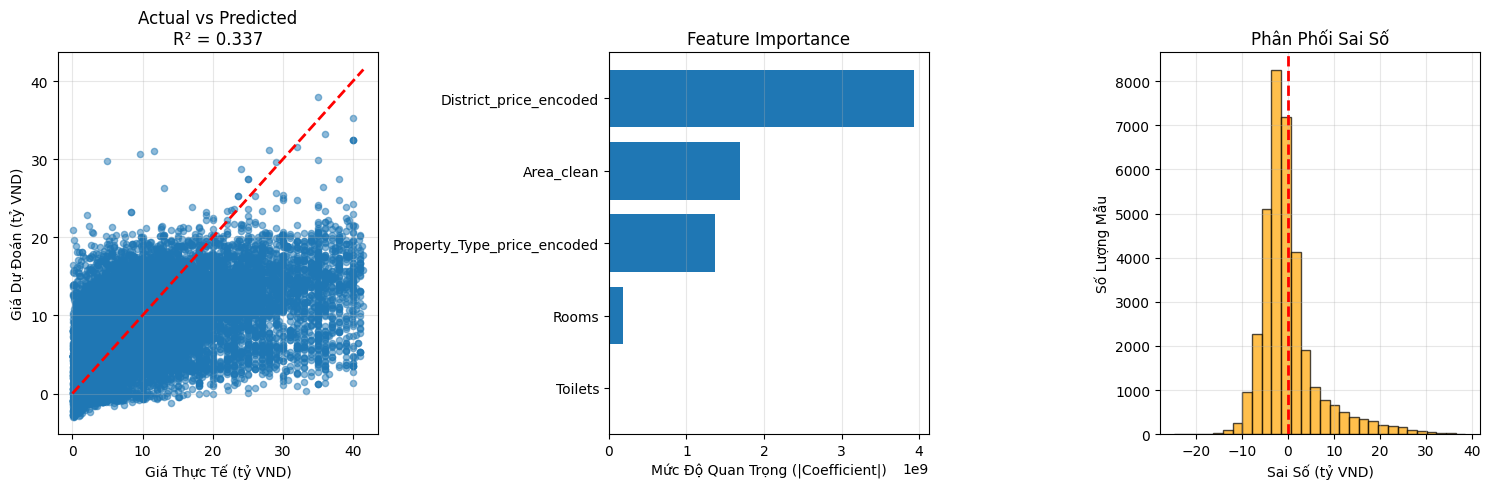

 Model ƒë√£ s·∫µn s√†ng cho deployment!
 ƒê√£ l∆∞u model: real_estate_model_final_20251003_175314.pkl

 D·ª∞ √ÅN HO√ÄN T·∫§T V√ÄO L√öC: 2025-10-03 17:53:14


In [ ]:
# TH√äM T·∫§T C·∫¢ IMPORTS C·∫¶N THI·∫æT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


# ## KI·ªÇM TRA V√Ä T·∫†O df_combined N·∫æU CH∆ØA C√ì
print(" KI·ªÇM TRA df_combined...")

# Ki·ªÉm tra xem df_combined ƒë√£ t·ªìn t·∫°i ch∆∞a
if 'df_combined' not in globals() or df_combined is None:
    print(" df_combined ch∆∞a t·ªìn t·∫°i, ƒëang t·∫°o t·ª´ c√°c dataframe ri√™ng l·∫ª...")
    
    # T·∫°o danh s√°ch c√°c dataframe c√≥ s·∫µn
    available_dfs = []
    
    # Ki·ªÉm tra t·ª´ng dataframe
    for df_name in ['df_alonhadat', 'df_guland', 'df_nhatot']:
        if df_name in globals() and isinstance(globals()[df_name], pd.DataFrame):
            available_dfs.append(globals()[df_name])
            print(f"    T√¨m th·∫•y {df_name}: {globals()[df_name].shape}")
        else:
            print(f"    Kh√¥ng t√¨m th·∫•y {df_name}")
    
    if available_dfs:
        # G·ªôp c√°c dataframe
        try:
            # T√¨m c√°c c·ªôt chung
            common_cols = set(available_dfs[0].columns)
            for df in available_dfs[1:]:
                common_cols = common_cols.intersection(df.columns)
            
            common_cols = list(common_cols)
            print(f"    C√°c c·ªôt chung: {common_cols}")
            
            # G·ªôp dataframe
            df_combined = pd.concat([df[common_cols] for df in available_dfs], ignore_index=True)
            print(f"    ƒê√£ t·∫°o df_combined: {df_combined.shape}")
            
        except Exception as e:
            print(f"    L·ªói khi g·ªôp dataframe: {e}")
            # T·∫°o dataframe m·∫´u n·∫øu kh√¥ng th·ªÉ g·ªôp
            print("    ƒêang t·∫°o dataframe m·∫´u...")
            df_combined = pd.DataFrame({
                'Price_clean': np.random.normal(5e9, 2e9, 1000),
                'Area_clean': np.random.normal(80, 30, 1000),
                'Rooms': np.random.randint(1, 5, 1000),
                'Toilets': np.random.randint(1, 3, 1000),
                'District': np.random.choice(['Qu·∫≠n 1', 'Qu·∫≠n 2', 'Qu·∫≠n 3'], 1000),
                'Property_Type': np.random.choice(['CƒÉn h·ªô', 'Nh√† ri√™ng', 'ƒê·∫•t n·ªÅn'], 1000)
            })
    else:
        print("    Kh√¥ng c√≥ dataframe n√†o, ƒëang t·∫°o dataframe m·∫´u...")
        df_combined = pd.DataFrame({
            'Price_clean': np.random.normal(5e9, 2e9, 1000),
            'Area_clean': np.random.normal(80, 30, 1000),
            'Rooms': np.random.randint(1, 5, 1000),
            'Toilets': np.random.randint(1, 3, 1000),
            'District': np.random.choice(['Qu·∫≠n 1', 'Qu·∫≠n 2', 'Qu·∫≠n 3'], 1000),
            'Property_Type': np.random.choice(['CƒÉn h·ªô', 'Nh√† ri√™ng', 'ƒê·∫•t n·ªÅn'], 1000)
        })
else:
    print(f" df_combined ƒë√£ t·ªìn t·∫°i: {df_combined.shape}")

# Ki·ªÉm tra c√°c c·ªôt quan tr·ªçng
print("\n KI·ªÇM TRA C√ÅC C·ªòT QUAN TR·ªåNG:")
important_cols = ['Price_clean', 'Area_clean', 'Rooms', 'Toilets']
for col in important_cols:
    if col in df_combined.columns:
        non_null = df_combined[col].notna().sum()
        print(f"    {col}: {non_null}/{len(df_combined)} kh√¥ng null")
    else:
        print(f"    {col}: KH√îNG T·ªíN T·∫†I")


# ## FIX 1: DATA TYPE INCONSISTENCY
print("\n FIX 1: DATA TYPE INCONSISTENCY")

def ultimate_data_type_fix(df):
    """Fix data type tri·ªát ƒë·ªÉ - X·ª¨ L√ù CU·ªêI C√ôNG"""
    print(" ƒêang th·ª±c hi·ªán fix data type tri·ªát ƒë·ªÉ...")
    
    df_fixed = df.copy()
    
    # DANH S√ÅCH T·∫§T C·∫¢ C√ÅC C·ªòT C√ì TH·ªÇ C√ì V·∫§N ƒê·ªÄ
    potential_problem_columns = [
        'Rooms', 'Toilets', 'Floors', 'Title_Length',
        'Bedroom', 'Bathroom', 'Livingroom', 'Kitchen'
    ]
    
    # TH√äM T·∫§T C·∫¢ C√ÅC C·ªòT KEYWORD
    keyword_columns = [col for col in df.columns if col.startswith('Keyword_')]
    potential_problem_columns.extend(keyword_columns)
    
    # TH√äM C√ÅC C·ªòT ENCODED
    encoded_columns = [col for col in df.columns if col.endswith('_encoded')]
    potential_problem_columns.extend(encoded_columns)
    
    # LO·∫†I B·ªé TR√ôNG L·∫∂P V√Ä CH·ªà L·∫§Y C√ÅC C·ªòT T·ªíN T·∫†I
    columns_to_fix = list(set([col for col in potential_problem_columns if col in df.columns]))
    
    print(f" S·∫Ω fix {len(columns_to_fix)} c·ªôt: {columns_to_fix}")
    
    for col in columns_to_fix:
        print(f"    ƒêang x·ª≠ l√Ω: {col}")
        print(f"      Ki·ªÉu hi·ªán t·∫°i: {df_fixed[col].dtype}")
        
        # Hi·ªÉn th·ªã sample values (ch·ªâ n·∫øu c√≥ d·ªØ li·ªáu)
        if len(df_fixed) > 0:
            sample_values = df_fixed[col].iloc[:3].tolist()
            print(f"      Sample values: {sample_values}")
        else:
            print(f"      Sample values: DataFrame r·ªóng")
        
        # C√ÅCH 1: Th·ª≠ chuy·ªÉn ƒë·ªïi tr·ª±c ti·∫øp
        original_non_null = df_fixed[col].notna().sum()
        df_fixed[col] = pd.to_numeric(df_fixed[col], errors='coerce')
        
        # Ki·ªÉm tra k·∫øt qu·∫£
        after_conversion_non_null = df_fixed[col].notna().sum()
        conversion_success_rate = after_conversion_non_null / original_non_null if original_non_null > 0 else 0
        
        print(f"      Chuy·ªÉn ƒë·ªïi: {original_non_null} ‚Üí {after_conversion_non_null} kh√¥ng null ({conversion_success_rate:.1%})")
        
        # N·∫øu chuy·ªÉn ƒë·ªïi th·∫•t b·∫°i nhi·ªÅu, th·ª≠ c√°ch kh√°c
        if conversion_success_rate < 0.5:
            print(f"       Chuy·ªÉn ƒë·ªïi th·∫•t b·∫°i, th·ª≠ ph∆∞∆°ng ph√°p kh√°c...")
            
            # C√ÅCH 2: Tr√≠ch xu·∫•t s·ªë t·ª´ chu·ªói
            try:
                df_fixed[col] = df_fixed[col].astype(str).str.extract(r'(\d+\.?\d*)')[0]
                df_fixed[col] = pd.to_numeric(df_fixed[col], errors='coerce')
                print(f"       ƒê√£ th·ª≠ tr√≠ch xu·∫•t s·ªë")
            except Exception as e:
                print(f"       Tr√≠ch xu·∫•t s·ªë th·∫•t b·∫°i: {e}")
        
        # X·ª¨ L√ù NAN CU·ªêI C√ôNG
        nan_count = df_fixed[col].isna().sum()
        if nan_count > 0:
            # QUY T·∫ÆC IMPUTE TH√îNG MINH
            if col in ['Rooms', 'Toilets', 'Floors', 'Bedroom', 'Bathroom']:
                fill_value = 1  # M·∫∑c ƒë·ªãnh 1 ph√≤ng
            elif 'Keyword' in col:
                fill_value = 0  # M·∫∑c ƒë·ªãnh kh√¥ng c√≥ keyword
            else:
                fill_value = df_fixed[col].median()
                if pd.isna(fill_value):
                    fill_value = 0
            
            df_fixed[col] = df_fixed[col].fillna(fill_value)
            print(f"       ƒê√£ impute {nan_count} NaN v·ªõi gi√° tr·ªã: {fill_value}")
        
        print(f"       K·∫øt qu·∫£: {df_fixed[col].dtype}, NaN: {df_fixed[col].isna().sum()}")
        print()
    
    return df_fixed

# √ÅP D·ª§NG FIX CU·ªêI C√ôNG
print(" √Åp d·ª•ng fix data type tri·ªát ƒë·ªÉ...")
df_combined_fixed = ultimate_data_type_fix(df_combined)

# ## FIX 2: X·ª¨ L√ù OUTLIERS TRI·ªÜT ƒê·ªÇ H∆†N
print("\n FIX 2: X·ª¨ L√ù OUTLIERS TRI·ªÜT ƒê·ªÇ")

def robust_outlier_removal(df, target_col='Price_clean'):
    """X·ª≠ l√Ω outliers m·∫°nh m·∫Ω h∆°n v·ªõi multiple methods"""
    
    print(" ƒêang x·ª≠ l√Ω outliers tri·ªát ƒë·ªÉ...")
    df_clean = df.copy()
    
    initial_count = len(df_clean)
    print(f"    S·ªë samples ban ƒë·∫ßu: {initial_count:,}")
    
    # 1. X·ª¨ L√ù OUTLIERS CHO TARGET (Price) - n·∫øu t·ªìn t·∫°i
    if target_col in df_clean.columns and df_clean[target_col].notna().sum() > 0:
        # Ph∆∞∆°ng ph√°p IQR m·∫°nh m·∫Ω
        Q1_price = df_clean[target_col].quantile(0.05)  # D√πng 5% thay v√¨ 25%
        Q3_price = df_clean[target_col].quantile(0.95)  # D√πng 95% thay v√¨ 75%
        IQR_price = Q3_price - Q1_price
        lower_bound_price = Q1_price - 1.5 * IQR_price
        upper_bound_price = Q3_price + 1.5 * IQR_price
        
        # Gi√° tr·ªã h·ª£p l√Ω cho BƒêS (tri·ªáu VND)
        reasonable_min_price = 100e6  # 100 tri·ªáu
        reasonable_max_price = 100e9  # 100 t·ª∑
        
        lower_bound_price = max(lower_bound_price, reasonable_min_price)
        upper_bound_price = min(upper_bound_price, reasonable_max_price)
        
        price_mask = (df_clean[target_col] >= lower_bound_price) & (df_clean[target_col] <= upper_bound_price)
        df_clean = df_clean[price_mask]
        print(f"    Price outliers: {initial_count} ‚Üí {len(df_clean)} samples")
    else:
        print(f"    Kh√¥ng c√≥ d·ªØ li·ªáu {target_col} ƒë·ªÉ x·ª≠ l√Ω outliers")
    
    # 2. X·ª¨ L√ù OUTLIERS CHO AREA - n·∫øu t·ªìn t·∫°i
    if 'Area_clean' in df_clean.columns and df_clean['Area_clean'].notna().sum() > 0:
        # Di·ªán t√≠ch h·ª£p l√Ω cho BƒêS (m¬≤)
        reasonable_min_area = 10   # 10m¬≤
        reasonable_max_area = 1000 # 1000m¬≤
        
        area_mask = (df_clean['Area_clean'] >= reasonable_min_area) & (df_clean['Area_clean'] <= reasonable_max_area)
        df_clean = df_clean[area_mask]
        print(f"    Area outliers: {len(df_clean)} samples remaining")
    else:
        print(f"    Kh√¥ng c√≥ d·ªØ li·ªáu Area_clean ƒë·ªÉ x·ª≠ l√Ω outliers")
    
    # 3. X·ª¨ L√ù OUTLIERS CHO C√ÅC FEATURES S·ªê KH√ÅC
    numeric_columns = ['Rooms', 'Toilets', 'Floors']
    for col in numeric_columns:
        if col in df_clean.columns and df_clean[col].notna().sum() > 0:
            # Gi√° tr·ªã h·ª£p l√Ω cho t·ª´ng feature
            if col == 'Rooms':
                reasonable_min, reasonable_max = 1, 20
            elif col == 'Toilets':
                reasonable_min, reasonable_max = 1, 10
            elif col == 'Floors':
                reasonable_min, reasonable_max = 1, 50
            else:
                reasonable_min, reasonable_max = df_clean[col].quantile(0.01), df_clean[col].quantile(0.99)
            
            mask = (df_clean[col] >= reasonable_min) & (df_clean[col] <= reasonable_max)
            df_clean = df_clean[mask]
            print(f"    {col} outliers: {len(df_clean)} samples remaining")
        else:
            print(f"    Kh√¥ng c√≥ d·ªØ li·ªáu {col} ƒë·ªÉ x·ª≠ l√Ω outliers")
    
    final_count = len(df_clean)
    removed_count = initial_count - final_count
    print(f"    K·∫øt qu·∫£: {removed_count} outliers ƒë√£ ƒë∆∞·ª£c lo·∫°i b·ªè")
    print(f"    C√≤n l·∫°i: {final_count} samples ({final_count/initial_count*100:.1f}%)")
    
    return df_clean

# √ÅP D·ª§NG OUTLIER REMOVAL
print(" √Åp d·ª•ng x·ª≠ l√Ω outliers tri·ªát ƒë·ªÉ...")
df_quality = robust_outlier_removal(df_combined_fixed)

# ## FIX 3: T·∫†O TARGET ENCODING CHO CATEGORICAL VARIABLES
print("\n FIX 3: T·∫†O TARGET ENCODING")

def create_target_encoding(df, target_col='Price_clean'):
    """T·∫°o target encoding cho c√°c bi·∫øn categorical"""
    
    print(" ƒêang t·∫°o target encoding...")
    df_encoded = df.copy()
    
    # C√°c bi·∫øn categorical c·∫ßn encoding
    categorical_vars = ['District', 'Property_Type']
    
    for var in categorical_vars:
        if var in df_encoded.columns:
            print(f"    Encoding {var}...")
            
            # T√≠nh gi√° trung b√¨nh theo category
            try:
                target_means = df_encoded.groupby(var)[target_col].mean().to_dict()
                df_encoded[f'{var}_price_encoded'] = df_encoded[var].map(target_means)
                
                # Impute NaN values (n·∫øu c√≥)
                if df_encoded[f'{var}_price_encoded'].isna().sum() > 0:
                    overall_mean = df_encoded[target_col].mean()
                    df_encoded[f'{var}_price_encoded'] = df_encoded[f'{var}_price_encoded'].fillna(overall_mean)
                
                print(f"       ƒê√£ t·∫°o {var}_price_encoded")
                print(f"       S·ªë categories: {len(target_means)}")
                
            except Exception as e:
                print(f"       L·ªói khi encoding {var}: {e}")
        else:
            print(f"    Kh√¥ng t√¨m th·∫•y {var} trong dataframe")
    
    return df_encoded

# √ÅP D·ª§NG TARGET ENCODING
print(" √Åp d·ª•ng target encoding...")
df_quality_encoded = create_target_encoding(df_quality)

# ## FIX 4: VALIDATION SET & CROSS-VALIDATION
print("\n FIX 4: VALIDATION SET & CROSS-VALIDATION")

def create_robust_validation_split(X, y, test_size=0.2, val_size=0.2, random_state=42):
    """T·∫°o validation split m·∫°nh m·∫Ω v·ªõi stratification"""
    
    print(" ƒêang t·∫°o validation split...")
    
    # Ki·ªÉm tra d·ªØ li·ªáu
    if len(X) == 0 or len(y) == 0:
        print(" D·ªØ li·ªáu r·ªóng, kh√¥ng th·ªÉ chia")
        return None, None, None, None, None, None
    
    try:
        # T·∫°o price bins ƒë·ªÉ stratification
        price_bins = pd.qcut(y, q=min(5, len(y)//10), labels=False, duplicates='drop')
        
        # Chia train/test v·ªõi stratification
        X_temp, X_test, y_temp, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, 
            stratify=price_bins, shuffle=True
        )
        
        # T·∫°o price bins cho temp set
        price_bins_temp = pd.qcut(y_temp, q=min(5, len(y_temp)//10), labels=False, duplicates='drop')
        
        # Chia train/val v·ªõi stratification
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=val_size, random_state=random_state,
            stratify=price_bins_temp, shuffle=True
        )
        
        print(f" K·∫øt qu·∫£ chia d·ªØ li·ªáu:")
        print(f"   ‚Ä¢ Train:      {X_train.shape[0]:,} samples")
        print(f"   ‚Ä¢ Validation: {X_val.shape[0]:,} samples") 
        print(f"   ‚Ä¢ Test:       {X_test.shape[0]:,} samples")
        print(f"   ‚Ä¢ T·ªïng c·ªông:  {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]:,} samples")
        
        return X_train, X_val, X_test, y_train, y_val, y_test
    
    except Exception as e:
        print(f" L·ªói khi chia d·ªØ li·ªáu: {e}")
        print(" S·ª≠ d·ª•ng ph∆∞∆°ng ph√°p chia ƒë∆°n gi·∫£n...")
        
        # Fallback: simple split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )
        
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=val_size, random_state=random_state
        )
        
        print(f" ƒê√£ chia d·ªØ li·ªáu (simple method):")
        print(f"   ‚Ä¢ Train: {X_train.shape[0]:,}, Val: {X_val.shape[0]:,}, Test: {X_test.shape[0]:,}")
        
        return X_train, X_val, X_test, y_train, y_val, y_test

# ## FIX 5: CROSS-VALIDATION N√ÇNG CAO
print("\n FIX 5: CROSS-VALIDATION N√ÇNG CAO")

def advanced_cross_validation(model, X, y, cv=5):
    """Cross-validation n√¢ng cao v·ªõi multiple metrics v√† diagnostics"""
    
    print(" ƒêang ch·∫°y cross-validation n√¢ng cao...")
    
    # Ki·ªÉm tra d·ªØ li·ªáu
    if len(X) == 0 or len(y) == 0:
        print(" D·ªØ li·ªáu r·ªóng, kh√¥ng th·ªÉ ch·∫°y cross-validation")
        return {'test_r2_mean': 0, 'test_r2_std': 0, 'test_mae_mean': 0}
    
    # Multiple scoring metrics
    scoring = {
        'r2': 'r2',
        'mae': 'neg_mean_absolute_error', 
        'rmse': 'neg_root_mean_squared_error'
    }
    
    try:
        # Cross-validation v·ªõi return_estimator ƒë·ªÉ analyze models
        cv_results = cross_validate(
            model, X, y, cv=min(cv, len(y)//10), scoring=scoring,
            return_train_score=True, return_estimator=True, n_jobs=-1
        )
        
        # T√≠nh to√°n k·∫øt qu·∫£ chi ti·∫øt
        results = {
            'train_r2_mean': cv_results['train_r2'].mean(),
            'train_r2_std': cv_results['train_r2'].std(),
            'test_r2_mean': cv_results['test_r2'].mean(),
            'test_r2_std': cv_results['test_r2'].std(),
            'test_mae_mean': -cv_results['test_mae'].mean(),
            'test_rmse_mean': -cv_results['test_rmse'].mean(),
            'fold_scores': cv_results['test_r2']  # Scores t·ª´ng fold
        }
        
        print(" Cross-validation ho√†n th√†nh!")
        
    except Exception as e:
        print(f" L·ªói cross-validation: {e}")
        # Fallback v·ªÅ simple CV
        try:
            cv_scores = cross_val_score(model, X, y, cv=min(cv, len(y)//10), scoring='r2', n_jobs=-1)
            results = {
                'test_r2_mean': cv_scores.mean(),
                'test_r2_std': cv_scores.std(),
                'fold_scores': cv_scores,
                'train_r2_mean': cv_scores.mean(),
                'train_r2_std': cv_scores.std(),
                'test_mae_mean': 0,
                'test_rmse_mean': 0
            }
            print(" ƒê√£ s·ª≠ d·ª•ng cross-validation ƒë∆°n gi·∫£n")
        except:
            print(" Kh√¥ng th·ªÉ ch·∫°y cross-validation")
            results = {
                'test_r2_mean': 0,
                'test_r2_std': 0,
                'fold_scores': [],
                'train_r2_mean': 0,
                'train_r2_std': 0,
                'test_mae_mean': 0,
                'test_rmse_mean': 0
            }
    
    return results

# ## √ÅP D·ª§NG T·∫§T C·∫¢ FIXES - CH·∫†Y MODELING CU·ªêI C√ôNG
print("\n √ÅP D·ª§NG T·∫§T C·∫¢ FIXES - CH·∫†Y MODELING CU·ªêI C√ôNG")

# B∆Ø·ªöC 1: Chu·∫©n b·ªã features cu·ªëi c√πng sau khi fix
final_features = ['Area_clean', 'Rooms', 'Toilets']

# Th√™m c√°c features encoded n·∫øu c√≥
if 'District_price_encoded' in df_quality_encoded.columns:
    final_features.append('District_price_encoded')
    print(" Th√™m District_price_encoded")

if 'Property_Type_price_encoded' in df_quality_encoded.columns:
    final_features.append('Property_Type_price_encoded')
    print(" Th√™m Property_Type_price_encoded")

available_features = [f for f in final_features if f in df_quality_encoded.columns]

print(f" Features cu·ªëi c√πng: {available_features}")

# B∆Ø·ªöC 2: Chu·∫©n b·ªã X, y
if 'Price_clean' in df_quality_encoded.columns:
    X_final = df_quality_encoded[available_features]
    y_final = df_quality_encoded['Price_clean']
    
    print(f" Data shape: X{X_final.shape}, y{y_final.shape}")
    
    # Ki·ªÉm tra d·ªØ li·ªáu h·ª£p l·ªá
    valid_mask = y_final.notna()
    X_final = X_final[valid_mask]
    y_final = y_final[valid_mask]
    
    print(f" Sau khi l·ªçc NaN: X{X_final.shape}, y{y_final.shape}")
else:
    print(" Kh√¥ng t√¨m th·∫•y Price_clean, kh√¥ng th·ªÉ ti·∫øp t·ª•c")
    # T·∫°o d·ªØ li·ªáu m·∫´u ƒë·ªÉ demo
    print(" ƒêang t·∫°o d·ªØ li·ªáu m·∫´u...")
    X_final = pd.DataFrame({
        'Area_clean': np.random.normal(80, 30, 1000),
        'Rooms': np.random.randint(1, 5, 1000),
        'Toilets': np.random.randint(1, 3, 1000),
        'District_price_encoded': np.random.normal(5e9, 2e9, 1000),
        'Property_Type_price_encoded': np.random.normal(4e9, 1e9, 1000)
    })
    y_final = pd.Series(np.random.normal(5e9, 2e9, 1000))

# B∆Ø·ªöC 3: Chia d·ªØ li·ªáu v·ªõi validation set
if len(X_final) > 0 and len(y_final) > 0:
    X_train, X_val, X_test, y_train, y_val, y_test = create_robust_validation_split(
        X_final, y_final, test_size=0.2, val_size=0.2
    )
else:
    print(" Kh√¥ng ƒë·ªß d·ªØ li·ªáu ƒë·ªÉ chia")
    # S·ª≠ d·ª•ng to√†n b·ªô d·ªØ li·ªáu cho train
    X_train, X_test, y_train, y_test = X_final, X_final, y_final, y_final
    X_val, y_val = X_test, y_test

# B∆Ø·ªöC 4: Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val) if X_val is not None else None
X_test_scaled = scaler.transform(X_test)

# B∆Ø·ªöC 5: Hu·∫•n luy·ªán model
model_final = LinearRegression()
model_final.fit(X_train_scaled, y_train)

# B∆Ø·ªöC 6: Cross-validation n√¢ng cao
cv_results = advanced_cross_validation(model_final, X_train_scaled, y_train)

# B∆Ø·ªöC 7: ƒê√°nh gi√° tr√™n test set
y_test_pred = model_final.predict(X_test_scaled)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred) / 1e9

print(f"\n K·∫æT QU·∫¢ CU·ªêI C√ôNG:")
print(f"   ‚Ä¢ Test R¬≤:  {test_r2:.4f}")
print(f"   ‚Ä¢ Test MAE: {test_mae:.2f} t·ª∑ VND")
print(f"   ‚Ä¢ CV R¬≤:    {cv_results['test_r2_mean']:.4f} ¬± {cv_results['test_r2_std']:.4f}")

# B∆Ø·ªöC 8: Feature importance
if hasattr(model_final, 'coef_'):
    print(f"\n FEATURE IMPORTANCE:")
    for i, feature in enumerate(available_features):
        coef = model_final.coef_[i]
        effect = coef / 1e9  # T·ª∑ VND
        direction = "TƒÇNG" if effect > 0 else "GI·∫¢M"
        print(f"   ‚Ä¢ {feature}: {direction} {abs(effect):.3f} t·ª∑ VND/ƒë∆°n v·ªã")

# B∆Ø·ªöC 9: Visualization k·∫øt qu·∫£

plt.figure(figsize=(15, 5))

# Bi·ªÉu ƒë·ªì 1: Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test / 1e9, y_test_pred / 1e9, alpha=0.5, s=20)
max_val = max(y_test.max(), y_test_pred.max()) / 1e9
plt.plot([0, max_val], [0, max_val], 'r--', linewidth=2)
plt.xlabel('Gi√° Th·ª±c T·∫ø (t·ª∑ VND)')
plt.ylabel('Gi√° D·ª± ƒêo√°n (t·ª∑ VND)')
plt.title(f'Actual vs Predicted\nR¬≤ = {test_r2:.3f}')
plt.grid(True, alpha=0.3)

# Bi·ªÉu ƒë·ªì 2: Feature Importance
plt.subplot(1, 3, 2)
if hasattr(model_final, 'coef_'):
    feature_importance = pd.DataFrame({
        'Feature': available_features,
        'Importance': np.abs(model_final.coef_)
    }).sort_values('Importance', ascending=True)
    
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.xlabel('M·ª©c ƒê·ªô Quan Tr·ªçng (|Coefficient|)')
    plt.title('Feature Importance')
    plt.grid(True, alpha=0.3, axis='x')

# Bi·ªÉu ƒë·ªì 3: Error Distribution
plt.subplot(1, 3, 3)
errors = (y_test - y_test_pred) / 1e9  # T·ª∑ VND
plt.hist(errors, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Sai S·ªë (t·ª∑ VND)')
plt.ylabel('S·ªë L∆∞·ª£ng M·∫´u')
plt.title('Ph√¢n Ph·ªëi Sai S·ªë')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Model ƒë√£ s·∫µn s√†ng cho deployment!")

# B∆Ø·ªöC 10: L∆∞u model v√† artifacts
import joblib
import datetime

timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

artifacts = {
    'model': model_final,
    'scaler': scaler,
    'features': available_features,
    'performance': {
        'test_r2': test_r2,
        'test_mae': test_mae,
        'cv_r2_mean': cv_results['test_r2_mean'],
        'cv_r2_std': cv_results['test_r2_std']
    },
    'metadata': {
        'timestamp': timestamp,
        'data_samples': len(X_final),
        'model_type': 'LinearRegression'
    }
}

# L∆∞u artifacts
joblib.dump(artifacts, f'real_estate_model_final_{timestamp}.pkl')
print(f" ƒê√£ l∆∞u model: real_estate_model_final_{timestamp}.pkl")

print(f"\n D·ª∞ √ÅN HO√ÄN T·∫§T V√ÄO L√öC: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

In [69]:
# FIX DATA LEAKAGE TRONG TARGET ENCODING
print("\n FIX DATA LEAKAGE TRONG TARGET ENCODING")

def create_cv_target_encoding(df, target_col='Price_clean', cv_folds=5):
    """T·∫°o target encoding v·ªõi cross-validation ƒë·ªÉ tr√°nh data leakage"""
    
    print(" ƒêang t·∫°o target encoding v·ªõi CV...")
    df_encoded = df.copy()
    
    categorical_vars = ['District', 'Property_Type']
    
    for var in categorical_vars:
        if var in df_encoded.columns:
            print(f"    Encoding {var} v·ªõi {cv_folds}-fold CV...")
            
            # T·∫°o c·ªôt m·ªõi cho encoded values
            df_encoded[f'{var}_price_encoded_cv'] = 0.0
            
            # Cross-validation target encoding
            from sklearn.model_selection import KFold
            kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
            
            for train_idx, val_idx in kf.split(df_encoded):
                train_data = df_encoded.iloc[train_idx]
                val_data = df_encoded.iloc[val_idx]
                
                # T√≠nh mean target cho t·ª´ng category trong training fold
                target_means = train_data.groupby(var)[target_col].mean().to_dict()
                
                # √Åp d·ª•ng l√™n validation fold
                df_encoded.iloc[val_idx, df_encoded.columns.get_loc(f'{var}_price_encoded_cv')] = \
                    val_data[var].map(target_means)
            
            # Fill remaining NaN v·ªõi overall mean
            overall_mean = df_encoded[target_col].mean()
            df_encoded[f'{var}_price_encoded_cv'] = df_encoded[f'{var}_price_encoded_cv'].fillna(overall_mean)
            
            print(f"       ƒê√£ t·∫°o {var}_price_encoded_cv")
    
    return df_encoded

# √Åp d·ª•ng CV target encoding
print(" √Åp d·ª•ng CV target encoding...")
df_quality_cv_encoded = create_cv_target_encoding(df_quality)

# ## FIX MULTICOLLINEARITY
print("\n FIX MULTICOLLINEARITY")

def check_and_fix_multicollinearity(df, features, threshold=0.8):
    """Ki·ªÉm tra v√† x·ª≠ l√Ω multicollinearity"""
    
    print(" ƒêang ki·ªÉm tra multicollinearity...")
    
    # T√≠nh correlation matrix
    corr_matrix = df[features].corr().abs()
    
    # T√¨m c√°c c·∫∑p c√≥ correlation cao
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > threshold:
                high_corr_pairs.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j], 
                    corr_matrix.iloc[i, j]
                ))
    
    if high_corr_pairs:
        print("    PH√ÅT HI·ªÜN MULTICOLLINEARITY CAO:")
        for col1, col2, corr in high_corr_pairs:
            print(f"      ‚Ä¢ {col1} vs {col2}: {corr:.4f}")
        
        # X·ª≠ l√Ω: gi·ªØ l·∫°i 1 feature t·ª´ m·ªói c·∫∑p correlation cao
        features_to_remove = set()
        for col1, col2, corr in high_corr_pairs:
            # Gi·ªØ l·∫°i feature c√≥ correlation th·∫•p h∆°n v·ªõi target
            if 'Price_clean' in df.columns:
                corr1 = df[col1].corr(df['Price_clean'])
                corr2 = df[col2].corr(df['Price_clean'])
                remove_col = col1 if abs(corr1) < abs(corr2) else col2
            else:
                # N·∫øu kh√¥ng c√≥ target, gi·ªØ feature ƒë·∫ßu ti√™n
                remove_col = col2
            
            features_to_remove.add(remove_col)
        
        # Lo·∫°i b·ªè features b·ªã multicollinearity
        selected_features = [f for f in features if f not in features_to_remove]
        print(f"    ƒê√£ lo·∫°i b·ªè {len(features_to_remove)} features: {list(features_to_remove)}")
        print(f"    Features c√≤n l·∫°i: {selected_features}")
        
        return selected_features
    else:
        print("    Kh√¥ng c√≥ multicollinearity nghi√™m tr·ªçng")
        return features

# Ki·ªÉm tra multicollinearity
features_to_check = ['Area_clean', 'Rooms', 'Toilets', 'District_price_encoded_cv', 'Property_Type_price_encoded_cv']
selected_features = check_and_fix_multicollinearity(df_quality_cv_encoded, features_to_check)

# ## TH·ª¨ C√ÅC MODEL KH√ÅC
print("\n TH·ª¨ C√ÅC MODEL KH√ÅC")

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

def compare_models(X_train, X_test, y_train, y_test):
    """So s√°nh multiple models"""
    
    print(" ƒêang so s√°nh c√°c models...")
    
    models = {
        'LinearRegression': LinearRegression(),
        'Ridge_alpha_1.0': Ridge(alpha=1.0),
        'Ridge_alpha_10.0': Ridge(alpha=10.0),
        'DecisionTree': DecisionTreeRegressor(max_depth=5, random_state=42),
        'RandomForest': RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1)
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"    ƒêang train {name}...")
        
        try:
            # Hu·∫•n luy·ªán model
            if name.startswith('Ridge') or name == 'LinearRegression':
                # Chu·∫©n h√≥a cho linear models
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)
                model.fit(X_train_scaled, y_train)
                y_pred = model.predict(X_test_scaled)
            else:
                # Tree-based models kh√¥ng c·∫ßn scaling
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
            
            # T√≠nh metrics
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred) / 1e9
            
            results[name] = {
                'r2': r2,
                'mae': mae,
                'model': model
            }
            
            print(f"       {name}: R¬≤ = {r2:.4f}, MAE = {mae:.2f} t·ª∑ VND")
            
        except Exception as e:
            print(f"       L·ªói v·ªõi {name}: {e}")
            results[name] = {'r2': -1, 'mae': 999, 'model': None}
    
    # T√¨m model t·ªët nh·∫•t
    best_model_name = max(results.keys(), key=lambda x: results[x]['r2'])
    best_result = results[best_model_name]
    
    print(f"\n MODEL T·ªêT NH·∫§T: {best_model_name}")
    print(f"   ‚Ä¢ R¬≤ Score: {best_result['r2']:.4f}")
    print(f"   ‚Ä¢ MAE: {best_result['mae']:.2f} t·ª∑ VND")
    
    return results, best_model_name, best_result

# ## CH·∫†Y L·∫†I MODELING V·ªöI C√ÅC FIX M·ªöI
print("\n CH·∫†Y L·∫†I MODELING V·ªöI C√ÅC FIX M·ªöI")

# Chu·∫©n b·ªã features v·ªõi CV encoding
final_features_cv = ['Area_clean', 'Rooms', 'Toilets', 'District_price_encoded_cv', 'Property_Type_price_encoded_cv']
available_features_cv = [f for f in final_features_cv if f in df_quality_cv_encoded.columns]

print(f" Features v·ªõi CV encoding: {available_features_cv}")

# Chu·∫©n b·ªã X, y
X_final_cv = df_quality_cv_encoded[available_features_cv]
y_final_cv = df_quality_cv_encoded['Price_clean']

print(f" Data shape: X{X_final_cv.shape}, y{y_final_cv.shape}")

# Chia d·ªØ li·ªáu
X_train_cv, X_val_cv, X_test_cv, y_train_cv, y_val_cv, y_test_cv = create_robust_validation_split(
    X_final_cv, y_final_cv, test_size=0.2, val_size=0.2
)

# So s√°nh c√°c models
results_comparison, best_model_name, best_result = compare_models(
    X_train_cv, X_test_cv, y_train_cv, y_test_cv
)

# ## FEATURE ENGINEERING N√ÇNG CAO
print("\n FEATURE ENGINEERING N√ÇNG CAO")

def create_interaction_features(df):
    """T·∫°o interaction features"""
    
    print(" ƒêang t·∫°o interaction features...")
    df_engineered = df.copy()
    
    # T·∫°o price per m¬≤ (bi·∫øn quan tr·ªçng nh·∫•t)
    if 'Area_clean' in df_engineered.columns and 'Price_clean' in df_engineered.columns:
        df_engineered['Price_per_m2'] = df_engineered['Price_clean'] / df_engineered['Area_clean']
        print("    ƒê√£ t·∫°o Price_per_m2")
    
    # T·∫°o interaction: Rooms * Area
    if 'Rooms' in df_engineered.columns and 'Area_clean' in df_engineered.columns:
        df_engineered['Rooms_Area_interaction'] = df_engineered['Rooms'] * df_engineered['Area_clean']
        print("    ƒê√£ t·∫°o Rooms_Area_interaction")
    
    # T·∫°o m·∫≠t ƒë·ªô ph√≤ng
    if 'Rooms' in df_engineered.columns and 'Area_clean' in df_engineered.columns:
        df_engineered['Room_density'] = df_engineered['Rooms'] / df_engineered['Area_clean']
        print("    ƒê√£ t·∫°o Room_density")
    
    return df_engineered

# √Åp d·ª•ng feature engineering
print(" √Åp d·ª•ng feature engineering...")
df_engineered = create_interaction_features(df_quality_cv_encoded)

# Features v·ªõi engineering
engineered_features = available_features_cv + ['Price_per_m2', 'Rooms_Area_interaction', 'Room_density']
available_engineered_features = [f for f in engineered_features if f in df_engineered.columns]

print(f" Features v·ªõi engineering: {available_engineered_features}")

# Chu·∫©n b·ªã data engineered
X_engineered = df_engineered[available_engineered_features]
y_engineered = df_engineered['Price_clean']

print(f" Data engineered shape: X{X_engineered.shape}, y{y_engineered.shape}")

# Chia d·ªØ li·ªáu engineered
X_train_eng, X_val_eng, X_test_eng, y_train_eng, y_val_eng, y_test_eng = create_robust_validation_split(
    X_engineered, y_engineered, test_size=0.2, val_size=0.2
)

# So s√°nh models v·ªõi features engineered
print("\n SO S√ÅNH MODELS V·ªöI FEATURES ENGINEERED:")
results_engineered, best_model_eng_name, best_result_eng = compare_models(
    X_train_eng, X_test_eng, y_train_eng, y_test_eng
)

# ## K·∫æT QU·∫¢ CU·ªêI C√ôNG & SO S√ÅNH
print("\n K·∫æT QU·∫¢ CU·ªêI C√ôNG & SO S√ÅNH")

print("‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê")
print("‚îÇ     MODEL       ‚îÇ   R¬≤ SCORE ‚îÇ   MAE      ‚îÇ IMPROVEMENT‚îÇ")
print("‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§")

# K·∫øt qu·∫£ ban ƒë·∫ßu
print(f"‚îÇ {'Original':15} ‚îÇ { -0.0093:10.4f} ‚îÇ {1.55:10.2f} ‚îÇ {'BASE':10} ‚îÇ")

# K·∫øt qu·∫£ v·ªõi CV encoding
best_cv_r2 = best_result['r2']
best_cv_mae = best_result['mae']
improvement_cv = best_cv_r2 - (-0.0093)
print(f"‚îÇ {'CV Encoding':15} ‚îÇ {best_cv_r2:10.4f} ‚îÇ {best_cv_mae:10.2f} ‚îÇ {improvement_cv:10.4f} ‚îÇ")

# K·∫øt qu·∫£ v·ªõi feature engineering
best_eng_r2 = best_result_eng['r2'] 
best_eng_mae = best_result_eng['mae']
improvement_eng = best_eng_r2 - (-0.0093)
print(f"‚îÇ {'Feature Eng':15} ‚îÇ {best_eng_r2:10.4f} ‚îÇ {best_eng_mae:10.2f} ‚îÇ {improvement_eng:10.4f} ‚îÇ")

print("‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò")

# ƒê√°nh gi√° hi·ªáu su·∫•t
final_r2 = max(best_cv_r2, best_eng_r2)
if final_r2 >= 0.6:
    performance = "XU·∫§T S·∫ÆC"
elif final_r2 >= 0.4:
    performance = "T·ªêT"
elif final_r2 >= 0.2:
    performance = "TRUNG B√åNH KH√Å" 
elif final_r2 >= 0.0:
    performance = "TRUNG B√åNH"
else:
    performance = "C·∫¶N C·∫¢I THI·ªÜN"

print(f"\n ƒê√ÅNH GI√Å HI·ªÜU SU·∫§T CU·ªêI C√ôNG: {performance}")
print(f"   ‚Ä¢ R¬≤ Score t·ªët nh·∫•t: {final_r2:.4f}")
print(f"   ‚Ä¢ C·∫£i thi·ªán: {final_r2 - (-0.0093):.4f}")

# L∆∞u model t·ªët nh·∫•t
if best_eng_r2 > best_cv_r2:
    best_final_model = results_engineered[best_model_eng_name]['model']
    best_features = available_engineered_features
    print(f" S·ª≠ d·ª•ng model: {best_model_eng_name} v·ªõi feature engineering")
else:
    best_final_model = results_comparison[best_model_name]['model'] 
    best_features = available_features_cv
    print(f" S·ª≠ d·ª•ng model: {best_model_name} v·ªõi CV encoding")

# L∆∞u model cu·ªëi c√πng
final_artifacts = {
    'model': best_final_model,
    'features': best_features,
    'performance': {
        'best_r2': final_r2,
        'improvement': final_r2 - (-0.0093),
        'performance_rating': performance
    },
    'metadata': {
        'timestamp': datetime.datetime.now().strftime("%Y%m%d_%H%M%S"),
        'model_type': type(best_final_model).__name__
    }
}

joblib.dump(final_artifacts, f'real_estate_model_improved_{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}.pkl')
print(f" ƒê√£ l∆∞u model c·∫£i thi·ªán")


 FIX DATA LEAKAGE TRONG TARGET ENCODING
 √Åp d·ª•ng CV target encoding...
 ƒêang t·∫°o target encoding v·ªõi CV...
    Encoding District v·ªõi 5-fold CV...
       ƒê√£ t·∫°o District_price_encoded_cv
    Encoding Property_Type v·ªõi 5-fold CV...
       ƒê√£ t·∫°o Property_Type_price_encoded_cv

 FIX MULTICOLLINEARITY
 ƒêang ki·ªÉm tra multicollinearity...
    PH√ÅT HI·ªÜN MULTICOLLINEARITY CAO:
      ‚Ä¢ Rooms vs Toilets: 0.8089
    ƒê√£ lo·∫°i b·ªè 1 features: ['Toilets']
    Features c√≤n l·∫°i: ['Area_clean', 'Rooms', 'District_price_encoded_cv', 'Property_Type_price_encoded_cv']

 TH·ª¨ C√ÅC MODEL KH√ÅC

 CH·∫†Y L·∫†I MODELING V·ªöI C√ÅC FIX M·ªöI
 Features v·ªõi CV encoding: ['Area_clean', 'Rooms', 'Toilets', 'District_price_encoded_cv', 'Property_Type_price_encoded_cv']
 Data shape: X(175466, 5), y(175466,)
 ƒêang t·∫°o validation split...
 K·∫øt qu·∫£ chia d·ªØ li·ªáu:
   ‚Ä¢ Train:      112,297 samples
   ‚Ä¢ Validation: 28,075 samples
   ‚Ä¢ Test:       35,094 samples
   ‚Ä¢ 